In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [38]:
#use csv with already preprocessed features (scaling, differnecing etc needed)
df = pd.read_csv("Data_Prep.csv", index_col=0)
# Preprocessing for Prophet
my_df = df.reset_index() [["index", "Total_Heat"]]
my_df.columns = ["ds", "y"]
my_df.ds = pd.to_datetime(my_df.ds).dt.tz_convert(None)
df_scaler = MinMaxScaler()
my_df.y = pd.DataFrame(df_scaler.fit_transform(my_df[["y"]]), columns=["y"])


In [39]:
weather = pd.read_csv("produkt_tu_stunde_20040701_20221231_00294.csv", sep=";")

In [40]:
weather["ds"] = pd.to_datetime(weather.MESS_DATUM, format="%Y%m%d%H")

In [41]:
my_weather = weather[[ "ds", "TT_TU"]]

In [42]:
my_weather.TT_TU.replace(-999, np.NaN, inplace=True)

C:\Users\jabbe\AppData\Local\Temp\ipykernel_900\3288013277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_weather.TT_TU.replace(-999, np.NaN, inplace=True)


In [43]:
my_weather.fillna(method="ffill", inplace=True)

C:\Users\jabbe\AppData\Local\Temp\ipykernel_900\2553323046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_weather.fillna(method="ffill", inplace=True)


In [44]:
my_weather.describe()

,TT_TU
count,161980.000000
mean,10.564429
std,7.575759
min,-17.700000
25%,5.100000
50%,10.400000
75%,15.900000
max,38.900000


<AxesSubplot:>

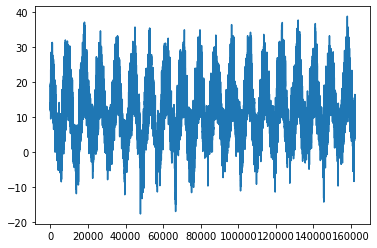

In [45]:
my_weather.TT_TU.plot()

In [46]:
df_scaler = MinMaxScaler()
my_weather.TT_TU = pd.DataFrame(df_scaler.fit_transform(my_weather[["TT_TU"]]), columns=["TT_TU"])

C:\Users\jabbe\AppData\Local\Temp\ipykernel_900\3990520788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_weather.TT_TU = pd.DataFrame(df_scaler.fit_transform(my_weather[["TT_TU"]]), columns=["TT_TU"])


In [47]:
my_df = my_df.merge(my_weather, on="ds", how="left")

In [48]:
my_df

,ds,y,TT_TU
0,2008-01-01 00:00:00,0.362881,0.355124
1,2008-01-01 01:00:00,0.371961,0.351590
2,2008-01-01 02:00:00,0.397763,0.351590
3,2008-01-01 03:00:00,0.449547,0.339223
4,2008-01-01 04:00:00,0.594798,0.333922
...,...,...,...
61363,2014-12-31 19:00:00,0.576926,0.404594
61364,2014-12-31 20:00:00,0.521848,0.401060
61365,2014-12-31 21:00:00,0.424086,0.393993
61366,2014-12-31 22:00:00,0.261670,0.385159


In [50]:
# Hyperparameter
train_days = 30
forecast_days = 2

In [51]:
# creating two seperate lists with a function

def create_X_y(data_df: pd.DataFrame, train_days:int, forecast_days:int):
    """"""
    X_list = []
    y_list = []

    for i in range(train_days*24, len(data_df)-forecast_days*24, 24):
        X_list.append(data_df.iloc[i-train_days*24:i])
        y_list.append(data_df[i:i+forecast_days*24])
    
    return X_list, y_list
    

In [54]:
X_list, y_list = create_X_y(my_df[["ds", "y", "TT_TU"]], train_days, forecast_days)

In [55]:
X_list[0]

,ds,y,TT_TU
0,2008-01-01 00:00:00,0.362881,0.355124
1,2008-01-01 01:00:00,0.371961,0.351590
2,2008-01-01 02:00:00,0.397763,0.351590
3,2008-01-01 03:00:00,0.449547,0.339223
4,2008-01-01 04:00:00,0.594798,0.333922
...,...,...,...
715,2008-01-30 19:00:00,0.463040,0.378092
716,2008-01-30 20:00:00,0.417460,0.369258
717,2008-01-30 21:00:00,0.325592,0.367491
718,2008-01-30 22:00:00,0.263363,0.363958


In [56]:
y_list[0]

,ds,y,TT_TU
720,2008-01-31 00:00:00,0.285139,0.355124
721,2008-01-31 01:00:00,0.292455,0.349823
722,2008-01-31 02:00:00,0.315806,0.351590
723,2008-01-31 03:00:00,0.365263,0.342756
724,2008-01-31 04:00:00,0.497795,0.340989
725,2008-01-31 05:00:00,0.590339,0.346290
726,2008-01-31 06:00:00,0.574319,0.346290
727,2008-01-31 07:00:00,0.561485,0.349823
728,2008-01-31 08:00:00,0.539548,0.353357
729,2008-01-31 09:00:00,0.514322,0.353357


In [57]:
from prophet import Prophet
m = Prophet()

c:\Users\jabbe\Envs\idw\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [60]:
def model_test(
    holidays, 
    daily_seasonality, 
    add_daily,
    changepoint_prior_scale, 
    holidays_prior_scale, 
    month_fourier):

    mse_list = []
    for i in range(10):
      m4 = Prophet(
          daily_seasonality= daily_seasonality,
          changepoint_prior_scale=changepoint_prior_scale, 
          holidays_prior_scale=holidays_prior_scale)
      m4.add_regressor('TT_TU')

      if holidays: 
          m4.add_country_holidays(country_name='DE')
      
      if add_daily:    
          m4.add_seasonality(
              name='daily', 
              period=24, 
              fourier_order=month_fourier)
    

      m4.fit(X_list[i])
      future = m4.make_future_dataframe(periods=len(y_list[i]), freq='H')
      future['ds'] = pd.to_datetime(future['ds'])
      future = future.merge(y_list[i], on = 'ds', how = 'left')[['ds', 'TT_TU']].fillna(0)

      forecast = m4.predict(future)
      mse = ((forecast.iloc[-48:,-1].values - y_list[i]['y'].values)**2).mean()
      mse_list.append(mse)

    return np.array(mse_list).mean()

# Setting the grid
holidays_opt = [True, False]
daily_seas = [ 5, 10, 30, 50]
add_daily = [True, False]
changepoint_prior_scale = [0.1, 0.3, 0.5]
holidays_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

# Looping through the grid
grid_results = []
for h in holidays_opt:
  for w in daily_seas:
    for d in add_daily:
      for c in changepoint_prior_scale:
        for hp in holidays_prior_scale:
          for mf in month_fourier:
            mse=model_test(h,w,d,c,hp,mf)
            print([h,w,d, c,hp,mf,mse])
            grid_results.append([h,w,d, c,hp,mf,mse])

# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(8, ascending=False)

h, w,ys, m, r, c,hp,mf,r2 = list(benchmark.iloc[0,:])


22:22:32 - cmdstanpy - INFO - Chain [1] start processing
22:22:33 - cmdstanpy - INFO - Chain [1] done processing
22:22:33 - cmdstanpy - INFO - Chain [1] start processing
22:22:33 - cmdstanpy - INFO - Chain [1] done processing
22:22:34 - cmdstanpy - INFO - Chain [1] start processing
22:22:34 - cmdstanpy - INFO - Chain [1] done processing
22:22:34 - cmdstanpy - INFO - Chain [1] start processing
22:22:35 - cmdstanpy - INFO - Chain [1] done processing
22:22:35 - cmdstanpy - INFO - Chain [1] start processing
22:22:35 - cmdstanpy - INFO - Chain [1] done processing
22:22:36 - cmdstanpy - INFO - Chain [1] start processing
22:22:36 - cmdstanpy - INFO - Chain [1] done processing
22:22:36 - cmdstanpy - INFO - Chain [1] start processing
22:22:37 - cmdstanpy - INFO - Chain [1] done processing
22:22:37 - cmdstanpy - INFO - Chain [1] start processing
22:22:37 - cmdstanpy - INFO - Chain [1] done processing
22:22:38 - cmdstanpy - INFO - Chain [1] start processing
22:22:38 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 5, 0.0037364507738090595]


22:22:39 - cmdstanpy - INFO - Chain [1] done processing
22:22:39 - cmdstanpy - INFO - Chain [1] start processing
22:22:40 - cmdstanpy - INFO - Chain [1] done processing
22:22:40 - cmdstanpy - INFO - Chain [1] start processing
22:22:40 - cmdstanpy - INFO - Chain [1] done processing
22:22:41 - cmdstanpy - INFO - Chain [1] start processing
22:22:41 - cmdstanpy - INFO - Chain [1] done processing
22:22:41 - cmdstanpy - INFO - Chain [1] start processing
22:22:42 - cmdstanpy - INFO - Chain [1] done processing
22:22:42 - cmdstanpy - INFO - Chain [1] start processing
22:22:42 - cmdstanpy - INFO - Chain [1] done processing
22:22:43 - cmdstanpy - INFO - Chain [1] start processing
22:22:43 - cmdstanpy - INFO - Chain [1] done processing
22:22:43 - cmdstanpy - INFO - Chain [1] start processing
22:22:43 - cmdstanpy - INFO - Chain [1] done processing
22:22:44 - cmdstanpy - INFO - Chain [1] start processing
22:22:44 - cmdstanpy - INFO - Chain [1] done processing
22:22:44 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.1, 10, 0.0037364507738090595]


22:22:45 - cmdstanpy - INFO - Chain [1] start processing
22:22:45 - cmdstanpy - INFO - Chain [1] done processing
22:22:45 - cmdstanpy - INFO - Chain [1] start processing
22:22:46 - cmdstanpy - INFO - Chain [1] done processing
22:22:46 - cmdstanpy - INFO - Chain [1] start processing
22:22:47 - cmdstanpy - INFO - Chain [1] done processing
22:22:47 - cmdstanpy - INFO - Chain [1] start processing
22:22:47 - cmdstanpy - INFO - Chain [1] done processing
22:22:48 - cmdstanpy - INFO - Chain [1] start processing
22:22:48 - cmdstanpy - INFO - Chain [1] done processing
22:22:48 - cmdstanpy - INFO - Chain [1] start processing
22:22:48 - cmdstanpy - INFO - Chain [1] done processing
22:22:49 - cmdstanpy - INFO - Chain [1] start processing
22:22:49 - cmdstanpy - INFO - Chain [1] done processing
22:22:49 - cmdstanpy - INFO - Chain [1] start processing
22:22:50 - cmdstanpy - INFO - Chain [1] done processing
22:22:50 - cmdstanpy - INFO - Chain [1] start processing
22:22:50 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 30, 0.0037364507738090595]


22:22:51 - cmdstanpy - INFO - Chain [1] done processing
22:22:52 - cmdstanpy - INFO - Chain [1] start processing
22:22:52 - cmdstanpy - INFO - Chain [1] done processing
22:22:52 - cmdstanpy - INFO - Chain [1] start processing
22:22:53 - cmdstanpy - INFO - Chain [1] done processing
22:22:53 - cmdstanpy - INFO - Chain [1] start processing
22:22:53 - cmdstanpy - INFO - Chain [1] done processing
22:22:54 - cmdstanpy - INFO - Chain [1] start processing
22:22:54 - cmdstanpy - INFO - Chain [1] done processing
22:22:54 - cmdstanpy - INFO - Chain [1] start processing
22:22:54 - cmdstanpy - INFO - Chain [1] done processing
22:22:55 - cmdstanpy - INFO - Chain [1] start processing
22:22:55 - cmdstanpy - INFO - Chain [1] done processing
22:22:55 - cmdstanpy - INFO - Chain [1] start processing
22:22:56 - cmdstanpy - INFO - Chain [1] done processing
22:22:56 - cmdstanpy - INFO - Chain [1] start processing
22:22:56 - cmdstanpy - INFO - Chain [1] done processing
22:22:57 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.1, 50, 0.0037364507738090595]


22:22:58 - cmdstanpy - INFO - Chain [1] done processing
22:22:58 - cmdstanpy - INFO - Chain [1] start processing
22:22:58 - cmdstanpy - INFO - Chain [1] done processing
22:22:59 - cmdstanpy - INFO - Chain [1] start processing
22:22:59 - cmdstanpy - INFO - Chain [1] done processing
22:22:59 - cmdstanpy - INFO - Chain [1] start processing
22:23:00 - cmdstanpy - INFO - Chain [1] done processing
22:23:00 - cmdstanpy - INFO - Chain [1] start processing
22:23:00 - cmdstanpy - INFO - Chain [1] done processing
22:23:01 - cmdstanpy - INFO - Chain [1] start processing
22:23:01 - cmdstanpy - INFO - Chain [1] done processing
22:23:01 - cmdstanpy - INFO - Chain [1] start processing
22:23:01 - cmdstanpy - INFO - Chain [1] done processing
22:23:02 - cmdstanpy - INFO - Chain [1] start processing
22:23:02 - cmdstanpy - INFO - Chain [1] done processing
22:23:02 - cmdstanpy - INFO - Chain [1] start processing
22:23:03 - cmdstanpy - INFO - Chain [1] done processing
22:23:03 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.3, 5, 0.003714338745686405]


22:23:04 - cmdstanpy - INFO - Chain [1] done processing
22:23:04 - cmdstanpy - INFO - Chain [1] start processing
22:23:04 - cmdstanpy - INFO - Chain [1] done processing
22:23:05 - cmdstanpy - INFO - Chain [1] start processing
22:23:05 - cmdstanpy - INFO - Chain [1] done processing
22:23:05 - cmdstanpy - INFO - Chain [1] start processing
22:23:06 - cmdstanpy - INFO - Chain [1] done processing
22:23:06 - cmdstanpy - INFO - Chain [1] start processing
22:23:06 - cmdstanpy - INFO - Chain [1] done processing
22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:07 - cmdstanpy - INFO - Chain [1] done processing
22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:08 - cmdstanpy - INFO - Chain [1] done processing
22:23:08 - cmdstanpy - INFO - Chain [1] start processing
22:23:08 - cmdstanpy - INFO - Chain [1] done processing
22:23:09 - cmdstanpy - INFO - Chain [1] start processing
22:23:09 - cmdstanpy - INFO - Chain [1] done processing
22:23:09 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.3, 10, 0.003714338745686405]


22:23:10 - cmdstanpy - INFO - Chain [1] start processing
22:23:10 - cmdstanpy - INFO - Chain [1] done processing
22:23:11 - cmdstanpy - INFO - Chain [1] start processing
22:23:11 - cmdstanpy - INFO - Chain [1] done processing
22:23:11 - cmdstanpy - INFO - Chain [1] start processing
22:23:12 - cmdstanpy - INFO - Chain [1] done processing
22:23:12 - cmdstanpy - INFO - Chain [1] start processing
22:23:12 - cmdstanpy - INFO - Chain [1] done processing
22:23:13 - cmdstanpy - INFO - Chain [1] start processing
22:23:13 - cmdstanpy - INFO - Chain [1] done processing
22:23:13 - cmdstanpy - INFO - Chain [1] start processing
22:23:14 - cmdstanpy - INFO - Chain [1] done processing
22:23:14 - cmdstanpy - INFO - Chain [1] start processing
22:23:14 - cmdstanpy - INFO - Chain [1] done processing
22:23:15 - cmdstanpy - INFO - Chain [1] start processing
22:23:15 - cmdstanpy - INFO - Chain [1] done processing
22:23:15 - cmdstanpy - INFO - Chain [1] start processing
22:23:16 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.3, 30, 0.003714338745686405]


22:23:17 - cmdstanpy - INFO - Chain [1] done processing
22:23:17 - cmdstanpy - INFO - Chain [1] start processing
22:23:18 - cmdstanpy - INFO - Chain [1] done processing
22:23:18 - cmdstanpy - INFO - Chain [1] start processing
22:23:18 - cmdstanpy - INFO - Chain [1] done processing
22:23:19 - cmdstanpy - INFO - Chain [1] start processing
22:23:19 - cmdstanpy - INFO - Chain [1] done processing
22:23:20 - cmdstanpy - INFO - Chain [1] start processing
22:23:20 - cmdstanpy - INFO - Chain [1] done processing
22:23:20 - cmdstanpy - INFO - Chain [1] start processing
22:23:21 - cmdstanpy - INFO - Chain [1] done processing
22:23:21 - cmdstanpy - INFO - Chain [1] start processing
22:23:21 - cmdstanpy - INFO - Chain [1] done processing
22:23:22 - cmdstanpy - INFO - Chain [1] start processing
22:23:22 - cmdstanpy - INFO - Chain [1] done processing
22:23:22 - cmdstanpy - INFO - Chain [1] start processing
22:23:23 - cmdstanpy - INFO - Chain [1] done processing
22:23:23 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.3, 50, 0.003714338745686405]


22:23:24 - cmdstanpy - INFO - Chain [1] done processing
22:23:24 - cmdstanpy - INFO - Chain [1] start processing
22:23:25 - cmdstanpy - INFO - Chain [1] done processing
22:23:25 - cmdstanpy - INFO - Chain [1] start processing
22:23:25 - cmdstanpy - INFO - Chain [1] done processing
22:23:26 - cmdstanpy - INFO - Chain [1] start processing
22:23:26 - cmdstanpy - INFO - Chain [1] done processing
22:23:26 - cmdstanpy - INFO - Chain [1] start processing
22:23:27 - cmdstanpy - INFO - Chain [1] done processing
22:23:27 - cmdstanpy - INFO - Chain [1] start processing
22:23:27 - cmdstanpy - INFO - Chain [1] done processing
22:23:28 - cmdstanpy - INFO - Chain [1] start processing
22:23:28 - cmdstanpy - INFO - Chain [1] done processing
22:23:28 - cmdstanpy - INFO - Chain [1] start processing
22:23:29 - cmdstanpy - INFO - Chain [1] done processing
22:23:29 - cmdstanpy - INFO - Chain [1] start processing
22:23:29 - cmdstanpy - INFO - Chain [1] done processing
22:23:30 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.5, 5, 0.003710669121569125]


22:23:31 - cmdstanpy - INFO - Chain [1] done processing
22:23:31 - cmdstanpy - INFO - Chain [1] start processing
22:23:31 - cmdstanpy - INFO - Chain [1] done processing
22:23:32 - cmdstanpy - INFO - Chain [1] start processing
22:23:32 - cmdstanpy - INFO - Chain [1] done processing
22:23:33 - cmdstanpy - INFO - Chain [1] start processing
22:23:33 - cmdstanpy - INFO - Chain [1] done processing
22:23:33 - cmdstanpy - INFO - Chain [1] start processing
22:23:33 - cmdstanpy - INFO - Chain [1] done processing
22:23:34 - cmdstanpy - INFO - Chain [1] start processing
22:23:34 - cmdstanpy - INFO - Chain [1] done processing
22:23:34 - cmdstanpy - INFO - Chain [1] start processing
22:23:35 - cmdstanpy - INFO - Chain [1] done processing
22:23:35 - cmdstanpy - INFO - Chain [1] start processing
22:23:35 - cmdstanpy - INFO - Chain [1] done processing
22:23:36 - cmdstanpy - INFO - Chain [1] start processing
22:23:36 - cmdstanpy - INFO - Chain [1] done processing
22:23:36 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.5, 10, 0.003710669121569125]


22:23:37 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:39 - cmdstanpy - INFO - Chain [1] start processing
22:23:39 - cmdstanpy - INFO - Chain [1] done processing
22:23:39 - cmdstanpy - INFO - Chain [1] start processing
22:23:40 - cmdstanpy - INFO - Chain [1] done processing
22:23:40 - cmdstanpy - INFO - Chain [1] start processing
22:23:40 - cmdstanpy - INFO - Chain [1] done processing
22:23:41 - cmdstanpy - INFO - Chain [1] start processing
22:23:41 - cmdstanpy - INFO - Chain [1] done processing
22:23:41 - cmdstanpy - INFO - Chain [1] start processing
22:23:42 - cmdstanpy - INFO - Chain [1] done processing
22:23:42 - cmdstanpy - INFO - Chain [1] start processing
22:23:42 - cmdstanpy - INFO - Chain [1] done processing
22:23:43 - cmdstanpy - INFO - Chain [1] start processing
22:23:43 - cmdstanpy - INFO - Chain [1] done processing
22:23:43 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.5, 30, 0.003710669121569125]


22:23:44 - cmdstanpy - INFO - Chain [1] done processing
22:23:45 - cmdstanpy - INFO - Chain [1] start processing
22:23:45 - cmdstanpy - INFO - Chain [1] done processing
22:23:45 - cmdstanpy - INFO - Chain [1] start processing
22:23:46 - cmdstanpy - INFO - Chain [1] done processing
22:23:46 - cmdstanpy - INFO - Chain [1] start processing
22:23:46 - cmdstanpy - INFO - Chain [1] done processing
22:23:47 - cmdstanpy - INFO - Chain [1] start processing
22:23:47 - cmdstanpy - INFO - Chain [1] done processing
22:23:47 - cmdstanpy - INFO - Chain [1] start processing
22:23:48 - cmdstanpy - INFO - Chain [1] done processing
22:23:48 - cmdstanpy - INFO - Chain [1] start processing
22:23:48 - cmdstanpy - INFO - Chain [1] done processing
22:23:49 - cmdstanpy - INFO - Chain [1] start processing
22:23:49 - cmdstanpy - INFO - Chain [1] done processing
22:23:49 - cmdstanpy - INFO - Chain [1] start processing
22:23:50 - cmdstanpy - INFO - Chain [1] done processing
22:23:50 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.1, 0.5, 50, 0.003710669121569125]


22:23:51 - cmdstanpy - INFO - Chain [1] done processing
22:23:51 - cmdstanpy - INFO - Chain [1] start processing
22:23:52 - cmdstanpy - INFO - Chain [1] done processing
22:23:52 - cmdstanpy - INFO - Chain [1] start processing
22:23:53 - cmdstanpy - INFO - Chain [1] done processing
22:23:53 - cmdstanpy - INFO - Chain [1] start processing
22:23:53 - cmdstanpy - INFO - Chain [1] done processing
22:23:54 - cmdstanpy - INFO - Chain [1] start processing
22:23:54 - cmdstanpy - INFO - Chain [1] done processing
22:23:55 - cmdstanpy - INFO - Chain [1] start processing
22:23:55 - cmdstanpy - INFO - Chain [1] done processing
22:23:55 - cmdstanpy - INFO - Chain [1] start processing
22:23:56 - cmdstanpy - INFO - Chain [1] done processing
22:23:56 - cmdstanpy - INFO - Chain [1] start processing
22:23:57 - cmdstanpy - INFO - Chain [1] done processing
22:23:57 - cmdstanpy - INFO - Chain [1] start processing
22:23:57 - cmdstanpy - INFO - Chain [1] done processing
22:23:58 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.1, 5, 0.0032274997917042412]


22:23:59 - cmdstanpy - INFO - Chain [1] done processing
22:23:59 - cmdstanpy - INFO - Chain [1] start processing
22:24:00 - cmdstanpy - INFO - Chain [1] done processing
22:24:00 - cmdstanpy - INFO - Chain [1] start processing
22:24:00 - cmdstanpy - INFO - Chain [1] done processing
22:24:01 - cmdstanpy - INFO - Chain [1] start processing
22:24:01 - cmdstanpy - INFO - Chain [1] done processing
22:24:02 - cmdstanpy - INFO - Chain [1] start processing
22:24:02 - cmdstanpy - INFO - Chain [1] done processing
22:24:03 - cmdstanpy - INFO - Chain [1] start processing
22:24:03 - cmdstanpy - INFO - Chain [1] done processing
22:24:03 - cmdstanpy - INFO - Chain [1] start processing
22:24:04 - cmdstanpy - INFO - Chain [1] done processing
22:24:04 - cmdstanpy - INFO - Chain [1] start processing
22:24:04 - cmdstanpy - INFO - Chain [1] done processing
22:24:05 - cmdstanpy - INFO - Chain [1] start processing
22:24:05 - cmdstanpy - INFO - Chain [1] done processing
22:24:06 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.1, 10, 0.0032274997917042412]


22:24:07 - cmdstanpy - INFO - Chain [1] done processing
22:24:07 - cmdstanpy - INFO - Chain [1] start processing
22:24:08 - cmdstanpy - INFO - Chain [1] done processing
22:24:08 - cmdstanpy - INFO - Chain [1] start processing
22:24:08 - cmdstanpy - INFO - Chain [1] done processing
22:24:09 - cmdstanpy - INFO - Chain [1] start processing
22:24:09 - cmdstanpy - INFO - Chain [1] done processing
22:24:10 - cmdstanpy - INFO - Chain [1] start processing
22:24:10 - cmdstanpy - INFO - Chain [1] done processing
22:24:10 - cmdstanpy - INFO - Chain [1] start processing
22:24:11 - cmdstanpy - INFO - Chain [1] done processing
22:24:11 - cmdstanpy - INFO - Chain [1] start processing
22:24:12 - cmdstanpy - INFO - Chain [1] done processing
22:24:12 - cmdstanpy - INFO - Chain [1] start processing
22:24:12 - cmdstanpy - INFO - Chain [1] done processing
22:24:13 - cmdstanpy - INFO - Chain [1] start processing
22:24:13 - cmdstanpy - INFO - Chain [1] done processing
22:24:14 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.1, 30, 0.0032274997917042412]


22:24:15 - cmdstanpy - INFO - Chain [1] done processing
22:24:15 - cmdstanpy - INFO - Chain [1] start processing
22:24:16 - cmdstanpy - INFO - Chain [1] done processing
22:24:16 - cmdstanpy - INFO - Chain [1] start processing
22:24:16 - cmdstanpy - INFO - Chain [1] done processing
22:24:17 - cmdstanpy - INFO - Chain [1] start processing
22:24:17 - cmdstanpy - INFO - Chain [1] done processing
22:24:17 - cmdstanpy - INFO - Chain [1] start processing
22:24:18 - cmdstanpy - INFO - Chain [1] done processing
22:24:18 - cmdstanpy - INFO - Chain [1] start processing
22:24:19 - cmdstanpy - INFO - Chain [1] done processing
22:24:19 - cmdstanpy - INFO - Chain [1] start processing
22:24:19 - cmdstanpy - INFO - Chain [1] done processing
22:24:20 - cmdstanpy - INFO - Chain [1] start processing
22:24:20 - cmdstanpy - INFO - Chain [1] done processing
22:24:21 - cmdstanpy - INFO - Chain [1] start processing
22:24:21 - cmdstanpy - INFO - Chain [1] done processing
22:24:22 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.1, 50, 0.0032274997917042412]


22:24:23 - cmdstanpy - INFO - Chain [1] done processing
22:24:23 - cmdstanpy - INFO - Chain [1] start processing
22:24:23 - cmdstanpy - INFO - Chain [1] done processing
22:24:24 - cmdstanpy - INFO - Chain [1] start processing
22:24:24 - cmdstanpy - INFO - Chain [1] done processing
22:24:25 - cmdstanpy - INFO - Chain [1] start processing
22:24:25 - cmdstanpy - INFO - Chain [1] done processing
22:24:26 - cmdstanpy - INFO - Chain [1] start processing
22:24:26 - cmdstanpy - INFO - Chain [1] done processing
22:24:26 - cmdstanpy - INFO - Chain [1] start processing
22:24:27 - cmdstanpy - INFO - Chain [1] done processing
22:24:27 - cmdstanpy - INFO - Chain [1] start processing
22:24:27 - cmdstanpy - INFO - Chain [1] done processing
22:24:28 - cmdstanpy - INFO - Chain [1] start processing
22:24:28 - cmdstanpy - INFO - Chain [1] done processing
22:24:29 - cmdstanpy - INFO - Chain [1] start processing
22:24:29 - cmdstanpy - INFO - Chain [1] done processing
22:24:29 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.3, 5, 0.0032535556860771387]


22:24:31 - cmdstanpy - INFO - Chain [1] done processing
22:24:31 - cmdstanpy - INFO - Chain [1] start processing
22:24:31 - cmdstanpy - INFO - Chain [1] done processing
22:24:32 - cmdstanpy - INFO - Chain [1] start processing
22:24:32 - cmdstanpy - INFO - Chain [1] done processing
22:24:33 - cmdstanpy - INFO - Chain [1] start processing
22:24:33 - cmdstanpy - INFO - Chain [1] done processing
22:24:33 - cmdstanpy - INFO - Chain [1] start processing
22:24:34 - cmdstanpy - INFO - Chain [1] done processing
22:24:34 - cmdstanpy - INFO - Chain [1] start processing
22:24:35 - cmdstanpy - INFO - Chain [1] done processing
22:24:35 - cmdstanpy - INFO - Chain [1] start processing
22:24:35 - cmdstanpy - INFO - Chain [1] done processing
22:24:36 - cmdstanpy - INFO - Chain [1] start processing
22:24:36 - cmdstanpy - INFO - Chain [1] done processing
22:24:37 - cmdstanpy - INFO - Chain [1] start processing
22:24:37 - cmdstanpy - INFO - Chain [1] done processing
22:24:37 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.3, 10, 0.0032535556860771387]


22:24:39 - cmdstanpy - INFO - Chain [1] done processing
22:24:39 - cmdstanpy - INFO - Chain [1] start processing
22:24:39 - cmdstanpy - INFO - Chain [1] done processing
22:24:40 - cmdstanpy - INFO - Chain [1] start processing
22:24:40 - cmdstanpy - INFO - Chain [1] done processing
22:24:41 - cmdstanpy - INFO - Chain [1] start processing
22:24:41 - cmdstanpy - INFO - Chain [1] done processing
22:24:42 - cmdstanpy - INFO - Chain [1] start processing
22:24:42 - cmdstanpy - INFO - Chain [1] done processing
22:24:42 - cmdstanpy - INFO - Chain [1] start processing
22:24:43 - cmdstanpy - INFO - Chain [1] done processing
22:24:43 - cmdstanpy - INFO - Chain [1] start processing
22:24:43 - cmdstanpy - INFO - Chain [1] done processing
22:24:44 - cmdstanpy - INFO - Chain [1] start processing
22:24:44 - cmdstanpy - INFO - Chain [1] done processing
22:24:45 - cmdstanpy - INFO - Chain [1] start processing
22:24:45 - cmdstanpy - INFO - Chain [1] done processing
22:24:45 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.3, 30, 0.0032535556860771387]


22:24:46 - cmdstanpy - INFO - Chain [1] start processing
22:24:47 - cmdstanpy - INFO - Chain [1] done processing
22:24:47 - cmdstanpy - INFO - Chain [1] start processing
22:24:48 - cmdstanpy - INFO - Chain [1] done processing
22:24:48 - cmdstanpy - INFO - Chain [1] start processing
22:24:48 - cmdstanpy - INFO - Chain [1] done processing
22:24:49 - cmdstanpy - INFO - Chain [1] start processing
22:24:49 - cmdstanpy - INFO - Chain [1] done processing
22:24:50 - cmdstanpy - INFO - Chain [1] start processing
22:24:50 - cmdstanpy - INFO - Chain [1] done processing
22:24:50 - cmdstanpy - INFO - Chain [1] start processing
22:24:51 - cmdstanpy - INFO - Chain [1] done processing
22:24:51 - cmdstanpy - INFO - Chain [1] start processing
22:24:52 - cmdstanpy - INFO - Chain [1] done processing
22:24:52 - cmdstanpy - INFO - Chain [1] start processing
22:24:52 - cmdstanpy - INFO - Chain [1] done processing
22:24:53 - cmdstanpy - INFO - Chain [1] start processing
22:24:53 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.3, 50, 0.0032535556860771387]


22:24:55 - cmdstanpy - INFO - Chain [1] done processing
22:24:55 - cmdstanpy - INFO - Chain [1] start processing
22:24:56 - cmdstanpy - INFO - Chain [1] done processing
22:24:56 - cmdstanpy - INFO - Chain [1] start processing
22:24:56 - cmdstanpy - INFO - Chain [1] done processing
22:24:57 - cmdstanpy - INFO - Chain [1] start processing
22:24:57 - cmdstanpy - INFO - Chain [1] done processing
22:24:58 - cmdstanpy - INFO - Chain [1] start processing
22:24:58 - cmdstanpy - INFO - Chain [1] done processing
22:24:59 - cmdstanpy - INFO - Chain [1] start processing
22:24:59 - cmdstanpy - INFO - Chain [1] done processing
22:24:59 - cmdstanpy - INFO - Chain [1] start processing
22:25:00 - cmdstanpy - INFO - Chain [1] done processing
22:25:00 - cmdstanpy - INFO - Chain [1] start processing
22:25:01 - cmdstanpy - INFO - Chain [1] done processing
22:25:01 - cmdstanpy - INFO - Chain [1] start processing
22:25:02 - cmdstanpy - INFO - Chain [1] done processing
22:25:02 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.5, 5, 0.003205627147605856]


22:25:03 - cmdstanpy - INFO - Chain [1] done processing
22:25:04 - cmdstanpy - INFO - Chain [1] start processing
22:25:04 - cmdstanpy - INFO - Chain [1] done processing
22:25:05 - cmdstanpy - INFO - Chain [1] start processing
22:25:05 - cmdstanpy - INFO - Chain [1] done processing
22:25:05 - cmdstanpy - INFO - Chain [1] start processing
22:25:06 - cmdstanpy - INFO - Chain [1] done processing
22:25:06 - cmdstanpy - INFO - Chain [1] start processing
22:25:07 - cmdstanpy - INFO - Chain [1] done processing
22:25:07 - cmdstanpy - INFO - Chain [1] start processing
22:25:08 - cmdstanpy - INFO - Chain [1] done processing
22:25:08 - cmdstanpy - INFO - Chain [1] start processing
22:25:08 - cmdstanpy - INFO - Chain [1] done processing
22:25:09 - cmdstanpy - INFO - Chain [1] start processing
22:25:09 - cmdstanpy - INFO - Chain [1] done processing
22:25:10 - cmdstanpy - INFO - Chain [1] start processing
22:25:10 - cmdstanpy - INFO - Chain [1] done processing
22:25:10 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.5, 10, 0.003205627147605856]


22:25:12 - cmdstanpy - INFO - Chain [1] done processing
22:25:12 - cmdstanpy - INFO - Chain [1] start processing
22:25:13 - cmdstanpy - INFO - Chain [1] done processing
22:25:13 - cmdstanpy - INFO - Chain [1] start processing
22:25:13 - cmdstanpy - INFO - Chain [1] done processing
22:25:14 - cmdstanpy - INFO - Chain [1] start processing
22:25:14 - cmdstanpy - INFO - Chain [1] done processing
22:25:15 - cmdstanpy - INFO - Chain [1] start processing
22:25:15 - cmdstanpy - INFO - Chain [1] done processing
22:25:16 - cmdstanpy - INFO - Chain [1] start processing
22:25:16 - cmdstanpy - INFO - Chain [1] done processing
22:25:17 - cmdstanpy - INFO - Chain [1] start processing
22:25:17 - cmdstanpy - INFO - Chain [1] done processing
22:25:17 - cmdstanpy - INFO - Chain [1] start processing
22:25:18 - cmdstanpy - INFO - Chain [1] done processing
22:25:18 - cmdstanpy - INFO - Chain [1] start processing
22:25:19 - cmdstanpy - INFO - Chain [1] done processing
22:25:19 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.3, 0.5, 30, 0.003205627147605856]


22:25:20 - cmdstanpy - INFO - Chain [1] start processing
22:25:20 - cmdstanpy - INFO - Chain [1] done processing
22:25:21 - cmdstanpy - INFO - Chain [1] start processing
22:25:21 - cmdstanpy - INFO - Chain [1] done processing
22:25:22 - cmdstanpy - INFO - Chain [1] start processing
22:25:22 - cmdstanpy - INFO - Chain [1] done processing
22:25:22 - cmdstanpy - INFO - Chain [1] start processing
22:25:23 - cmdstanpy - INFO - Chain [1] done processing
22:25:23 - cmdstanpy - INFO - Chain [1] start processing
22:25:24 - cmdstanpy - INFO - Chain [1] done processing
22:25:24 - cmdstanpy - INFO - Chain [1] start processing
22:25:25 - cmdstanpy - INFO - Chain [1] done processing
22:25:25 - cmdstanpy - INFO - Chain [1] start processing
22:25:25 - cmdstanpy - INFO - Chain [1] done processing
22:25:26 - cmdstanpy - INFO - Chain [1] start processing
22:25:26 - cmdstanpy - INFO - Chain [1] done processing
22:25:27 - cmdstanpy - INFO - Chain [1] start processing
22:25:27 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.5, 50, 0.003205627147605856]


22:25:29 - cmdstanpy - INFO - Chain [1] done processing
22:25:29 - cmdstanpy - INFO - Chain [1] start processing
22:25:30 - cmdstanpy - INFO - Chain [1] done processing
22:25:30 - cmdstanpy - INFO - Chain [1] start processing
22:25:31 - cmdstanpy - INFO - Chain [1] done processing
22:25:31 - cmdstanpy - INFO - Chain [1] start processing
22:25:31 - cmdstanpy - INFO - Chain [1] done processing
22:25:32 - cmdstanpy - INFO - Chain [1] start processing
22:25:32 - cmdstanpy - INFO - Chain [1] done processing
22:25:33 - cmdstanpy - INFO - Chain [1] start processing
22:25:33 - cmdstanpy - INFO - Chain [1] done processing
22:25:33 - cmdstanpy - INFO - Chain [1] start processing
22:25:34 - cmdstanpy - INFO - Chain [1] done processing
22:25:34 - cmdstanpy - INFO - Chain [1] start processing
22:25:35 - cmdstanpy - INFO - Chain [1] done processing
22:25:35 - cmdstanpy - INFO - Chain [1] start processing
22:25:36 - cmdstanpy - INFO - Chain [1] done processing
22:25:36 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.1, 5, 0.003340832031202845]


22:25:37 - cmdstanpy - INFO - Chain [1] done processing
22:25:38 - cmdstanpy - INFO - Chain [1] start processing
22:25:38 - cmdstanpy - INFO - Chain [1] done processing
22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:39 - cmdstanpy - INFO - Chain [1] done processing
22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:40 - cmdstanpy - INFO - Chain [1] done processing
22:25:40 - cmdstanpy - INFO - Chain [1] start processing
22:25:41 - cmdstanpy - INFO - Chain [1] done processing
22:25:41 - cmdstanpy - INFO - Chain [1] start processing
22:25:42 - cmdstanpy - INFO - Chain [1] done processing
22:25:42 - cmdstanpy - INFO - Chain [1] start processing
22:25:42 - cmdstanpy - INFO - Chain [1] done processing
22:25:43 - cmdstanpy - INFO - Chain [1] start processing
22:25:43 - cmdstanpy - INFO - Chain [1] done processing
22:25:44 - cmdstanpy - INFO - Chain [1] start processing
22:25:44 - cmdstanpy - INFO - Chain [1] done processing
22:25:45 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.1, 10, 0.003340832031202845]


22:25:46 - cmdstanpy - INFO - Chain [1] done processing
22:25:46 - cmdstanpy - INFO - Chain [1] start processing
22:25:47 - cmdstanpy - INFO - Chain [1] done processing
22:25:47 - cmdstanpy - INFO - Chain [1] start processing
22:25:48 - cmdstanpy - INFO - Chain [1] done processing
22:25:48 - cmdstanpy - INFO - Chain [1] start processing
22:25:49 - cmdstanpy - INFO - Chain [1] done processing
22:25:49 - cmdstanpy - INFO - Chain [1] start processing
22:25:49 - cmdstanpy - INFO - Chain [1] done processing
22:25:50 - cmdstanpy - INFO - Chain [1] start processing
22:25:50 - cmdstanpy - INFO - Chain [1] done processing
22:25:51 - cmdstanpy - INFO - Chain [1] start processing
22:25:51 - cmdstanpy - INFO - Chain [1] done processing
22:25:52 - cmdstanpy - INFO - Chain [1] start processing
22:25:52 - cmdstanpy - INFO - Chain [1] done processing
22:25:52 - cmdstanpy - INFO - Chain [1] start processing
22:25:53 - cmdstanpy - INFO - Chain [1] done processing
22:25:53 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.1, 30, 0.003340832031202845]


22:25:55 - cmdstanpy - INFO - Chain [1] done processing
22:25:55 - cmdstanpy - INFO - Chain [1] start processing
22:25:56 - cmdstanpy - INFO - Chain [1] done processing
22:25:56 - cmdstanpy - INFO - Chain [1] start processing
22:25:57 - cmdstanpy - INFO - Chain [1] done processing
22:25:57 - cmdstanpy - INFO - Chain [1] start processing
22:25:58 - cmdstanpy - INFO - Chain [1] done processing
22:25:58 - cmdstanpy - INFO - Chain [1] start processing
22:25:58 - cmdstanpy - INFO - Chain [1] done processing
22:25:59 - cmdstanpy - INFO - Chain [1] start processing
22:25:59 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:01 - cmdstanpy - INFO - Chain [1] start processing
22:26:01 - cmdstanpy - INFO - Chain [1] done processing
22:26:01 - cmdstanpy - INFO - Chain [1] start processing
22:26:02 - cmdstanpy - INFO - Chain [1] done processing
22:26:02 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.1, 50, 0.003340832031202845]


22:26:03 - cmdstanpy - INFO - Chain [1] done processing
22:26:04 - cmdstanpy - INFO - Chain [1] start processing
22:26:04 - cmdstanpy - INFO - Chain [1] done processing
22:26:05 - cmdstanpy - INFO - Chain [1] start processing
22:26:05 - cmdstanpy - INFO - Chain [1] done processing
22:26:06 - cmdstanpy - INFO - Chain [1] start processing
22:26:06 - cmdstanpy - INFO - Chain [1] done processing
22:26:06 - cmdstanpy - INFO - Chain [1] start processing
22:26:07 - cmdstanpy - INFO - Chain [1] done processing
22:26:07 - cmdstanpy - INFO - Chain [1] start processing
22:26:08 - cmdstanpy - INFO - Chain [1] done processing
22:26:08 - cmdstanpy - INFO - Chain [1] start processing
22:26:08 - cmdstanpy - INFO - Chain [1] done processing
22:26:09 - cmdstanpy - INFO - Chain [1] start processing
22:26:09 - cmdstanpy - INFO - Chain [1] done processing
22:26:10 - cmdstanpy - INFO - Chain [1] start processing
22:26:10 - cmdstanpy - INFO - Chain [1] done processing
22:26:11 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.3, 5, 0.0033191863152707093]


22:26:12 - cmdstanpy - INFO - Chain [1] done processing
22:26:12 - cmdstanpy - INFO - Chain [1] start processing
22:26:13 - cmdstanpy - INFO - Chain [1] done processing
22:26:13 - cmdstanpy - INFO - Chain [1] start processing
22:26:13 - cmdstanpy - INFO - Chain [1] done processing
22:26:14 - cmdstanpy - INFO - Chain [1] start processing
22:26:14 - cmdstanpy - INFO - Chain [1] done processing
22:26:14 - cmdstanpy - INFO - Chain [1] start processing
22:26:15 - cmdstanpy - INFO - Chain [1] done processing
22:26:15 - cmdstanpy - INFO - Chain [1] start processing
22:26:16 - cmdstanpy - INFO - Chain [1] done processing
22:26:16 - cmdstanpy - INFO - Chain [1] start processing
22:26:17 - cmdstanpy - INFO - Chain [1] done processing
22:26:17 - cmdstanpy - INFO - Chain [1] start processing
22:26:17 - cmdstanpy - INFO - Chain [1] done processing
22:26:18 - cmdstanpy - INFO - Chain [1] start processing
22:26:18 - cmdstanpy - INFO - Chain [1] done processing
22:26:19 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.3, 10, 0.0033191863152707093]


22:26:20 - cmdstanpy - INFO - Chain [1] done processing
22:26:21 - cmdstanpy - INFO - Chain [1] start processing
22:26:21 - cmdstanpy - INFO - Chain [1] done processing
22:26:21 - cmdstanpy - INFO - Chain [1] start processing
22:26:22 - cmdstanpy - INFO - Chain [1] done processing
22:26:22 - cmdstanpy - INFO - Chain [1] start processing
22:26:23 - cmdstanpy - INFO - Chain [1] done processing
22:26:23 - cmdstanpy - INFO - Chain [1] start processing
22:26:23 - cmdstanpy - INFO - Chain [1] done processing
22:26:24 - cmdstanpy - INFO - Chain [1] start processing
22:26:24 - cmdstanpy - INFO - Chain [1] done processing
22:26:25 - cmdstanpy - INFO - Chain [1] start processing
22:26:25 - cmdstanpy - INFO - Chain [1] done processing
22:26:26 - cmdstanpy - INFO - Chain [1] start processing
22:26:26 - cmdstanpy - INFO - Chain [1] done processing
22:26:26 - cmdstanpy - INFO - Chain [1] start processing
22:26:27 - cmdstanpy - INFO - Chain [1] done processing
22:26:27 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.3, 30, 0.0033191863152707093]


22:26:28 - cmdstanpy - INFO - Chain [1] start processing
22:26:28 - cmdstanpy - INFO - Chain [1] done processing
22:26:29 - cmdstanpy - INFO - Chain [1] start processing
22:26:29 - cmdstanpy - INFO - Chain [1] done processing
22:26:30 - cmdstanpy - INFO - Chain [1] start processing
22:26:30 - cmdstanpy - INFO - Chain [1] done processing
22:26:30 - cmdstanpy - INFO - Chain [1] start processing
22:26:31 - cmdstanpy - INFO - Chain [1] done processing
22:26:31 - cmdstanpy - INFO - Chain [1] start processing
22:26:32 - cmdstanpy - INFO - Chain [1] done processing
22:26:32 - cmdstanpy - INFO - Chain [1] start processing
22:26:33 - cmdstanpy - INFO - Chain [1] done processing
22:26:33 - cmdstanpy - INFO - Chain [1] start processing
22:26:33 - cmdstanpy - INFO - Chain [1] done processing
22:26:34 - cmdstanpy - INFO - Chain [1] start processing
22:26:34 - cmdstanpy - INFO - Chain [1] done processing
22:26:35 - cmdstanpy - INFO - Chain [1] start processing
22:26:35 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.3, 50, 0.0033191863152707093]


22:26:37 - cmdstanpy - INFO - Chain [1] done processing
22:26:37 - cmdstanpy - INFO - Chain [1] start processing
22:26:38 - cmdstanpy - INFO - Chain [1] done processing
22:26:38 - cmdstanpy - INFO - Chain [1] start processing
22:26:39 - cmdstanpy - INFO - Chain [1] done processing
22:26:39 - cmdstanpy - INFO - Chain [1] start processing
22:26:40 - cmdstanpy - INFO - Chain [1] done processing
22:26:40 - cmdstanpy - INFO - Chain [1] start processing
22:26:41 - cmdstanpy - INFO - Chain [1] done processing
22:26:41 - cmdstanpy - INFO - Chain [1] start processing
22:26:41 - cmdstanpy - INFO - Chain [1] done processing
22:26:42 - cmdstanpy - INFO - Chain [1] start processing
22:26:42 - cmdstanpy - INFO - Chain [1] done processing
22:26:43 - cmdstanpy - INFO - Chain [1] start processing
22:26:43 - cmdstanpy - INFO - Chain [1] done processing
22:26:43 - cmdstanpy - INFO - Chain [1] start processing
22:26:44 - cmdstanpy - INFO - Chain [1] done processing
22:26:44 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.5, 5, 0.0033107413741486785]


22:26:46 - cmdstanpy - INFO - Chain [1] done processing
22:26:46 - cmdstanpy - INFO - Chain [1] start processing
22:26:47 - cmdstanpy - INFO - Chain [1] done processing
22:26:47 - cmdstanpy - INFO - Chain [1] start processing
22:26:47 - cmdstanpy - INFO - Chain [1] done processing
22:26:48 - cmdstanpy - INFO - Chain [1] start processing
22:26:48 - cmdstanpy - INFO - Chain [1] done processing
22:26:49 - cmdstanpy - INFO - Chain [1] start processing
22:26:49 - cmdstanpy - INFO - Chain [1] done processing
22:26:50 - cmdstanpy - INFO - Chain [1] start processing
22:26:50 - cmdstanpy - INFO - Chain [1] done processing
22:26:50 - cmdstanpy - INFO - Chain [1] start processing
22:26:51 - cmdstanpy - INFO - Chain [1] done processing
22:26:51 - cmdstanpy - INFO - Chain [1] start processing
22:26:52 - cmdstanpy - INFO - Chain [1] done processing
22:26:52 - cmdstanpy - INFO - Chain [1] start processing
22:26:53 - cmdstanpy - INFO - Chain [1] done processing
22:26:53 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.5, 10, 0.0033107413741486785]


22:26:54 - cmdstanpy - INFO - Chain [1] done processing
22:26:55 - cmdstanpy - INFO - Chain [1] start processing
22:26:55 - cmdstanpy - INFO - Chain [1] done processing
22:26:55 - cmdstanpy - INFO - Chain [1] start processing
22:26:56 - cmdstanpy - INFO - Chain [1] done processing
22:26:56 - cmdstanpy - INFO - Chain [1] start processing
22:26:57 - cmdstanpy - INFO - Chain [1] done processing
22:26:57 - cmdstanpy - INFO - Chain [1] start processing
22:26:58 - cmdstanpy - INFO - Chain [1] done processing
22:26:58 - cmdstanpy - INFO - Chain [1] start processing
22:26:58 - cmdstanpy - INFO - Chain [1] done processing
22:26:59 - cmdstanpy - INFO - Chain [1] start processing
22:26:59 - cmdstanpy - INFO - Chain [1] done processing
22:27:00 - cmdstanpy - INFO - Chain [1] start processing
22:27:00 - cmdstanpy - INFO - Chain [1] done processing
22:27:01 - cmdstanpy - INFO - Chain [1] start processing
22:27:01 - cmdstanpy - INFO - Chain [1] done processing
22:27:01 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.5, 30, 0.0033107413741486785]


22:27:03 - cmdstanpy - INFO - Chain [1] done processing
22:27:03 - cmdstanpy - INFO - Chain [1] start processing
22:27:04 - cmdstanpy - INFO - Chain [1] done processing
22:27:04 - cmdstanpy - INFO - Chain [1] start processing
22:27:04 - cmdstanpy - INFO - Chain [1] done processing
22:27:05 - cmdstanpy - INFO - Chain [1] start processing
22:27:05 - cmdstanpy - INFO - Chain [1] done processing
22:27:06 - cmdstanpy - INFO - Chain [1] start processing
22:27:07 - cmdstanpy - INFO - Chain [1] done processing
22:27:07 - cmdstanpy - INFO - Chain [1] start processing
22:27:07 - cmdstanpy - INFO - Chain [1] done processing
22:27:08 - cmdstanpy - INFO - Chain [1] start processing
22:27:08 - cmdstanpy - INFO - Chain [1] done processing
22:27:09 - cmdstanpy - INFO - Chain [1] start processing
22:27:09 - cmdstanpy - INFO - Chain [1] done processing
22:27:10 - cmdstanpy - INFO - Chain [1] start processing
22:27:10 - cmdstanpy - INFO - Chain [1] done processing
22:27:10 - cmdstanpy - INFO - Chain [1] 

[True, 5, True, 0.5, 0.5, 50, 0.0033107413741486785]


22:27:12 - cmdstanpy - INFO - Chain [1] done processing
22:27:12 - cmdstanpy - INFO - Chain [1] start processing
22:27:12 - cmdstanpy - INFO - Chain [1] done processing
22:27:13 - cmdstanpy - INFO - Chain [1] start processing
22:27:13 - cmdstanpy - INFO - Chain [1] done processing
22:27:13 - cmdstanpy - INFO - Chain [1] start processing
22:27:14 - cmdstanpy - INFO - Chain [1] done processing
22:27:14 - cmdstanpy - INFO - Chain [1] start processing
22:27:14 - cmdstanpy - INFO - Chain [1] done processing
22:27:15 - cmdstanpy - INFO - Chain [1] start processing
22:27:15 - cmdstanpy - INFO - Chain [1] done processing
22:27:16 - cmdstanpy - INFO - Chain [1] start processing
22:27:16 - cmdstanpy - INFO - Chain [1] done processing
22:27:16 - cmdstanpy - INFO - Chain [1] start processing
22:27:16 - cmdstanpy - INFO - Chain [1] done processing
22:27:17 - cmdstanpy - INFO - Chain [1] start processing
22:27:17 - cmdstanpy - INFO - Chain [1] done processing
22:27:17 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.1, 5, 0.0036109537403123657]


22:27:18 - cmdstanpy - INFO - Chain [1] done processing
22:27:19 - cmdstanpy - INFO - Chain [1] start processing
22:27:19 - cmdstanpy - INFO - Chain [1] done processing
22:27:20 - cmdstanpy - INFO - Chain [1] start processing
22:27:20 - cmdstanpy - INFO - Chain [1] done processing
22:27:20 - cmdstanpy - INFO - Chain [1] start processing
22:27:21 - cmdstanpy - INFO - Chain [1] done processing
22:27:21 - cmdstanpy - INFO - Chain [1] start processing
22:27:21 - cmdstanpy - INFO - Chain [1] done processing
22:27:22 - cmdstanpy - INFO - Chain [1] start processing
22:27:22 - cmdstanpy - INFO - Chain [1] done processing
22:27:22 - cmdstanpy - INFO - Chain [1] start processing
22:27:23 - cmdstanpy - INFO - Chain [1] done processing
22:27:23 - cmdstanpy - INFO - Chain [1] start processing
22:27:23 - cmdstanpy - INFO - Chain [1] done processing
22:27:24 - cmdstanpy - INFO - Chain [1] start processing
22:27:24 - cmdstanpy - INFO - Chain [1] done processing
22:27:24 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.1, 10, 0.0036109537403123657]


22:27:26 - cmdstanpy - INFO - Chain [1] done processing
22:27:26 - cmdstanpy - INFO - Chain [1] start processing
22:27:26 - cmdstanpy - INFO - Chain [1] done processing
22:27:27 - cmdstanpy - INFO - Chain [1] start processing
22:27:27 - cmdstanpy - INFO - Chain [1] done processing
22:27:27 - cmdstanpy - INFO - Chain [1] start processing
22:27:28 - cmdstanpy - INFO - Chain [1] done processing
22:27:28 - cmdstanpy - INFO - Chain [1] start processing
22:27:28 - cmdstanpy - INFO - Chain [1] done processing
22:27:29 - cmdstanpy - INFO - Chain [1] start processing
22:27:29 - cmdstanpy - INFO - Chain [1] done processing
22:27:29 - cmdstanpy - INFO - Chain [1] start processing
22:27:30 - cmdstanpy - INFO - Chain [1] done processing
22:27:30 - cmdstanpy - INFO - Chain [1] start processing
22:27:30 - cmdstanpy - INFO - Chain [1] done processing
22:27:31 - cmdstanpy - INFO - Chain [1] start processing
22:27:31 - cmdstanpy - INFO - Chain [1] done processing
22:27:32 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.1, 30, 0.0036109537403123657]


22:27:33 - cmdstanpy - INFO - Chain [1] done processing
22:27:33 - cmdstanpy - INFO - Chain [1] start processing
22:27:33 - cmdstanpy - INFO - Chain [1] done processing
22:27:34 - cmdstanpy - INFO - Chain [1] start processing
22:27:34 - cmdstanpy - INFO - Chain [1] done processing
22:27:34 - cmdstanpy - INFO - Chain [1] start processing
22:27:35 - cmdstanpy - INFO - Chain [1] done processing
22:27:35 - cmdstanpy - INFO - Chain [1] start processing
22:27:35 - cmdstanpy - INFO - Chain [1] done processing
22:27:36 - cmdstanpy - INFO - Chain [1] start processing
22:27:36 - cmdstanpy - INFO - Chain [1] done processing
22:27:37 - cmdstanpy - INFO - Chain [1] start processing
22:27:37 - cmdstanpy - INFO - Chain [1] done processing
22:27:37 - cmdstanpy - INFO - Chain [1] start processing
22:27:37 - cmdstanpy - INFO - Chain [1] done processing
22:27:38 - cmdstanpy - INFO - Chain [1] start processing
22:27:38 - cmdstanpy - INFO - Chain [1] done processing
22:27:39 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.1, 50, 0.0036109537403123657]


22:27:40 - cmdstanpy - INFO - Chain [1] done processing
22:27:40 - cmdstanpy - INFO - Chain [1] start processing
22:27:40 - cmdstanpy - INFO - Chain [1] done processing
22:27:41 - cmdstanpy - INFO - Chain [1] start processing
22:27:41 - cmdstanpy - INFO - Chain [1] done processing
22:27:42 - cmdstanpy - INFO - Chain [1] start processing
22:27:42 - cmdstanpy - INFO - Chain [1] done processing
22:27:42 - cmdstanpy - INFO - Chain [1] start processing
22:27:43 - cmdstanpy - INFO - Chain [1] done processing
22:27:43 - cmdstanpy - INFO - Chain [1] start processing
22:27:43 - cmdstanpy - INFO - Chain [1] done processing
22:27:44 - cmdstanpy - INFO - Chain [1] start processing
22:27:44 - cmdstanpy - INFO - Chain [1] done processing
22:27:44 - cmdstanpy - INFO - Chain [1] start processing
22:27:45 - cmdstanpy - INFO - Chain [1] done processing
22:27:45 - cmdstanpy - INFO - Chain [1] start processing
22:27:45 - cmdstanpy - INFO - Chain [1] done processing
22:27:46 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.3, 5, 0.0036459469582614027]


22:27:47 - cmdstanpy - INFO - Chain [1] done processing
22:27:47 - cmdstanpy - INFO - Chain [1] start processing
22:27:48 - cmdstanpy - INFO - Chain [1] done processing
22:27:48 - cmdstanpy - INFO - Chain [1] start processing
22:27:48 - cmdstanpy - INFO - Chain [1] done processing
22:27:49 - cmdstanpy - INFO - Chain [1] start processing
22:27:49 - cmdstanpy - INFO - Chain [1] done processing
22:27:49 - cmdstanpy - INFO - Chain [1] start processing
22:27:50 - cmdstanpy - INFO - Chain [1] done processing
22:27:50 - cmdstanpy - INFO - Chain [1] start processing
22:27:51 - cmdstanpy - INFO - Chain [1] done processing
22:27:51 - cmdstanpy - INFO - Chain [1] start processing
22:27:52 - cmdstanpy - INFO - Chain [1] done processing
22:27:52 - cmdstanpy - INFO - Chain [1] start processing
22:27:52 - cmdstanpy - INFO - Chain [1] done processing
22:27:53 - cmdstanpy - INFO - Chain [1] start processing
22:27:53 - cmdstanpy - INFO - Chain [1] done processing
22:27:54 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.3, 10, 0.0036459469582614027]


22:27:55 - cmdstanpy - INFO - Chain [1] start processing
22:27:55 - cmdstanpy - INFO - Chain [1] done processing
22:27:55 - cmdstanpy - INFO - Chain [1] start processing
22:27:56 - cmdstanpy - INFO - Chain [1] done processing
22:27:56 - cmdstanpy - INFO - Chain [1] start processing
22:27:57 - cmdstanpy - INFO - Chain [1] done processing
22:27:57 - cmdstanpy - INFO - Chain [1] start processing
22:27:58 - cmdstanpy - INFO - Chain [1] done processing
22:27:58 - cmdstanpy - INFO - Chain [1] start processing
22:27:59 - cmdstanpy - INFO - Chain [1] done processing
22:27:59 - cmdstanpy - INFO - Chain [1] start processing
22:27:59 - cmdstanpy - INFO - Chain [1] done processing
22:28:00 - cmdstanpy - INFO - Chain [1] start processing
22:28:00 - cmdstanpy - INFO - Chain [1] done processing
22:28:01 - cmdstanpy - INFO - Chain [1] start processing
22:28:01 - cmdstanpy - INFO - Chain [1] done processing
22:28:02 - cmdstanpy - INFO - Chain [1] start processing
22:28:02 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 30, 0.0036459469582614027]


22:28:03 - cmdstanpy - INFO - Chain [1] start processing
22:28:04 - cmdstanpy - INFO - Chain [1] done processing
22:28:04 - cmdstanpy - INFO - Chain [1] start processing
22:28:05 - cmdstanpy - INFO - Chain [1] done processing
22:28:05 - cmdstanpy - INFO - Chain [1] start processing
22:28:05 - cmdstanpy - INFO - Chain [1] done processing
22:28:06 - cmdstanpy - INFO - Chain [1] start processing
22:28:06 - cmdstanpy - INFO - Chain [1] done processing
22:28:07 - cmdstanpy - INFO - Chain [1] start processing
22:28:07 - cmdstanpy - INFO - Chain [1] done processing
22:28:07 - cmdstanpy - INFO - Chain [1] start processing
22:28:08 - cmdstanpy - INFO - Chain [1] done processing
22:28:08 - cmdstanpy - INFO - Chain [1] start processing
22:28:08 - cmdstanpy - INFO - Chain [1] done processing
22:28:09 - cmdstanpy - INFO - Chain [1] start processing
22:28:09 - cmdstanpy - INFO - Chain [1] done processing
22:28:10 - cmdstanpy - INFO - Chain [1] start processing
22:28:10 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 50, 0.0036459469582614027]


22:28:11 - cmdstanpy - INFO - Chain [1] done processing
22:28:12 - cmdstanpy - INFO - Chain [1] start processing
22:28:12 - cmdstanpy - INFO - Chain [1] done processing
22:28:12 - cmdstanpy - INFO - Chain [1] start processing
22:28:13 - cmdstanpy - INFO - Chain [1] done processing
22:28:13 - cmdstanpy - INFO - Chain [1] start processing
22:28:14 - cmdstanpy - INFO - Chain [1] done processing
22:28:14 - cmdstanpy - INFO - Chain [1] start processing
22:28:14 - cmdstanpy - INFO - Chain [1] done processing
22:28:15 - cmdstanpy - INFO - Chain [1] start processing
22:28:15 - cmdstanpy - INFO - Chain [1] done processing
22:28:15 - cmdstanpy - INFO - Chain [1] start processing
22:28:16 - cmdstanpy - INFO - Chain [1] done processing
22:28:16 - cmdstanpy - INFO - Chain [1] start processing
22:28:16 - cmdstanpy - INFO - Chain [1] done processing
22:28:17 - cmdstanpy - INFO - Chain [1] start processing
22:28:17 - cmdstanpy - INFO - Chain [1] done processing
22:28:17 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.5, 5, 0.0037477175033109435]


22:28:18 - cmdstanpy - INFO - Chain [1] done processing
22:28:19 - cmdstanpy - INFO - Chain [1] start processing
22:28:19 - cmdstanpy - INFO - Chain [1] done processing
22:28:20 - cmdstanpy - INFO - Chain [1] start processing
22:28:20 - cmdstanpy - INFO - Chain [1] done processing
22:28:21 - cmdstanpy - INFO - Chain [1] start processing
22:28:21 - cmdstanpy - INFO - Chain [1] done processing
22:28:21 - cmdstanpy - INFO - Chain [1] start processing
22:28:21 - cmdstanpy - INFO - Chain [1] done processing
22:28:22 - cmdstanpy - INFO - Chain [1] start processing
22:28:22 - cmdstanpy - INFO - Chain [1] done processing
22:28:23 - cmdstanpy - INFO - Chain [1] start processing
22:28:23 - cmdstanpy - INFO - Chain [1] done processing
22:28:23 - cmdstanpy - INFO - Chain [1] start processing
22:28:23 - cmdstanpy - INFO - Chain [1] done processing
22:28:24 - cmdstanpy - INFO - Chain [1] start processing
22:28:24 - cmdstanpy - INFO - Chain [1] done processing
22:28:25 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.5, 10, 0.0037477175033109435]


22:28:26 - cmdstanpy - INFO - Chain [1] done processing
22:28:26 - cmdstanpy - INFO - Chain [1] start processing
22:28:26 - cmdstanpy - INFO - Chain [1] done processing
22:28:27 - cmdstanpy - INFO - Chain [1] start processing
22:28:27 - cmdstanpy - INFO - Chain [1] done processing
22:28:28 - cmdstanpy - INFO - Chain [1] start processing
22:28:28 - cmdstanpy - INFO - Chain [1] done processing
22:28:28 - cmdstanpy - INFO - Chain [1] start processing
22:28:29 - cmdstanpy - INFO - Chain [1] done processing
22:28:29 - cmdstanpy - INFO - Chain [1] start processing
22:28:29 - cmdstanpy - INFO - Chain [1] done processing
22:28:30 - cmdstanpy - INFO - Chain [1] start processing
22:28:30 - cmdstanpy - INFO - Chain [1] done processing
22:28:30 - cmdstanpy - INFO - Chain [1] start processing
22:28:31 - cmdstanpy - INFO - Chain [1] done processing
22:28:31 - cmdstanpy - INFO - Chain [1] start processing
22:28:31 - cmdstanpy - INFO - Chain [1] done processing
22:28:32 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.5, 30, 0.0037477175033109435]


22:28:33 - cmdstanpy - INFO - Chain [1] done processing
22:28:33 - cmdstanpy - INFO - Chain [1] start processing
22:28:34 - cmdstanpy - INFO - Chain [1] done processing
22:28:34 - cmdstanpy - INFO - Chain [1] start processing
22:28:34 - cmdstanpy - INFO - Chain [1] done processing
22:28:35 - cmdstanpy - INFO - Chain [1] start processing
22:28:35 - cmdstanpy - INFO - Chain [1] done processing
22:28:36 - cmdstanpy - INFO - Chain [1] start processing
22:28:36 - cmdstanpy - INFO - Chain [1] done processing
22:28:36 - cmdstanpy - INFO - Chain [1] start processing
22:28:37 - cmdstanpy - INFO - Chain [1] done processing
22:28:37 - cmdstanpy - INFO - Chain [1] start processing
22:28:37 - cmdstanpy - INFO - Chain [1] done processing
22:28:38 - cmdstanpy - INFO - Chain [1] start processing
22:28:38 - cmdstanpy - INFO - Chain [1] done processing
22:28:38 - cmdstanpy - INFO - Chain [1] start processing
22:28:39 - cmdstanpy - INFO - Chain [1] done processing
22:28:39 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.5, 50, 0.0037477175033109435]


22:28:40 - cmdstanpy - INFO - Chain [1] done processing
22:28:41 - cmdstanpy - INFO - Chain [1] start processing
22:28:41 - cmdstanpy - INFO - Chain [1] done processing
22:28:42 - cmdstanpy - INFO - Chain [1] start processing
22:28:42 - cmdstanpy - INFO - Chain [1] done processing
22:28:42 - cmdstanpy - INFO - Chain [1] start processing
22:28:43 - cmdstanpy - INFO - Chain [1] done processing
22:28:43 - cmdstanpy - INFO - Chain [1] start processing
22:28:44 - cmdstanpy - INFO - Chain [1] done processing
22:28:44 - cmdstanpy - INFO - Chain [1] start processing
22:28:44 - cmdstanpy - INFO - Chain [1] done processing
22:28:45 - cmdstanpy - INFO - Chain [1] start processing
22:28:45 - cmdstanpy - INFO - Chain [1] done processing
22:28:46 - cmdstanpy - INFO - Chain [1] start processing
22:28:46 - cmdstanpy - INFO - Chain [1] done processing
22:28:47 - cmdstanpy - INFO - Chain [1] start processing
22:28:47 - cmdstanpy - INFO - Chain [1] done processing
22:28:47 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.1, 5, 0.0032145080746828507]


22:28:49 - cmdstanpy - INFO - Chain [1] done processing
22:28:49 - cmdstanpy - INFO - Chain [1] start processing
22:28:50 - cmdstanpy - INFO - Chain [1] done processing
22:28:50 - cmdstanpy - INFO - Chain [1] start processing
22:28:51 - cmdstanpy - INFO - Chain [1] done processing
22:28:51 - cmdstanpy - INFO - Chain [1] start processing
22:28:51 - cmdstanpy - INFO - Chain [1] done processing
22:28:52 - cmdstanpy - INFO - Chain [1] start processing
22:28:52 - cmdstanpy - INFO - Chain [1] done processing
22:28:53 - cmdstanpy - INFO - Chain [1] start processing
22:28:53 - cmdstanpy - INFO - Chain [1] done processing
22:28:53 - cmdstanpy - INFO - Chain [1] start processing
22:28:54 - cmdstanpy - INFO - Chain [1] done processing
22:28:54 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:56 - cmdstanpy - INFO - Chain [1] done processing
22:28:56 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.1, 10, 0.0032145080746828507]


22:28:57 - cmdstanpy - INFO - Chain [1] done processing
22:28:58 - cmdstanpy - INFO - Chain [1] start processing
22:28:58 - cmdstanpy - INFO - Chain [1] done processing
22:28:59 - cmdstanpy - INFO - Chain [1] start processing
22:28:59 - cmdstanpy - INFO - Chain [1] done processing
22:28:59 - cmdstanpy - INFO - Chain [1] start processing
22:29:00 - cmdstanpy - INFO - Chain [1] done processing
22:29:00 - cmdstanpy - INFO - Chain [1] start processing
22:29:01 - cmdstanpy - INFO - Chain [1] done processing
22:29:01 - cmdstanpy - INFO - Chain [1] start processing
22:29:02 - cmdstanpy - INFO - Chain [1] done processing
22:29:02 - cmdstanpy - INFO - Chain [1] start processing
22:29:03 - cmdstanpy - INFO - Chain [1] done processing
22:29:03 - cmdstanpy - INFO - Chain [1] start processing
22:29:03 - cmdstanpy - INFO - Chain [1] done processing
22:29:04 - cmdstanpy - INFO - Chain [1] start processing
22:29:04 - cmdstanpy - INFO - Chain [1] done processing
22:29:05 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.1, 30, 0.0032145080746828507]


22:29:06 - cmdstanpy - INFO - Chain [1] done processing
22:29:06 - cmdstanpy - INFO - Chain [1] start processing
22:29:07 - cmdstanpy - INFO - Chain [1] done processing
22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:09 - cmdstanpy - INFO - Chain [1] done processing
22:29:09 - cmdstanpy - INFO - Chain [1] start processing
22:29:09 - cmdstanpy - INFO - Chain [1] done processing
22:29:10 - cmdstanpy - INFO - Chain [1] start processing
22:29:10 - cmdstanpy - INFO - Chain [1] done processing
22:29:11 - cmdstanpy - INFO - Chain [1] start processing
22:29:11 - cmdstanpy - INFO - Chain [1] done processing
22:29:12 - cmdstanpy - INFO - Chain [1] start processing
22:29:12 - cmdstanpy - INFO - Chain [1] done processing
22:29:12 - cmdstanpy - INFO - Chain [1] start processing
22:29:13 - cmdstanpy - INFO - Chain [1] done processing
22:29:13 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.1, 50, 0.0032145080746828507]


22:29:14 - cmdstanpy - INFO - Chain [1] done processing
22:29:15 - cmdstanpy - INFO - Chain [1] start processing
22:29:15 - cmdstanpy - INFO - Chain [1] done processing
22:29:16 - cmdstanpy - INFO - Chain [1] start processing
22:29:16 - cmdstanpy - INFO - Chain [1] done processing
22:29:16 - cmdstanpy - INFO - Chain [1] start processing
22:29:17 - cmdstanpy - INFO - Chain [1] done processing
22:29:17 - cmdstanpy - INFO - Chain [1] start processing
22:29:18 - cmdstanpy - INFO - Chain [1] done processing
22:29:18 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:20 - cmdstanpy - INFO - Chain [1] done processing
22:29:20 - cmdstanpy - INFO - Chain [1] start processing
22:29:21 - cmdstanpy - INFO - Chain [1] done processing
22:29:21 - cmdstanpy - INFO - Chain [1] start processing
22:29:22 - cmdstanpy - INFO - Chain [1] done processing
22:29:23 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.3, 5, 0.0032082681329271973]


22:29:24 - cmdstanpy - INFO - Chain [1] start processing
22:29:24 - cmdstanpy - INFO - Chain [1] done processing
22:29:24 - cmdstanpy - INFO - Chain [1] start processing
22:29:25 - cmdstanpy - INFO - Chain [1] done processing
22:29:25 - cmdstanpy - INFO - Chain [1] start processing
22:29:26 - cmdstanpy - INFO - Chain [1] done processing
22:29:26 - cmdstanpy - INFO - Chain [1] start processing
22:29:27 - cmdstanpy - INFO - Chain [1] done processing
22:29:27 - cmdstanpy - INFO - Chain [1] start processing
22:29:28 - cmdstanpy - INFO - Chain [1] done processing
22:29:28 - cmdstanpy - INFO - Chain [1] start processing
22:29:28 - cmdstanpy - INFO - Chain [1] done processing
22:29:29 - cmdstanpy - INFO - Chain [1] start processing
22:29:29 - cmdstanpy - INFO - Chain [1] done processing
22:29:30 - cmdstanpy - INFO - Chain [1] start processing
22:29:30 - cmdstanpy - INFO - Chain [1] done processing
22:29:31 - cmdstanpy - INFO - Chain [1] start processing
22:29:31 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 10, 0.0032082681329271973]


22:29:33 - cmdstanpy - INFO - Chain [1] done processing
22:29:33 - cmdstanpy - INFO - Chain [1] start processing
22:29:34 - cmdstanpy - INFO - Chain [1] done processing
22:29:34 - cmdstanpy - INFO - Chain [1] start processing
22:29:35 - cmdstanpy - INFO - Chain [1] done processing
22:29:35 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:37 - cmdstanpy - INFO - Chain [1] start processing
22:29:37 - cmdstanpy - INFO - Chain [1] done processing
22:29:38 - cmdstanpy - INFO - Chain [1] start processing
22:29:38 - cmdstanpy - INFO - Chain [1] done processing
22:29:39 - cmdstanpy - INFO - Chain [1] start processing
22:29:39 - cmdstanpy - INFO - Chain [1] done processing
22:29:39 - cmdstanpy - INFO - Chain [1] start processing
22:29:40 - cmdstanpy - INFO - Chain [1] done processing
22:29:40 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.3, 30, 0.0032082681329271973]


22:29:41 - cmdstanpy - INFO - Chain [1] start processing
22:29:42 - cmdstanpy - INFO - Chain [1] done processing
22:29:42 - cmdstanpy - INFO - Chain [1] start processing
22:29:43 - cmdstanpy - INFO - Chain [1] done processing
22:29:43 - cmdstanpy - INFO - Chain [1] start processing
22:29:43 - cmdstanpy - INFO - Chain [1] done processing
22:29:44 - cmdstanpy - INFO - Chain [1] start processing
22:29:44 - cmdstanpy - INFO - Chain [1] done processing
22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
22:29:46 - cmdstanpy - INFO - Chain [1] start processing
22:29:46 - cmdstanpy - INFO - Chain [1] done processing
22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
22:29:48 - cmdstanpy - INFO - Chain [1] start processing
22:29:48 - cmdstanpy - INFO - Chain [1] done processing
22:29:48 - cmdstanpy - INFO - Chain [1] start processing
22:29:49 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 50, 0.0032082681329271973]


22:29:51 - cmdstanpy - INFO - Chain [1] done processing
22:29:51 - cmdstanpy - INFO - Chain [1] start processing
22:29:52 - cmdstanpy - INFO - Chain [1] done processing
22:29:52 - cmdstanpy - INFO - Chain [1] start processing
22:29:52 - cmdstanpy - INFO - Chain [1] done processing
22:29:53 - cmdstanpy - INFO - Chain [1] start processing
22:29:53 - cmdstanpy - INFO - Chain [1] done processing
22:29:54 - cmdstanpy - INFO - Chain [1] start processing
22:29:54 - cmdstanpy - INFO - Chain [1] done processing
22:29:54 - cmdstanpy - INFO - Chain [1] start processing
22:29:55 - cmdstanpy - INFO - Chain [1] done processing
22:29:55 - cmdstanpy - INFO - Chain [1] start processing
22:29:56 - cmdstanpy - INFO - Chain [1] done processing
22:29:56 - cmdstanpy - INFO - Chain [1] start processing
22:29:57 - cmdstanpy - INFO - Chain [1] done processing
22:29:57 - cmdstanpy - INFO - Chain [1] start processing
22:29:57 - cmdstanpy - INFO - Chain [1] done processing
22:29:58 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.5, 5, 0.0032429569305575485]


22:29:59 - cmdstanpy - INFO - Chain [1] done processing
22:29:59 - cmdstanpy - INFO - Chain [1] start processing
22:30:00 - cmdstanpy - INFO - Chain [1] done processing
22:30:00 - cmdstanpy - INFO - Chain [1] start processing
22:30:01 - cmdstanpy - INFO - Chain [1] done processing
22:30:01 - cmdstanpy - INFO - Chain [1] start processing
22:30:01 - cmdstanpy - INFO - Chain [1] done processing
22:30:02 - cmdstanpy - INFO - Chain [1] start processing
22:30:02 - cmdstanpy - INFO - Chain [1] done processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] done processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:04 - cmdstanpy - INFO - Chain [1] done processing
22:30:04 - cmdstanpy - INFO - Chain [1] start processing
22:30:05 - cmdstanpy - INFO - Chain [1] done processing
22:30:05 - cmdstanpy - INFO - Chain [1] start processing
22:30:06 - cmdstanpy - INFO - Chain [1] done processing
22:30:06 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.5, 10, 0.0032429569305575485]


22:30:07 - cmdstanpy - INFO - Chain [1] done processing
22:30:08 - cmdstanpy - INFO - Chain [1] start processing
22:30:08 - cmdstanpy - INFO - Chain [1] done processing
22:30:09 - cmdstanpy - INFO - Chain [1] start processing
22:30:09 - cmdstanpy - INFO - Chain [1] done processing
22:30:10 - cmdstanpy - INFO - Chain [1] start processing
22:30:10 - cmdstanpy - INFO - Chain [1] done processing
22:30:11 - cmdstanpy - INFO - Chain [1] start processing
22:30:11 - cmdstanpy - INFO - Chain [1] done processing
22:30:11 - cmdstanpy - INFO - Chain [1] start processing
22:30:12 - cmdstanpy - INFO - Chain [1] done processing
22:30:12 - cmdstanpy - INFO - Chain [1] start processing
22:30:13 - cmdstanpy - INFO - Chain [1] done processing
22:30:13 - cmdstanpy - INFO - Chain [1] start processing
22:30:14 - cmdstanpy - INFO - Chain [1] done processing
22:30:15 - cmdstanpy - INFO - Chain [1] start processing
22:30:16 - cmdstanpy - INFO - Chain [1] done processing
22:30:16 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.3, 0.5, 30, 0.0032429569305575485]


22:30:17 - cmdstanpy - INFO - Chain [1] start processing
22:30:18 - cmdstanpy - INFO - Chain [1] done processing
22:30:19 - cmdstanpy - INFO - Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
22:30:21 - cmdstanpy - INFO - Chain [1] start processing
22:30:21 - cmdstanpy - INFO - Chain [1] done processing
22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:22 - cmdstanpy - INFO - Chain [1] done processing
22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:23 - cmdstanpy - INFO - Chain [1] done processing
22:30:23 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:25 - cmdstanpy - INFO - Chain [1] done processing
22:30:25 - cmdstanpy - INFO - Chain [1] start processing
22:30:26 - cmdstanpy - INFO - Chain [1] done processing
22:30:26 - cmdstanpy - INFO - Chain [1] start processing
22:30:26 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.5, 50, 0.0032429569305575485]


22:30:28 - cmdstanpy - INFO - Chain [1] done processing
22:30:29 - cmdstanpy - INFO - Chain [1] start processing
22:30:30 - cmdstanpy - INFO - Chain [1] done processing
22:30:31 - cmdstanpy - INFO - Chain [1] start processing
22:30:31 - cmdstanpy - INFO - Chain [1] done processing
22:30:32 - cmdstanpy - INFO - Chain [1] start processing
22:30:33 - cmdstanpy - INFO - Chain [1] done processing
22:30:34 - cmdstanpy - INFO - Chain [1] start processing
22:30:35 - cmdstanpy - INFO - Chain [1] done processing
22:30:36 - cmdstanpy - INFO - Chain [1] start processing
22:30:37 - cmdstanpy - INFO - Chain [1] done processing
22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:38 - cmdstanpy - INFO - Chain [1] done processing
22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:39 - cmdstanpy - INFO - Chain [1] done processing
22:30:39 - cmdstanpy - INFO - Chain [1] start processing
22:30:40 - cmdstanpy - INFO - Chain [1] done processing
22:30:40 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.1, 5, 0.003278522424136917]


22:30:42 - cmdstanpy - INFO - Chain [1] done processing
22:30:42 - cmdstanpy - INFO - Chain [1] start processing
22:30:43 - cmdstanpy - INFO - Chain [1] done processing
22:30:43 - cmdstanpy - INFO - Chain [1] start processing
22:30:44 - cmdstanpy - INFO - Chain [1] done processing
22:30:44 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] done processing
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:46 - cmdstanpy - INFO - Chain [1] done processing
22:30:46 - cmdstanpy - INFO - Chain [1] start processing
22:30:47 - cmdstanpy - INFO - Chain [1] done processing
22:30:47 - cmdstanpy - INFO - Chain [1] start processing
22:30:47 - cmdstanpy - INFO - Chain [1] done processing
22:30:48 - cmdstanpy - INFO - Chain [1] start processing
22:30:48 - cmdstanpy - INFO - Chain [1] done processing
22:30:49 - cmdstanpy - INFO - Chain [1] start processing
22:30:49 - cmdstanpy - INFO - Chain [1] done processing
22:30:50 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.1, 10, 0.003278522424136917]


22:30:50 - cmdstanpy - INFO - Chain [1] start processing
22:30:51 - cmdstanpy - INFO - Chain [1] done processing
22:30:52 - cmdstanpy - INFO - Chain [1] start processing
22:30:52 - cmdstanpy - INFO - Chain [1] done processing
22:30:52 - cmdstanpy - INFO - Chain [1] start processing
22:30:53 - cmdstanpy - INFO - Chain [1] done processing
22:30:53 - cmdstanpy - INFO - Chain [1] start processing
22:30:54 - cmdstanpy - INFO - Chain [1] done processing
22:30:54 - cmdstanpy - INFO - Chain [1] start processing
22:30:55 - cmdstanpy - INFO - Chain [1] done processing
22:30:55 - cmdstanpy - INFO - Chain [1] start processing
22:30:56 - cmdstanpy - INFO - Chain [1] done processing
22:30:56 - cmdstanpy - INFO - Chain [1] start processing
22:30:57 - cmdstanpy - INFO - Chain [1] done processing
22:30:57 - cmdstanpy - INFO - Chain [1] start processing
22:30:57 - cmdstanpy - INFO - Chain [1] done processing
22:30:58 - cmdstanpy - INFO - Chain [1] start processing
22:30:58 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.1, 30, 0.003278522424136917]


22:31:00 - cmdstanpy - INFO - Chain [1] done processing
22:31:00 - cmdstanpy - INFO - Chain [1] start processing
22:31:01 - cmdstanpy - INFO - Chain [1] done processing
22:31:01 - cmdstanpy - INFO - Chain [1] start processing
22:31:02 - cmdstanpy - INFO - Chain [1] done processing
22:31:02 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:05 - cmdstanpy - INFO - Chain [1] start processing
22:31:05 - cmdstanpy - INFO - Chain [1] done processing
22:31:06 - cmdstanpy - INFO - Chain [1] start processing
22:31:06 - cmdstanpy - INFO - Chain [1] done processing
22:31:07 - cmdstanpy - INFO - Chain [1] start processing
22:31:07 - cmdstanpy - INFO - Chain [1] done processing
22:31:07 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.1, 50, 0.003278522424136917]


22:31:08 - cmdstanpy - INFO - Chain [1] done processing
22:31:09 - cmdstanpy - INFO - Chain [1] start processing
22:31:09 - cmdstanpy - INFO - Chain [1] done processing
22:31:10 - cmdstanpy - INFO - Chain [1] start processing
22:31:10 - cmdstanpy - INFO - Chain [1] done processing
22:31:11 - cmdstanpy - INFO - Chain [1] start processing
22:31:11 - cmdstanpy - INFO - Chain [1] done processing
22:31:12 - cmdstanpy - INFO - Chain [1] start processing
22:31:12 - cmdstanpy - INFO - Chain [1] done processing
22:31:12 - cmdstanpy - INFO - Chain [1] start processing
22:31:13 - cmdstanpy - INFO - Chain [1] done processing
22:31:13 - cmdstanpy - INFO - Chain [1] start processing
22:31:14 - cmdstanpy - INFO - Chain [1] done processing
22:31:14 - cmdstanpy - INFO - Chain [1] start processing
22:31:14 - cmdstanpy - INFO - Chain [1] done processing
22:31:15 - cmdstanpy - INFO - Chain [1] start processing
22:31:15 - cmdstanpy - INFO - Chain [1] done processing
22:31:16 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.3, 5, 0.00338730838051321]


22:31:17 - cmdstanpy - INFO - Chain [1] start processing
22:31:17 - cmdstanpy - INFO - Chain [1] done processing
22:31:17 - cmdstanpy - INFO - Chain [1] start processing
22:31:18 - cmdstanpy - INFO - Chain [1] done processing
22:31:18 - cmdstanpy - INFO - Chain [1] start processing
22:31:19 - cmdstanpy - INFO - Chain [1] done processing
22:31:19 - cmdstanpy - INFO - Chain [1] start processing
22:31:20 - cmdstanpy - INFO - Chain [1] done processing
22:31:20 - cmdstanpy - INFO - Chain [1] start processing
22:31:20 - cmdstanpy - INFO - Chain [1] done processing
22:31:21 - cmdstanpy - INFO - Chain [1] start processing
22:31:21 - cmdstanpy - INFO - Chain [1] done processing
22:31:22 - cmdstanpy - INFO - Chain [1] start processing
22:31:22 - cmdstanpy - INFO - Chain [1] done processing
22:31:23 - cmdstanpy - INFO - Chain [1] start processing
22:31:23 - cmdstanpy - INFO - Chain [1] done processing
22:31:23 - cmdstanpy - INFO - Chain [1] start processing
22:31:24 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 10, 0.00338730838051321]


22:31:25 - cmdstanpy - INFO - Chain [1] start processing
22:31:25 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:27 - cmdstanpy - INFO - Chain [1] start processing
22:31:27 - cmdstanpy - INFO - Chain [1] done processing
22:31:28 - cmdstanpy - INFO - Chain [1] start processing
22:31:28 - cmdstanpy - INFO - Chain [1] done processing
22:31:28 - cmdstanpy - INFO - Chain [1] start processing
22:31:29 - cmdstanpy - INFO - Chain [1] done processing
22:31:29 - cmdstanpy - INFO - Chain [1] start processing
22:31:30 - cmdstanpy - INFO - Chain [1] done processing
22:31:30 - cmdstanpy - INFO - Chain [1] start processing
22:31:30 - cmdstanpy - INFO - Chain [1] done processing
22:31:31 - cmdstanpy - INFO - Chain [1] start processing
22:31:31 - cmdstanpy - INFO - Chain [1] done processing
22:31:32 - cmdstanpy - INFO - Chain [1] start processing
22:31:32 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 30, 0.00338730838051321]


22:31:34 - cmdstanpy - INFO - Chain [1] done processing
22:31:34 - cmdstanpy - INFO - Chain [1] start processing
22:31:35 - cmdstanpy - INFO - Chain [1] done processing
22:31:35 - cmdstanpy - INFO - Chain [1] start processing
22:31:36 - cmdstanpy - INFO - Chain [1] done processing
22:31:36 - cmdstanpy - INFO - Chain [1] start processing
22:31:36 - cmdstanpy - INFO - Chain [1] done processing
22:31:37 - cmdstanpy - INFO - Chain [1] start processing
22:31:37 - cmdstanpy - INFO - Chain [1] done processing
22:31:38 - cmdstanpy - INFO - Chain [1] start processing
22:31:38 - cmdstanpy - INFO - Chain [1] done processing
22:31:39 - cmdstanpy - INFO - Chain [1] start processing
22:31:39 - cmdstanpy - INFO - Chain [1] done processing
22:31:39 - cmdstanpy - INFO - Chain [1] start processing
22:31:40 - cmdstanpy - INFO - Chain [1] done processing
22:31:40 - cmdstanpy - INFO - Chain [1] start processing
22:31:41 - cmdstanpy - INFO - Chain [1] done processing
22:31:41 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.3, 50, 0.00338730838051321]


22:31:42 - cmdstanpy - INFO - Chain [1] done processing
22:31:43 - cmdstanpy - INFO - Chain [1] start processing
22:31:43 - cmdstanpy - INFO - Chain [1] done processing
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] start processing
22:31:45 - cmdstanpy - INFO - Chain [1] done processing
22:31:46 - cmdstanpy - INFO - Chain [1] start processing
22:31:46 - cmdstanpy - INFO - Chain [1] done processing
22:31:46 - cmdstanpy - INFO - Chain [1] start processing
22:31:47 - cmdstanpy - INFO - Chain [1] done processing
22:31:47 - cmdstanpy - INFO - Chain [1] start processing
22:31:48 - cmdstanpy - INFO - Chain [1] done processing
22:31:48 - cmdstanpy - INFO - Chain [1] start processing
22:31:49 - cmdstanpy - INFO - Chain [1] done processing
22:31:49 - cmdstanpy - INFO - Chain [1] start processing
22:31:50 - cmdstanpy - INFO - Chain [1] done processing
22:31:51 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.5, 5, 0.0033370997761678024]


22:31:52 - cmdstanpy - INFO - Chain [1] done processing
22:31:52 - cmdstanpy - INFO - Chain [1] start processing
22:31:53 - cmdstanpy - INFO - Chain [1] done processing
22:31:54 - cmdstanpy - INFO - Chain [1] start processing
22:31:54 - cmdstanpy - INFO - Chain [1] done processing
22:31:55 - cmdstanpy - INFO - Chain [1] start processing
22:31:56 - cmdstanpy - INFO - Chain [1] done processing
22:31:56 - cmdstanpy - INFO - Chain [1] start processing
22:31:57 - cmdstanpy - INFO - Chain [1] done processing
22:31:58 - cmdstanpy - INFO - Chain [1] start processing
22:31:58 - cmdstanpy - INFO - Chain [1] done processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] done processing
22:32:00 - cmdstanpy - INFO - Chain [1] start processing
22:32:00 - cmdstanpy - INFO - Chain [1] done processing
22:32:01 - cmdstanpy - INFO - Chain [1] start processing
22:32:01 - cmdstanpy - INFO - Chain [1] done processing
22:32:02 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.5, 0.5, 10, 0.0033370997761678024]


22:32:03 - cmdstanpy - INFO - Chain [1] start processing
22:32:03 - cmdstanpy - INFO - Chain [1] done processing
22:32:04 - cmdstanpy - INFO - Chain [1] start processing
22:32:04 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:06 - cmdstanpy - INFO - Chain [1] done processing
22:32:07 - cmdstanpy - INFO - Chain [1] start processing
22:32:07 - cmdstanpy - INFO - Chain [1] done processing
22:32:08 - cmdstanpy - INFO - Chain [1] start processing
22:32:09 - cmdstanpy - INFO - Chain [1] done processing
22:32:09 - cmdstanpy - INFO - Chain [1] start processing
22:32:10 - cmdstanpy - INFO - Chain [1] done processing
22:32:10 - cmdstanpy - INFO - Chain [1] start processing
22:32:11 - cmdstanpy - INFO - Chain [1] done processing
22:32:11 - cmdstanpy - INFO - Chain [1] start processing
22:32:12 - cmdstanpy - INFO - Chain [1] done processing
22:32:13 - cmdstanpy - INFO - Chain [1] start processing
22:32:13 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 30, 0.0033370997761678024]


22:32:15 - cmdstanpy - INFO - Chain [1] start processing
22:32:15 - cmdstanpy - INFO - Chain [1] done processing
22:32:16 - cmdstanpy - INFO - Chain [1] start processing
22:32:16 - cmdstanpy - INFO - Chain [1] done processing
22:32:17 - cmdstanpy - INFO - Chain [1] start processing
22:32:17 - cmdstanpy - INFO - Chain [1] done processing
22:32:18 - cmdstanpy - INFO - Chain [1] start processing
22:32:18 - cmdstanpy - INFO - Chain [1] done processing
22:32:19 - cmdstanpy - INFO - Chain [1] start processing
22:32:19 - cmdstanpy - INFO - Chain [1] done processing
22:32:20 - cmdstanpy - INFO - Chain [1] start processing
22:32:21 - cmdstanpy - INFO - Chain [1] done processing
22:32:21 - cmdstanpy - INFO - Chain [1] start processing
22:32:22 - cmdstanpy - INFO - Chain [1] done processing
22:32:22 - cmdstanpy - INFO - Chain [1] start processing
22:32:23 - cmdstanpy - INFO - Chain [1] done processing
22:32:24 - cmdstanpy - INFO - Chain [1] start processing
22:32:24 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 50, 0.0033370997761678024]


22:32:26 - cmdstanpy - INFO - Chain [1] start processing
22:32:26 - cmdstanpy - INFO - Chain [1] done processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] done processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:28 - cmdstanpy - INFO - Chain [1] done processing
22:32:28 - cmdstanpy - INFO - Chain [1] start processing
22:32:29 - cmdstanpy - INFO - Chain [1] done processing
22:32:29 - cmdstanpy - INFO - Chain [1] start processing
22:32:30 - cmdstanpy - INFO - Chain [1] done processing
22:32:31 - cmdstanpy - INFO - Chain [1] start processing
22:32:31 - cmdstanpy - INFO - Chain [1] done processing
22:32:32 - cmdstanpy - INFO - Chain [1] start processing
22:32:32 - cmdstanpy - INFO - Chain [1] done processing
22:32:32 - cmdstanpy - INFO - Chain [1] start processing
22:32:33 - cmdstanpy - INFO - Chain [1] done processing
22:32:33 - cmdstanpy - INFO - Chain [1] start processing
22:32:34 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 5, 0.003453886282219776]


22:32:35 - cmdstanpy - INFO - Chain [1] start processing
22:32:35 - cmdstanpy - INFO - Chain [1] done processing
22:32:36 - cmdstanpy - INFO - Chain [1] start processing
22:32:36 - cmdstanpy - INFO - Chain [1] done processing
22:32:37 - cmdstanpy - INFO - Chain [1] start processing
22:32:37 - cmdstanpy - INFO - Chain [1] done processing
22:32:38 - cmdstanpy - INFO - Chain [1] start processing
22:32:38 - cmdstanpy - INFO - Chain [1] done processing
22:32:39 - cmdstanpy - INFO - Chain [1] start processing
22:32:39 - cmdstanpy - INFO - Chain [1] done processing
22:32:39 - cmdstanpy - INFO - Chain [1] start processing
22:32:40 - cmdstanpy - INFO - Chain [1] done processing
22:32:40 - cmdstanpy - INFO - Chain [1] start processing
22:32:41 - cmdstanpy - INFO - Chain [1] done processing
22:32:41 - cmdstanpy - INFO - Chain [1] start processing
22:32:41 - cmdstanpy - INFO - Chain [1] done processing
22:32:42 - cmdstanpy - INFO - Chain [1] start processing
22:32:42 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 10, 0.003453886282219776]


22:32:43 - cmdstanpy - INFO - Chain [1] start processing
22:32:44 - cmdstanpy - INFO - Chain [1] done processing
22:32:44 - cmdstanpy - INFO - Chain [1] start processing
22:32:44 - cmdstanpy - INFO - Chain [1] done processing
22:32:45 - cmdstanpy - INFO - Chain [1] start processing
22:32:45 - cmdstanpy - INFO - Chain [1] done processing
22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:46 - cmdstanpy - INFO - Chain [1] done processing
22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:47 - cmdstanpy - INFO - Chain [1] done processing
22:32:47 - cmdstanpy - INFO - Chain [1] start processing
22:32:47 - cmdstanpy - INFO - Chain [1] done processing
22:32:48 - cmdstanpy - INFO - Chain [1] start processing
22:32:48 - cmdstanpy - INFO - Chain [1] done processing
22:32:48 - cmdstanpy - INFO - Chain [1] start processing
22:32:49 - cmdstanpy - INFO - Chain [1] done processing
22:32:49 - cmdstanpy - INFO - Chain [1] start processing
22:32:50 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 30, 0.003453886282219776]


22:32:51 - cmdstanpy - INFO - Chain [1] start processing
22:32:51 - cmdstanpy - INFO - Chain [1] done processing
22:32:52 - cmdstanpy - INFO - Chain [1] start processing
22:32:52 - cmdstanpy - INFO - Chain [1] done processing
22:32:52 - cmdstanpy - INFO - Chain [1] start processing
22:32:53 - cmdstanpy - INFO - Chain [1] done processing
22:32:53 - cmdstanpy - INFO - Chain [1] start processing
22:32:53 - cmdstanpy - INFO - Chain [1] done processing
22:32:54 - cmdstanpy - INFO - Chain [1] start processing
22:32:54 - cmdstanpy - INFO - Chain [1] done processing
22:32:54 - cmdstanpy - INFO - Chain [1] start processing
22:32:55 - cmdstanpy - INFO - Chain [1] done processing
22:32:55 - cmdstanpy - INFO - Chain [1] start processing
22:32:55 - cmdstanpy - INFO - Chain [1] done processing
22:32:56 - cmdstanpy - INFO - Chain [1] start processing
22:32:56 - cmdstanpy - INFO - Chain [1] done processing
22:32:57 - cmdstanpy - INFO - Chain [1] start processing
22:32:57 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 50, 0.003453886282219776]


22:32:58 - cmdstanpy - INFO - Chain [1] done processing
22:32:59 - cmdstanpy - INFO - Chain [1] start processing
22:32:59 - cmdstanpy - INFO - Chain [1] done processing
22:32:59 - cmdstanpy - INFO - Chain [1] start processing
22:33:00 - cmdstanpy - INFO - Chain [1] done processing
22:33:00 - cmdstanpy - INFO - Chain [1] start processing
22:33:00 - cmdstanpy - INFO - Chain [1] done processing
22:33:01 - cmdstanpy - INFO - Chain [1] start processing
22:33:01 - cmdstanpy - INFO - Chain [1] done processing
22:33:02 - cmdstanpy - INFO - Chain [1] start processing
22:33:02 - cmdstanpy - INFO - Chain [1] done processing
22:33:02 - cmdstanpy - INFO - Chain [1] start processing
22:33:02 - cmdstanpy - INFO - Chain [1] done processing
22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:03 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] start processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.1, 0.3, 5, 0.0034718153991677853]


22:33:05 - cmdstanpy - INFO - Chain [1] start processing
22:33:05 - cmdstanpy - INFO - Chain [1] done processing
22:33:06 - cmdstanpy - INFO - Chain [1] start processing
22:33:06 - cmdstanpy - INFO - Chain [1] done processing
22:33:06 - cmdstanpy - INFO - Chain [1] start processing
22:33:07 - cmdstanpy - INFO - Chain [1] done processing
22:33:07 - cmdstanpy - INFO - Chain [1] start processing
22:33:07 - cmdstanpy - INFO - Chain [1] done processing
22:33:08 - cmdstanpy - INFO - Chain [1] start processing
22:33:08 - cmdstanpy - INFO - Chain [1] done processing
22:33:09 - cmdstanpy - INFO - Chain [1] start processing
22:33:09 - cmdstanpy - INFO - Chain [1] done processing
22:33:09 - cmdstanpy - INFO - Chain [1] start processing
22:33:09 - cmdstanpy - INFO - Chain [1] done processing
22:33:10 - cmdstanpy - INFO - Chain [1] start processing
22:33:10 - cmdstanpy - INFO - Chain [1] done processing
22:33:11 - cmdstanpy - INFO - Chain [1] start processing
22:33:11 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 10, 0.0034718153991677853]


22:33:12 - cmdstanpy - INFO - Chain [1] start processing
22:33:12 - cmdstanpy - INFO - Chain [1] done processing
22:33:13 - cmdstanpy - INFO - Chain [1] start processing
22:33:13 - cmdstanpy - INFO - Chain [1] done processing
22:33:13 - cmdstanpy - INFO - Chain [1] start processing
22:33:14 - cmdstanpy - INFO - Chain [1] done processing
22:33:14 - cmdstanpy - INFO - Chain [1] start processing
22:33:14 - cmdstanpy - INFO - Chain [1] done processing
22:33:15 - cmdstanpy - INFO - Chain [1] start processing
22:33:15 - cmdstanpy - INFO - Chain [1] done processing
22:33:16 - cmdstanpy - INFO - Chain [1] start processing
22:33:16 - cmdstanpy - INFO - Chain [1] done processing
22:33:16 - cmdstanpy - INFO - Chain [1] start processing
22:33:16 - cmdstanpy - INFO - Chain [1] done processing
22:33:17 - cmdstanpy - INFO - Chain [1] start processing
22:33:17 - cmdstanpy - INFO - Chain [1] done processing
22:33:18 - cmdstanpy - INFO - Chain [1] start processing
22:33:18 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 30, 0.0034718153991677853]


22:33:19 - cmdstanpy - INFO - Chain [1] done processing
22:33:20 - cmdstanpy - INFO - Chain [1] start processing
22:33:20 - cmdstanpy - INFO - Chain [1] done processing
22:33:21 - cmdstanpy - INFO - Chain [1] start processing
22:33:21 - cmdstanpy - INFO - Chain [1] done processing
22:33:21 - cmdstanpy - INFO - Chain [1] start processing
22:33:22 - cmdstanpy - INFO - Chain [1] done processing
22:33:22 - cmdstanpy - INFO - Chain [1] start processing
22:33:22 - cmdstanpy - INFO - Chain [1] done processing
22:33:23 - cmdstanpy - INFO - Chain [1] start processing
22:33:23 - cmdstanpy - INFO - Chain [1] done processing
22:33:23 - cmdstanpy - INFO - Chain [1] start processing
22:33:24 - cmdstanpy - INFO - Chain [1] done processing
22:33:24 - cmdstanpy - INFO - Chain [1] start processing
22:33:24 - cmdstanpy - INFO - Chain [1] done processing
22:33:25 - cmdstanpy - INFO - Chain [1] start processing
22:33:25 - cmdstanpy - INFO - Chain [1] done processing
22:33:25 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.1, 0.3, 50, 0.0034718153991677853]


22:33:26 - cmdstanpy - INFO - Chain [1] start processing
22:33:26 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:28 - cmdstanpy - INFO - Chain [1] start processing
22:33:28 - cmdstanpy - INFO - Chain [1] done processing
22:33:28 - cmdstanpy - INFO - Chain [1] start processing
22:33:29 - cmdstanpy - INFO - Chain [1] done processing
22:33:29 - cmdstanpy - INFO - Chain [1] start processing
22:33:29 - cmdstanpy - INFO - Chain [1] done processing
22:33:30 - cmdstanpy - INFO - Chain [1] start processing
22:33:30 - cmdstanpy - INFO - Chain [1] done processing
22:33:30 - cmdstanpy - INFO - Chain [1] start processing
22:33:31 - cmdstanpy - INFO - Chain [1] done processing
22:33:31 - cmdstanpy - INFO - Chain [1] start processing
22:33:31 - cmdstanpy - INFO - Chain [1] done processing
22:33:32 - cmdstanpy - INFO - Chain [1] start processing
22:33:32 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 5, 0.0034243441609289613]


22:33:33 - cmdstanpy - INFO - Chain [1] start processing
22:33:34 - cmdstanpy - INFO - Chain [1] done processing
22:33:34 - cmdstanpy - INFO - Chain [1] start processing
22:33:34 - cmdstanpy - INFO - Chain [1] done processing
22:33:35 - cmdstanpy - INFO - Chain [1] start processing
22:33:35 - cmdstanpy - INFO - Chain [1] done processing
22:33:36 - cmdstanpy - INFO - Chain [1] start processing
22:33:36 - cmdstanpy - INFO - Chain [1] done processing
22:33:36 - cmdstanpy - INFO - Chain [1] start processing
22:33:37 - cmdstanpy - INFO - Chain [1] done processing
22:33:37 - cmdstanpy - INFO - Chain [1] start processing
22:33:37 - cmdstanpy - INFO - Chain [1] done processing
22:33:38 - cmdstanpy - INFO - Chain [1] start processing
22:33:38 - cmdstanpy - INFO - Chain [1] done processing
22:33:38 - cmdstanpy - INFO - Chain [1] start processing
22:33:39 - cmdstanpy - INFO - Chain [1] done processing
22:33:39 - cmdstanpy - INFO - Chain [1] start processing
22:33:39 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 10, 0.0034243441609289613]


22:33:41 - cmdstanpy - INFO - Chain [1] start processing
22:33:41 - cmdstanpy - INFO - Chain [1] done processing
22:33:41 - cmdstanpy - INFO - Chain [1] start processing
22:33:42 - cmdstanpy - INFO - Chain [1] done processing
22:33:42 - cmdstanpy - INFO - Chain [1] start processing
22:33:42 - cmdstanpy - INFO - Chain [1] done processing
22:33:43 - cmdstanpy - INFO - Chain [1] start processing
22:33:43 - cmdstanpy - INFO - Chain [1] done processing
22:33:43 - cmdstanpy - INFO - Chain [1] start processing
22:33:44 - cmdstanpy - INFO - Chain [1] done processing
22:33:44 - cmdstanpy - INFO - Chain [1] start processing
22:33:44 - cmdstanpy - INFO - Chain [1] done processing
22:33:45 - cmdstanpy - INFO - Chain [1] start processing
22:33:45 - cmdstanpy - INFO - Chain [1] done processing
22:33:46 - cmdstanpy - INFO - Chain [1] start processing
22:33:46 - cmdstanpy - INFO - Chain [1] done processing
22:33:46 - cmdstanpy - INFO - Chain [1] start processing
22:33:47 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 30, 0.0034243441609289613]


22:33:48 - cmdstanpy - INFO - Chain [1] start processing
22:33:48 - cmdstanpy - INFO - Chain [1] done processing
22:33:49 - cmdstanpy - INFO - Chain [1] start processing
22:33:49 - cmdstanpy - INFO - Chain [1] done processing
22:33:49 - cmdstanpy - INFO - Chain [1] start processing
22:33:50 - cmdstanpy - INFO - Chain [1] done processing
22:33:50 - cmdstanpy - INFO - Chain [1] start processing
22:33:50 - cmdstanpy - INFO - Chain [1] done processing
22:33:51 - cmdstanpy - INFO - Chain [1] start processing
22:33:51 - cmdstanpy - INFO - Chain [1] done processing
22:33:51 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:53 - cmdstanpy - INFO - Chain [1] start processing
22:33:53 - cmdstanpy - INFO - Chain [1] done processing
22:33:53 - cmdstanpy - INFO - Chain [1] start processing
22:33:54 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 50, 0.0034243441609289613]


22:33:55 - cmdstanpy - INFO - Chain [1] start processing
22:33:56 - cmdstanpy - INFO - Chain [1] done processing
22:33:56 - cmdstanpy - INFO - Chain [1] start processing
22:33:57 - cmdstanpy - INFO - Chain [1] done processing
22:33:57 - cmdstanpy - INFO - Chain [1] start processing
22:33:57 - cmdstanpy - INFO - Chain [1] done processing
22:33:58 - cmdstanpy - INFO - Chain [1] start processing
22:33:58 - cmdstanpy - INFO - Chain [1] done processing
22:33:59 - cmdstanpy - INFO - Chain [1] start processing
22:33:59 - cmdstanpy - INFO - Chain [1] done processing
22:34:00 - cmdstanpy - INFO - Chain [1] start processing
22:34:00 - cmdstanpy - INFO - Chain [1] done processing
22:34:00 - cmdstanpy - INFO - Chain [1] start processing
22:34:01 - cmdstanpy - INFO - Chain [1] done processing
22:34:01 - cmdstanpy - INFO - Chain [1] start processing
22:34:02 - cmdstanpy - INFO - Chain [1] done processing
22:34:02 - cmdstanpy - INFO - Chain [1] start processing
22:34:03 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 5, 0.0031812320530089323]


22:34:04 - cmdstanpy - INFO - Chain [1] done processing
22:34:05 - cmdstanpy - INFO - Chain [1] start processing
22:34:05 - cmdstanpy - INFO - Chain [1] done processing
22:34:06 - cmdstanpy - INFO - Chain [1] start processing
22:34:06 - cmdstanpy - INFO - Chain [1] done processing
22:34:06 - cmdstanpy - INFO - Chain [1] start processing
22:34:07 - cmdstanpy - INFO - Chain [1] done processing
22:34:07 - cmdstanpy - INFO - Chain [1] start processing
22:34:08 - cmdstanpy - INFO - Chain [1] done processing
22:34:08 - cmdstanpy - INFO - Chain [1] start processing
22:34:09 - cmdstanpy - INFO - Chain [1] done processing
22:34:10 - cmdstanpy - INFO - Chain [1] start processing
22:34:10 - cmdstanpy - INFO - Chain [1] done processing
22:34:11 - cmdstanpy - INFO - Chain [1] start processing
22:34:11 - cmdstanpy - INFO - Chain [1] done processing
22:34:12 - cmdstanpy - INFO - Chain [1] start processing
22:34:12 - cmdstanpy - INFO - Chain [1] done processing
22:34:13 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.3, 0.1, 10, 0.0031812320530089323]


22:34:14 - cmdstanpy - INFO - Chain [1] start processing
22:34:14 - cmdstanpy - INFO - Chain [1] done processing
22:34:15 - cmdstanpy - INFO - Chain [1] start processing
22:34:15 - cmdstanpy - INFO - Chain [1] done processing
22:34:16 - cmdstanpy - INFO - Chain [1] start processing
22:34:16 - cmdstanpy - INFO - Chain [1] done processing
22:34:17 - cmdstanpy - INFO - Chain [1] start processing
22:34:17 - cmdstanpy - INFO - Chain [1] done processing
22:34:18 - cmdstanpy - INFO - Chain [1] start processing
22:34:18 - cmdstanpy - INFO - Chain [1] done processing
22:34:19 - cmdstanpy - INFO - Chain [1] start processing
22:34:19 - cmdstanpy - INFO - Chain [1] done processing
22:34:20 - cmdstanpy - INFO - Chain [1] start processing
22:34:20 - cmdstanpy - INFO - Chain [1] done processing
22:34:21 - cmdstanpy - INFO - Chain [1] start processing
22:34:21 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 30, 0.0031812320530089323]


22:34:24 - cmdstanpy - INFO - Chain [1] start processing
22:34:24 - cmdstanpy - INFO - Chain [1] done processing
22:34:25 - cmdstanpy - INFO - Chain [1] start processing
22:34:26 - cmdstanpy - INFO - Chain [1] done processing
22:34:26 - cmdstanpy - INFO - Chain [1] start processing
22:34:26 - cmdstanpy - INFO - Chain [1] done processing
22:34:27 - cmdstanpy - INFO - Chain [1] start processing
22:34:28 - cmdstanpy - INFO - Chain [1] done processing
22:34:28 - cmdstanpy - INFO - Chain [1] start processing
22:34:29 - cmdstanpy - INFO - Chain [1] done processing
22:34:29 - cmdstanpy - INFO - Chain [1] start processing
22:34:30 - cmdstanpy - INFO - Chain [1] done processing
22:34:31 - cmdstanpy - INFO - Chain [1] start processing
22:34:31 - cmdstanpy - INFO - Chain [1] done processing
22:34:32 - cmdstanpy - INFO - Chain [1] start processing
22:34:32 - cmdstanpy - INFO - Chain [1] done processing
22:34:33 - cmdstanpy - INFO - Chain [1] start processing
22:34:33 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 50, 0.0031812320530089323]


22:34:35 - cmdstanpy - INFO - Chain [1] start processing
22:34:36 - cmdstanpy - INFO - Chain [1] done processing
22:34:36 - cmdstanpy - INFO - Chain [1] start processing
22:34:37 - cmdstanpy - INFO - Chain [1] done processing
22:34:37 - cmdstanpy - INFO - Chain [1] start processing
22:34:38 - cmdstanpy - INFO - Chain [1] done processing
22:34:38 - cmdstanpy - INFO - Chain [1] start processing
22:34:39 - cmdstanpy - INFO - Chain [1] done processing
22:34:40 - cmdstanpy - INFO - Chain [1] start processing
22:34:40 - cmdstanpy - INFO - Chain [1] done processing
22:34:41 - cmdstanpy - INFO - Chain [1] start processing
22:34:41 - cmdstanpy - INFO - Chain [1] done processing
22:34:42 - cmdstanpy - INFO - Chain [1] start processing
22:34:42 - cmdstanpy - INFO - Chain [1] done processing
22:34:43 - cmdstanpy - INFO - Chain [1] start processing
22:34:43 - cmdstanpy - INFO - Chain [1] done processing
22:34:43 - cmdstanpy - INFO - Chain [1] start processing
22:34:44 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 5, 0.0032319352154846714]


22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:46 - cmdstanpy - INFO - Chain [1] done processing
22:34:46 - cmdstanpy - INFO - Chain [1] start processing
22:34:47 - cmdstanpy - INFO - Chain [1] done processing
22:34:47 - cmdstanpy - INFO - Chain [1] start processing
22:34:48 - cmdstanpy - INFO - Chain [1] done processing
22:34:48 - cmdstanpy - INFO - Chain [1] start processing
22:34:49 - cmdstanpy - INFO - Chain [1] done processing
22:34:49 - cmdstanpy - INFO - Chain [1] start processing
22:34:50 - cmdstanpy - INFO - Chain [1] done processing
22:34:50 - cmdstanpy - INFO - Chain [1] start processing
22:34:50 - cmdstanpy - INFO - Chain [1] done processing
22:34:51 - cmdstanpy - INFO - Chain [1] start processing
22:34:51 - cmdstanpy - INFO - Chain [1] done processing
22:34:52 - cmdstanpy - INFO - Chain [1] start processing
22:34:52 - cmdstanpy - INFO - Chain [1] done processing
22:34:53 - cmdstanpy - INFO - Chain [1] start processing
22:34:53 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 10, 0.0032319352154846714]


22:34:54 - cmdstanpy - INFO - Chain [1] start processing
22:34:55 - cmdstanpy - INFO - Chain [1] done processing
22:34:56 - cmdstanpy - INFO - Chain [1] start processing
22:34:56 - cmdstanpy - INFO - Chain [1] done processing
22:34:56 - cmdstanpy - INFO - Chain [1] start processing
22:34:57 - cmdstanpy - INFO - Chain [1] done processing
22:34:57 - cmdstanpy - INFO - Chain [1] start processing
22:34:58 - cmdstanpy - INFO - Chain [1] done processing
22:34:58 - cmdstanpy - INFO - Chain [1] start processing
22:34:59 - cmdstanpy - INFO - Chain [1] done processing
22:34:59 - cmdstanpy - INFO - Chain [1] start processing
22:34:59 - cmdstanpy - INFO - Chain [1] done processing
22:35:00 - cmdstanpy - INFO - Chain [1] start processing
22:35:00 - cmdstanpy - INFO - Chain [1] done processing
22:35:01 - cmdstanpy - INFO - Chain [1] start processing
22:35:01 - cmdstanpy - INFO - Chain [1] done processing
22:35:02 - cmdstanpy - INFO - Chain [1] start processing
22:35:02 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 30, 0.0032319352154846714]


22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] start processing
22:35:05 - cmdstanpy - INFO - Chain [1] done processing
22:35:05 - cmdstanpy - INFO - Chain [1] start processing
22:35:06 - cmdstanpy - INFO - Chain [1] done processing
22:35:06 - cmdstanpy - INFO - Chain [1] start processing
22:35:07 - cmdstanpy - INFO - Chain [1] done processing
22:35:07 - cmdstanpy - INFO - Chain [1] start processing
22:35:08 - cmdstanpy - INFO - Chain [1] done processing
22:35:08 - cmdstanpy - INFO - Chain [1] start processing
22:35:09 - cmdstanpy - INFO - Chain [1] done processing
22:35:09 - cmdstanpy - INFO - Chain [1] start processing
22:35:09 - cmdstanpy - INFO - Chain [1] done processing
22:35:10 - cmdstanpy - INFO - Chain [1] start processing
22:35:10 - cmdstanpy - INFO - Chain [1] done processing
22:35:11 - cmdstanpy - INFO - Chain [1] start processing
22:35:11 - cmdstanpy - INFO - Chain [1] done processing
22:35:12 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.3, 0.3, 50, 0.0032319352154846714]


22:35:13 - cmdstanpy - INFO - Chain [1] done processing
22:35:14 - cmdstanpy - INFO - Chain [1] start processing
22:35:14 - cmdstanpy - INFO - Chain [1] done processing
22:35:15 - cmdstanpy - INFO - Chain [1] start processing
22:35:15 - cmdstanpy - INFO - Chain [1] done processing
22:35:15 - cmdstanpy - INFO - Chain [1] start processing
22:35:16 - cmdstanpy - INFO - Chain [1] done processing
22:35:16 - cmdstanpy - INFO - Chain [1] start processing
22:35:17 - cmdstanpy - INFO - Chain [1] done processing
22:35:17 - cmdstanpy - INFO - Chain [1] start processing
22:35:18 - cmdstanpy - INFO - Chain [1] done processing
22:35:18 - cmdstanpy - INFO - Chain [1] start processing
22:35:19 - cmdstanpy - INFO - Chain [1] done processing
22:35:19 - cmdstanpy - INFO - Chain [1] start processing
22:35:20 - cmdstanpy - INFO - Chain [1] done processing
22:35:20 - cmdstanpy - INFO - Chain [1] start processing
22:35:21 - cmdstanpy - INFO - Chain [1] done processing
22:35:21 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.3, 0.5, 5, 0.003178492317279328]


22:35:23 - cmdstanpy - INFO - Chain [1] done processing
22:35:23 - cmdstanpy - INFO - Chain [1] start processing
22:35:23 - cmdstanpy - INFO - Chain [1] done processing
22:35:24 - cmdstanpy - INFO - Chain [1] start processing
22:35:24 - cmdstanpy - INFO - Chain [1] done processing
22:35:25 - cmdstanpy - INFO - Chain [1] start processing
22:35:25 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing
22:35:28 - cmdstanpy - INFO - Chain [1] start processing
22:35:28 - cmdstanpy - INFO - Chain [1] done processing
22:35:29 - cmdstanpy - INFO - Chain [1] start processing
22:35:29 - cmdstanpy - INFO - Chain [1] done processing
22:35:29 - cmdstanpy - INFO - Chain [1] start processing
22:35:30 - cmdstanpy - INFO - Chain [1] done processing
22:35:30 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.3, 0.5, 10, 0.003178492317279328]


22:35:32 - cmdstanpy - INFO - Chain [1] done processing
22:35:33 - cmdstanpy - INFO - Chain [1] start processing
22:35:33 - cmdstanpy - INFO - Chain [1] done processing
22:35:33 - cmdstanpy - INFO - Chain [1] start processing
22:35:34 - cmdstanpy - INFO - Chain [1] done processing
22:35:34 - cmdstanpy - INFO - Chain [1] start processing
22:35:35 - cmdstanpy - INFO - Chain [1] done processing
22:35:35 - cmdstanpy - INFO - Chain [1] start processing
22:35:36 - cmdstanpy - INFO - Chain [1] done processing
22:35:36 - cmdstanpy - INFO - Chain [1] start processing
22:35:37 - cmdstanpy - INFO - Chain [1] done processing
22:35:37 - cmdstanpy - INFO - Chain [1] start processing
22:35:38 - cmdstanpy - INFO - Chain [1] done processing
22:35:38 - cmdstanpy - INFO - Chain [1] start processing
22:35:39 - cmdstanpy - INFO - Chain [1] done processing
22:35:39 - cmdstanpy - INFO - Chain [1] start processing
22:35:40 - cmdstanpy - INFO - Chain [1] done processing
22:35:40 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.3, 0.5, 30, 0.003178492317279328]


22:35:41 - cmdstanpy - INFO - Chain [1] start processing
22:35:42 - cmdstanpy - INFO - Chain [1] done processing
22:35:42 - cmdstanpy - INFO - Chain [1] start processing
22:35:43 - cmdstanpy - INFO - Chain [1] done processing
22:35:43 - cmdstanpy - INFO - Chain [1] start processing
22:35:43 - cmdstanpy - INFO - Chain [1] done processing
22:35:44 - cmdstanpy - INFO - Chain [1] start processing
22:35:44 - cmdstanpy - INFO - Chain [1] done processing
22:35:45 - cmdstanpy - INFO - Chain [1] start processing
22:35:45 - cmdstanpy - INFO - Chain [1] done processing
22:35:46 - cmdstanpy - INFO - Chain [1] start processing
22:35:46 - cmdstanpy - INFO - Chain [1] done processing
22:35:47 - cmdstanpy - INFO - Chain [1] start processing
22:35:47 - cmdstanpy - INFO - Chain [1] done processing
22:35:48 - cmdstanpy - INFO - Chain [1] start processing
22:35:48 - cmdstanpy - INFO - Chain [1] done processing
22:35:49 - cmdstanpy - INFO - Chain [1] start processing
22:35:49 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.5, 50, 0.003178492317279328]


22:35:51 - cmdstanpy - INFO - Chain [1] done processing
22:35:51 - cmdstanpy - INFO - Chain [1] start processing
22:35:52 - cmdstanpy - INFO - Chain [1] done processing
22:35:52 - cmdstanpy - INFO - Chain [1] start processing
22:35:53 - cmdstanpy - INFO - Chain [1] done processing
22:35:53 - cmdstanpy - INFO - Chain [1] start processing
22:35:54 - cmdstanpy - INFO - Chain [1] done processing
22:35:54 - cmdstanpy - INFO - Chain [1] start processing
22:35:55 - cmdstanpy - INFO - Chain [1] done processing
22:35:55 - cmdstanpy - INFO - Chain [1] start processing
22:35:56 - cmdstanpy - INFO - Chain [1] done processing
22:35:56 - cmdstanpy - INFO - Chain [1] start processing
22:35:57 - cmdstanpy - INFO - Chain [1] done processing
22:35:57 - cmdstanpy - INFO - Chain [1] start processing
22:35:58 - cmdstanpy - INFO - Chain [1] done processing
22:35:58 - cmdstanpy - INFO - Chain [1] start processing
22:35:59 - cmdstanpy - INFO - Chain [1] done processing
22:35:59 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.1, 5, 0.003286954634213585]


22:36:00 - cmdstanpy - INFO - Chain [1] start processing
22:36:01 - cmdstanpy - INFO - Chain [1] done processing
22:36:01 - cmdstanpy - INFO - Chain [1] start processing
22:36:02 - cmdstanpy - INFO - Chain [1] done processing
22:36:02 - cmdstanpy - INFO - Chain [1] start processing
22:36:03 - cmdstanpy - INFO - Chain [1] done processing
22:36:03 - cmdstanpy - INFO - Chain [1] start processing
22:36:03 - cmdstanpy - INFO - Chain [1] done processing
22:36:04 - cmdstanpy - INFO - Chain [1] start processing
22:36:04 - cmdstanpy - INFO - Chain [1] done processing
22:36:05 - cmdstanpy - INFO - Chain [1] start processing
22:36:05 - cmdstanpy - INFO - Chain [1] done processing
22:36:06 - cmdstanpy - INFO - Chain [1] start processing
22:36:06 - cmdstanpy - INFO - Chain [1] done processing
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
22:36:08 - cmdstanpy - INFO - Chain [1] start processing
22:36:08 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.1, 10, 0.003286954634213585]


22:36:10 - cmdstanpy - INFO - Chain [1] done processing
22:36:10 - cmdstanpy - INFO - Chain [1] start processing
22:36:11 - cmdstanpy - INFO - Chain [1] done processing
22:36:11 - cmdstanpy - INFO - Chain [1] start processing
22:36:12 - cmdstanpy - INFO - Chain [1] done processing
22:36:12 - cmdstanpy - INFO - Chain [1] start processing
22:36:13 - cmdstanpy - INFO - Chain [1] done processing
22:36:13 - cmdstanpy - INFO - Chain [1] start processing
22:36:14 - cmdstanpy - INFO - Chain [1] done processing
22:36:14 - cmdstanpy - INFO - Chain [1] start processing
22:36:15 - cmdstanpy - INFO - Chain [1] done processing
22:36:15 - cmdstanpy - INFO - Chain [1] start processing
22:36:16 - cmdstanpy - INFO - Chain [1] done processing
22:36:16 - cmdstanpy - INFO - Chain [1] start processing
22:36:17 - cmdstanpy - INFO - Chain [1] done processing
22:36:17 - cmdstanpy - INFO - Chain [1] start processing
22:36:17 - cmdstanpy - INFO - Chain [1] done processing
22:36:18 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.1, 30, 0.003286954634213585]


22:36:19 - cmdstanpy - INFO - Chain [1] done processing
22:36:20 - cmdstanpy - INFO - Chain [1] start processing
22:36:20 - cmdstanpy - INFO - Chain [1] done processing
22:36:21 - cmdstanpy - INFO - Chain [1] start processing
22:36:21 - cmdstanpy - INFO - Chain [1] done processing
22:36:22 - cmdstanpy - INFO - Chain [1] start processing
22:36:22 - cmdstanpy - INFO - Chain [1] done processing
22:36:23 - cmdstanpy - INFO - Chain [1] start processing
22:36:23 - cmdstanpy - INFO - Chain [1] done processing
22:36:24 - cmdstanpy - INFO - Chain [1] start processing
22:36:24 - cmdstanpy - INFO - Chain [1] done processing
22:36:24 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] done processing
22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:26 - cmdstanpy - INFO - Chain [1] done processing
22:36:27 - cmdstanpy - INFO - Chain [1] start processing
22:36:27 - cmdstanpy - INFO - Chain [1] done processing
22:36:27 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.1, 50, 0.003286954634213585]


22:36:29 - cmdstanpy - INFO - Chain [1] done processing
22:36:29 - cmdstanpy - INFO - Chain [1] start processing
22:36:30 - cmdstanpy - INFO - Chain [1] done processing
22:36:30 - cmdstanpy - INFO - Chain [1] start processing
22:36:31 - cmdstanpy - INFO - Chain [1] done processing
22:36:31 - cmdstanpy - INFO - Chain [1] start processing
22:36:32 - cmdstanpy - INFO - Chain [1] done processing
22:36:32 - cmdstanpy - INFO - Chain [1] start processing
22:36:32 - cmdstanpy - INFO - Chain [1] done processing
22:36:33 - cmdstanpy - INFO - Chain [1] start processing
22:36:33 - cmdstanpy - INFO - Chain [1] done processing
22:36:34 - cmdstanpy - INFO - Chain [1] start processing
22:36:34 - cmdstanpy - INFO - Chain [1] done processing
22:36:34 - cmdstanpy - INFO - Chain [1] start processing
22:36:35 - cmdstanpy - INFO - Chain [1] done processing
22:36:35 - cmdstanpy - INFO - Chain [1] start processing
22:36:36 - cmdstanpy - INFO - Chain [1] done processing
22:36:36 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.3, 5, 0.0032743584806275245]


22:36:38 - cmdstanpy - INFO - Chain [1] done processing
22:36:38 - cmdstanpy - INFO - Chain [1] start processing
22:36:39 - cmdstanpy - INFO - Chain [1] done processing
22:36:39 - cmdstanpy - INFO - Chain [1] start processing
22:36:40 - cmdstanpy - INFO - Chain [1] done processing
22:36:40 - cmdstanpy - INFO - Chain [1] start processing
22:36:40 - cmdstanpy - INFO - Chain [1] done processing
22:36:41 - cmdstanpy - INFO - Chain [1] start processing
22:36:41 - cmdstanpy - INFO - Chain [1] done processing
22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing
22:36:43 - cmdstanpy - INFO - Chain [1] start processing
22:36:43 - cmdstanpy - INFO - Chain [1] done processing
22:36:43 - cmdstanpy - INFO - Chain [1] start processing
22:36:44 - cmdstanpy - INFO - Chain [1] done processing
22:36:44 - cmdstanpy - INFO - Chain [1] start processing
22:36:45 - cmdstanpy - INFO - Chain [1] done processing
22:36:45 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.3, 10, 0.0032743584806275245]


22:36:46 - cmdstanpy - INFO - Chain [1] start processing
22:36:46 - cmdstanpy - INFO - Chain [1] done processing
22:36:47 - cmdstanpy - INFO - Chain [1] start processing
22:36:47 - cmdstanpy - INFO - Chain [1] done processing
22:36:48 - cmdstanpy - INFO - Chain [1] start processing
22:36:48 - cmdstanpy - INFO - Chain [1] done processing
22:36:49 - cmdstanpy - INFO - Chain [1] start processing
22:36:49 - cmdstanpy - INFO - Chain [1] done processing
22:36:50 - cmdstanpy - INFO - Chain [1] start processing
22:36:50 - cmdstanpy - INFO - Chain [1] done processing
22:36:51 - cmdstanpy - INFO - Chain [1] start processing
22:36:51 - cmdstanpy - INFO - Chain [1] done processing
22:36:51 - cmdstanpy - INFO - Chain [1] start processing
22:36:52 - cmdstanpy - INFO - Chain [1] done processing
22:36:52 - cmdstanpy - INFO - Chain [1] start processing
22:36:53 - cmdstanpy - INFO - Chain [1] done processing
22:36:53 - cmdstanpy - INFO - Chain [1] start processing
22:36:53 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.3, 30, 0.0032743584806275245]


22:36:55 - cmdstanpy - INFO - Chain [1] done processing
22:36:56 - cmdstanpy - INFO - Chain [1] start processing
22:36:56 - cmdstanpy - INFO - Chain [1] done processing
22:36:57 - cmdstanpy - INFO - Chain [1] start processing
22:36:57 - cmdstanpy - INFO - Chain [1] done processing
22:36:58 - cmdstanpy - INFO - Chain [1] start processing
22:36:58 - cmdstanpy - INFO - Chain [1] done processing
22:36:59 - cmdstanpy - INFO - Chain [1] start processing
22:36:59 - cmdstanpy - INFO - Chain [1] done processing
22:36:59 - cmdstanpy - INFO - Chain [1] start processing
22:37:00 - cmdstanpy - INFO - Chain [1] done processing
22:37:00 - cmdstanpy - INFO - Chain [1] start processing
22:37:01 - cmdstanpy - INFO - Chain [1] done processing
22:37:01 - cmdstanpy - INFO - Chain [1] start processing
22:37:02 - cmdstanpy - INFO - Chain [1] done processing
22:37:02 - cmdstanpy - INFO - Chain [1] start processing
22:37:03 - cmdstanpy - INFO - Chain [1] done processing
22:37:03 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.3, 50, 0.0032743584806275245]


22:37:04 - cmdstanpy - INFO - Chain [1] start processing
22:37:04 - cmdstanpy - INFO - Chain [1] done processing
22:37:05 - cmdstanpy - INFO - Chain [1] start processing
22:37:05 - cmdstanpy - INFO - Chain [1] done processing
22:37:06 - cmdstanpy - INFO - Chain [1] start processing
22:37:06 - cmdstanpy - INFO - Chain [1] done processing
22:37:07 - cmdstanpy - INFO - Chain [1] start processing
22:37:07 - cmdstanpy - INFO - Chain [1] done processing
22:37:07 - cmdstanpy - INFO - Chain [1] start processing
22:37:08 - cmdstanpy - INFO - Chain [1] done processing
22:37:08 - cmdstanpy - INFO - Chain [1] start processing
22:37:09 - cmdstanpy - INFO - Chain [1] done processing
22:37:09 - cmdstanpy - INFO - Chain [1] start processing
22:37:10 - cmdstanpy - INFO - Chain [1] done processing
22:37:10 - cmdstanpy - INFO - Chain [1] start processing
22:37:11 - cmdstanpy - INFO - Chain [1] done processing
22:37:11 - cmdstanpy - INFO - Chain [1] start processing
22:37:12 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 5, 0.0033217747728706407]


22:37:13 - cmdstanpy - INFO - Chain [1] done processing
22:37:14 - cmdstanpy - INFO - Chain [1] start processing
22:37:14 - cmdstanpy - INFO - Chain [1] done processing
22:37:15 - cmdstanpy - INFO - Chain [1] start processing
22:37:15 - cmdstanpy - INFO - Chain [1] done processing
22:37:16 - cmdstanpy - INFO - Chain [1] start processing
22:37:16 - cmdstanpy - INFO - Chain [1] done processing
22:37:17 - cmdstanpy - INFO - Chain [1] start processing
22:37:17 - cmdstanpy - INFO - Chain [1] done processing
22:37:17 - cmdstanpy - INFO - Chain [1] start processing
22:37:18 - cmdstanpy - INFO - Chain [1] done processing
22:37:18 - cmdstanpy - INFO - Chain [1] start processing
22:37:19 - cmdstanpy - INFO - Chain [1] done processing
22:37:19 - cmdstanpy - INFO - Chain [1] start processing
22:37:20 - cmdstanpy - INFO - Chain [1] done processing
22:37:20 - cmdstanpy - INFO - Chain [1] start processing
22:37:21 - cmdstanpy - INFO - Chain [1] done processing
22:37:21 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.5, 10, 0.0033217747728706407]


22:37:22 - cmdstanpy - INFO - Chain [1] start processing
22:37:22 - cmdstanpy - INFO - Chain [1] done processing
22:37:23 - cmdstanpy - INFO - Chain [1] start processing
22:37:23 - cmdstanpy - INFO - Chain [1] done processing
22:37:24 - cmdstanpy - INFO - Chain [1] start processing
22:37:24 - cmdstanpy - INFO - Chain [1] done processing
22:37:25 - cmdstanpy - INFO - Chain [1] start processing
22:37:25 - cmdstanpy - INFO - Chain [1] done processing
22:37:26 - cmdstanpy - INFO - Chain [1] start processing
22:37:26 - cmdstanpy - INFO - Chain [1] done processing
22:37:27 - cmdstanpy - INFO - Chain [1] start processing
22:37:27 - cmdstanpy - INFO - Chain [1] done processing
22:37:27 - cmdstanpy - INFO - Chain [1] start processing
22:37:28 - cmdstanpy - INFO - Chain [1] done processing
22:37:28 - cmdstanpy - INFO - Chain [1] start processing
22:37:29 - cmdstanpy - INFO - Chain [1] done processing
22:37:29 - cmdstanpy - INFO - Chain [1] start processing
22:37:30 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 30, 0.0033217747728706407]


22:37:31 - cmdstanpy - INFO - Chain [1] done processing
22:37:32 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing
22:37:33 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing
22:37:34 - cmdstanpy - INFO - Chain [1] start processing
22:37:34 - cmdstanpy - INFO - Chain [1] done processing
22:37:35 - cmdstanpy - INFO - Chain [1] start processing
22:37:35 - cmdstanpy - INFO - Chain [1] done processing
22:37:36 - cmdstanpy - INFO - Chain [1] start processing
22:37:36 - cmdstanpy - INFO - Chain [1] done processing
22:37:37 - cmdstanpy - INFO - Chain [1] start processing
22:37:37 - cmdstanpy - INFO - Chain [1] done processing
22:37:37 - cmdstanpy - INFO - Chain [1] start processing
22:37:38 - cmdstanpy - INFO - Chain [1] done processing
22:37:38 - cmdstanpy - INFO - Chain [1] start processing
22:37:39 - cmdstanpy - INFO - Chain [1] done processing
22:37:39 - cmdstanpy - INFO - Chain [1] 

[True, 10, True, 0.5, 0.5, 50, 0.0033217747728706407]


22:37:40 - cmdstanpy - INFO - Chain [1] start processing
22:37:40 - cmdstanpy - INFO - Chain [1] done processing
22:37:41 - cmdstanpy - INFO - Chain [1] start processing
22:37:41 - cmdstanpy - INFO - Chain [1] done processing
22:37:42 - cmdstanpy - INFO - Chain [1] start processing
22:37:42 - cmdstanpy - INFO - Chain [1] done processing
22:37:42 - cmdstanpy - INFO - Chain [1] start processing
22:37:43 - cmdstanpy - INFO - Chain [1] done processing
22:37:43 - cmdstanpy - INFO - Chain [1] start processing
22:37:43 - cmdstanpy - INFO - Chain [1] done processing
22:37:44 - cmdstanpy - INFO - Chain [1] start processing
22:37:44 - cmdstanpy - INFO - Chain [1] done processing
22:37:44 - cmdstanpy - INFO - Chain [1] start processing
22:37:45 - cmdstanpy - INFO - Chain [1] done processing
22:37:45 - cmdstanpy - INFO - Chain [1] start processing
22:37:46 - cmdstanpy - INFO - Chain [1] done processing
22:37:46 - cmdstanpy - INFO - Chain [1] start processing
22:37:46 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.1, 5, 0.0034094082230470544]


22:37:48 - cmdstanpy - INFO - Chain [1] done processing
22:37:49 - cmdstanpy - INFO - Chain [1] start processing
22:37:49 - cmdstanpy - INFO - Chain [1] done processing
22:37:49 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:51 - cmdstanpy - INFO - Chain [1] start processing
22:37:51 - cmdstanpy - INFO - Chain [1] done processing
22:37:52 - cmdstanpy - INFO - Chain [1] start processing
22:37:52 - cmdstanpy - INFO - Chain [1] done processing
22:37:52 - cmdstanpy - INFO - Chain [1] start processing
22:37:53 - cmdstanpy - INFO - Chain [1] done processing
22:37:53 - cmdstanpy - INFO - Chain [1] start processing
22:37:53 - cmdstanpy - INFO - Chain [1] done processing
22:37:54 - cmdstanpy - INFO - Chain [1] start processing
22:37:54 - cmdstanpy - INFO - Chain [1] done processing
22:37:55 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.1, 10, 0.0034094082230470544]


22:37:56 - cmdstanpy - INFO - Chain [1] done processing
22:37:56 - cmdstanpy - INFO - Chain [1] start processing
22:37:57 - cmdstanpy - INFO - Chain [1] done processing
22:37:57 - cmdstanpy - INFO - Chain [1] start processing
22:37:57 - cmdstanpy - INFO - Chain [1] done processing
22:37:58 - cmdstanpy - INFO - Chain [1] start processing
22:37:58 - cmdstanpy - INFO - Chain [1] done processing
22:37:59 - cmdstanpy - INFO - Chain [1] start processing
22:37:59 - cmdstanpy - INFO - Chain [1] done processing
22:37:59 - cmdstanpy - INFO - Chain [1] start processing
22:37:59 - cmdstanpy - INFO - Chain [1] done processing
22:38:00 - cmdstanpy - INFO - Chain [1] start processing
22:38:00 - cmdstanpy - INFO - Chain [1] done processing
22:38:01 - cmdstanpy - INFO - Chain [1] start processing
22:38:01 - cmdstanpy - INFO - Chain [1] done processing
22:38:02 - cmdstanpy - INFO - Chain [1] start processing
22:38:02 - cmdstanpy - INFO - Chain [1] done processing
22:38:02 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.1, 30, 0.0034094082230470544]


22:38:03 - cmdstanpy - INFO - Chain [1] done processing
22:38:04 - cmdstanpy - INFO - Chain [1] start processing
22:38:04 - cmdstanpy - INFO - Chain [1] done processing
22:38:05 - cmdstanpy - INFO - Chain [1] start processing
22:38:05 - cmdstanpy - INFO - Chain [1] done processing
22:38:06 - cmdstanpy - INFO - Chain [1] start processing
22:38:06 - cmdstanpy - INFO - Chain [1] done processing
22:38:06 - cmdstanpy - INFO - Chain [1] start processing
22:38:07 - cmdstanpy - INFO - Chain [1] done processing
22:38:07 - cmdstanpy - INFO - Chain [1] start processing
22:38:07 - cmdstanpy - INFO - Chain [1] done processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:09 - cmdstanpy - INFO - Chain [1] start processing
22:38:09 - cmdstanpy - INFO - Chain [1] done processing
22:38:09 - cmdstanpy - INFO - Chain [1] start processing
22:38:10 - cmdstanpy - INFO - Chain [1] done processing
22:38:10 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.1, 50, 0.0034094082230470544]


22:38:11 - cmdstanpy - INFO - Chain [1] start processing
22:38:11 - cmdstanpy - INFO - Chain [1] done processing
22:38:12 - cmdstanpy - INFO - Chain [1] start processing
22:38:12 - cmdstanpy - INFO - Chain [1] done processing
22:38:13 - cmdstanpy - INFO - Chain [1] start processing
22:38:13 - cmdstanpy - INFO - Chain [1] done processing
22:38:13 - cmdstanpy - INFO - Chain [1] start processing
22:38:14 - cmdstanpy - INFO - Chain [1] done processing
22:38:14 - cmdstanpy - INFO - Chain [1] start processing
22:38:15 - cmdstanpy - INFO - Chain [1] done processing
22:38:15 - cmdstanpy - INFO - Chain [1] start processing
22:38:15 - cmdstanpy - INFO - Chain [1] done processing
22:38:16 - cmdstanpy - INFO - Chain [1] start processing
22:38:16 - cmdstanpy - INFO - Chain [1] done processing
22:38:17 - cmdstanpy - INFO - Chain [1] start processing
22:38:17 - cmdstanpy - INFO - Chain [1] done processing
22:38:17 - cmdstanpy - INFO - Chain [1] start processing
22:38:18 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 5, 0.0034509022284825016]


22:38:19 - cmdstanpy - INFO - Chain [1] done processing
22:38:20 - cmdstanpy - INFO - Chain [1] start processing
22:38:20 - cmdstanpy - INFO - Chain [1] done processing
22:38:21 - cmdstanpy - INFO - Chain [1] start processing
22:38:21 - cmdstanpy - INFO - Chain [1] done processing
22:38:21 - cmdstanpy - INFO - Chain [1] start processing
22:38:22 - cmdstanpy - INFO - Chain [1] done processing
22:38:22 - cmdstanpy - INFO - Chain [1] start processing
22:38:23 - cmdstanpy - INFO - Chain [1] done processing
22:38:23 - cmdstanpy - INFO - Chain [1] start processing
22:38:23 - cmdstanpy - INFO - Chain [1] done processing
22:38:24 - cmdstanpy - INFO - Chain [1] start processing
22:38:24 - cmdstanpy - INFO - Chain [1] done processing
22:38:24 - cmdstanpy - INFO - Chain [1] start processing
22:38:25 - cmdstanpy - INFO - Chain [1] done processing
22:38:25 - cmdstanpy - INFO - Chain [1] start processing
22:38:26 - cmdstanpy - INFO - Chain [1] done processing
22:38:26 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.3, 10, 0.0034509022284825016]


22:38:27 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:29 - cmdstanpy - INFO - Chain [1] done processing
22:38:29 - cmdstanpy - INFO - Chain [1] start processing
22:38:30 - cmdstanpy - INFO - Chain [1] done processing
22:38:30 - cmdstanpy - INFO - Chain [1] start processing
22:38:31 - cmdstanpy - INFO - Chain [1] done processing
22:38:31 - cmdstanpy - INFO - Chain [1] start processing
22:38:31 - cmdstanpy - INFO - Chain [1] done processing
22:38:32 - cmdstanpy - INFO - Chain [1] start processing
22:38:32 - cmdstanpy - INFO - Chain [1] done processing
22:38:33 - cmdstanpy - INFO - Chain [1] start processing
22:38:33 - cmdstanpy - INFO - Chain [1] done processing
22:38:33 - cmdstanpy - INFO - Chain [1] start processing
22:38:34 - cmdstanpy - INFO - Chain [1] done processing
22:38:34 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.3, 30, 0.0034509022284825016]


22:38:35 - cmdstanpy - INFO - Chain [1] start processing
22:38:35 - cmdstanpy - INFO - Chain [1] done processing
22:38:36 - cmdstanpy - INFO - Chain [1] start processing
22:38:36 - cmdstanpy - INFO - Chain [1] done processing
22:38:37 - cmdstanpy - INFO - Chain [1] start processing
22:38:37 - cmdstanpy - INFO - Chain [1] done processing
22:38:37 - cmdstanpy - INFO - Chain [1] start processing
22:38:38 - cmdstanpy - INFO - Chain [1] done processing
22:38:38 - cmdstanpy - INFO - Chain [1] start processing
22:38:39 - cmdstanpy - INFO - Chain [1] done processing
22:38:39 - cmdstanpy - INFO - Chain [1] start processing
22:38:39 - cmdstanpy - INFO - Chain [1] done processing
22:38:40 - cmdstanpy - INFO - Chain [1] start processing
22:38:40 - cmdstanpy - INFO - Chain [1] done processing
22:38:41 - cmdstanpy - INFO - Chain [1] start processing
22:38:41 - cmdstanpy - INFO - Chain [1] done processing
22:38:42 - cmdstanpy - INFO - Chain [1] start processing
22:38:42 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 50, 0.0034509022284825016]


22:38:43 - cmdstanpy - INFO - Chain [1] done processing
22:38:44 - cmdstanpy - INFO - Chain [1] start processing
22:38:44 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:46 - cmdstanpy - INFO - Chain [1] start processing
22:38:46 - cmdstanpy - INFO - Chain [1] done processing
22:38:47 - cmdstanpy - INFO - Chain [1] start processing
22:38:47 - cmdstanpy - INFO - Chain [1] done processing
22:38:47 - cmdstanpy - INFO - Chain [1] start processing
22:38:48 - cmdstanpy - INFO - Chain [1] done processing
22:38:48 - cmdstanpy - INFO - Chain [1] start processing
22:38:48 - cmdstanpy - INFO - Chain [1] done processing
22:38:49 - cmdstanpy - INFO - Chain [1] start processing
22:38:49 - cmdstanpy - INFO - Chain [1] done processing
22:38:50 - cmdstanpy - INFO - Chain [1] start processing
22:38:50 - cmdstanpy - INFO - Chain [1] done processing
22:38:50 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.1, 0.5, 5, 0.0034814322130057493]


22:38:51 - cmdstanpy - INFO - Chain [1] start processing
22:38:52 - cmdstanpy - INFO - Chain [1] done processing
22:38:52 - cmdstanpy - INFO - Chain [1] start processing
22:38:52 - cmdstanpy - INFO - Chain [1] done processing
22:38:53 - cmdstanpy - INFO - Chain [1] start processing
22:38:53 - cmdstanpy - INFO - Chain [1] done processing
22:38:54 - cmdstanpy - INFO - Chain [1] start processing
22:38:54 - cmdstanpy - INFO - Chain [1] done processing
22:38:54 - cmdstanpy - INFO - Chain [1] start processing
22:38:55 - cmdstanpy - INFO - Chain [1] done processing
22:38:55 - cmdstanpy - INFO - Chain [1] start processing
22:38:55 - cmdstanpy - INFO - Chain [1] done processing
22:38:56 - cmdstanpy - INFO - Chain [1] start processing
22:38:56 - cmdstanpy - INFO - Chain [1] done processing
22:38:57 - cmdstanpy - INFO - Chain [1] start processing
22:38:57 - cmdstanpy - INFO - Chain [1] done processing
22:38:58 - cmdstanpy - INFO - Chain [1] start processing
22:38:58 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 10, 0.0034814322130057493]


22:38:59 - cmdstanpy - INFO - Chain [1] start processing
22:38:59 - cmdstanpy - INFO - Chain [1] done processing
22:39:00 - cmdstanpy - INFO - Chain [1] start processing
22:39:00 - cmdstanpy - INFO - Chain [1] done processing
22:39:01 - cmdstanpy - INFO - Chain [1] start processing
22:39:01 - cmdstanpy - INFO - Chain [1] done processing
22:39:02 - cmdstanpy - INFO - Chain [1] start processing
22:39:02 - cmdstanpy - INFO - Chain [1] done processing
22:39:02 - cmdstanpy - INFO - Chain [1] start processing
22:39:03 - cmdstanpy - INFO - Chain [1] done processing
22:39:03 - cmdstanpy - INFO - Chain [1] start processing
22:39:03 - cmdstanpy - INFO - Chain [1] done processing
22:39:04 - cmdstanpy - INFO - Chain [1] start processing
22:39:04 - cmdstanpy - INFO - Chain [1] done processing
22:39:04 - cmdstanpy - INFO - Chain [1] start processing
22:39:05 - cmdstanpy - INFO - Chain [1] done processing
22:39:05 - cmdstanpy - INFO - Chain [1] start processing
22:39:06 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 30, 0.0034814322130057493]


22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO - Chain [1] done processing
22:39:08 - cmdstanpy - INFO - Chain [1] start processing
22:39:08 - cmdstanpy - INFO - Chain [1] done processing
22:39:09 - cmdstanpy - INFO - Chain [1] start processing
22:39:09 - cmdstanpy - INFO - Chain [1] done processing
22:39:10 - cmdstanpy - INFO - Chain [1] start processing
22:39:10 - cmdstanpy - INFO - Chain [1] done processing
22:39:10 - cmdstanpy - INFO - Chain [1] start processing
22:39:11 - cmdstanpy - INFO - Chain [1] done processing
22:39:11 - cmdstanpy - INFO - Chain [1] start processing
22:39:11 - cmdstanpy - INFO - Chain [1] done processing
22:39:12 - cmdstanpy - INFO - Chain [1] start processing
22:39:12 - cmdstanpy - INFO - Chain [1] done processing
22:39:13 - cmdstanpy - INFO - Chain [1] start processing
22:39:13 - cmdstanpy - INFO - Chain [1] done processing
22:39:13 - cmdstanpy - INFO - Chain [1] start processing
22:39:14 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 50, 0.0034814322130057493]


22:39:15 - cmdstanpy - INFO - Chain [1] start processing
22:39:16 - cmdstanpy - INFO - Chain [1] done processing
22:39:16 - cmdstanpy - INFO - Chain [1] start processing
22:39:16 - cmdstanpy - INFO - Chain [1] done processing
22:39:17 - cmdstanpy - INFO - Chain [1] start processing
22:39:17 - cmdstanpy - INFO - Chain [1] done processing
22:39:18 - cmdstanpy - INFO - Chain [1] start processing
22:39:18 - cmdstanpy - INFO - Chain [1] done processing
22:39:19 - cmdstanpy - INFO - Chain [1] start processing
22:39:19 - cmdstanpy - INFO - Chain [1] done processing
22:39:19 - cmdstanpy - INFO - Chain [1] start processing
22:39:20 - cmdstanpy - INFO - Chain [1] done processing
22:39:20 - cmdstanpy - INFO - Chain [1] start processing
22:39:21 - cmdstanpy - INFO - Chain [1] done processing
22:39:21 - cmdstanpy - INFO - Chain [1] start processing
22:39:22 - cmdstanpy - INFO - Chain [1] done processing
22:39:22 - cmdstanpy - INFO - Chain [1] start processing
22:39:23 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 5, 0.0031061288897792005]


22:39:25 - cmdstanpy - INFO - Chain [1] done processing
22:39:25 - cmdstanpy - INFO - Chain [1] start processing
22:39:25 - cmdstanpy - INFO - Chain [1] done processing
22:39:26 - cmdstanpy - INFO - Chain [1] start processing
22:39:26 - cmdstanpy - INFO - Chain [1] done processing
22:39:27 - cmdstanpy - INFO - Chain [1] start processing
22:39:27 - cmdstanpy - INFO - Chain [1] done processing
22:39:28 - cmdstanpy - INFO - Chain [1] start processing
22:39:28 - cmdstanpy - INFO - Chain [1] done processing
22:39:29 - cmdstanpy - INFO - Chain [1] start processing
22:39:29 - cmdstanpy - INFO - Chain [1] done processing
22:39:29 - cmdstanpy - INFO - Chain [1] start processing
22:39:30 - cmdstanpy - INFO - Chain [1] done processing
22:39:30 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] done processing
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
22:39:32 - cmdstanpy - INFO - Chain [1] done processing
22:39:32 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.1, 10, 0.0031061288897792005]


22:39:33 - cmdstanpy - INFO - Chain [1] start processing
22:39:34 - cmdstanpy - INFO - Chain [1] done processing
22:39:34 - cmdstanpy - INFO - Chain [1] start processing
22:39:35 - cmdstanpy - INFO - Chain [1] done processing
22:39:35 - cmdstanpy - INFO - Chain [1] start processing
22:39:36 - cmdstanpy - INFO - Chain [1] done processing
22:39:36 - cmdstanpy - INFO - Chain [1] start processing
22:39:36 - cmdstanpy - INFO - Chain [1] done processing
22:39:37 - cmdstanpy - INFO - Chain [1] start processing
22:39:37 - cmdstanpy - INFO - Chain [1] done processing
22:39:38 - cmdstanpy - INFO - Chain [1] start processing
22:39:38 - cmdstanpy - INFO - Chain [1] done processing
22:39:39 - cmdstanpy - INFO - Chain [1] start processing
22:39:39 - cmdstanpy - INFO - Chain [1] done processing
22:39:40 - cmdstanpy - INFO - Chain [1] start processing
22:39:40 - cmdstanpy - INFO - Chain [1] done processing
22:39:41 - cmdstanpy - INFO - Chain [1] start processing
22:39:41 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 30, 0.0031061288897792005]


22:39:42 - cmdstanpy - INFO - Chain [1] start processing
22:39:43 - cmdstanpy - INFO - Chain [1] done processing
22:39:43 - cmdstanpy - INFO - Chain [1] start processing
22:39:44 - cmdstanpy - INFO - Chain [1] done processing
22:39:44 - cmdstanpy - INFO - Chain [1] start processing
22:39:45 - cmdstanpy - INFO - Chain [1] done processing
22:39:45 - cmdstanpy - INFO - Chain [1] start processing
22:39:45 - cmdstanpy - INFO - Chain [1] done processing
22:39:46 - cmdstanpy - INFO - Chain [1] start processing
22:39:46 - cmdstanpy - INFO - Chain [1] done processing
22:39:47 - cmdstanpy - INFO - Chain [1] start processing
22:39:47 - cmdstanpy - INFO - Chain [1] done processing
22:39:48 - cmdstanpy - INFO - Chain [1] start processing
22:39:48 - cmdstanpy - INFO - Chain [1] done processing
22:39:49 - cmdstanpy - INFO - Chain [1] start processing
22:39:49 - cmdstanpy - INFO - Chain [1] done processing
22:39:50 - cmdstanpy - INFO - Chain [1] start processing
22:39:50 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 50, 0.0031061288897792005]


22:39:52 - cmdstanpy - INFO - Chain [1] start processing
22:39:52 - cmdstanpy - INFO - Chain [1] done processing
22:39:52 - cmdstanpy - INFO - Chain [1] start processing
22:39:53 - cmdstanpy - INFO - Chain [1] done processing
22:39:53 - cmdstanpy - INFO - Chain [1] start processing
22:39:54 - cmdstanpy - INFO - Chain [1] done processing
22:39:54 - cmdstanpy - INFO - Chain [1] start processing
22:39:55 - cmdstanpy - INFO - Chain [1] done processing
22:39:55 - cmdstanpy - INFO - Chain [1] start processing
22:39:55 - cmdstanpy - INFO - Chain [1] done processing
22:39:56 - cmdstanpy - INFO - Chain [1] start processing
22:39:56 - cmdstanpy - INFO - Chain [1] done processing
22:39:57 - cmdstanpy - INFO - Chain [1] start processing
22:39:57 - cmdstanpy - INFO - Chain [1] done processing
22:39:58 - cmdstanpy - INFO - Chain [1] start processing
22:39:58 - cmdstanpy - INFO - Chain [1] done processing
22:39:59 - cmdstanpy - INFO - Chain [1] start processing
22:39:59 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 5, 0.0032086635565207896]


22:40:01 - cmdstanpy - INFO - Chain [1] start processing
22:40:01 - cmdstanpy - INFO - Chain [1] done processing
22:40:02 - cmdstanpy - INFO - Chain [1] start processing
22:40:02 - cmdstanpy - INFO - Chain [1] done processing
22:40:03 - cmdstanpy - INFO - Chain [1] start processing
22:40:03 - cmdstanpy - INFO - Chain [1] done processing
22:40:03 - cmdstanpy - INFO - Chain [1] start processing
22:40:04 - cmdstanpy - INFO - Chain [1] done processing
22:40:04 - cmdstanpy - INFO - Chain [1] start processing
22:40:05 - cmdstanpy - INFO - Chain [1] done processing
22:40:05 - cmdstanpy - INFO - Chain [1] start processing
22:40:06 - cmdstanpy - INFO - Chain [1] done processing
22:40:06 - cmdstanpy - INFO - Chain [1] start processing
22:40:07 - cmdstanpy - INFO - Chain [1] done processing
22:40:07 - cmdstanpy - INFO - Chain [1] start processing
22:40:08 - cmdstanpy - INFO - Chain [1] done processing
22:40:08 - cmdstanpy - INFO - Chain [1] start processing
22:40:09 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 10, 0.0032086635565207896]


22:40:10 - cmdstanpy - INFO - Chain [1] start processing
22:40:10 - cmdstanpy - INFO - Chain [1] done processing
22:40:11 - cmdstanpy - INFO - Chain [1] start processing
22:40:11 - cmdstanpy - INFO - Chain [1] done processing
22:40:12 - cmdstanpy - INFO - Chain [1] start processing
22:40:12 - cmdstanpy - INFO - Chain [1] done processing
22:40:13 - cmdstanpy - INFO - Chain [1] start processing
22:40:13 - cmdstanpy - INFO - Chain [1] done processing
22:40:13 - cmdstanpy - INFO - Chain [1] start processing
22:40:14 - cmdstanpy - INFO - Chain [1] done processing
22:40:14 - cmdstanpy - INFO - Chain [1] start processing
22:40:15 - cmdstanpy - INFO - Chain [1] done processing
22:40:15 - cmdstanpy - INFO - Chain [1] start processing
22:40:16 - cmdstanpy - INFO - Chain [1] done processing
22:40:16 - cmdstanpy - INFO - Chain [1] start processing
22:40:17 - cmdstanpy - INFO - Chain [1] done processing
22:40:17 - cmdstanpy - INFO - Chain [1] start processing
22:40:18 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 30, 0.0032086635565207896]


22:40:19 - cmdstanpy - INFO - Chain [1] done processing
22:40:20 - cmdstanpy - INFO - Chain [1] start processing
22:40:20 - cmdstanpy - INFO - Chain [1] done processing
22:40:21 - cmdstanpy - INFO - Chain [1] start processing
22:40:21 - cmdstanpy - INFO - Chain [1] done processing
22:40:22 - cmdstanpy - INFO - Chain [1] start processing
22:40:22 - cmdstanpy - INFO - Chain [1] done processing
22:40:23 - cmdstanpy - INFO - Chain [1] start processing
22:40:23 - cmdstanpy - INFO - Chain [1] done processing
22:40:23 - cmdstanpy - INFO - Chain [1] start processing
22:40:24 - cmdstanpy - INFO - Chain [1] done processing
22:40:24 - cmdstanpy - INFO - Chain [1] start processing
22:40:25 - cmdstanpy - INFO - Chain [1] done processing
22:40:25 - cmdstanpy - INFO - Chain [1] start processing
22:40:26 - cmdstanpy - INFO - Chain [1] done processing
22:40:26 - cmdstanpy - INFO - Chain [1] start processing
22:40:27 - cmdstanpy - INFO - Chain [1] done processing
22:40:27 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.3, 50, 0.0032086635565207896]


22:40:29 - cmdstanpy - INFO - Chain [1] done processing
22:40:29 - cmdstanpy - INFO - Chain [1] start processing
22:40:30 - cmdstanpy - INFO - Chain [1] done processing
22:40:30 - cmdstanpy - INFO - Chain [1] start processing
22:40:31 - cmdstanpy - INFO - Chain [1] done processing
22:40:31 - cmdstanpy - INFO - Chain [1] start processing
22:40:31 - cmdstanpy - INFO - Chain [1] done processing
22:40:32 - cmdstanpy - INFO - Chain [1] start processing
22:40:32 - cmdstanpy - INFO - Chain [1] done processing
22:40:33 - cmdstanpy - INFO - Chain [1] start processing
22:40:33 - cmdstanpy - INFO - Chain [1] done processing
22:40:34 - cmdstanpy - INFO - Chain [1] start processing
22:40:34 - cmdstanpy - INFO - Chain [1] done processing
22:40:35 - cmdstanpy - INFO - Chain [1] start processing
22:40:35 - cmdstanpy - INFO - Chain [1] done processing
22:40:36 - cmdstanpy - INFO - Chain [1] start processing
22:40:36 - cmdstanpy - INFO - Chain [1] done processing
22:40:36 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.5, 5, 0.0031450261854841636]


22:40:38 - cmdstanpy - INFO - Chain [1] done processing
22:40:38 - cmdstanpy - INFO - Chain [1] start processing
22:40:39 - cmdstanpy - INFO - Chain [1] done processing
22:40:39 - cmdstanpy - INFO - Chain [1] start processing
22:40:40 - cmdstanpy - INFO - Chain [1] done processing
22:40:40 - cmdstanpy - INFO - Chain [1] start processing
22:40:41 - cmdstanpy - INFO - Chain [1] done processing
22:40:41 - cmdstanpy - INFO - Chain [1] start processing
22:40:42 - cmdstanpy - INFO - Chain [1] done processing
22:40:42 - cmdstanpy - INFO - Chain [1] start processing
22:40:42 - cmdstanpy - INFO - Chain [1] done processing
22:40:43 - cmdstanpy - INFO - Chain [1] start processing
22:40:43 - cmdstanpy - INFO - Chain [1] done processing
22:40:44 - cmdstanpy - INFO - Chain [1] start processing
22:40:44 - cmdstanpy - INFO - Chain [1] done processing
22:40:45 - cmdstanpy - INFO - Chain [1] start processing
22:40:45 - cmdstanpy - INFO - Chain [1] done processing
22:40:45 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.5, 10, 0.0031450261854841636]


22:40:47 - cmdstanpy - INFO - Chain [1] done processing
22:40:47 - cmdstanpy - INFO - Chain [1] start processing
22:40:48 - cmdstanpy - INFO - Chain [1] done processing
22:40:48 - cmdstanpy - INFO - Chain [1] start processing
22:40:49 - cmdstanpy - INFO - Chain [1] done processing
22:40:49 - cmdstanpy - INFO - Chain [1] start processing
22:40:50 - cmdstanpy - INFO - Chain [1] done processing
22:40:50 - cmdstanpy - INFO - Chain [1] start processing
22:40:51 - cmdstanpy - INFO - Chain [1] done processing
22:40:51 - cmdstanpy - INFO - Chain [1] start processing
22:40:52 - cmdstanpy - INFO - Chain [1] done processing
22:40:52 - cmdstanpy - INFO - Chain [1] start processing
22:40:52 - cmdstanpy - INFO - Chain [1] done processing
22:40:53 - cmdstanpy - INFO - Chain [1] start processing
22:40:53 - cmdstanpy - INFO - Chain [1] done processing
22:40:54 - cmdstanpy - INFO - Chain [1] start processing
22:40:54 - cmdstanpy - INFO - Chain [1] done processing
22:40:55 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.5, 30, 0.0031450261854841636]


22:40:56 - cmdstanpy - INFO - Chain [1] done processing
22:40:57 - cmdstanpy - INFO - Chain [1] start processing
22:40:57 - cmdstanpy - INFO - Chain [1] done processing
22:40:58 - cmdstanpy - INFO - Chain [1] start processing
22:40:58 - cmdstanpy - INFO - Chain [1] done processing
22:40:59 - cmdstanpy - INFO - Chain [1] start processing
22:40:59 - cmdstanpy - INFO - Chain [1] done processing
22:40:59 - cmdstanpy - INFO - Chain [1] start processing
22:41:00 - cmdstanpy - INFO - Chain [1] done processing
22:41:00 - cmdstanpy - INFO - Chain [1] start processing
22:41:01 - cmdstanpy - INFO - Chain [1] done processing
22:41:01 - cmdstanpy - INFO - Chain [1] start processing
22:41:02 - cmdstanpy - INFO - Chain [1] done processing
22:41:02 - cmdstanpy - INFO - Chain [1] start processing
22:41:03 - cmdstanpy - INFO - Chain [1] done processing
22:41:03 - cmdstanpy - INFO - Chain [1] start processing
22:41:04 - cmdstanpy - INFO - Chain [1] done processing
22:41:04 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.3, 0.5, 50, 0.0031450261854841636]


22:41:05 - cmdstanpy - INFO - Chain [1] start processing
22:41:05 - cmdstanpy - INFO - Chain [1] done processing
22:41:06 - cmdstanpy - INFO - Chain [1] start processing
22:41:06 - cmdstanpy - INFO - Chain [1] done processing
22:41:07 - cmdstanpy - INFO - Chain [1] start processing
22:41:07 - cmdstanpy - INFO - Chain [1] done processing
22:41:08 - cmdstanpy - INFO - Chain [1] start processing
22:41:08 - cmdstanpy - INFO - Chain [1] done processing
22:41:08 - cmdstanpy - INFO - Chain [1] start processing
22:41:09 - cmdstanpy - INFO - Chain [1] done processing
22:41:09 - cmdstanpy - INFO - Chain [1] start processing
22:41:10 - cmdstanpy - INFO - Chain [1] done processing
22:41:10 - cmdstanpy - INFO - Chain [1] start processing
22:41:11 - cmdstanpy - INFO - Chain [1] done processing
22:41:11 - cmdstanpy - INFO - Chain [1] start processing
22:41:12 - cmdstanpy - INFO - Chain [1] done processing
22:41:12 - cmdstanpy - INFO - Chain [1] start processing
22:41:13 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 5, 0.003221853024648901]


22:41:14 - cmdstanpy - INFO - Chain [1] start processing
22:41:14 - cmdstanpy - INFO - Chain [1] done processing
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] done processing
22:41:16 - cmdstanpy - INFO - Chain [1] start processing
22:41:16 - cmdstanpy - INFO - Chain [1] done processing
22:41:17 - cmdstanpy - INFO - Chain [1] start processing
22:41:17 - cmdstanpy - INFO - Chain [1] done processing
22:41:17 - cmdstanpy - INFO - Chain [1] start processing
22:41:18 - cmdstanpy - INFO - Chain [1] done processing
22:41:18 - cmdstanpy - INFO - Chain [1] start processing
22:41:19 - cmdstanpy - INFO - Chain [1] done processing
22:41:19 - cmdstanpy - INFO - Chain [1] start processing
22:41:20 - cmdstanpy - INFO - Chain [1] done processing
22:41:20 - cmdstanpy - INFO - Chain [1] start processing
22:41:21 - cmdstanpy - INFO - Chain [1] done processing
22:41:21 - cmdstanpy - INFO - Chain [1] start processing
22:41:22 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 10, 0.003221853024648901]


22:41:23 - cmdstanpy - INFO - Chain [1] start processing
22:41:24 - cmdstanpy - INFO - Chain [1] done processing
22:41:24 - cmdstanpy - INFO - Chain [1] start processing
22:41:25 - cmdstanpy - INFO - Chain [1] done processing
22:41:25 - cmdstanpy - INFO - Chain [1] start processing
22:41:26 - cmdstanpy - INFO - Chain [1] done processing
22:41:26 - cmdstanpy - INFO - Chain [1] start processing
22:41:27 - cmdstanpy - INFO - Chain [1] done processing
22:41:27 - cmdstanpy - INFO - Chain [1] start processing
22:41:28 - cmdstanpy - INFO - Chain [1] done processing
22:41:28 - cmdstanpy - INFO - Chain [1] start processing
22:41:29 - cmdstanpy - INFO - Chain [1] done processing
22:41:29 - cmdstanpy - INFO - Chain [1] start processing
22:41:29 - cmdstanpy - INFO - Chain [1] done processing
22:41:30 - cmdstanpy - INFO - Chain [1] start processing
22:41:30 - cmdstanpy - INFO - Chain [1] done processing
22:41:31 - cmdstanpy - INFO - Chain [1] start processing
22:41:31 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 30, 0.003221853024648901]


22:41:33 - cmdstanpy - INFO - Chain [1] start processing
22:41:33 - cmdstanpy - INFO - Chain [1] done processing
22:41:34 - cmdstanpy - INFO - Chain [1] start processing
22:41:34 - cmdstanpy - INFO - Chain [1] done processing
22:41:34 - cmdstanpy - INFO - Chain [1] start processing
22:41:35 - cmdstanpy - INFO - Chain [1] done processing
22:41:35 - cmdstanpy - INFO - Chain [1] start processing
22:41:36 - cmdstanpy - INFO - Chain [1] done processing
22:41:36 - cmdstanpy - INFO - Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] done processing
22:41:37 - cmdstanpy - INFO - Chain [1] start processing
22:41:38 - cmdstanpy - INFO - Chain [1] done processing
22:41:38 - cmdstanpy - INFO - Chain [1] start processing
22:41:39 - cmdstanpy - INFO - Chain [1] done processing
22:41:39 - cmdstanpy - INFO - Chain [1] start processing
22:41:40 - cmdstanpy - INFO - Chain [1] done processing
22:41:40 - cmdstanpy - INFO - Chain [1] start processing
22:41:41 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 50, 0.003221853024648901]


22:41:42 - cmdstanpy - INFO - Chain [1] done processing
22:41:43 - cmdstanpy - INFO - Chain [1] start processing
22:41:43 - cmdstanpy - INFO - Chain [1] done processing
22:41:44 - cmdstanpy - INFO - Chain [1] start processing
22:41:44 - cmdstanpy - INFO - Chain [1] done processing
22:41:45 - cmdstanpy - INFO - Chain [1] start processing
22:41:45 - cmdstanpy - INFO - Chain [1] done processing
22:41:46 - cmdstanpy - INFO - Chain [1] start processing
22:41:46 - cmdstanpy - INFO - Chain [1] done processing
22:41:47 - cmdstanpy - INFO - Chain [1] start processing
22:41:47 - cmdstanpy - INFO - Chain [1] done processing
22:41:48 - cmdstanpy - INFO - Chain [1] start processing
22:41:48 - cmdstanpy - INFO - Chain [1] done processing
22:41:49 - cmdstanpy - INFO - Chain [1] start processing
22:41:49 - cmdstanpy - INFO - Chain [1] done processing
22:41:49 - cmdstanpy - INFO - Chain [1] start processing
22:41:50 - cmdstanpy - INFO - Chain [1] done processing
22:41:50 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.5, 0.3, 5, 0.003277820666502487]


22:41:51 - cmdstanpy - INFO - Chain [1] start processing
22:41:52 - cmdstanpy - INFO - Chain [1] done processing
22:41:52 - cmdstanpy - INFO - Chain [1] start processing
22:41:53 - cmdstanpy - INFO - Chain [1] done processing
22:41:53 - cmdstanpy - INFO - Chain [1] start processing
22:41:54 - cmdstanpy - INFO - Chain [1] done processing
22:41:54 - cmdstanpy - INFO - Chain [1] start processing
22:41:55 - cmdstanpy - INFO - Chain [1] done processing
22:41:55 - cmdstanpy - INFO - Chain [1] start processing
22:41:56 - cmdstanpy - INFO - Chain [1] done processing
22:41:56 - cmdstanpy - INFO - Chain [1] start processing
22:41:56 - cmdstanpy - INFO - Chain [1] done processing
22:41:57 - cmdstanpy - INFO - Chain [1] start processing
22:41:57 - cmdstanpy - INFO - Chain [1] done processing
22:41:58 - cmdstanpy - INFO - Chain [1] start processing
22:41:58 - cmdstanpy - INFO - Chain [1] done processing
22:41:59 - cmdstanpy - INFO - Chain [1] start processing
22:41:59 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 10, 0.003277820666502487]


22:42:00 - cmdstanpy - INFO - Chain [1] start processing
22:42:01 - cmdstanpy - INFO - Chain [1] done processing
22:42:02 - cmdstanpy - INFO - Chain [1] start processing
22:42:02 - cmdstanpy - INFO - Chain [1] done processing
22:42:02 - cmdstanpy - INFO - Chain [1] start processing
22:42:03 - cmdstanpy - INFO - Chain [1] done processing
22:42:03 - cmdstanpy - INFO - Chain [1] start processing
22:42:04 - cmdstanpy - INFO - Chain [1] done processing
22:42:04 - cmdstanpy - INFO - Chain [1] start processing
22:42:05 - cmdstanpy - INFO - Chain [1] done processing
22:42:05 - cmdstanpy - INFO - Chain [1] start processing
22:42:06 - cmdstanpy - INFO - Chain [1] done processing
22:42:06 - cmdstanpy - INFO - Chain [1] start processing
22:42:07 - cmdstanpy - INFO - Chain [1] done processing
22:42:07 - cmdstanpy - INFO - Chain [1] start processing
22:42:08 - cmdstanpy - INFO - Chain [1] done processing
22:42:08 - cmdstanpy - INFO - Chain [1] start processing
22:42:08 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 30, 0.003277820666502487]


22:42:10 - cmdstanpy - INFO - Chain [1] start processing
22:42:10 - cmdstanpy - INFO - Chain [1] done processing
22:42:11 - cmdstanpy - INFO - Chain [1] start processing
22:42:12 - cmdstanpy - INFO - Chain [1] done processing
22:42:12 - cmdstanpy - INFO - Chain [1] start processing
22:42:12 - cmdstanpy - INFO - Chain [1] done processing
22:42:13 - cmdstanpy - INFO - Chain [1] start processing
22:42:13 - cmdstanpy - INFO - Chain [1] done processing
22:42:14 - cmdstanpy - INFO - Chain [1] start processing
22:42:14 - cmdstanpy - INFO - Chain [1] done processing
22:42:15 - cmdstanpy - INFO - Chain [1] start processing
22:42:15 - cmdstanpy - INFO - Chain [1] done processing
22:42:16 - cmdstanpy - INFO - Chain [1] start processing
22:42:16 - cmdstanpy - INFO - Chain [1] done processing
22:42:17 - cmdstanpy - INFO - Chain [1] start processing
22:42:17 - cmdstanpy - INFO - Chain [1] done processing
22:42:17 - cmdstanpy - INFO - Chain [1] start processing
22:42:18 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 50, 0.003277820666502487]


22:42:19 - cmdstanpy - INFO - Chain [1] start processing
22:42:20 - cmdstanpy - INFO - Chain [1] done processing
22:42:20 - cmdstanpy - INFO - Chain [1] start processing
22:42:21 - cmdstanpy - INFO - Chain [1] done processing
22:42:21 - cmdstanpy - INFO - Chain [1] start processing
22:42:21 - cmdstanpy - INFO - Chain [1] done processing
22:42:22 - cmdstanpy - INFO - Chain [1] start processing
22:42:22 - cmdstanpy - INFO - Chain [1] done processing
22:42:23 - cmdstanpy - INFO - Chain [1] start processing
22:42:23 - cmdstanpy - INFO - Chain [1] done processing
22:42:24 - cmdstanpy - INFO - Chain [1] start processing
22:42:24 - cmdstanpy - INFO - Chain [1] done processing
22:42:24 - cmdstanpy - INFO - Chain [1] start processing
22:42:25 - cmdstanpy - INFO - Chain [1] done processing
22:42:25 - cmdstanpy - INFO - Chain [1] start processing
22:42:26 - cmdstanpy - INFO - Chain [1] done processing
22:42:26 - cmdstanpy - INFO - Chain [1] start processing
22:42:27 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 5, 0.0032671542156781537]


22:42:28 - cmdstanpy - INFO - Chain [1] start processing
22:42:29 - cmdstanpy - INFO - Chain [1] done processing
22:42:29 - cmdstanpy - INFO - Chain [1] start processing
22:42:29 - cmdstanpy - INFO - Chain [1] done processing
22:42:30 - cmdstanpy - INFO - Chain [1] start processing
22:42:30 - cmdstanpy - INFO - Chain [1] done processing
22:42:31 - cmdstanpy - INFO - Chain [1] start processing
22:42:31 - cmdstanpy - INFO - Chain [1] done processing
22:42:32 - cmdstanpy - INFO - Chain [1] start processing
22:42:32 - cmdstanpy - INFO - Chain [1] done processing
22:42:33 - cmdstanpy - INFO - Chain [1] start processing
22:42:33 - cmdstanpy - INFO - Chain [1] done processing
22:42:34 - cmdstanpy - INFO - Chain [1] start processing
22:42:34 - cmdstanpy - INFO - Chain [1] done processing
22:42:34 - cmdstanpy - INFO - Chain [1] start processing
22:42:35 - cmdstanpy - INFO - Chain [1] done processing
22:42:35 - cmdstanpy - INFO - Chain [1] start processing
22:42:36 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 10, 0.0032671542156781537]


22:42:38 - cmdstanpy - INFO - Chain [1] done processing
22:42:38 - cmdstanpy - INFO - Chain [1] start processing
22:42:38 - cmdstanpy - INFO - Chain [1] done processing
22:42:39 - cmdstanpy - INFO - Chain [1] start processing
22:42:39 - cmdstanpy - INFO - Chain [1] done processing
22:42:40 - cmdstanpy - INFO - Chain [1] start processing
22:42:40 - cmdstanpy - INFO - Chain [1] done processing
22:42:41 - cmdstanpy - INFO - Chain [1] start processing
22:42:41 - cmdstanpy - INFO - Chain [1] done processing
22:42:42 - cmdstanpy - INFO - Chain [1] start processing
22:42:42 - cmdstanpy - INFO - Chain [1] done processing
22:42:42 - cmdstanpy - INFO - Chain [1] start processing
22:42:43 - cmdstanpy - INFO - Chain [1] done processing
22:42:43 - cmdstanpy - INFO - Chain [1] start processing
22:42:44 - cmdstanpy - INFO - Chain [1] done processing
22:42:44 - cmdstanpy - INFO - Chain [1] start processing
22:42:45 - cmdstanpy - INFO - Chain [1] done processing
22:42:45 - cmdstanpy - INFO - Chain [1] 

[True, 10, False, 0.5, 0.5, 30, 0.0032671542156781537]


22:42:46 - cmdstanpy - INFO - Chain [1] start processing
22:42:47 - cmdstanpy - INFO - Chain [1] done processing
22:42:47 - cmdstanpy - INFO - Chain [1] start processing
22:42:48 - cmdstanpy - INFO - Chain [1] done processing
22:42:48 - cmdstanpy - INFO - Chain [1] start processing
22:42:48 - cmdstanpy - INFO - Chain [1] done processing
22:42:49 - cmdstanpy - INFO - Chain [1] start processing
22:42:49 - cmdstanpy - INFO - Chain [1] done processing
22:42:50 - cmdstanpy - INFO - Chain [1] start processing
22:42:50 - cmdstanpy - INFO - Chain [1] done processing
22:42:51 - cmdstanpy - INFO - Chain [1] start processing
22:42:51 - cmdstanpy - INFO - Chain [1] done processing
22:42:52 - cmdstanpy - INFO - Chain [1] start processing
22:42:52 - cmdstanpy - INFO - Chain [1] done processing
22:42:52 - cmdstanpy - INFO - Chain [1] start processing
22:42:53 - cmdstanpy - INFO - Chain [1] done processing
22:42:53 - cmdstanpy - INFO - Chain [1] start processing
22:42:54 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 50, 0.0032671542156781537]


22:42:55 - cmdstanpy - INFO - Chain [1] start processing
22:42:56 - cmdstanpy - INFO - Chain [1] done processing
22:42:56 - cmdstanpy - INFO - Chain [1] start processing
22:42:57 - cmdstanpy - INFO - Chain [1] done processing
22:42:57 - cmdstanpy - INFO - Chain [1] start processing
22:42:58 - cmdstanpy - INFO - Chain [1] done processing
22:42:58 - cmdstanpy - INFO - Chain [1] start processing
22:42:59 - cmdstanpy - INFO - Chain [1] done processing
22:42:59 - cmdstanpy - INFO - Chain [1] start processing
22:42:59 - cmdstanpy - INFO - Chain [1] done processing
22:43:00 - cmdstanpy - INFO - Chain [1] start processing
22:43:00 - cmdstanpy - INFO - Chain [1] done processing
22:43:01 - cmdstanpy - INFO - Chain [1] start processing
22:43:01 - cmdstanpy - INFO - Chain [1] done processing
22:43:02 - cmdstanpy - INFO - Chain [1] start processing
22:43:02 - cmdstanpy - INFO - Chain [1] done processing
22:43:03 - cmdstanpy - INFO - Chain [1] start processing
22:43:03 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 5, 0.003494907829004506]


22:43:05 - cmdstanpy - INFO - Chain [1] start processing
22:43:05 - cmdstanpy - INFO - Chain [1] done processing
22:43:06 - cmdstanpy - INFO - Chain [1] start processing
22:43:06 - cmdstanpy - INFO - Chain [1] done processing
22:43:07 - cmdstanpy - INFO - Chain [1] start processing
22:43:07 - cmdstanpy - INFO - Chain [1] done processing
22:43:08 - cmdstanpy - INFO - Chain [1] start processing
22:43:08 - cmdstanpy - INFO - Chain [1] done processing
22:43:09 - cmdstanpy - INFO - Chain [1] start processing
22:43:09 - cmdstanpy - INFO - Chain [1] done processing
22:43:10 - cmdstanpy - INFO - Chain [1] start processing
22:43:10 - cmdstanpy - INFO - Chain [1] done processing
22:43:10 - cmdstanpy - INFO - Chain [1] start processing
22:43:11 - cmdstanpy - INFO - Chain [1] done processing
22:43:11 - cmdstanpy - INFO - Chain [1] start processing
22:43:12 - cmdstanpy - INFO - Chain [1] done processing
22:43:12 - cmdstanpy - INFO - Chain [1] start processing
22:43:13 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 10, 0.003494907829004506]


22:43:14 - cmdstanpy - INFO - Chain [1] start processing
22:43:15 - cmdstanpy - INFO - Chain [1] done processing
22:43:15 - cmdstanpy - INFO - Chain [1] start processing
22:43:16 - cmdstanpy - INFO - Chain [1] done processing
22:43:16 - cmdstanpy - INFO - Chain [1] start processing
22:43:17 - cmdstanpy - INFO - Chain [1] done processing
22:43:17 - cmdstanpy - INFO - Chain [1] start processing
22:43:18 - cmdstanpy - INFO - Chain [1] done processing
22:43:18 - cmdstanpy - INFO - Chain [1] start processing
22:43:19 - cmdstanpy - INFO - Chain [1] done processing
22:43:19 - cmdstanpy - INFO - Chain [1] start processing
22:43:20 - cmdstanpy - INFO - Chain [1] done processing
22:43:20 - cmdstanpy - INFO - Chain [1] start processing
22:43:20 - cmdstanpy - INFO - Chain [1] done processing
22:43:21 - cmdstanpy - INFO - Chain [1] start processing
22:43:21 - cmdstanpy - INFO - Chain [1] done processing
22:43:22 - cmdstanpy - INFO - Chain [1] start processing
22:43:22 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 30, 0.003494907829004506]


22:43:24 - cmdstanpy - INFO - Chain [1] start processing
22:43:24 - cmdstanpy - INFO - Chain [1] done processing
22:43:25 - cmdstanpy - INFO - Chain [1] start processing
22:43:25 - cmdstanpy - INFO - Chain [1] done processing
22:43:26 - cmdstanpy - INFO - Chain [1] start processing
22:43:26 - cmdstanpy - INFO - Chain [1] done processing
22:43:27 - cmdstanpy - INFO - Chain [1] start processing
22:43:27 - cmdstanpy - INFO - Chain [1] done processing
22:43:28 - cmdstanpy - INFO - Chain [1] start processing
22:43:28 - cmdstanpy - INFO - Chain [1] done processing
22:43:29 - cmdstanpy - INFO - Chain [1] start processing
22:43:29 - cmdstanpy - INFO - Chain [1] done processing
22:43:30 - cmdstanpy - INFO - Chain [1] start processing
22:43:30 - cmdstanpy - INFO - Chain [1] done processing
22:43:31 - cmdstanpy - INFO - Chain [1] start processing
22:43:31 - cmdstanpy - INFO - Chain [1] done processing
22:43:32 - cmdstanpy - INFO - Chain [1] start processing
22:43:32 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 50, 0.003494907829004506]


22:43:34 - cmdstanpy - INFO - Chain [1] start processing
22:43:34 - cmdstanpy - INFO - Chain [1] done processing
22:43:35 - cmdstanpy - INFO - Chain [1] start processing
22:43:35 - cmdstanpy - INFO - Chain [1] done processing
22:43:36 - cmdstanpy - INFO - Chain [1] start processing
22:43:36 - cmdstanpy - INFO - Chain [1] done processing
22:43:37 - cmdstanpy - INFO - Chain [1] start processing
22:43:37 - cmdstanpy - INFO - Chain [1] done processing
22:43:38 - cmdstanpy - INFO - Chain [1] start processing
22:43:38 - cmdstanpy - INFO - Chain [1] done processing
22:43:38 - cmdstanpy - INFO - Chain [1] start processing
22:43:39 - cmdstanpy - INFO - Chain [1] done processing
22:43:39 - cmdstanpy - INFO - Chain [1] start processing
22:43:40 - cmdstanpy - INFO - Chain [1] done processing
22:43:40 - cmdstanpy - INFO - Chain [1] start processing
22:43:41 - cmdstanpy - INFO - Chain [1] done processing
22:43:41 - cmdstanpy - INFO - Chain [1] start processing
22:43:42 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 5, 0.0034463445120177377]


22:43:43 - cmdstanpy - INFO - Chain [1] start processing
22:43:44 - cmdstanpy - INFO - Chain [1] done processing
22:43:44 - cmdstanpy - INFO - Chain [1] start processing
22:43:45 - cmdstanpy - INFO - Chain [1] done processing
22:43:45 - cmdstanpy - INFO - Chain [1] start processing
22:43:46 - cmdstanpy - INFO - Chain [1] done processing
22:43:46 - cmdstanpy - INFO - Chain [1] start processing
22:43:47 - cmdstanpy - INFO - Chain [1] done processing
22:43:47 - cmdstanpy - INFO - Chain [1] start processing
22:43:48 - cmdstanpy - INFO - Chain [1] done processing
22:43:48 - cmdstanpy - INFO - Chain [1] start processing
22:43:49 - cmdstanpy - INFO - Chain [1] done processing
22:43:49 - cmdstanpy - INFO - Chain [1] start processing
22:43:50 - cmdstanpy - INFO - Chain [1] done processing
22:43:50 - cmdstanpy - INFO - Chain [1] start processing
22:43:51 - cmdstanpy - INFO - Chain [1] done processing
22:43:51 - cmdstanpy - INFO - Chain [1] start processing
22:43:52 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 10, 0.0034463445120177377]


22:43:53 - cmdstanpy - INFO - Chain [1] start processing
22:43:54 - cmdstanpy - INFO - Chain [1] done processing
22:43:54 - cmdstanpy - INFO - Chain [1] start processing
22:43:55 - cmdstanpy - INFO - Chain [1] done processing
22:43:55 - cmdstanpy - INFO - Chain [1] start processing
22:43:56 - cmdstanpy - INFO - Chain [1] done processing
22:43:56 - cmdstanpy - INFO - Chain [1] start processing
22:43:57 - cmdstanpy - INFO - Chain [1] done processing
22:43:57 - cmdstanpy - INFO - Chain [1] start processing
22:43:58 - cmdstanpy - INFO - Chain [1] done processing
22:43:58 - cmdstanpy - INFO - Chain [1] start processing
22:43:59 - cmdstanpy - INFO - Chain [1] done processing
22:43:59 - cmdstanpy - INFO - Chain [1] start processing
22:43:59 - cmdstanpy - INFO - Chain [1] done processing
22:44:00 - cmdstanpy - INFO - Chain [1] start processing
22:44:00 - cmdstanpy - INFO - Chain [1] done processing
22:44:01 - cmdstanpy - INFO - Chain [1] start processing
22:44:02 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 30, 0.0034463445120177377]


22:44:03 - cmdstanpy - INFO - Chain [1] start processing
22:44:04 - cmdstanpy - INFO - Chain [1] done processing
22:44:04 - cmdstanpy - INFO - Chain [1] start processing
22:44:05 - cmdstanpy - INFO - Chain [1] done processing
22:44:05 - cmdstanpy - INFO - Chain [1] start processing
22:44:06 - cmdstanpy - INFO - Chain [1] done processing
22:44:06 - cmdstanpy - INFO - Chain [1] start processing
22:44:07 - cmdstanpy - INFO - Chain [1] done processing
22:44:07 - cmdstanpy - INFO - Chain [1] start processing
22:44:07 - cmdstanpy - INFO - Chain [1] done processing
22:44:08 - cmdstanpy - INFO - Chain [1] start processing
22:44:08 - cmdstanpy - INFO - Chain [1] done processing
22:44:09 - cmdstanpy - INFO - Chain [1] start processing
22:44:09 - cmdstanpy - INFO - Chain [1] done processing
22:44:10 - cmdstanpy - INFO - Chain [1] start processing
22:44:10 - cmdstanpy - INFO - Chain [1] done processing
22:44:11 - cmdstanpy - INFO - Chain [1] start processing
22:44:11 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 50, 0.0034463445120177377]


22:44:13 - cmdstanpy - INFO - Chain [1] start processing
22:44:13 - cmdstanpy - INFO - Chain [1] done processing
22:44:14 - cmdstanpy - INFO - Chain [1] start processing
22:44:14 - cmdstanpy - INFO - Chain [1] done processing
22:44:15 - cmdstanpy - INFO - Chain [1] start processing
22:44:16 - cmdstanpy - INFO - Chain [1] done processing
22:44:16 - cmdstanpy - INFO - Chain [1] start processing
22:44:17 - cmdstanpy - INFO - Chain [1] done processing
22:44:17 - cmdstanpy - INFO - Chain [1] start processing
22:44:17 - cmdstanpy - INFO - Chain [1] done processing
22:44:18 - cmdstanpy - INFO - Chain [1] start processing
22:44:18 - cmdstanpy - INFO - Chain [1] done processing
22:44:19 - cmdstanpy - INFO - Chain [1] start processing
22:44:19 - cmdstanpy - INFO - Chain [1] done processing
22:44:20 - cmdstanpy - INFO - Chain [1] start processing
22:44:20 - cmdstanpy - INFO - Chain [1] done processing
22:44:21 - cmdstanpy - INFO - Chain [1] start processing
22:44:21 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 5, 0.003459661177682086]


22:44:23 - cmdstanpy - INFO - Chain [1] start processing
22:44:23 - cmdstanpy - INFO - Chain [1] done processing
22:44:24 - cmdstanpy - INFO - Chain [1] start processing
22:44:24 - cmdstanpy - INFO - Chain [1] done processing
22:44:25 - cmdstanpy - INFO - Chain [1] start processing
22:44:25 - cmdstanpy - INFO - Chain [1] done processing
22:44:26 - cmdstanpy - INFO - Chain [1] start processing
22:44:26 - cmdstanpy - INFO - Chain [1] done processing
22:44:27 - cmdstanpy - INFO - Chain [1] start processing
22:44:27 - cmdstanpy - INFO - Chain [1] done processing
22:44:28 - cmdstanpy - INFO - Chain [1] start processing
22:44:28 - cmdstanpy - INFO - Chain [1] done processing
22:44:28 - cmdstanpy - INFO - Chain [1] start processing
22:44:29 - cmdstanpy - INFO - Chain [1] done processing
22:44:29 - cmdstanpy - INFO - Chain [1] start processing
22:44:30 - cmdstanpy - INFO - Chain [1] done processing
22:44:30 - cmdstanpy - INFO - Chain [1] start processing
22:44:31 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 10, 0.003459661177682086]


22:44:32 - cmdstanpy - INFO - Chain [1] start processing
22:44:33 - cmdstanpy - INFO - Chain [1] done processing
22:44:33 - cmdstanpy - INFO - Chain [1] start processing
22:44:34 - cmdstanpy - INFO - Chain [1] done processing
22:44:34 - cmdstanpy - INFO - Chain [1] start processing
22:44:35 - cmdstanpy - INFO - Chain [1] done processing
22:44:35 - cmdstanpy - INFO - Chain [1] start processing
22:44:37 - cmdstanpy - INFO - Chain [1] done processing
22:44:38 - cmdstanpy - INFO - Chain [1] start processing
22:44:38 - cmdstanpy - INFO - Chain [1] done processing
22:44:38 - cmdstanpy - INFO - Chain [1] start processing
22:44:39 - cmdstanpy - INFO - Chain [1] done processing
22:44:39 - cmdstanpy - INFO - Chain [1] start processing
22:44:40 - cmdstanpy - INFO - Chain [1] done processing
22:44:40 - cmdstanpy - INFO - Chain [1] start processing
22:44:41 - cmdstanpy - INFO - Chain [1] done processing
22:44:41 - cmdstanpy - INFO - Chain [1] start processing
22:44:42 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 30, 0.003459661177682086]


22:44:44 - cmdstanpy - INFO - Chain [1] start processing
22:44:44 - cmdstanpy - INFO - Chain [1] done processing
22:44:45 - cmdstanpy - INFO - Chain [1] start processing
22:44:46 - cmdstanpy - INFO - Chain [1] done processing
22:44:46 - cmdstanpy - INFO - Chain [1] start processing
22:44:47 - cmdstanpy - INFO - Chain [1] done processing
22:44:47 - cmdstanpy - INFO - Chain [1] start processing
22:44:48 - cmdstanpy - INFO - Chain [1] done processing
22:44:48 - cmdstanpy - INFO - Chain [1] start processing
22:44:48 - cmdstanpy - INFO - Chain [1] done processing
22:44:49 - cmdstanpy - INFO - Chain [1] start processing
22:44:49 - cmdstanpy - INFO - Chain [1] done processing
22:44:50 - cmdstanpy - INFO - Chain [1] start processing
22:44:50 - cmdstanpy - INFO - Chain [1] done processing
22:44:51 - cmdstanpy - INFO - Chain [1] start processing
22:44:51 - cmdstanpy - INFO - Chain [1] done processing
22:44:52 - cmdstanpy - INFO - Chain [1] start processing
22:44:52 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 50, 0.003459661177682086]


22:44:53 - cmdstanpy - INFO - Chain [1] start processing
22:44:54 - cmdstanpy - INFO - Chain [1] done processing
22:44:54 - cmdstanpy - INFO - Chain [1] start processing
22:44:55 - cmdstanpy - INFO - Chain [1] done processing
22:44:56 - cmdstanpy - INFO - Chain [1] start processing
22:44:56 - cmdstanpy - INFO - Chain [1] done processing
22:44:57 - cmdstanpy - INFO - Chain [1] start processing
22:44:57 - cmdstanpy - INFO - Chain [1] done processing
22:44:58 - cmdstanpy - INFO - Chain [1] start processing
22:44:58 - cmdstanpy - INFO - Chain [1] done processing
22:44:59 - cmdstanpy - INFO - Chain [1] start processing
22:44:59 - cmdstanpy - INFO - Chain [1] done processing
22:45:00 - cmdstanpy - INFO - Chain [1] start processing
22:45:00 - cmdstanpy - INFO - Chain [1] done processing
22:45:01 - cmdstanpy - INFO - Chain [1] start processing
22:45:02 - cmdstanpy - INFO - Chain [1] done processing
22:45:02 - cmdstanpy - INFO - Chain [1] start processing
22:45:03 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 5, 0.003133946011033884]


22:45:04 - cmdstanpy - INFO - Chain [1] start processing
22:45:05 - cmdstanpy - INFO - Chain [1] done processing
22:45:05 - cmdstanpy - INFO - Chain [1] start processing
22:45:06 - cmdstanpy - INFO - Chain [1] done processing
22:45:06 - cmdstanpy - INFO - Chain [1] start processing
22:45:07 - cmdstanpy - INFO - Chain [1] done processing
22:45:07 - cmdstanpy - INFO - Chain [1] start processing
22:45:08 - cmdstanpy - INFO - Chain [1] done processing
22:45:08 - cmdstanpy - INFO - Chain [1] start processing
22:45:09 - cmdstanpy - INFO - Chain [1] done processing
22:45:10 - cmdstanpy - INFO - Chain [1] start processing
22:45:10 - cmdstanpy - INFO - Chain [1] done processing
22:45:11 - cmdstanpy - INFO - Chain [1] start processing
22:45:11 - cmdstanpy - INFO - Chain [1] done processing
22:45:12 - cmdstanpy - INFO - Chain [1] start processing
22:45:12 - cmdstanpy - INFO - Chain [1] done processing
22:45:13 - cmdstanpy - INFO - Chain [1] start processing
22:45:13 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 10, 0.003133946011033884]


22:45:15 - cmdstanpy - INFO - Chain [1] start processing
22:45:15 - cmdstanpy - INFO - Chain [1] done processing
22:45:16 - cmdstanpy - INFO - Chain [1] start processing
22:45:16 - cmdstanpy - INFO - Chain [1] done processing
22:45:17 - cmdstanpy - INFO - Chain [1] start processing
22:45:18 - cmdstanpy - INFO - Chain [1] done processing
22:45:18 - cmdstanpy - INFO - Chain [1] start processing
22:45:19 - cmdstanpy - INFO - Chain [1] done processing
22:45:19 - cmdstanpy - INFO - Chain [1] start processing
22:45:20 - cmdstanpy - INFO - Chain [1] done processing
22:45:20 - cmdstanpy - INFO - Chain [1] start processing
22:45:21 - cmdstanpy - INFO - Chain [1] done processing
22:45:21 - cmdstanpy - INFO - Chain [1] start processing
22:45:22 - cmdstanpy - INFO - Chain [1] done processing
22:45:22 - cmdstanpy - INFO - Chain [1] start processing
22:45:23 - cmdstanpy - INFO - Chain [1] done processing
22:45:23 - cmdstanpy - INFO - Chain [1] start processing
22:45:24 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 30, 0.003133946011033884]


22:45:26 - cmdstanpy - INFO - Chain [1] start processing
22:45:26 - cmdstanpy - INFO - Chain [1] done processing
22:45:27 - cmdstanpy - INFO - Chain [1] start processing
22:45:27 - cmdstanpy - INFO - Chain [1] done processing
22:45:28 - cmdstanpy - INFO - Chain [1] start processing
22:45:28 - cmdstanpy - INFO - Chain [1] done processing
22:45:29 - cmdstanpy - INFO - Chain [1] start processing
22:45:29 - cmdstanpy - INFO - Chain [1] done processing
22:45:30 - cmdstanpy - INFO - Chain [1] start processing
22:45:30 - cmdstanpy - INFO - Chain [1] done processing
22:45:31 - cmdstanpy - INFO - Chain [1] start processing
22:45:31 - cmdstanpy - INFO - Chain [1] done processing
22:45:32 - cmdstanpy - INFO - Chain [1] start processing
22:45:33 - cmdstanpy - INFO - Chain [1] done processing
22:45:33 - cmdstanpy - INFO - Chain [1] start processing
22:45:34 - cmdstanpy - INFO - Chain [1] done processing
22:45:34 - cmdstanpy - INFO - Chain [1] start processing
22:45:35 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 50, 0.003133946011033884]


22:45:36 - cmdstanpy - INFO - Chain [1] start processing
22:45:37 - cmdstanpy - INFO - Chain [1] done processing
22:45:37 - cmdstanpy - INFO - Chain [1] start processing
22:45:38 - cmdstanpy - INFO - Chain [1] done processing
22:45:38 - cmdstanpy - INFO - Chain [1] start processing
22:45:39 - cmdstanpy - INFO - Chain [1] done processing
22:45:40 - cmdstanpy - INFO - Chain [1] start processing
22:45:40 - cmdstanpy - INFO - Chain [1] done processing
22:45:41 - cmdstanpy - INFO - Chain [1] start processing
22:45:41 - cmdstanpy - INFO - Chain [1] done processing
22:45:42 - cmdstanpy - INFO - Chain [1] start processing
22:45:42 - cmdstanpy - INFO - Chain [1] done processing
22:45:43 - cmdstanpy - INFO - Chain [1] start processing
22:45:43 - cmdstanpy - INFO - Chain [1] done processing
22:45:44 - cmdstanpy - INFO - Chain [1] start processing
22:45:44 - cmdstanpy - INFO - Chain [1] done processing
22:45:45 - cmdstanpy - INFO - Chain [1] start processing
22:45:45 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 5, 0.0032177675848369114]


22:45:47 - cmdstanpy - INFO - Chain [1] start processing
22:45:47 - cmdstanpy - INFO - Chain [1] done processing
22:45:48 - cmdstanpy - INFO - Chain [1] start processing
22:45:48 - cmdstanpy - INFO - Chain [1] done processing
22:45:49 - cmdstanpy - INFO - Chain [1] start processing
22:45:50 - cmdstanpy - INFO - Chain [1] done processing
22:45:50 - cmdstanpy - INFO - Chain [1] start processing
22:45:51 - cmdstanpy - INFO - Chain [1] done processing
22:45:51 - cmdstanpy - INFO - Chain [1] start processing
22:45:52 - cmdstanpy - INFO - Chain [1] done processing
22:45:52 - cmdstanpy - INFO - Chain [1] start processing
22:45:53 - cmdstanpy - INFO - Chain [1] done processing
22:45:53 - cmdstanpy - INFO - Chain [1] start processing
22:45:54 - cmdstanpy - INFO - Chain [1] done processing
22:45:54 - cmdstanpy - INFO - Chain [1] start processing
22:45:55 - cmdstanpy - INFO - Chain [1] done processing
22:45:55 - cmdstanpy - INFO - Chain [1] start processing
22:45:56 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 10, 0.0032177675848369114]


22:45:58 - cmdstanpy - INFO - Chain [1] start processing
22:45:58 - cmdstanpy - INFO - Chain [1] done processing
22:45:58 - cmdstanpy - INFO - Chain [1] start processing
22:45:59 - cmdstanpy - INFO - Chain [1] done processing
22:46:00 - cmdstanpy - INFO - Chain [1] start processing
22:46:00 - cmdstanpy - INFO - Chain [1] done processing
22:46:01 - cmdstanpy - INFO - Chain [1] start processing
22:46:01 - cmdstanpy - INFO - Chain [1] done processing
22:46:02 - cmdstanpy - INFO - Chain [1] start processing
22:46:02 - cmdstanpy - INFO - Chain [1] done processing
22:46:03 - cmdstanpy - INFO - Chain [1] start processing
22:46:03 - cmdstanpy - INFO - Chain [1] done processing
22:46:04 - cmdstanpy - INFO - Chain [1] start processing
22:46:04 - cmdstanpy - INFO - Chain [1] done processing
22:46:05 - cmdstanpy - INFO - Chain [1] start processing
22:46:05 - cmdstanpy - INFO - Chain [1] done processing
22:46:06 - cmdstanpy - INFO - Chain [1] start processing
22:46:07 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 30, 0.0032177675848369114]


22:46:08 - cmdstanpy - INFO - Chain [1] start processing
22:46:09 - cmdstanpy - INFO - Chain [1] done processing
22:46:09 - cmdstanpy - INFO - Chain [1] start processing
22:46:10 - cmdstanpy - INFO - Chain [1] done processing
22:46:10 - cmdstanpy - INFO - Chain [1] start processing
22:46:11 - cmdstanpy - INFO - Chain [1] done processing
22:46:11 - cmdstanpy - INFO - Chain [1] start processing
22:46:12 - cmdstanpy - INFO - Chain [1] done processing
22:46:12 - cmdstanpy - INFO - Chain [1] start processing
22:46:13 - cmdstanpy - INFO - Chain [1] done processing
22:46:13 - cmdstanpy - INFO - Chain [1] start processing
22:46:14 - cmdstanpy - INFO - Chain [1] done processing
22:46:14 - cmdstanpy - INFO - Chain [1] start processing
22:46:15 - cmdstanpy - INFO - Chain [1] done processing
22:46:15 - cmdstanpy - INFO - Chain [1] start processing
22:46:16 - cmdstanpy - INFO - Chain [1] done processing
22:46:16 - cmdstanpy - INFO - Chain [1] start processing
22:46:17 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 50, 0.0032177675848369114]


22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing
22:46:20 - cmdstanpy - INFO - Chain [1] start processing
22:46:21 - cmdstanpy - INFO - Chain [1] done processing
22:46:21 - cmdstanpy - INFO - Chain [1] start processing
22:46:22 - cmdstanpy - INFO - Chain [1] done processing
22:46:22 - cmdstanpy - INFO - Chain [1] start processing
22:46:23 - cmdstanpy - INFO - Chain [1] done processing
22:46:23 - cmdstanpy - INFO - Chain [1] start processing
22:46:24 - cmdstanpy - INFO - Chain [1] done processing
22:46:24 - cmdstanpy - INFO - Chain [1] start processing
22:46:25 - cmdstanpy - INFO - Chain [1] done processing
22:46:25 - cmdstanpy - INFO - Chain [1] start processing
22:46:26 - cmdstanpy - INFO - Chain [1] done processing
22:46:27 - cmdstanpy - INFO - Chain [1] start processing
22:46:27 - cmdstanpy - INFO - Chain [1] done processing
22:46:28 - cmdstanpy - INFO - Chain [1] start processing
22:46:28 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 5, 0.0031495193756467823]


22:46:30 - cmdstanpy - INFO - Chain [1] start processing
22:46:30 - cmdstanpy - INFO - Chain [1] done processing
22:46:31 - cmdstanpy - INFO - Chain [1] start processing
22:46:32 - cmdstanpy - INFO - Chain [1] done processing
22:46:32 - cmdstanpy - INFO - Chain [1] start processing
22:46:33 - cmdstanpy - INFO - Chain [1] done processing
22:46:33 - cmdstanpy - INFO - Chain [1] start processing
22:46:34 - cmdstanpy - INFO - Chain [1] done processing
22:46:34 - cmdstanpy - INFO - Chain [1] start processing
22:46:35 - cmdstanpy - INFO - Chain [1] done processing
22:46:36 - cmdstanpy - INFO - Chain [1] start processing
22:46:36 - cmdstanpy - INFO - Chain [1] done processing
22:46:37 - cmdstanpy - INFO - Chain [1] start processing
22:46:37 - cmdstanpy - INFO - Chain [1] done processing
22:46:38 - cmdstanpy - INFO - Chain [1] start processing
22:46:38 - cmdstanpy - INFO - Chain [1] done processing
22:46:39 - cmdstanpy - INFO - Chain [1] start processing
22:46:40 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 10, 0.0031495193756467823]


22:46:41 - cmdstanpy - INFO - Chain [1] start processing
22:46:42 - cmdstanpy - INFO - Chain [1] done processing
22:46:42 - cmdstanpy - INFO - Chain [1] start processing
22:46:43 - cmdstanpy - INFO - Chain [1] done processing
22:46:44 - cmdstanpy - INFO - Chain [1] start processing
22:46:44 - cmdstanpy - INFO - Chain [1] done processing
22:46:45 - cmdstanpy - INFO - Chain [1] start processing
22:46:45 - cmdstanpy - INFO - Chain [1] done processing
22:46:46 - cmdstanpy - INFO - Chain [1] start processing
22:46:46 - cmdstanpy - INFO - Chain [1] done processing
22:46:47 - cmdstanpy - INFO - Chain [1] start processing
22:46:47 - cmdstanpy - INFO - Chain [1] done processing
22:46:48 - cmdstanpy - INFO - Chain [1] start processing
22:46:49 - cmdstanpy - INFO - Chain [1] done processing
22:46:49 - cmdstanpy - INFO - Chain [1] start processing
22:46:50 - cmdstanpy - INFO - Chain [1] done processing
22:46:50 - cmdstanpy - INFO - Chain [1] start processing
22:46:51 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 30, 0.0031495193756467823]


22:46:53 - cmdstanpy - INFO - Chain [1] start processing
22:46:53 - cmdstanpy - INFO - Chain [1] done processing
22:46:54 - cmdstanpy - INFO - Chain [1] start processing
22:46:54 - cmdstanpy - INFO - Chain [1] done processing
22:46:55 - cmdstanpy - INFO - Chain [1] start processing
22:46:56 - cmdstanpy - INFO - Chain [1] done processing
22:46:56 - cmdstanpy - INFO - Chain [1] start processing
22:46:57 - cmdstanpy - INFO - Chain [1] done processing
22:46:57 - cmdstanpy - INFO - Chain [1] start processing
22:46:58 - cmdstanpy - INFO - Chain [1] done processing
22:46:58 - cmdstanpy - INFO - Chain [1] start processing
22:46:59 - cmdstanpy - INFO - Chain [1] done processing
22:46:59 - cmdstanpy - INFO - Chain [1] start processing
22:47:00 - cmdstanpy - INFO - Chain [1] done processing
22:47:01 - cmdstanpy - INFO - Chain [1] start processing
22:47:01 - cmdstanpy - INFO - Chain [1] done processing
22:47:02 - cmdstanpy - INFO - Chain [1] start processing
22:47:02 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 50, 0.0031495193756467823]


22:47:04 - cmdstanpy - INFO - Chain [1] start processing
22:47:05 - cmdstanpy - INFO - Chain [1] done processing
22:47:05 - cmdstanpy - INFO - Chain [1] start processing
22:47:06 - cmdstanpy - INFO - Chain [1] done processing
22:47:07 - cmdstanpy - INFO - Chain [1] start processing
22:47:07 - cmdstanpy - INFO - Chain [1] done processing
22:47:08 - cmdstanpy - INFO - Chain [1] start processing
22:47:08 - cmdstanpy - INFO - Chain [1] done processing
22:47:09 - cmdstanpy - INFO - Chain [1] start processing
22:47:09 - cmdstanpy - INFO - Chain [1] done processing
22:47:10 - cmdstanpy - INFO - Chain [1] start processing
22:47:11 - cmdstanpy - INFO - Chain [1] done processing
22:47:11 - cmdstanpy - INFO - Chain [1] start processing
22:47:12 - cmdstanpy - INFO - Chain [1] done processing
22:47:12 - cmdstanpy - INFO - Chain [1] start processing
22:47:13 - cmdstanpy - INFO - Chain [1] done processing
22:47:13 - cmdstanpy - INFO - Chain [1] start processing
22:47:14 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 5, 0.0032759372648121544]


22:47:16 - cmdstanpy - INFO - Chain [1] start processing
22:47:16 - cmdstanpy - INFO - Chain [1] done processing
22:47:17 - cmdstanpy - INFO - Chain [1] start processing
22:47:17 - cmdstanpy - INFO - Chain [1] done processing
22:47:18 - cmdstanpy - INFO - Chain [1] start processing
22:47:19 - cmdstanpy - INFO - Chain [1] done processing
22:47:19 - cmdstanpy - INFO - Chain [1] start processing
22:47:20 - cmdstanpy - INFO - Chain [1] done processing
22:47:20 - cmdstanpy - INFO - Chain [1] start processing
22:47:21 - cmdstanpy - INFO - Chain [1] done processing
22:47:21 - cmdstanpy - INFO - Chain [1] start processing
22:47:22 - cmdstanpy - INFO - Chain [1] done processing
22:47:22 - cmdstanpy - INFO - Chain [1] start processing
22:47:23 - cmdstanpy - INFO - Chain [1] done processing
22:47:23 - cmdstanpy - INFO - Chain [1] start processing
22:47:24 - cmdstanpy - INFO - Chain [1] done processing
22:47:25 - cmdstanpy - INFO - Chain [1] start processing
22:47:25 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 10, 0.0032759372648121544]


22:47:27 - cmdstanpy - INFO - Chain [1] start processing
22:47:27 - cmdstanpy - INFO - Chain [1] done processing
22:47:28 - cmdstanpy - INFO - Chain [1] start processing
22:47:29 - cmdstanpy - INFO - Chain [1] done processing
22:47:29 - cmdstanpy - INFO - Chain [1] start processing
22:47:30 - cmdstanpy - INFO - Chain [1] done processing
22:47:30 - cmdstanpy - INFO - Chain [1] start processing
22:47:31 - cmdstanpy - INFO - Chain [1] done processing
22:47:31 - cmdstanpy - INFO - Chain [1] start processing
22:47:32 - cmdstanpy - INFO - Chain [1] done processing
22:47:32 - cmdstanpy - INFO - Chain [1] start processing
22:47:33 - cmdstanpy - INFO - Chain [1] done processing
22:47:34 - cmdstanpy - INFO - Chain [1] start processing
22:47:34 - cmdstanpy - INFO - Chain [1] done processing
22:47:34 - cmdstanpy - INFO - Chain [1] start processing
22:47:35 - cmdstanpy - INFO - Chain [1] done processing
22:47:36 - cmdstanpy - INFO - Chain [1] start processing
22:47:36 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 30, 0.0032759372648121544]


22:47:38 - cmdstanpy - INFO - Chain [1] start processing
22:47:39 - cmdstanpy - INFO - Chain [1] done processing
22:47:39 - cmdstanpy - INFO - Chain [1] start processing
22:47:40 - cmdstanpy - INFO - Chain [1] done processing
22:47:40 - cmdstanpy - INFO - Chain [1] start processing
22:47:41 - cmdstanpy - INFO - Chain [1] done processing
22:47:41 - cmdstanpy - INFO - Chain [1] start processing
22:47:42 - cmdstanpy - INFO - Chain [1] done processing
22:47:43 - cmdstanpy - INFO - Chain [1] start processing
22:47:43 - cmdstanpy - INFO - Chain [1] done processing
22:47:44 - cmdstanpy - INFO - Chain [1] start processing
22:47:44 - cmdstanpy - INFO - Chain [1] done processing
22:47:45 - cmdstanpy - INFO - Chain [1] start processing
22:47:45 - cmdstanpy - INFO - Chain [1] done processing
22:47:46 - cmdstanpy - INFO - Chain [1] start processing
22:47:46 - cmdstanpy - INFO - Chain [1] done processing
22:47:47 - cmdstanpy - INFO - Chain [1] start processing
22:47:48 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 50, 0.0032759372648121544]


22:47:49 - cmdstanpy - INFO - Chain [1] start processing
22:47:50 - cmdstanpy - INFO - Chain [1] done processing
22:47:50 - cmdstanpy - INFO - Chain [1] start processing
22:47:51 - cmdstanpy - INFO - Chain [1] done processing
22:47:52 - cmdstanpy - INFO - Chain [1] start processing
22:47:52 - cmdstanpy - INFO - Chain [1] done processing
22:47:53 - cmdstanpy - INFO - Chain [1] start processing
22:47:53 - cmdstanpy - INFO - Chain [1] done processing
22:47:53 - cmdstanpy - INFO - Chain [1] start processing
22:47:54 - cmdstanpy - INFO - Chain [1] done processing
22:47:54 - cmdstanpy - INFO - Chain [1] start processing
22:47:55 - cmdstanpy - INFO - Chain [1] done processing
22:47:56 - cmdstanpy - INFO - Chain [1] start processing
22:47:56 - cmdstanpy - INFO - Chain [1] done processing
22:47:57 - cmdstanpy - INFO - Chain [1] start processing
22:47:57 - cmdstanpy - INFO - Chain [1] done processing
22:47:58 - cmdstanpy - INFO - Chain [1] start processing
22:47:58 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 5, 0.0032604404446567605]


22:48:00 - cmdstanpy - INFO - Chain [1] start processing
22:48:00 - cmdstanpy - INFO - Chain [1] done processing
22:48:01 - cmdstanpy - INFO - Chain [1] start processing
22:48:01 - cmdstanpy - INFO - Chain [1] done processing
22:48:02 - cmdstanpy - INFO - Chain [1] start processing
22:48:03 - cmdstanpy - INFO - Chain [1] done processing
22:48:03 - cmdstanpy - INFO - Chain [1] start processing
22:48:03 - cmdstanpy - INFO - Chain [1] done processing
22:48:04 - cmdstanpy - INFO - Chain [1] start processing
22:48:04 - cmdstanpy - INFO - Chain [1] done processing
22:48:05 - cmdstanpy - INFO - Chain [1] start processing
22:48:06 - cmdstanpy - INFO - Chain [1] done processing
22:48:06 - cmdstanpy - INFO - Chain [1] start processing
22:48:07 - cmdstanpy - INFO - Chain [1] done processing
22:48:07 - cmdstanpy - INFO - Chain [1] start processing
22:48:08 - cmdstanpy - INFO - Chain [1] done processing
22:48:08 - cmdstanpy - INFO - Chain [1] start processing
22:48:09 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 10, 0.0032604404446567605]


22:48:10 - cmdstanpy - INFO - Chain [1] start processing
22:48:11 - cmdstanpy - INFO - Chain [1] done processing
22:48:11 - cmdstanpy - INFO - Chain [1] start processing
22:48:12 - cmdstanpy - INFO - Chain [1] done processing
22:48:12 - cmdstanpy - INFO - Chain [1] start processing
22:48:13 - cmdstanpy - INFO - Chain [1] done processing
22:48:13 - cmdstanpy - INFO - Chain [1] start processing
22:48:14 - cmdstanpy - INFO - Chain [1] done processing
22:48:14 - cmdstanpy - INFO - Chain [1] start processing
22:48:15 - cmdstanpy - INFO - Chain [1] done processing
22:48:15 - cmdstanpy - INFO - Chain [1] start processing
22:48:16 - cmdstanpy - INFO - Chain [1] done processing
22:48:17 - cmdstanpy - INFO - Chain [1] start processing
22:48:17 - cmdstanpy - INFO - Chain [1] done processing
22:48:18 - cmdstanpy - INFO - Chain [1] start processing
22:48:18 - cmdstanpy - INFO - Chain [1] done processing
22:48:19 - cmdstanpy - INFO - Chain [1] start processing
22:48:19 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 30, 0.0032604404446567605]


22:48:21 - cmdstanpy - INFO - Chain [1] start processing
22:48:21 - cmdstanpy - INFO - Chain [1] done processing
22:48:22 - cmdstanpy - INFO - Chain [1] start processing
22:48:22 - cmdstanpy - INFO - Chain [1] done processing
22:48:23 - cmdstanpy - INFO - Chain [1] start processing
22:48:23 - cmdstanpy - INFO - Chain [1] done processing
22:48:24 - cmdstanpy - INFO - Chain [1] start processing
22:48:24 - cmdstanpy - INFO - Chain [1] done processing
22:48:25 - cmdstanpy - INFO - Chain [1] start processing
22:48:25 - cmdstanpy - INFO - Chain [1] done processing
22:48:26 - cmdstanpy - INFO - Chain [1] start processing
22:48:27 - cmdstanpy - INFO - Chain [1] done processing
22:48:27 - cmdstanpy - INFO - Chain [1] start processing
22:48:27 - cmdstanpy - INFO - Chain [1] done processing
22:48:28 - cmdstanpy - INFO - Chain [1] start processing
22:48:29 - cmdstanpy - INFO - Chain [1] done processing
22:48:29 - cmdstanpy - INFO - Chain [1] start processing
22:48:30 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 50, 0.0032604404446567605]


22:48:31 - cmdstanpy - INFO - Chain [1] start processing
22:48:32 - cmdstanpy - INFO - Chain [1] done processing
22:48:32 - cmdstanpy - INFO - Chain [1] start processing
22:48:33 - cmdstanpy - INFO - Chain [1] done processing
22:48:34 - cmdstanpy - INFO - Chain [1] start processing
22:48:34 - cmdstanpy - INFO - Chain [1] done processing
22:48:35 - cmdstanpy - INFO - Chain [1] start processing
22:48:35 - cmdstanpy - INFO - Chain [1] done processing
22:48:36 - cmdstanpy - INFO - Chain [1] start processing
22:48:36 - cmdstanpy - INFO - Chain [1] done processing
22:48:37 - cmdstanpy - INFO - Chain [1] start processing
22:48:37 - cmdstanpy - INFO - Chain [1] done processing
22:48:38 - cmdstanpy - INFO - Chain [1] start processing
22:48:38 - cmdstanpy - INFO - Chain [1] done processing
22:48:39 - cmdstanpy - INFO - Chain [1] start processing
22:48:40 - cmdstanpy - INFO - Chain [1] done processing
22:48:40 - cmdstanpy - INFO - Chain [1] start processing
22:48:41 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 5, 0.0033173081802189202]


22:48:42 - cmdstanpy - INFO - Chain [1] start processing
22:48:43 - cmdstanpy - INFO - Chain [1] done processing
22:48:44 - cmdstanpy - INFO - Chain [1] start processing
22:48:44 - cmdstanpy - INFO - Chain [1] done processing
22:48:45 - cmdstanpy - INFO - Chain [1] start processing
22:48:45 - cmdstanpy - INFO - Chain [1] done processing
22:48:46 - cmdstanpy - INFO - Chain [1] start processing
22:48:47 - cmdstanpy - INFO - Chain [1] done processing
22:48:47 - cmdstanpy - INFO - Chain [1] start processing
22:48:48 - cmdstanpy - INFO - Chain [1] done processing
22:48:48 - cmdstanpy - INFO - Chain [1] start processing
22:48:49 - cmdstanpy - INFO - Chain [1] done processing
22:48:49 - cmdstanpy - INFO - Chain [1] start processing
22:48:50 - cmdstanpy - INFO - Chain [1] done processing
22:48:50 - cmdstanpy - INFO - Chain [1] start processing
22:48:51 - cmdstanpy - INFO - Chain [1] done processing
22:48:51 - cmdstanpy - INFO - Chain [1] start processing
22:48:52 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 10, 0.0033173081802189202]


22:48:54 - cmdstanpy - INFO - Chain [1] start processing
22:48:54 - cmdstanpy - INFO - Chain [1] done processing
22:48:55 - cmdstanpy - INFO - Chain [1] start processing
22:48:56 - cmdstanpy - INFO - Chain [1] done processing
22:48:56 - cmdstanpy - INFO - Chain [1] start processing
22:48:57 - cmdstanpy - INFO - Chain [1] done processing
22:48:57 - cmdstanpy - INFO - Chain [1] start processing
22:48:58 - cmdstanpy - INFO - Chain [1] done processing
22:48:58 - cmdstanpy - INFO - Chain [1] start processing
22:48:59 - cmdstanpy - INFO - Chain [1] done processing
22:48:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:00 - cmdstanpy - INFO - Chain [1] done processing
22:49:00 - cmdstanpy - INFO - Chain [1] start processing
22:49:01 - cmdstanpy - INFO - Chain [1] done processing
22:49:01 - cmdstanpy - INFO - Chain [1] start processing
22:49:02 - cmdstanpy - INFO - Chain [1] done processing
22:49:02 - cmdstanpy - INFO - Chain [1] start processing
22:49:03 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 30, 0.0033173081802189202]


22:49:04 - cmdstanpy - INFO - Chain [1] start processing
22:49:05 - cmdstanpy - INFO - Chain [1] done processing
22:49:06 - cmdstanpy - INFO - Chain [1] start processing
22:49:07 - cmdstanpy - INFO - Chain [1] done processing
22:49:07 - cmdstanpy - INFO - Chain [1] start processing
22:49:08 - cmdstanpy - INFO - Chain [1] done processing
22:49:08 - cmdstanpy - INFO - Chain [1] start processing
22:49:09 - cmdstanpy - INFO - Chain [1] done processing
22:49:09 - cmdstanpy - INFO - Chain [1] start processing
22:49:10 - cmdstanpy - INFO - Chain [1] done processing
22:49:10 - cmdstanpy - INFO - Chain [1] start processing
22:49:11 - cmdstanpy - INFO - Chain [1] done processing
22:49:11 - cmdstanpy - INFO - Chain [1] start processing
22:49:12 - cmdstanpy - INFO - Chain [1] done processing
22:49:12 - cmdstanpy - INFO - Chain [1] start processing
22:49:13 - cmdstanpy - INFO - Chain [1] done processing
22:49:13 - cmdstanpy - INFO - Chain [1] start processing
22:49:14 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 50, 0.0033173081802189202]


22:49:16 - cmdstanpy - INFO - Chain [1] start processing
22:49:16 - cmdstanpy - INFO - Chain [1] done processing
22:49:17 - cmdstanpy - INFO - Chain [1] start processing
22:49:17 - cmdstanpy - INFO - Chain [1] done processing
22:49:18 - cmdstanpy - INFO - Chain [1] start processing
22:49:18 - cmdstanpy - INFO - Chain [1] done processing
22:49:18 - cmdstanpy - INFO - Chain [1] start processing
22:49:19 - cmdstanpy - INFO - Chain [1] done processing
22:49:19 - cmdstanpy - INFO - Chain [1] start processing
22:49:20 - cmdstanpy - INFO - Chain [1] done processing
22:49:20 - cmdstanpy - INFO - Chain [1] start processing
22:49:21 - cmdstanpy - INFO - Chain [1] done processing
22:49:21 - cmdstanpy - INFO - Chain [1] start processing
22:49:21 - cmdstanpy - INFO - Chain [1] done processing
22:49:22 - cmdstanpy - INFO - Chain [1] start processing
22:49:22 - cmdstanpy - INFO - Chain [1] done processing
22:49:23 - cmdstanpy - INFO - Chain [1] start processing
22:49:23 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 5, 0.003588099983446722]


22:49:25 - cmdstanpy - INFO - Chain [1] start processing
22:49:25 - cmdstanpy - INFO - Chain [1] done processing
22:49:26 - cmdstanpy - INFO - Chain [1] start processing
22:49:26 - cmdstanpy - INFO - Chain [1] done processing
22:49:27 - cmdstanpy - INFO - Chain [1] start processing
22:49:27 - cmdstanpy - INFO - Chain [1] done processing
22:49:28 - cmdstanpy - INFO - Chain [1] start processing
22:49:28 - cmdstanpy - INFO - Chain [1] done processing
22:49:29 - cmdstanpy - INFO - Chain [1] start processing
22:49:29 - cmdstanpy - INFO - Chain [1] done processing
22:49:29 - cmdstanpy - INFO - Chain [1] start processing
22:49:30 - cmdstanpy - INFO - Chain [1] done processing
22:49:30 - cmdstanpy - INFO - Chain [1] start processing
22:49:30 - cmdstanpy - INFO - Chain [1] done processing
22:49:31 - cmdstanpy - INFO - Chain [1] start processing
22:49:31 - cmdstanpy - INFO - Chain [1] done processing
22:49:32 - cmdstanpy - INFO - Chain [1] start processing
22:49:32 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 10, 0.003588099983446722]


22:49:34 - cmdstanpy - INFO - Chain [1] start processing
22:49:34 - cmdstanpy - INFO - Chain [1] done processing
22:49:35 - cmdstanpy - INFO - Chain [1] start processing
22:49:35 - cmdstanpy - INFO - Chain [1] done processing
22:49:36 - cmdstanpy - INFO - Chain [1] start processing
22:49:36 - cmdstanpy - INFO - Chain [1] done processing
22:49:37 - cmdstanpy - INFO - Chain [1] start processing
22:49:37 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:38 - cmdstanpy - INFO - Chain [1] done processing
22:49:38 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:39 - cmdstanpy - INFO - Chain [1] start processing
22:49:39 - cmdstanpy - INFO - Chain [1] done processing
22:49:40 - cmdstanpy - INFO - Chain [1] start processing
22:49:40 - cmdstanpy - INFO - Chain [1] done processing
22:49:41 - cmdstanpy - INFO - Chain [1] start processing
22:49:41 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 30, 0.003588099983446722]


22:49:43 - cmdstanpy - INFO - Chain [1] start processing
22:49:43 - cmdstanpy - INFO - Chain [1] done processing
22:49:44 - cmdstanpy - INFO - Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
22:49:45 - cmdstanpy - INFO - Chain [1] start processing
22:49:45 - cmdstanpy - INFO - Chain [1] done processing
22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:46 - cmdstanpy - INFO - Chain [1] done processing
22:49:47 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing
22:49:48 - cmdstanpy - INFO - Chain [1] start processing
22:49:48 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:49 - cmdstanpy - INFO - Chain [1] done processing
22:49:49 - cmdstanpy - INFO - Chain [1] start processing
22:49:50 - cmdstanpy - INFO - Chain [1] done processing
22:49:50 - cmdstanpy - INFO - Chain [1] start processing
22:49:51 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 50, 0.003588099983446722]


22:49:52 - cmdstanpy - INFO - Chain [1] start processing
22:49:52 - cmdstanpy - INFO - Chain [1] done processing
22:49:53 - cmdstanpy - INFO - Chain [1] start processing
22:49:53 - cmdstanpy - INFO - Chain [1] done processing
22:49:54 - cmdstanpy - INFO - Chain [1] start processing
22:49:54 - cmdstanpy - INFO - Chain [1] done processing
22:49:55 - cmdstanpy - INFO - Chain [1] start processing
22:49:55 - cmdstanpy - INFO - Chain [1] done processing
22:49:56 - cmdstanpy - INFO - Chain [1] start processing
22:49:56 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing
22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:58 - cmdstanpy - INFO - Chain [1] done processing
22:49:58 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1] done processing
22:49:59 - cmdstanpy - INFO - Chain [1] start processing
22:49:59 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 5, 0.0035421647467966423]


22:50:01 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
22:50:02 - cmdstanpy - INFO - Chain [1] start processing
22:50:02 - cmdstanpy - INFO - Chain [1] done processing
22:50:03 - cmdstanpy - INFO - Chain [1] start processing
22:50:03 - cmdstanpy - INFO - Chain [1] done processing
22:50:04 - cmdstanpy - INFO - Chain [1] start processing
22:50:04 - cmdstanpy - INFO - Chain [1] done processing
22:50:05 - cmdstanpy - INFO - Chain [1] start processing
22:50:05 - cmdstanpy - INFO - Chain [1] done processing
22:50:06 - cmdstanpy - INFO - Chain [1] start processing
22:50:06 - cmdstanpy - INFO - Chain [1] done processing
22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:07 - cmdstanpy - INFO - Chain [1] done processing
22:50:07 - cmdstanpy - INFO - Chain [1] start processing
22:50:08 - cmdstanpy - INFO - Chain [1] done processing
22:50:08 - cmdstanpy - INFO - Chain [1] start processing
22:50:09 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 10, 0.0035421647467966423]


22:50:10 - cmdstanpy - INFO - Chain [1] start processing
22:50:11 - cmdstanpy - INFO - Chain [1] done processing
22:50:11 - cmdstanpy - INFO - Chain [1] start processing
22:50:12 - cmdstanpy - INFO - Chain [1] done processing
22:50:12 - cmdstanpy - INFO - Chain [1] start processing
22:50:12 - cmdstanpy - INFO - Chain [1] done processing
22:50:13 - cmdstanpy - INFO - Chain [1] start processing
22:50:13 - cmdstanpy - INFO - Chain [1] done processing
22:50:14 - cmdstanpy - INFO - Chain [1] start processing
22:50:14 - cmdstanpy - INFO - Chain [1] done processing
22:50:15 - cmdstanpy - INFO - Chain [1] start processing
22:50:15 - cmdstanpy - INFO - Chain [1] done processing
22:50:16 - cmdstanpy - INFO - Chain [1] start processing
22:50:16 - cmdstanpy - INFO - Chain [1] done processing
22:50:16 - cmdstanpy - INFO - Chain [1] start processing
22:50:17 - cmdstanpy - INFO - Chain [1] done processing
22:50:17 - cmdstanpy - INFO - Chain [1] start processing
22:50:18 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 30, 0.0035421647467966423]


22:50:19 - cmdstanpy - INFO - Chain [1] start processing
22:50:20 - cmdstanpy - INFO - Chain [1] done processing
22:50:20 - cmdstanpy - INFO - Chain [1] start processing
22:50:21 - cmdstanpy - INFO - Chain [1] done processing
22:50:21 - cmdstanpy - INFO - Chain [1] start processing
22:50:22 - cmdstanpy - INFO - Chain [1] done processing
22:50:22 - cmdstanpy - INFO - Chain [1] start processing
22:50:22 - cmdstanpy - INFO - Chain [1] done processing
22:50:23 - cmdstanpy - INFO - Chain [1] start processing
22:50:23 - cmdstanpy - INFO - Chain [1] done processing
22:50:24 - cmdstanpy - INFO - Chain [1] start processing
22:50:24 - cmdstanpy - INFO - Chain [1] done processing
22:50:24 - cmdstanpy - INFO - Chain [1] start processing
22:50:25 - cmdstanpy - INFO - Chain [1] done processing
22:50:25 - cmdstanpy - INFO - Chain [1] start processing
22:50:26 - cmdstanpy - INFO - Chain [1] done processing
22:50:26 - cmdstanpy - INFO - Chain [1] start processing
22:50:27 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 50, 0.0035421647467966423]


22:50:28 - cmdstanpy - INFO - Chain [1] start processing
22:50:29 - cmdstanpy - INFO - Chain [1] done processing
22:50:29 - cmdstanpy - INFO - Chain [1] start processing
22:50:29 - cmdstanpy - INFO - Chain [1] done processing
22:50:30 - cmdstanpy - INFO - Chain [1] start processing
22:50:30 - cmdstanpy - INFO - Chain [1] done processing
22:50:31 - cmdstanpy - INFO - Chain [1] start processing
22:50:31 - cmdstanpy - INFO - Chain [1] done processing
22:50:32 - cmdstanpy - INFO - Chain [1] start processing
22:50:32 - cmdstanpy - INFO - Chain [1] done processing
22:50:33 - cmdstanpy - INFO - Chain [1] start processing
22:50:33 - cmdstanpy - INFO - Chain [1] done processing
22:50:33 - cmdstanpy - INFO - Chain [1] start processing
22:50:34 - cmdstanpy - INFO - Chain [1] done processing
22:50:34 - cmdstanpy - INFO - Chain [1] start processing
22:50:35 - cmdstanpy - INFO - Chain [1] done processing
22:50:35 - cmdstanpy - INFO - Chain [1] start processing
22:50:36 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 5, 0.003444240431907946]


22:50:37 - cmdstanpy - INFO - Chain [1] start processing
22:50:38 - cmdstanpy - INFO - Chain [1] done processing
22:50:38 - cmdstanpy - INFO - Chain [1] start processing
22:50:39 - cmdstanpy - INFO - Chain [1] done processing
22:50:39 - cmdstanpy - INFO - Chain [1] start processing
22:50:39 - cmdstanpy - INFO - Chain [1] done processing
22:50:40 - cmdstanpy - INFO - Chain [1] start processing
22:50:40 - cmdstanpy - INFO - Chain [1] done processing
22:50:41 - cmdstanpy - INFO - Chain [1] start processing
22:50:41 - cmdstanpy - INFO - Chain [1] done processing
22:50:42 - cmdstanpy - INFO - Chain [1] start processing
22:50:42 - cmdstanpy - INFO - Chain [1] done processing
22:50:43 - cmdstanpy - INFO - Chain [1] start processing
22:50:43 - cmdstanpy - INFO - Chain [1] done processing
22:50:44 - cmdstanpy - INFO - Chain [1] start processing
22:50:44 - cmdstanpy - INFO - Chain [1] done processing
22:50:44 - cmdstanpy - INFO - Chain [1] start processing
22:50:45 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 10, 0.003444240431907946]


22:50:47 - cmdstanpy - INFO - Chain [1] start processing
22:50:47 - cmdstanpy - INFO - Chain [1] done processing
22:50:47 - cmdstanpy - INFO - Chain [1] start processing
22:50:48 - cmdstanpy - INFO - Chain [1] done processing
22:50:48 - cmdstanpy - INFO - Chain [1] start processing
22:50:49 - cmdstanpy - INFO - Chain [1] done processing
22:50:49 - cmdstanpy - INFO - Chain [1] start processing
22:50:50 - cmdstanpy - INFO - Chain [1] done processing
22:50:50 - cmdstanpy - INFO - Chain [1] start processing
22:50:51 - cmdstanpy - INFO - Chain [1] done processing
22:50:51 - cmdstanpy - INFO - Chain [1] start processing
22:50:51 - cmdstanpy - INFO - Chain [1] done processing
22:50:52 - cmdstanpy - INFO - Chain [1] start processing
22:50:52 - cmdstanpy - INFO - Chain [1] done processing
22:50:53 - cmdstanpy - INFO - Chain [1] start processing
22:50:53 - cmdstanpy - INFO - Chain [1] done processing
22:50:54 - cmdstanpy - INFO - Chain [1] start processing
22:50:54 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 30, 0.003444240431907946]


22:50:56 - cmdstanpy - INFO - Chain [1] start processing
22:50:56 - cmdstanpy - INFO - Chain [1] done processing
22:50:57 - cmdstanpy - INFO - Chain [1] start processing
22:50:57 - cmdstanpy - INFO - Chain [1] done processing
22:50:57 - cmdstanpy - INFO - Chain [1] start processing
22:50:58 - cmdstanpy - INFO - Chain [1] done processing
22:50:58 - cmdstanpy - INFO - Chain [1] start processing
22:50:59 - cmdstanpy - INFO - Chain [1] done processing
22:50:59 - cmdstanpy - INFO - Chain [1] start processing
22:51:00 - cmdstanpy - INFO - Chain [1] done processing
22:51:00 - cmdstanpy - INFO - Chain [1] start processing
22:51:00 - cmdstanpy - INFO - Chain [1] done processing
22:51:01 - cmdstanpy - INFO - Chain [1] start processing
22:51:01 - cmdstanpy - INFO - Chain [1] done processing
22:51:02 - cmdstanpy - INFO - Chain [1] start processing
22:51:02 - cmdstanpy - INFO - Chain [1] done processing
22:51:03 - cmdstanpy - INFO - Chain [1] start processing
22:51:03 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 50, 0.003444240431907946]


22:51:05 - cmdstanpy - INFO - Chain [1] start processing
22:51:05 - cmdstanpy - INFO - Chain [1] done processing
22:51:06 - cmdstanpy - INFO - Chain [1] start processing
22:51:07 - cmdstanpy - INFO - Chain [1] done processing
22:51:07 - cmdstanpy - INFO - Chain [1] start processing
22:51:08 - cmdstanpy - INFO - Chain [1] done processing
22:51:08 - cmdstanpy - INFO - Chain [1] start processing
22:51:09 - cmdstanpy - INFO - Chain [1] done processing
22:51:09 - cmdstanpy - INFO - Chain [1] start processing
22:51:10 - cmdstanpy - INFO - Chain [1] done processing
22:51:11 - cmdstanpy - INFO - Chain [1] start processing
22:51:11 - cmdstanpy - INFO - Chain [1] done processing
22:51:12 - cmdstanpy - INFO - Chain [1] start processing
22:51:12 - cmdstanpy - INFO - Chain [1] done processing
22:51:13 - cmdstanpy - INFO - Chain [1] start processing
22:51:13 - cmdstanpy - INFO - Chain [1] done processing
22:51:14 - cmdstanpy - INFO - Chain [1] start processing
22:51:15 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 5, 0.0031620054396219524]


22:51:16 - cmdstanpy - INFO - Chain [1] start processing
22:51:17 - cmdstanpy - INFO - Chain [1] done processing
22:51:17 - cmdstanpy - INFO - Chain [1] start processing
22:51:18 - cmdstanpy - INFO - Chain [1] done processing
22:51:18 - cmdstanpy - INFO - Chain [1] start processing
22:51:19 - cmdstanpy - INFO - Chain [1] done processing
22:51:20 - cmdstanpy - INFO - Chain [1] start processing
22:51:20 - cmdstanpy - INFO - Chain [1] done processing
22:51:21 - cmdstanpy - INFO - Chain [1] start processing
22:51:22 - cmdstanpy - INFO - Chain [1] done processing
22:51:22 - cmdstanpy - INFO - Chain [1] start processing
22:51:23 - cmdstanpy - INFO - Chain [1] done processing
22:51:23 - cmdstanpy - INFO - Chain [1] start processing
22:51:24 - cmdstanpy - INFO - Chain [1] done processing
22:51:24 - cmdstanpy - INFO - Chain [1] start processing
22:51:25 - cmdstanpy - INFO - Chain [1] done processing
22:51:25 - cmdstanpy - INFO - Chain [1] start processing
22:51:26 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 10, 0.0031620054396219524]


22:51:28 - cmdstanpy - INFO - Chain [1] start processing
22:51:28 - cmdstanpy - INFO - Chain [1] done processing
22:51:29 - cmdstanpy - INFO - Chain [1] start processing
22:51:29 - cmdstanpy - INFO - Chain [1] done processing
22:51:30 - cmdstanpy - INFO - Chain [1] start processing
22:51:31 - cmdstanpy - INFO - Chain [1] done processing
22:51:31 - cmdstanpy - INFO - Chain [1] start processing
22:51:32 - cmdstanpy - INFO - Chain [1] done processing
22:51:32 - cmdstanpy - INFO - Chain [1] start processing
22:51:33 - cmdstanpy - INFO - Chain [1] done processing
22:51:34 - cmdstanpy - INFO - Chain [1] start processing
22:51:34 - cmdstanpy - INFO - Chain [1] done processing
22:51:35 - cmdstanpy - INFO - Chain [1] start processing
22:51:35 - cmdstanpy - INFO - Chain [1] done processing
22:51:36 - cmdstanpy - INFO - Chain [1] start processing
22:51:36 - cmdstanpy - INFO - Chain [1] done processing
22:51:37 - cmdstanpy - INFO - Chain [1] start processing
22:51:38 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 30, 0.0031620054396219524]


22:51:39 - cmdstanpy - INFO - Chain [1] start processing
22:51:40 - cmdstanpy - INFO - Chain [1] done processing
22:51:40 - cmdstanpy - INFO - Chain [1] start processing
22:51:41 - cmdstanpy - INFO - Chain [1] done processing
22:51:41 - cmdstanpy - INFO - Chain [1] start processing
22:51:42 - cmdstanpy - INFO - Chain [1] done processing
22:51:43 - cmdstanpy - INFO - Chain [1] start processing
22:51:43 - cmdstanpy - INFO - Chain [1] done processing
22:51:44 - cmdstanpy - INFO - Chain [1] start processing
22:51:45 - cmdstanpy - INFO - Chain [1] done processing
22:51:45 - cmdstanpy - INFO - Chain [1] start processing
22:51:46 - cmdstanpy - INFO - Chain [1] done processing
22:51:46 - cmdstanpy - INFO - Chain [1] start processing
22:51:47 - cmdstanpy - INFO - Chain [1] done processing
22:51:47 - cmdstanpy - INFO - Chain [1] start processing
22:51:48 - cmdstanpy - INFO - Chain [1] done processing
22:51:48 - cmdstanpy - INFO - Chain [1] start processing
22:51:49 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 50, 0.0031620054396219524]


22:51:51 - cmdstanpy - INFO - Chain [1] start processing
22:51:51 - cmdstanpy - INFO - Chain [1] done processing
22:51:52 - cmdstanpy - INFO - Chain [1] start processing
22:51:52 - cmdstanpy - INFO - Chain [1] done processing
22:51:53 - cmdstanpy - INFO - Chain [1] start processing
22:51:54 - cmdstanpy - INFO - Chain [1] done processing
22:51:54 - cmdstanpy - INFO - Chain [1] start processing
22:51:55 - cmdstanpy - INFO - Chain [1] done processing
22:51:55 - cmdstanpy - INFO - Chain [1] start processing
22:51:56 - cmdstanpy - INFO - Chain [1] done processing
22:51:56 - cmdstanpy - INFO - Chain [1] start processing
22:51:57 - cmdstanpy - INFO - Chain [1] done processing
22:51:57 - cmdstanpy - INFO - Chain [1] start processing
22:51:58 - cmdstanpy - INFO - Chain [1] done processing
22:51:58 - cmdstanpy - INFO - Chain [1] start processing
22:51:59 - cmdstanpy - INFO - Chain [1] done processing
22:51:59 - cmdstanpy - INFO - Chain [1] start processing
22:52:00 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 5, 0.0032070577427033334]


22:52:02 - cmdstanpy - INFO - Chain [1] start processing
22:52:02 - cmdstanpy - INFO - Chain [1] done processing
22:52:03 - cmdstanpy - INFO - Chain [1] start processing
22:52:04 - cmdstanpy - INFO - Chain [1] done processing
22:52:04 - cmdstanpy - INFO - Chain [1] start processing
22:52:05 - cmdstanpy - INFO - Chain [1] done processing
22:52:05 - cmdstanpy - INFO - Chain [1] start processing
22:52:06 - cmdstanpy - INFO - Chain [1] done processing
22:52:06 - cmdstanpy - INFO - Chain [1] start processing
22:52:07 - cmdstanpy - INFO - Chain [1] done processing
22:52:07 - cmdstanpy - INFO - Chain [1] start processing
22:52:08 - cmdstanpy - INFO - Chain [1] done processing
22:52:08 - cmdstanpy - INFO - Chain [1] start processing
22:52:09 - cmdstanpy - INFO - Chain [1] done processing
22:52:09 - cmdstanpy - INFO - Chain [1] start processing
22:52:10 - cmdstanpy - INFO - Chain [1] done processing
22:52:10 - cmdstanpy - INFO - Chain [1] start processing
22:52:11 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 10, 0.0032070577427033334]


22:52:13 - cmdstanpy - INFO - Chain [1] start processing
22:52:13 - cmdstanpy - INFO - Chain [1] done processing
22:52:14 - cmdstanpy - INFO - Chain [1] start processing
22:52:14 - cmdstanpy - INFO - Chain [1] done processing
22:52:15 - cmdstanpy - INFO - Chain [1] start processing
22:52:16 - cmdstanpy - INFO - Chain [1] done processing
22:52:16 - cmdstanpy - INFO - Chain [1] start processing
22:52:17 - cmdstanpy - INFO - Chain [1] done processing
22:52:17 - cmdstanpy - INFO - Chain [1] start processing
22:52:18 - cmdstanpy - INFO - Chain [1] done processing
22:52:18 - cmdstanpy - INFO - Chain [1] start processing
22:52:19 - cmdstanpy - INFO - Chain [1] done processing
22:52:19 - cmdstanpy - INFO - Chain [1] start processing
22:52:20 - cmdstanpy - INFO - Chain [1] done processing
22:52:20 - cmdstanpy - INFO - Chain [1] start processing
22:52:21 - cmdstanpy - INFO - Chain [1] done processing
22:52:21 - cmdstanpy - INFO - Chain [1] start processing
22:52:22 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 30, 0.0032070577427033334]


22:52:24 - cmdstanpy - INFO - Chain [1] start processing
22:52:24 - cmdstanpy - INFO - Chain [1] done processing
22:52:25 - cmdstanpy - INFO - Chain [1] start processing
22:52:25 - cmdstanpy - INFO - Chain [1] done processing
22:52:26 - cmdstanpy - INFO - Chain [1] start processing
22:52:27 - cmdstanpy - INFO - Chain [1] done processing
22:52:27 - cmdstanpy - INFO - Chain [1] start processing
22:52:28 - cmdstanpy - INFO - Chain [1] done processing
22:52:28 - cmdstanpy - INFO - Chain [1] start processing
22:52:29 - cmdstanpy - INFO - Chain [1] done processing
22:52:29 - cmdstanpy - INFO - Chain [1] start processing
22:52:30 - cmdstanpy - INFO - Chain [1] done processing
22:52:30 - cmdstanpy - INFO - Chain [1] start processing
22:52:31 - cmdstanpy - INFO - Chain [1] done processing
22:52:31 - cmdstanpy - INFO - Chain [1] start processing
22:52:32 - cmdstanpy - INFO - Chain [1] done processing
22:52:32 - cmdstanpy - INFO - Chain [1] start processing
22:52:33 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 50, 0.0032070577427033334]


22:52:35 - cmdstanpy - INFO - Chain [1] start processing
22:52:35 - cmdstanpy - INFO - Chain [1] done processing
22:52:36 - cmdstanpy - INFO - Chain [1] start processing
22:52:36 - cmdstanpy - INFO - Chain [1] done processing
22:52:37 - cmdstanpy - INFO - Chain [1] start processing
22:52:38 - cmdstanpy - INFO - Chain [1] done processing
22:52:38 - cmdstanpy - INFO - Chain [1] start processing
22:52:38 - cmdstanpy - INFO - Chain [1] done processing
22:52:39 - cmdstanpy - INFO - Chain [1] start processing
22:52:39 - cmdstanpy - INFO - Chain [1] done processing
22:52:40 - cmdstanpy - INFO - Chain [1] start processing
22:52:41 - cmdstanpy - INFO - Chain [1] done processing
22:52:41 - cmdstanpy - INFO - Chain [1] start processing
22:52:42 - cmdstanpy - INFO - Chain [1] done processing
22:52:42 - cmdstanpy - INFO - Chain [1] start processing
22:52:43 - cmdstanpy - INFO - Chain [1] done processing
22:52:43 - cmdstanpy - INFO - Chain [1] start processing
22:52:44 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 5, 0.003196985654062852]


22:52:46 - cmdstanpy - INFO - Chain [1] start processing
22:52:46 - cmdstanpy - INFO - Chain [1] done processing
22:52:47 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing
22:52:48 - cmdstanpy - INFO - Chain [1] start processing
22:52:49 - cmdstanpy - INFO - Chain [1] done processing
22:52:49 - cmdstanpy - INFO - Chain [1] start processing
22:52:50 - cmdstanpy - INFO - Chain [1] done processing
22:52:50 - cmdstanpy - INFO - Chain [1] start processing
22:52:51 - cmdstanpy - INFO - Chain [1] done processing
22:52:51 - cmdstanpy - INFO - Chain [1] start processing
22:52:52 - cmdstanpy - INFO - Chain [1] done processing
22:52:52 - cmdstanpy - INFO - Chain [1] start processing
22:52:53 - cmdstanpy - INFO - Chain [1] done processing
22:52:53 - cmdstanpy - INFO - Chain [1] start processing
22:52:54 - cmdstanpy - INFO - Chain [1] done processing
22:52:55 - cmdstanpy - INFO - Chain [1] start processing
22:52:55 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 10, 0.003196985654062852]


22:52:57 - cmdstanpy - INFO - Chain [1] start processing
22:52:58 - cmdstanpy - INFO - Chain [1] done processing
22:52:58 - cmdstanpy - INFO - Chain [1] start processing
22:52:59 - cmdstanpy - INFO - Chain [1] done processing
22:52:59 - cmdstanpy - INFO - Chain [1] start processing
22:53:00 - cmdstanpy - INFO - Chain [1] done processing
22:53:00 - cmdstanpy - INFO - Chain [1] start processing
22:53:01 - cmdstanpy - INFO - Chain [1] done processing
22:53:01 - cmdstanpy - INFO - Chain [1] start processing
22:53:02 - cmdstanpy - INFO - Chain [1] done processing
22:53:02 - cmdstanpy - INFO - Chain [1] start processing
22:53:03 - cmdstanpy - INFO - Chain [1] done processing
22:53:03 - cmdstanpy - INFO - Chain [1] start processing
22:53:04 - cmdstanpy - INFO - Chain [1] done processing
22:53:05 - cmdstanpy - INFO - Chain [1] start processing
22:53:05 - cmdstanpy - INFO - Chain [1] done processing
22:53:06 - cmdstanpy - INFO - Chain [1] start processing
22:53:07 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 30, 0.003196985654062852]


22:53:08 - cmdstanpy - INFO - Chain [1] start processing
22:53:09 - cmdstanpy - INFO - Chain [1] done processing
22:53:09 - cmdstanpy - INFO - Chain [1] start processing
22:53:10 - cmdstanpy - INFO - Chain [1] done processing
22:53:10 - cmdstanpy - INFO - Chain [1] start processing
22:53:11 - cmdstanpy - INFO - Chain [1] done processing
22:53:12 - cmdstanpy - INFO - Chain [1] start processing
22:53:12 - cmdstanpy - INFO - Chain [1] done processing
22:53:13 - cmdstanpy - INFO - Chain [1] start processing
22:53:13 - cmdstanpy - INFO - Chain [1] done processing
22:53:13 - cmdstanpy - INFO - Chain [1] start processing
22:53:14 - cmdstanpy - INFO - Chain [1] done processing
22:53:14 - cmdstanpy - INFO - Chain [1] start processing
22:53:15 - cmdstanpy - INFO - Chain [1] done processing
22:53:16 - cmdstanpy - INFO - Chain [1] start processing
22:53:17 - cmdstanpy - INFO - Chain [1] done processing
22:53:17 - cmdstanpy - INFO - Chain [1] start processing
22:53:18 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 50, 0.003196985654062852]


22:53:19 - cmdstanpy - INFO - Chain [1] start processing
22:53:20 - cmdstanpy - INFO - Chain [1] done processing
22:53:20 - cmdstanpy - INFO - Chain [1] start processing
22:53:21 - cmdstanpy - INFO - Chain [1] done processing
22:53:22 - cmdstanpy - INFO - Chain [1] start processing
22:53:22 - cmdstanpy - INFO - Chain [1] done processing
22:53:23 - cmdstanpy - INFO - Chain [1] start processing
22:53:23 - cmdstanpy - INFO - Chain [1] done processing
22:53:24 - cmdstanpy - INFO - Chain [1] start processing
22:53:24 - cmdstanpy - INFO - Chain [1] done processing
22:53:25 - cmdstanpy - INFO - Chain [1] start processing
22:53:25 - cmdstanpy - INFO - Chain [1] done processing
22:53:26 - cmdstanpy - INFO - Chain [1] start processing
22:53:26 - cmdstanpy - INFO - Chain [1] done processing
22:53:27 - cmdstanpy - INFO - Chain [1] start processing
22:53:27 - cmdstanpy - INFO - Chain [1] done processing
22:53:28 - cmdstanpy - INFO - Chain [1] start processing
22:53:28 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 5, 0.0032882291720137007]


22:53:30 - cmdstanpy - INFO - Chain [1] start processing
22:53:31 - cmdstanpy - INFO - Chain [1] done processing
22:53:31 - cmdstanpy - INFO - Chain [1] start processing
22:53:32 - cmdstanpy - INFO - Chain [1] done processing
22:53:32 - cmdstanpy - INFO - Chain [1] start processing
22:53:33 - cmdstanpy - INFO - Chain [1] done processing
22:53:33 - cmdstanpy - INFO - Chain [1] start processing
22:53:34 - cmdstanpy - INFO - Chain [1] done processing
22:53:34 - cmdstanpy - INFO - Chain [1] start processing
22:53:35 - cmdstanpy - INFO - Chain [1] done processing
22:53:35 - cmdstanpy - INFO - Chain [1] start processing
22:53:36 - cmdstanpy - INFO - Chain [1] done processing
22:53:37 - cmdstanpy - INFO - Chain [1] start processing
22:53:37 - cmdstanpy - INFO - Chain [1] done processing
22:53:37 - cmdstanpy - INFO - Chain [1] start processing
22:53:38 - cmdstanpy - INFO - Chain [1] done processing
22:53:39 - cmdstanpy - INFO - Chain [1] start processing
22:53:39 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 10, 0.0032882291720137007]


22:53:41 - cmdstanpy - INFO - Chain [1] start processing
22:53:42 - cmdstanpy - INFO - Chain [1] done processing
22:53:42 - cmdstanpy - INFO - Chain [1] start processing
22:53:43 - cmdstanpy - INFO - Chain [1] done processing
22:53:43 - cmdstanpy - INFO - Chain [1] start processing
22:53:44 - cmdstanpy - INFO - Chain [1] done processing
22:53:44 - cmdstanpy - INFO - Chain [1] start processing
22:53:45 - cmdstanpy - INFO - Chain [1] done processing
22:53:45 - cmdstanpy - INFO - Chain [1] start processing
22:53:46 - cmdstanpy - INFO - Chain [1] done processing
22:53:46 - cmdstanpy - INFO - Chain [1] start processing
22:53:47 - cmdstanpy - INFO - Chain [1] done processing
22:53:47 - cmdstanpy - INFO - Chain [1] start processing
22:53:48 - cmdstanpy - INFO - Chain [1] done processing
22:53:48 - cmdstanpy - INFO - Chain [1] start processing
22:53:49 - cmdstanpy - INFO - Chain [1] done processing
22:53:49 - cmdstanpy - INFO - Chain [1] start processing
22:53:50 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 30, 0.0032882291720137007]


22:53:52 - cmdstanpy - INFO - Chain [1] start processing
22:53:52 - cmdstanpy - INFO - Chain [1] done processing
22:53:53 - cmdstanpy - INFO - Chain [1] start processing
22:53:53 - cmdstanpy - INFO - Chain [1] done processing
22:53:54 - cmdstanpy - INFO - Chain [1] start processing
22:53:54 - cmdstanpy - INFO - Chain [1] done processing
22:53:55 - cmdstanpy - INFO - Chain [1] start processing
22:53:55 - cmdstanpy - INFO - Chain [1] done processing
22:53:56 - cmdstanpy - INFO - Chain [1] start processing
22:53:56 - cmdstanpy - INFO - Chain [1] done processing
22:53:57 - cmdstanpy - INFO - Chain [1] start processing
22:53:57 - cmdstanpy - INFO - Chain [1] done processing
22:53:58 - cmdstanpy - INFO - Chain [1] start processing
22:53:59 - cmdstanpy - INFO - Chain [1] done processing
22:53:59 - cmdstanpy - INFO - Chain [1] start processing
22:54:00 - cmdstanpy - INFO - Chain [1] done processing
22:54:00 - cmdstanpy - INFO - Chain [1] start processing
22:54:01 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 50, 0.0032882291720137007]


22:54:03 - cmdstanpy - INFO - Chain [1] start processing
22:54:03 - cmdstanpy - INFO - Chain [1] done processing
22:54:04 - cmdstanpy - INFO - Chain [1] start processing
22:54:04 - cmdstanpy - INFO - Chain [1] done processing
22:54:05 - cmdstanpy - INFO - Chain [1] start processing
22:54:05 - cmdstanpy - INFO - Chain [1] done processing
22:54:06 - cmdstanpy - INFO - Chain [1] start processing
22:54:06 - cmdstanpy - INFO - Chain [1] done processing
22:54:07 - cmdstanpy - INFO - Chain [1] start processing
22:54:07 - cmdstanpy - INFO - Chain [1] done processing
22:54:08 - cmdstanpy - INFO - Chain [1] start processing
22:54:08 - cmdstanpy - INFO - Chain [1] done processing
22:54:09 - cmdstanpy - INFO - Chain [1] start processing
22:54:09 - cmdstanpy - INFO - Chain [1] done processing
22:54:10 - cmdstanpy - INFO - Chain [1] start processing
22:54:10 - cmdstanpy - INFO - Chain [1] done processing
22:54:11 - cmdstanpy - INFO - Chain [1] start processing
22:54:11 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 5, 0.0032630314473377003]


22:54:13 - cmdstanpy - INFO - Chain [1] start processing
22:54:13 - cmdstanpy - INFO - Chain [1] done processing
22:54:14 - cmdstanpy - INFO - Chain [1] start processing
22:54:14 - cmdstanpy - INFO - Chain [1] done processing
22:54:15 - cmdstanpy - INFO - Chain [1] start processing
22:54:15 - cmdstanpy - INFO - Chain [1] done processing
22:54:16 - cmdstanpy - INFO - Chain [1] start processing
22:54:17 - cmdstanpy - INFO - Chain [1] done processing
22:54:17 - cmdstanpy - INFO - Chain [1] start processing
22:54:18 - cmdstanpy - INFO - Chain [1] done processing
22:54:18 - cmdstanpy - INFO - Chain [1] start processing
22:54:19 - cmdstanpy - INFO - Chain [1] done processing
22:54:19 - cmdstanpy - INFO - Chain [1] start processing
22:54:20 - cmdstanpy - INFO - Chain [1] done processing
22:54:20 - cmdstanpy - INFO - Chain [1] start processing
22:54:21 - cmdstanpy - INFO - Chain [1] done processing
22:54:21 - cmdstanpy - INFO - Chain [1] start processing
22:54:22 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 10, 0.0032630314473377003]


22:54:23 - cmdstanpy - INFO - Chain [1] start processing
22:54:24 - cmdstanpy - INFO - Chain [1] done processing
22:54:24 - cmdstanpy - INFO - Chain [1] start processing
22:54:25 - cmdstanpy - INFO - Chain [1] done processing
22:54:25 - cmdstanpy - INFO - Chain [1] start processing
22:54:26 - cmdstanpy - INFO - Chain [1] done processing
22:54:26 - cmdstanpy - INFO - Chain [1] start processing
22:54:27 - cmdstanpy - INFO - Chain [1] done processing
22:54:27 - cmdstanpy - INFO - Chain [1] start processing
22:54:28 - cmdstanpy - INFO - Chain [1] done processing
22:54:29 - cmdstanpy - INFO - Chain [1] start processing
22:54:29 - cmdstanpy - INFO - Chain [1] done processing
22:54:29 - cmdstanpy - INFO - Chain [1] start processing
22:54:30 - cmdstanpy - INFO - Chain [1] done processing
22:54:31 - cmdstanpy - INFO - Chain [1] start processing
22:54:31 - cmdstanpy - INFO - Chain [1] done processing
22:54:32 - cmdstanpy - INFO - Chain [1] start processing
22:54:32 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 30, 0.0032630314473377003]


22:54:34 - cmdstanpy - INFO - Chain [1] start processing
22:54:34 - cmdstanpy - INFO - Chain [1] done processing
22:54:35 - cmdstanpy - INFO - Chain [1] start processing
22:54:35 - cmdstanpy - INFO - Chain [1] done processing
22:54:36 - cmdstanpy - INFO - Chain [1] start processing
22:54:36 - cmdstanpy - INFO - Chain [1] done processing
22:54:37 - cmdstanpy - INFO - Chain [1] start processing
22:54:37 - cmdstanpy - INFO - Chain [1] done processing
22:54:38 - cmdstanpy - INFO - Chain [1] start processing
22:54:38 - cmdstanpy - INFO - Chain [1] done processing
22:54:39 - cmdstanpy - INFO - Chain [1] start processing
22:54:39 - cmdstanpy - INFO - Chain [1] done processing
22:54:40 - cmdstanpy - INFO - Chain [1] start processing
22:54:41 - cmdstanpy - INFO - Chain [1] done processing
22:54:41 - cmdstanpy - INFO - Chain [1] start processing
22:54:42 - cmdstanpy - INFO - Chain [1] done processing
22:54:42 - cmdstanpy - INFO - Chain [1] start processing
22:54:43 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 50, 0.0032630314473377003]


22:54:44 - cmdstanpy - INFO - Chain [1] start processing
22:54:45 - cmdstanpy - INFO - Chain [1] done processing
22:54:46 - cmdstanpy - INFO - Chain [1] start processing
22:54:46 - cmdstanpy - INFO - Chain [1] done processing
22:54:47 - cmdstanpy - INFO - Chain [1] start processing
22:54:48 - cmdstanpy - INFO - Chain [1] done processing
22:54:48 - cmdstanpy - INFO - Chain [1] start processing
22:54:49 - cmdstanpy - INFO - Chain [1] done processing
22:54:49 - cmdstanpy - INFO - Chain [1] start processing
22:54:49 - cmdstanpy - INFO - Chain [1] done processing
22:54:50 - cmdstanpy - INFO - Chain [1] start processing
22:54:51 - cmdstanpy - INFO - Chain [1] done processing
22:54:51 - cmdstanpy - INFO - Chain [1] start processing
22:54:52 - cmdstanpy - INFO - Chain [1] done processing
22:54:52 - cmdstanpy - INFO - Chain [1] start processing
22:54:53 - cmdstanpy - INFO - Chain [1] done processing
22:54:53 - cmdstanpy - INFO - Chain [1] start processing
22:54:54 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 5, 0.0032572524065253273]


22:54:55 - cmdstanpy - INFO - Chain [1] start processing
22:54:56 - cmdstanpy - INFO - Chain [1] done processing
22:54:56 - cmdstanpy - INFO - Chain [1] start processing
22:54:57 - cmdstanpy - INFO - Chain [1] done processing
22:54:58 - cmdstanpy - INFO - Chain [1] start processing
22:54:58 - cmdstanpy - INFO - Chain [1] done processing
22:54:59 - cmdstanpy - INFO - Chain [1] start processing
22:54:59 - cmdstanpy - INFO - Chain [1] done processing
22:55:00 - cmdstanpy - INFO - Chain [1] start processing
22:55:00 - cmdstanpy - INFO - Chain [1] done processing
22:55:01 - cmdstanpy - INFO - Chain [1] start processing
22:55:01 - cmdstanpy - INFO - Chain [1] done processing
22:55:02 - cmdstanpy - INFO - Chain [1] start processing
22:55:02 - cmdstanpy - INFO - Chain [1] done processing
22:55:03 - cmdstanpy - INFO - Chain [1] start processing
22:55:03 - cmdstanpy - INFO - Chain [1] done processing
22:55:04 - cmdstanpy - INFO - Chain [1] start processing
22:55:04 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 10, 0.0032572524065253273]


22:55:06 - cmdstanpy - INFO - Chain [1] start processing
22:55:07 - cmdstanpy - INFO - Chain [1] done processing
22:55:07 - cmdstanpy - INFO - Chain [1] start processing
22:55:08 - cmdstanpy - INFO - Chain [1] done processing
22:55:08 - cmdstanpy - INFO - Chain [1] start processing
22:55:09 - cmdstanpy - INFO - Chain [1] done processing
22:55:09 - cmdstanpy - INFO - Chain [1] start processing
22:55:10 - cmdstanpy - INFO - Chain [1] done processing
22:55:10 - cmdstanpy - INFO - Chain [1] start processing
22:55:11 - cmdstanpy - INFO - Chain [1] done processing
22:55:12 - cmdstanpy - INFO - Chain [1] start processing
22:55:12 - cmdstanpy - INFO - Chain [1] done processing
22:55:13 - cmdstanpy - INFO - Chain [1] start processing
22:55:13 - cmdstanpy - INFO - Chain [1] done processing
22:55:14 - cmdstanpy - INFO - Chain [1] start processing
22:55:14 - cmdstanpy - INFO - Chain [1] done processing
22:55:15 - cmdstanpy - INFO - Chain [1] start processing
22:55:15 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 30, 0.0032572524065253273]


22:55:17 - cmdstanpy - INFO - Chain [1] start processing
22:55:17 - cmdstanpy - INFO - Chain [1] done processing
22:55:18 - cmdstanpy - INFO - Chain [1] start processing
22:55:19 - cmdstanpy - INFO - Chain [1] done processing
22:55:19 - cmdstanpy - INFO - Chain [1] start processing
22:55:20 - cmdstanpy - INFO - Chain [1] done processing
22:55:20 - cmdstanpy - INFO - Chain [1] start processing
22:55:21 - cmdstanpy - INFO - Chain [1] done processing
22:55:21 - cmdstanpy - INFO - Chain [1] start processing
22:55:22 - cmdstanpy - INFO - Chain [1] done processing
22:55:22 - cmdstanpy - INFO - Chain [1] start processing
22:55:23 - cmdstanpy - INFO - Chain [1] done processing
22:55:23 - cmdstanpy - INFO - Chain [1] start processing
22:55:24 - cmdstanpy - INFO - Chain [1] done processing
22:55:24 - cmdstanpy - INFO - Chain [1] start processing
22:55:25 - cmdstanpy - INFO - Chain [1] done processing
22:55:25 - cmdstanpy - INFO - Chain [1] start processing
22:55:26 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 50, 0.0032572524065253273]


22:55:27 - cmdstanpy - INFO - Chain [1] start processing
22:55:28 - cmdstanpy - INFO - Chain [1] done processing
22:55:28 - cmdstanpy - INFO - Chain [1] start processing
22:55:29 - cmdstanpy - INFO - Chain [1] done processing
22:55:29 - cmdstanpy - INFO - Chain [1] start processing
22:55:30 - cmdstanpy - INFO - Chain [1] done processing
22:55:31 - cmdstanpy - INFO - Chain [1] start processing
22:55:31 - cmdstanpy - INFO - Chain [1] done processing
22:55:32 - cmdstanpy - INFO - Chain [1] start processing
22:55:32 - cmdstanpy - INFO - Chain [1] done processing
22:55:33 - cmdstanpy - INFO - Chain [1] start processing
22:55:33 - cmdstanpy - INFO - Chain [1] done processing
22:55:34 - cmdstanpy - INFO - Chain [1] start processing
22:55:34 - cmdstanpy - INFO - Chain [1] done processing
22:55:35 - cmdstanpy - INFO - Chain [1] start processing
22:55:36 - cmdstanpy - INFO - Chain [1] done processing
22:55:36 - cmdstanpy - INFO - Chain [1] start processing
22:55:37 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 5, 0.003506879677513589]


22:55:39 - cmdstanpy - INFO - Chain [1] start processing
22:55:39 - cmdstanpy - INFO - Chain [1] done processing
22:55:40 - cmdstanpy - INFO - Chain [1] start processing
22:55:40 - cmdstanpy - INFO - Chain [1] done processing
22:55:41 - cmdstanpy - INFO - Chain [1] start processing
22:55:41 - cmdstanpy - INFO - Chain [1] done processing
22:55:42 - cmdstanpy - INFO - Chain [1] start processing
22:55:43 - cmdstanpy - INFO - Chain [1] done processing
22:55:43 - cmdstanpy - INFO - Chain [1] start processing
22:55:44 - cmdstanpy - INFO - Chain [1] done processing
22:55:44 - cmdstanpy - INFO - Chain [1] start processing
22:55:45 - cmdstanpy - INFO - Chain [1] done processing
22:55:45 - cmdstanpy - INFO - Chain [1] start processing
22:55:46 - cmdstanpy - INFO - Chain [1] done processing
22:55:46 - cmdstanpy - INFO - Chain [1] start processing
22:55:47 - cmdstanpy - INFO - Chain [1] done processing
22:55:47 - cmdstanpy - INFO - Chain [1] start processing
22:55:48 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 10, 0.003506879677513589]


22:55:50 - cmdstanpy - INFO - Chain [1] start processing
22:55:50 - cmdstanpy - INFO - Chain [1] done processing
22:55:51 - cmdstanpy - INFO - Chain [1] start processing
22:55:51 - cmdstanpy - INFO - Chain [1] done processing
22:55:52 - cmdstanpy - INFO - Chain [1] start processing
22:55:53 - cmdstanpy - INFO - Chain [1] done processing
22:55:53 - cmdstanpy - INFO - Chain [1] start processing
22:55:54 - cmdstanpy - INFO - Chain [1] done processing
22:55:54 - cmdstanpy - INFO - Chain [1] start processing
22:55:55 - cmdstanpy - INFO - Chain [1] done processing
22:55:55 - cmdstanpy - INFO - Chain [1] start processing
22:55:56 - cmdstanpy - INFO - Chain [1] done processing
22:55:56 - cmdstanpy - INFO - Chain [1] start processing
22:55:57 - cmdstanpy - INFO - Chain [1] done processing
22:55:58 - cmdstanpy - INFO - Chain [1] start processing
22:55:58 - cmdstanpy - INFO - Chain [1] done processing
22:55:59 - cmdstanpy - INFO - Chain [1] start processing
22:55:59 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 30, 0.003506879677513589]


22:56:01 - cmdstanpy - INFO - Chain [1] start processing
22:56:02 - cmdstanpy - INFO - Chain [1] done processing
22:56:02 - cmdstanpy - INFO - Chain [1] start processing
22:56:03 - cmdstanpy - INFO - Chain [1] done processing
22:56:03 - cmdstanpy - INFO - Chain [1] start processing
22:56:04 - cmdstanpy - INFO - Chain [1] done processing
22:56:04 - cmdstanpy - INFO - Chain [1] start processing
22:56:05 - cmdstanpy - INFO - Chain [1] done processing
22:56:06 - cmdstanpy - INFO - Chain [1] start processing
22:56:06 - cmdstanpy - INFO - Chain [1] done processing
22:56:07 - cmdstanpy - INFO - Chain [1] start processing
22:56:07 - cmdstanpy - INFO - Chain [1] done processing
22:56:08 - cmdstanpy - INFO - Chain [1] start processing
22:56:08 - cmdstanpy - INFO - Chain [1] done processing
22:56:09 - cmdstanpy - INFO - Chain [1] start processing
22:56:09 - cmdstanpy - INFO - Chain [1] done processing
22:56:10 - cmdstanpy - INFO - Chain [1] start processing
22:56:10 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 50, 0.003506879677513589]


22:56:12 - cmdstanpy - INFO - Chain [1] start processing
22:56:13 - cmdstanpy - INFO - Chain [1] done processing
22:56:13 - cmdstanpy - INFO - Chain [1] start processing
22:56:14 - cmdstanpy - INFO - Chain [1] done processing
22:56:15 - cmdstanpy - INFO - Chain [1] start processing
22:56:15 - cmdstanpy - INFO - Chain [1] done processing
22:56:16 - cmdstanpy - INFO - Chain [1] start processing
22:56:16 - cmdstanpy - INFO - Chain [1] done processing
22:56:17 - cmdstanpy - INFO - Chain [1] start processing
22:56:17 - cmdstanpy - INFO - Chain [1] done processing
22:56:18 - cmdstanpy - INFO - Chain [1] start processing
22:56:18 - cmdstanpy - INFO - Chain [1] done processing
22:56:19 - cmdstanpy - INFO - Chain [1] start processing
22:56:19 - cmdstanpy - INFO - Chain [1] done processing
22:56:20 - cmdstanpy - INFO - Chain [1] start processing
22:56:21 - cmdstanpy - INFO - Chain [1] done processing
22:56:21 - cmdstanpy - INFO - Chain [1] start processing
22:56:22 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 5, 0.0034542356297100696]


22:56:24 - cmdstanpy - INFO - Chain [1] start processing
22:56:24 - cmdstanpy - INFO - Chain [1] done processing
22:56:25 - cmdstanpy - INFO - Chain [1] start processing
22:56:25 - cmdstanpy - INFO - Chain [1] done processing
22:56:26 - cmdstanpy - INFO - Chain [1] start processing
22:56:27 - cmdstanpy - INFO - Chain [1] done processing
22:56:27 - cmdstanpy - INFO - Chain [1] start processing
22:56:28 - cmdstanpy - INFO - Chain [1] done processing
22:56:28 - cmdstanpy - INFO - Chain [1] start processing
22:56:29 - cmdstanpy - INFO - Chain [1] done processing
22:56:29 - cmdstanpy - INFO - Chain [1] start processing
22:56:30 - cmdstanpy - INFO - Chain [1] done processing
22:56:30 - cmdstanpy - INFO - Chain [1] start processing
22:56:31 - cmdstanpy - INFO - Chain [1] done processing
22:56:31 - cmdstanpy - INFO - Chain [1] start processing
22:56:32 - cmdstanpy - INFO - Chain [1] done processing
22:56:32 - cmdstanpy - INFO - Chain [1] start processing
22:56:33 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 10, 0.0034542356297100696]


22:56:35 - cmdstanpy - INFO - Chain [1] start processing
22:56:35 - cmdstanpy - INFO - Chain [1] done processing
22:56:36 - cmdstanpy - INFO - Chain [1] start processing
22:56:37 - cmdstanpy - INFO - Chain [1] done processing
22:56:37 - cmdstanpy - INFO - Chain [1] start processing
22:56:38 - cmdstanpy - INFO - Chain [1] done processing
22:56:38 - cmdstanpy - INFO - Chain [1] start processing
22:56:39 - cmdstanpy - INFO - Chain [1] done processing
22:56:39 - cmdstanpy - INFO - Chain [1] start processing
22:56:40 - cmdstanpy - INFO - Chain [1] done processing
22:56:40 - cmdstanpy - INFO - Chain [1] start processing
22:56:41 - cmdstanpy - INFO - Chain [1] done processing
22:56:41 - cmdstanpy - INFO - Chain [1] start processing
22:56:42 - cmdstanpy - INFO - Chain [1] done processing
22:56:42 - cmdstanpy - INFO - Chain [1] start processing
22:56:43 - cmdstanpy - INFO - Chain [1] done processing
22:56:43 - cmdstanpy - INFO - Chain [1] start processing
22:56:44 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 30, 0.0034542356297100696]


22:56:46 - cmdstanpy - INFO - Chain [1] start processing
22:56:46 - cmdstanpy - INFO - Chain [1] done processing
22:56:47 - cmdstanpy - INFO - Chain [1] start processing
22:56:48 - cmdstanpy - INFO - Chain [1] done processing
22:56:48 - cmdstanpy - INFO - Chain [1] start processing
22:56:49 - cmdstanpy - INFO - Chain [1] done processing
22:56:49 - cmdstanpy - INFO - Chain [1] start processing
22:56:50 - cmdstanpy - INFO - Chain [1] done processing
22:56:50 - cmdstanpy - INFO - Chain [1] start processing
22:56:51 - cmdstanpy - INFO - Chain [1] done processing
22:56:51 - cmdstanpy - INFO - Chain [1] start processing
22:56:52 - cmdstanpy - INFO - Chain [1] done processing
22:56:52 - cmdstanpy - INFO - Chain [1] start processing
22:56:53 - cmdstanpy - INFO - Chain [1] done processing
22:56:53 - cmdstanpy - INFO - Chain [1] start processing
22:56:54 - cmdstanpy - INFO - Chain [1] done processing
22:56:54 - cmdstanpy - INFO - Chain [1] start processing
22:56:55 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 50, 0.0034542356297100696]


22:56:57 - cmdstanpy - INFO - Chain [1] start processing
22:56:57 - cmdstanpy - INFO - Chain [1] done processing
22:56:58 - cmdstanpy - INFO - Chain [1] start processing
22:56:59 - cmdstanpy - INFO - Chain [1] done processing
22:56:59 - cmdstanpy - INFO - Chain [1] start processing
22:57:00 - cmdstanpy - INFO - Chain [1] done processing
22:57:00 - cmdstanpy - INFO - Chain [1] start processing
22:57:01 - cmdstanpy - INFO - Chain [1] done processing
22:57:02 - cmdstanpy - INFO - Chain [1] start processing
22:57:02 - cmdstanpy - INFO - Chain [1] done processing
22:57:03 - cmdstanpy - INFO - Chain [1] start processing
22:57:03 - cmdstanpy - INFO - Chain [1] done processing
22:57:04 - cmdstanpy - INFO - Chain [1] start processing
22:57:04 - cmdstanpy - INFO - Chain [1] done processing
22:57:05 - cmdstanpy - INFO - Chain [1] start processing
22:57:05 - cmdstanpy - INFO - Chain [1] done processing
22:57:06 - cmdstanpy - INFO - Chain [1] start processing
22:57:06 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 5, 0.0035013847683343846]


22:57:08 - cmdstanpy - INFO - Chain [1] start processing
22:57:09 - cmdstanpy - INFO - Chain [1] done processing
22:57:09 - cmdstanpy - INFO - Chain [1] start processing
22:57:10 - cmdstanpy - INFO - Chain [1] done processing
22:57:10 - cmdstanpy - INFO - Chain [1] start processing
22:57:11 - cmdstanpy - INFO - Chain [1] done processing
22:57:12 - cmdstanpy - INFO - Chain [1] start processing
22:57:13 - cmdstanpy - INFO - Chain [1] done processing
22:57:13 - cmdstanpy - INFO - Chain [1] start processing
22:57:13 - cmdstanpy - INFO - Chain [1] done processing
22:57:14 - cmdstanpy - INFO - Chain [1] start processing
22:57:14 - cmdstanpy - INFO - Chain [1] done processing
22:57:15 - cmdstanpy - INFO - Chain [1] start processing
22:57:16 - cmdstanpy - INFO - Chain [1] done processing
22:57:16 - cmdstanpy - INFO - Chain [1] start processing
22:57:17 - cmdstanpy - INFO - Chain [1] done processing
22:57:17 - cmdstanpy - INFO - Chain [1] start processing
22:57:18 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 10, 0.0035013847683343846]


22:57:19 - cmdstanpy - INFO - Chain [1] start processing
22:57:20 - cmdstanpy - INFO - Chain [1] done processing
22:57:20 - cmdstanpy - INFO - Chain [1] start processing
22:57:21 - cmdstanpy - INFO - Chain [1] done processing
22:57:22 - cmdstanpy - INFO - Chain [1] start processing
22:57:22 - cmdstanpy - INFO - Chain [1] done processing
22:57:23 - cmdstanpy - INFO - Chain [1] start processing
22:57:23 - cmdstanpy - INFO - Chain [1] done processing
22:57:24 - cmdstanpy - INFO - Chain [1] start processing
22:57:24 - cmdstanpy - INFO - Chain [1] done processing
22:57:25 - cmdstanpy - INFO - Chain [1] start processing
22:57:25 - cmdstanpy - INFO - Chain [1] done processing
22:57:26 - cmdstanpy - INFO - Chain [1] start processing
22:57:27 - cmdstanpy - INFO - Chain [1] done processing
22:57:27 - cmdstanpy - INFO - Chain [1] start processing
22:57:27 - cmdstanpy - INFO - Chain [1] done processing
22:57:28 - cmdstanpy - INFO - Chain [1] start processing
22:57:29 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 30, 0.0035013847683343846]


22:57:30 - cmdstanpy - INFO - Chain [1] start processing
22:57:31 - cmdstanpy - INFO - Chain [1] done processing
22:57:32 - cmdstanpy - INFO - Chain [1] start processing
22:57:32 - cmdstanpy - INFO - Chain [1] done processing
22:57:33 - cmdstanpy - INFO - Chain [1] start processing
22:57:33 - cmdstanpy - INFO - Chain [1] done processing
22:57:34 - cmdstanpy - INFO - Chain [1] start processing
22:57:35 - cmdstanpy - INFO - Chain [1] done processing
22:57:35 - cmdstanpy - INFO - Chain [1] start processing
22:57:35 - cmdstanpy - INFO - Chain [1] done processing
22:57:36 - cmdstanpy - INFO - Chain [1] start processing
22:57:37 - cmdstanpy - INFO - Chain [1] done processing
22:57:37 - cmdstanpy - INFO - Chain [1] start processing
22:57:38 - cmdstanpy - INFO - Chain [1] done processing
22:57:38 - cmdstanpy - INFO - Chain [1] start processing
22:57:38 - cmdstanpy - INFO - Chain [1] done processing
22:57:39 - cmdstanpy - INFO - Chain [1] start processing
22:57:40 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 50, 0.0035013847683343846]


22:57:41 - cmdstanpy - INFO - Chain [1] start processing
22:57:42 - cmdstanpy - INFO - Chain [1] done processing
22:57:43 - cmdstanpy - INFO - Chain [1] start processing
22:57:43 - cmdstanpy - INFO - Chain [1] done processing
22:57:44 - cmdstanpy - INFO - Chain [1] start processing
22:57:45 - cmdstanpy - INFO - Chain [1] done processing
22:57:45 - cmdstanpy - INFO - Chain [1] start processing
22:57:46 - cmdstanpy - INFO - Chain [1] done processing
22:57:47 - cmdstanpy - INFO - Chain [1] start processing
22:57:48 - cmdstanpy - INFO - Chain [1] done processing
22:57:48 - cmdstanpy - INFO - Chain [1] start processing
22:57:49 - cmdstanpy - INFO - Chain [1] done processing
22:57:49 - cmdstanpy - INFO - Chain [1] start processing
22:57:51 - cmdstanpy - INFO - Chain [1] done processing
22:57:51 - cmdstanpy - INFO - Chain [1] start processing
22:57:52 - cmdstanpy - INFO - Chain [1] done processing
22:57:52 - cmdstanpy - INFO - Chain [1] start processing
22:57:53 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 5, 0.0031473527060759962]


22:57:55 - cmdstanpy - INFO - Chain [1] start processing
22:57:56 - cmdstanpy - INFO - Chain [1] done processing
22:57:57 - cmdstanpy - INFO - Chain [1] start processing
22:57:57 - cmdstanpy - INFO - Chain [1] done processing
22:57:58 - cmdstanpy - INFO - Chain [1] start processing
22:57:59 - cmdstanpy - INFO - Chain [1] done processing
22:57:59 - cmdstanpy - INFO - Chain [1] start processing
22:58:00 - cmdstanpy - INFO - Chain [1] done processing
22:58:01 - cmdstanpy - INFO - Chain [1] start processing
22:58:02 - cmdstanpy - INFO - Chain [1] done processing
22:58:02 - cmdstanpy - INFO - Chain [1] start processing
22:58:03 - cmdstanpy - INFO - Chain [1] done processing
22:58:03 - cmdstanpy - INFO - Chain [1] start processing
22:58:04 - cmdstanpy - INFO - Chain [1] done processing
22:58:05 - cmdstanpy - INFO - Chain [1] start processing
22:58:06 - cmdstanpy - INFO - Chain [1] done processing
22:58:06 - cmdstanpy - INFO - Chain [1] start processing
22:58:07 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 10, 0.0031473527060759962]


22:58:09 - cmdstanpy - INFO - Chain [1] start processing
22:58:10 - cmdstanpy - INFO - Chain [1] done processing
22:58:10 - cmdstanpy - INFO - Chain [1] start processing
22:58:11 - cmdstanpy - INFO - Chain [1] done processing
22:58:12 - cmdstanpy - INFO - Chain [1] start processing
22:58:13 - cmdstanpy - INFO - Chain [1] done processing
22:58:13 - cmdstanpy - INFO - Chain [1] start processing
22:58:14 - cmdstanpy - INFO - Chain [1] done processing
22:58:14 - cmdstanpy - INFO - Chain [1] start processing
22:58:15 - cmdstanpy - INFO - Chain [1] done processing
22:58:16 - cmdstanpy - INFO - Chain [1] start processing
22:58:17 - cmdstanpy - INFO - Chain [1] done processing
22:58:17 - cmdstanpy - INFO - Chain [1] start processing
22:58:18 - cmdstanpy - INFO - Chain [1] done processing
22:58:19 - cmdstanpy - INFO - Chain [1] start processing
22:58:20 - cmdstanpy - INFO - Chain [1] done processing
22:58:20 - cmdstanpy - INFO - Chain [1] start processing
22:58:21 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 30, 0.0031473527060759962]


22:58:23 - cmdstanpy - INFO - Chain [1] start processing
22:58:24 - cmdstanpy - INFO - Chain [1] done processing
22:58:24 - cmdstanpy - INFO - Chain [1] start processing
22:58:25 - cmdstanpy - INFO - Chain [1] done processing
22:58:26 - cmdstanpy - INFO - Chain [1] start processing
22:58:27 - cmdstanpy - INFO - Chain [1] done processing
22:58:27 - cmdstanpy - INFO - Chain [1] start processing
22:58:28 - cmdstanpy - INFO - Chain [1] done processing
22:58:28 - cmdstanpy - INFO - Chain [1] start processing
22:58:29 - cmdstanpy - INFO - Chain [1] done processing
22:58:30 - cmdstanpy - INFO - Chain [1] start processing
22:58:31 - cmdstanpy - INFO - Chain [1] done processing
22:58:31 - cmdstanpy - INFO - Chain [1] start processing
22:58:32 - cmdstanpy - INFO - Chain [1] done processing
22:58:33 - cmdstanpy - INFO - Chain [1] start processing
22:58:34 - cmdstanpy - INFO - Chain [1] done processing
22:58:34 - cmdstanpy - INFO - Chain [1] start processing
22:58:35 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 50, 0.0031473527060759962]


22:58:37 - cmdstanpy - INFO - Chain [1] start processing
22:58:38 - cmdstanpy - INFO - Chain [1] done processing
22:58:39 - cmdstanpy - INFO - Chain [1] start processing
22:58:39 - cmdstanpy - INFO - Chain [1] done processing
22:58:40 - cmdstanpy - INFO - Chain [1] start processing
22:58:41 - cmdstanpy - INFO - Chain [1] done processing
22:58:41 - cmdstanpy - INFO - Chain [1] start processing
22:58:42 - cmdstanpy - INFO - Chain [1] done processing
22:58:43 - cmdstanpy - INFO - Chain [1] start processing
22:58:44 - cmdstanpy - INFO - Chain [1] done processing
22:58:44 - cmdstanpy - INFO - Chain [1] start processing
22:58:45 - cmdstanpy - INFO - Chain [1] done processing
22:58:45 - cmdstanpy - INFO - Chain [1] start processing
22:58:46 - cmdstanpy - INFO - Chain [1] done processing
22:58:47 - cmdstanpy - INFO - Chain [1] start processing
22:58:48 - cmdstanpy - INFO - Chain [1] done processing
22:58:48 - cmdstanpy - INFO - Chain [1] start processing
22:58:49 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 5, 0.0032122885198921794]


22:58:51 - cmdstanpy - INFO - Chain [1] start processing
22:58:52 - cmdstanpy - INFO - Chain [1] done processing
22:58:53 - cmdstanpy - INFO - Chain [1] start processing
22:58:54 - cmdstanpy - INFO - Chain [1] done processing
22:58:54 - cmdstanpy - INFO - Chain [1] start processing
22:58:55 - cmdstanpy - INFO - Chain [1] done processing
22:58:56 - cmdstanpy - INFO - Chain [1] start processing
22:58:56 - cmdstanpy - INFO - Chain [1] done processing
22:58:57 - cmdstanpy - INFO - Chain [1] start processing
22:58:58 - cmdstanpy - INFO - Chain [1] done processing
22:58:58 - cmdstanpy - INFO - Chain [1] start processing
22:58:59 - cmdstanpy - INFO - Chain [1] done processing
22:58:59 - cmdstanpy - INFO - Chain [1] start processing
22:59:00 - cmdstanpy - INFO - Chain [1] done processing
22:59:01 - cmdstanpy - INFO - Chain [1] start processing
22:59:02 - cmdstanpy - INFO - Chain [1] done processing
22:59:02 - cmdstanpy - INFO - Chain [1] start processing
22:59:03 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 10, 0.0032122885198921794]


22:59:05 - cmdstanpy - INFO - Chain [1] start processing
22:59:06 - cmdstanpy - INFO - Chain [1] done processing
22:59:07 - cmdstanpy - INFO - Chain [1] start processing
22:59:08 - cmdstanpy - INFO - Chain [1] done processing
22:59:08 - cmdstanpy - INFO - Chain [1] start processing
22:59:09 - cmdstanpy - INFO - Chain [1] done processing
22:59:10 - cmdstanpy - INFO - Chain [1] start processing
22:59:11 - cmdstanpy - INFO - Chain [1] done processing
22:59:11 - cmdstanpy - INFO - Chain [1] start processing
22:59:12 - cmdstanpy - INFO - Chain [1] done processing
22:59:12 - cmdstanpy - INFO - Chain [1] start processing
22:59:13 - cmdstanpy - INFO - Chain [1] done processing
22:59:14 - cmdstanpy - INFO - Chain [1] start processing
22:59:14 - cmdstanpy - INFO - Chain [1] done processing
22:59:15 - cmdstanpy - INFO - Chain [1] start processing
22:59:16 - cmdstanpy - INFO - Chain [1] done processing
22:59:17 - cmdstanpy - INFO - Chain [1] start processing
22:59:18 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 30, 0.0032122885198921794]


22:59:19 - cmdstanpy - INFO - Chain [1] start processing
22:59:20 - cmdstanpy - INFO - Chain [1] done processing
22:59:21 - cmdstanpy - INFO - Chain [1] start processing
22:59:22 - cmdstanpy - INFO - Chain [1] done processing
22:59:22 - cmdstanpy - INFO - Chain [1] start processing
22:59:23 - cmdstanpy - INFO - Chain [1] done processing
22:59:24 - cmdstanpy - INFO - Chain [1] start processing
22:59:25 - cmdstanpy - INFO - Chain [1] done processing
22:59:25 - cmdstanpy - INFO - Chain [1] start processing
22:59:26 - cmdstanpy - INFO - Chain [1] done processing
22:59:26 - cmdstanpy - INFO - Chain [1] start processing
22:59:27 - cmdstanpy - INFO - Chain [1] done processing
22:59:28 - cmdstanpy - INFO - Chain [1] start processing
22:59:28 - cmdstanpy - INFO - Chain [1] done processing
22:59:29 - cmdstanpy - INFO - Chain [1] start processing
22:59:30 - cmdstanpy - INFO - Chain [1] done processing
22:59:30 - cmdstanpy - INFO - Chain [1] start processing
22:59:31 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 50, 0.0032122885198921794]


22:59:33 - cmdstanpy - INFO - Chain [1] start processing
22:59:34 - cmdstanpy - INFO - Chain [1] done processing
22:59:35 - cmdstanpy - INFO - Chain [1] start processing
22:59:36 - cmdstanpy - INFO - Chain [1] done processing
22:59:36 - cmdstanpy - INFO - Chain [1] start processing
22:59:37 - cmdstanpy - INFO - Chain [1] done processing
22:59:38 - cmdstanpy - INFO - Chain [1] start processing
22:59:39 - cmdstanpy - INFO - Chain [1] done processing
22:59:39 - cmdstanpy - INFO - Chain [1] start processing
22:59:40 - cmdstanpy - INFO - Chain [1] done processing
22:59:41 - cmdstanpy - INFO - Chain [1] start processing
22:59:42 - cmdstanpy - INFO - Chain [1] done processing
22:59:43 - cmdstanpy - INFO - Chain [1] start processing
22:59:45 - cmdstanpy - INFO - Chain [1] done processing
22:59:46 - cmdstanpy - INFO - Chain [1] start processing
22:59:47 - cmdstanpy - INFO - Chain [1] done processing
22:59:47 - cmdstanpy - INFO - Chain [1] start processing
22:59:49 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 5, 0.003265033280873333]


22:59:51 - cmdstanpy - INFO - Chain [1] start processing
22:59:53 - cmdstanpy - INFO - Chain [1] done processing
22:59:53 - cmdstanpy - INFO - Chain [1] start processing
22:59:54 - cmdstanpy - INFO - Chain [1] done processing
22:59:55 - cmdstanpy - INFO - Chain [1] start processing
22:59:56 - cmdstanpy - INFO - Chain [1] done processing
22:59:57 - cmdstanpy - INFO - Chain [1] start processing
22:59:58 - cmdstanpy - INFO - Chain [1] done processing
22:59:59 - cmdstanpy - INFO - Chain [1] start processing
23:00:00 - cmdstanpy - INFO - Chain [1] done processing
23:00:01 - cmdstanpy - INFO - Chain [1] start processing
23:00:02 - cmdstanpy - INFO - Chain [1] done processing
23:00:03 - cmdstanpy - INFO - Chain [1] start processing
23:00:04 - cmdstanpy - INFO - Chain [1] done processing
23:00:04 - cmdstanpy - INFO - Chain [1] start processing
23:00:05 - cmdstanpy - INFO - Chain [1] done processing
23:00:06 - cmdstanpy - INFO - Chain [1] start processing
23:00:07 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 10, 0.003265033280873333]


23:00:10 - cmdstanpy - INFO - Chain [1] start processing
23:00:11 - cmdstanpy - INFO - Chain [1] done processing
23:00:12 - cmdstanpy - INFO - Chain [1] start processing
23:00:13 - cmdstanpy - INFO - Chain [1] done processing
23:00:14 - cmdstanpy - INFO - Chain [1] start processing
23:00:15 - cmdstanpy - INFO - Chain [1] done processing
23:00:15 - cmdstanpy - INFO - Chain [1] start processing
23:00:17 - cmdstanpy - INFO - Chain [1] done processing
23:00:17 - cmdstanpy - INFO - Chain [1] start processing
23:00:18 - cmdstanpy - INFO - Chain [1] done processing
23:00:19 - cmdstanpy - INFO - Chain [1] start processing
23:00:20 - cmdstanpy - INFO - Chain [1] done processing
23:00:21 - cmdstanpy - INFO - Chain [1] start processing
23:00:22 - cmdstanpy - INFO - Chain [1] done processing
23:00:22 - cmdstanpy - INFO - Chain [1] start processing
23:00:23 - cmdstanpy - INFO - Chain [1] done processing
23:00:24 - cmdstanpy - INFO - Chain [1] start processing
23:00:25 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 30, 0.003265033280873333]


23:00:28 - cmdstanpy - INFO - Chain [1] start processing
23:00:29 - cmdstanpy - INFO - Chain [1] done processing
23:00:30 - cmdstanpy - INFO - Chain [1] start processing
23:00:31 - cmdstanpy - INFO - Chain [1] done processing
23:00:32 - cmdstanpy - INFO - Chain [1] start processing
23:00:33 - cmdstanpy - INFO - Chain [1] done processing
23:00:33 - cmdstanpy - INFO - Chain [1] start processing
23:00:34 - cmdstanpy - INFO - Chain [1] done processing
23:00:35 - cmdstanpy - INFO - Chain [1] start processing
23:00:36 - cmdstanpy - INFO - Chain [1] done processing
23:00:37 - cmdstanpy - INFO - Chain [1] start processing
23:00:38 - cmdstanpy - INFO - Chain [1] done processing
23:00:38 - cmdstanpy - INFO - Chain [1] start processing
23:00:39 - cmdstanpy - INFO - Chain [1] done processing
23:00:40 - cmdstanpy - INFO - Chain [1] start processing
23:00:41 - cmdstanpy - INFO - Chain [1] done processing
23:00:41 - cmdstanpy - INFO - Chain [1] start processing
23:00:42 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 50, 0.003265033280873333]


23:00:45 - cmdstanpy - INFO - Chain [1] start processing
23:00:45 - cmdstanpy - INFO - Chain [1] done processing
23:00:46 - cmdstanpy - INFO - Chain [1] start processing
23:00:47 - cmdstanpy - INFO - Chain [1] done processing
23:00:48 - cmdstanpy - INFO - Chain [1] start processing
23:00:48 - cmdstanpy - INFO - Chain [1] done processing
23:00:49 - cmdstanpy - INFO - Chain [1] start processing
23:00:50 - cmdstanpy - INFO - Chain [1] done processing
23:00:51 - cmdstanpy - INFO - Chain [1] start processing
23:00:51 - cmdstanpy - INFO - Chain [1] done processing
23:00:52 - cmdstanpy - INFO - Chain [1] start processing
23:00:53 - cmdstanpy - INFO - Chain [1] done processing
23:00:53 - cmdstanpy - INFO - Chain [1] start processing
23:00:54 - cmdstanpy - INFO - Chain [1] done processing
23:00:55 - cmdstanpy - INFO - Chain [1] start processing
23:00:56 - cmdstanpy - INFO - Chain [1] done processing
23:00:57 - cmdstanpy - INFO - Chain [1] start processing
23:00:58 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 5, 0.003320165593517344]


23:01:00 - cmdstanpy - INFO - Chain [1] start processing
23:01:01 - cmdstanpy - INFO - Chain [1] done processing
23:01:02 - cmdstanpy - INFO - Chain [1] start processing
23:01:03 - cmdstanpy - INFO - Chain [1] done processing
23:01:04 - cmdstanpy - INFO - Chain [1] start processing
23:01:05 - cmdstanpy - INFO - Chain [1] done processing
23:01:05 - cmdstanpy - INFO - Chain [1] start processing
23:01:07 - cmdstanpy - INFO - Chain [1] done processing
23:01:07 - cmdstanpy - INFO - Chain [1] start processing
23:01:08 - cmdstanpy - INFO - Chain [1] done processing
23:01:09 - cmdstanpy - INFO - Chain [1] start processing
23:01:10 - cmdstanpy - INFO - Chain [1] done processing
23:01:10 - cmdstanpy - INFO - Chain [1] start processing
23:01:11 - cmdstanpy - INFO - Chain [1] done processing
23:01:12 - cmdstanpy - INFO - Chain [1] start processing
23:01:13 - cmdstanpy - INFO - Chain [1] done processing
23:01:13 - cmdstanpy - INFO - Chain [1] start processing
23:01:14 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 10, 0.003320165593517344]


23:01:17 - cmdstanpy - INFO - Chain [1] start processing
23:01:18 - cmdstanpy - INFO - Chain [1] done processing
23:01:18 - cmdstanpy - INFO - Chain [1] start processing
23:01:19 - cmdstanpy - INFO - Chain [1] done processing
23:01:20 - cmdstanpy - INFO - Chain [1] start processing
23:01:21 - cmdstanpy - INFO - Chain [1] done processing
23:01:22 - cmdstanpy - INFO - Chain [1] start processing
23:01:23 - cmdstanpy - INFO - Chain [1] done processing
23:01:23 - cmdstanpy - INFO - Chain [1] start processing
23:01:24 - cmdstanpy - INFO - Chain [1] done processing
23:01:25 - cmdstanpy - INFO - Chain [1] start processing
23:01:26 - cmdstanpy - INFO - Chain [1] done processing
23:01:27 - cmdstanpy - INFO - Chain [1] start processing
23:01:28 - cmdstanpy - INFO - Chain [1] done processing
23:01:28 - cmdstanpy - INFO - Chain [1] start processing
23:01:29 - cmdstanpy - INFO - Chain [1] done processing
23:01:30 - cmdstanpy - INFO - Chain [1] start processing
23:01:32 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 30, 0.003320165593517344]


23:01:34 - cmdstanpy - INFO - Chain [1] start processing
23:01:35 - cmdstanpy - INFO - Chain [1] done processing
23:01:36 - cmdstanpy - INFO - Chain [1] start processing
23:01:37 - cmdstanpy - INFO - Chain [1] done processing
23:01:37 - cmdstanpy - INFO - Chain [1] start processing
23:01:38 - cmdstanpy - INFO - Chain [1] done processing
23:01:39 - cmdstanpy - INFO - Chain [1] start processing
23:01:40 - cmdstanpy - INFO - Chain [1] done processing
23:01:41 - cmdstanpy - INFO - Chain [1] start processing
23:01:42 - cmdstanpy - INFO - Chain [1] done processing
23:01:42 - cmdstanpy - INFO - Chain [1] start processing
23:01:43 - cmdstanpy - INFO - Chain [1] done processing
23:01:44 - cmdstanpy - INFO - Chain [1] start processing
23:01:45 - cmdstanpy - INFO - Chain [1] done processing
23:01:46 - cmdstanpy - INFO - Chain [1] start processing
23:01:47 - cmdstanpy - INFO - Chain [1] done processing
23:01:48 - cmdstanpy - INFO - Chain [1] start processing
23:01:49 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 50, 0.003320165593517344]


23:01:51 - cmdstanpy - INFO - Chain [1] start processing
23:01:52 - cmdstanpy - INFO - Chain [1] done processing
23:01:53 - cmdstanpy - INFO - Chain [1] start processing
23:01:54 - cmdstanpy - INFO - Chain [1] done processing
23:01:55 - cmdstanpy - INFO - Chain [1] start processing
23:01:56 - cmdstanpy - INFO - Chain [1] done processing
23:01:57 - cmdstanpy - INFO - Chain [1] start processing
23:01:58 - cmdstanpy - INFO - Chain [1] done processing
23:01:59 - cmdstanpy - INFO - Chain [1] start processing
23:02:00 - cmdstanpy - INFO - Chain [1] done processing
23:02:01 - cmdstanpy - INFO - Chain [1] start processing
23:02:02 - cmdstanpy - INFO - Chain [1] done processing
23:02:03 - cmdstanpy - INFO - Chain [1] start processing
23:02:04 - cmdstanpy - INFO - Chain [1] done processing
23:02:04 - cmdstanpy - INFO - Chain [1] start processing
23:02:06 - cmdstanpy - INFO - Chain [1] done processing
23:02:06 - cmdstanpy - INFO - Chain [1] start processing
23:02:07 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 5, 0.003273534938800826]


23:02:09 - cmdstanpy - INFO - Chain [1] start processing
23:02:10 - cmdstanpy - INFO - Chain [1] done processing
23:02:11 - cmdstanpy - INFO - Chain [1] start processing
23:02:12 - cmdstanpy - INFO - Chain [1] done processing
23:02:13 - cmdstanpy - INFO - Chain [1] start processing
23:02:14 - cmdstanpy - INFO - Chain [1] done processing
23:02:15 - cmdstanpy - INFO - Chain [1] start processing
23:02:15 - cmdstanpy - INFO - Chain [1] done processing
23:02:16 - cmdstanpy - INFO - Chain [1] start processing
23:02:17 - cmdstanpy - INFO - Chain [1] done processing
23:02:18 - cmdstanpy - INFO - Chain [1] start processing
23:02:19 - cmdstanpy - INFO - Chain [1] done processing
23:02:19 - cmdstanpy - INFO - Chain [1] start processing
23:02:20 - cmdstanpy - INFO - Chain [1] done processing
23:02:21 - cmdstanpy - INFO - Chain [1] start processing
23:02:23 - cmdstanpy - INFO - Chain [1] done processing
23:02:23 - cmdstanpy - INFO - Chain [1] start processing
23:02:24 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 10, 0.003273534938800826]


23:02:27 - cmdstanpy - INFO - Chain [1] start processing
23:02:27 - cmdstanpy - INFO - Chain [1] done processing
23:02:28 - cmdstanpy - INFO - Chain [1] start processing
23:02:29 - cmdstanpy - INFO - Chain [1] done processing
23:02:30 - cmdstanpy - INFO - Chain [1] start processing
23:02:31 - cmdstanpy - INFO - Chain [1] done processing
23:02:32 - cmdstanpy - INFO - Chain [1] start processing
23:02:33 - cmdstanpy - INFO - Chain [1] done processing
23:02:34 - cmdstanpy - INFO - Chain [1] start processing
23:02:35 - cmdstanpy - INFO - Chain [1] done processing
23:02:35 - cmdstanpy - INFO - Chain [1] start processing
23:02:37 - cmdstanpy - INFO - Chain [1] done processing
23:02:38 - cmdstanpy - INFO - Chain [1] start processing
23:02:39 - cmdstanpy - INFO - Chain [1] done processing
23:02:39 - cmdstanpy - INFO - Chain [1] start processing
23:02:41 - cmdstanpy - INFO - Chain [1] done processing
23:02:41 - cmdstanpy - INFO - Chain [1] start processing
23:02:42 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 30, 0.003273534938800826]


23:02:45 - cmdstanpy - INFO - Chain [1] start processing
23:02:46 - cmdstanpy - INFO - Chain [1] done processing
23:02:46 - cmdstanpy - INFO - Chain [1] start processing
23:02:48 - cmdstanpy - INFO - Chain [1] done processing
23:02:49 - cmdstanpy - INFO - Chain [1] start processing
23:02:50 - cmdstanpy - INFO - Chain [1] done processing
23:02:51 - cmdstanpy - INFO - Chain [1] start processing
23:02:52 - cmdstanpy - INFO - Chain [1] done processing
23:02:52 - cmdstanpy - INFO - Chain [1] start processing
23:02:53 - cmdstanpy - INFO - Chain [1] done processing
23:02:54 - cmdstanpy - INFO - Chain [1] start processing
23:02:55 - cmdstanpy - INFO - Chain [1] done processing
23:02:56 - cmdstanpy - INFO - Chain [1] start processing
23:02:56 - cmdstanpy - INFO - Chain [1] done processing
23:02:57 - cmdstanpy - INFO - Chain [1] start processing
23:02:58 - cmdstanpy - INFO - Chain [1] done processing
23:02:59 - cmdstanpy - INFO - Chain [1] start processing
23:03:00 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 50, 0.003273534938800826]


23:03:02 - cmdstanpy - INFO - Chain [1] start processing
23:03:04 - cmdstanpy - INFO - Chain [1] done processing
23:03:04 - cmdstanpy - INFO - Chain [1] start processing
23:03:05 - cmdstanpy - INFO - Chain [1] done processing
23:03:06 - cmdstanpy - INFO - Chain [1] start processing
23:03:07 - cmdstanpy - INFO - Chain [1] done processing
23:03:07 - cmdstanpy - INFO - Chain [1] start processing
23:03:09 - cmdstanpy - INFO - Chain [1] done processing
23:03:09 - cmdstanpy - INFO - Chain [1] start processing
23:03:10 - cmdstanpy - INFO - Chain [1] done processing
23:03:11 - cmdstanpy - INFO - Chain [1] start processing
23:03:12 - cmdstanpy - INFO - Chain [1] done processing
23:03:12 - cmdstanpy - INFO - Chain [1] start processing
23:03:13 - cmdstanpy - INFO - Chain [1] done processing
23:03:14 - cmdstanpy - INFO - Chain [1] start processing
23:03:15 - cmdstanpy - INFO - Chain [1] done processing
23:03:16 - cmdstanpy - INFO - Chain [1] start processing
23:03:17 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 5, 0.0032752368315480083]


23:03:19 - cmdstanpy - INFO - Chain [1] start processing
23:03:21 - cmdstanpy - INFO - Chain [1] done processing
23:03:21 - cmdstanpy - INFO - Chain [1] start processing
23:03:22 - cmdstanpy - INFO - Chain [1] done processing
23:03:23 - cmdstanpy - INFO - Chain [1] start processing
23:03:23 - cmdstanpy - INFO - Chain [1] done processing
23:03:24 - cmdstanpy - INFO - Chain [1] start processing
23:03:25 - cmdstanpy - INFO - Chain [1] done processing
23:03:26 - cmdstanpy - INFO - Chain [1] start processing
23:03:27 - cmdstanpy - INFO - Chain [1] done processing
23:03:28 - cmdstanpy - INFO - Chain [1] start processing
23:03:28 - cmdstanpy - INFO - Chain [1] done processing
23:03:29 - cmdstanpy - INFO - Chain [1] start processing
23:03:30 - cmdstanpy - INFO - Chain [1] done processing
23:03:31 - cmdstanpy - INFO - Chain [1] start processing
23:03:32 - cmdstanpy - INFO - Chain [1] done processing
23:03:33 - cmdstanpy - INFO - Chain [1] start processing
23:03:34 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 10, 0.0032752368315480083]


23:03:36 - cmdstanpy - INFO - Chain [1] start processing
23:03:37 - cmdstanpy - INFO - Chain [1] done processing
23:03:38 - cmdstanpy - INFO - Chain [1] start processing
23:03:39 - cmdstanpy - INFO - Chain [1] done processing
23:03:39 - cmdstanpy - INFO - Chain [1] start processing
23:03:40 - cmdstanpy - INFO - Chain [1] done processing
23:03:41 - cmdstanpy - INFO - Chain [1] start processing
23:03:42 - cmdstanpy - INFO - Chain [1] done processing
23:03:43 - cmdstanpy - INFO - Chain [1] start processing
23:03:44 - cmdstanpy - INFO - Chain [1] done processing
23:03:44 - cmdstanpy - INFO - Chain [1] start processing
23:03:45 - cmdstanpy - INFO - Chain [1] done processing
23:03:46 - cmdstanpy - INFO - Chain [1] start processing
23:03:47 - cmdstanpy - INFO - Chain [1] done processing
23:03:48 - cmdstanpy - INFO - Chain [1] start processing
23:03:49 - cmdstanpy - INFO - Chain [1] done processing
23:03:49 - cmdstanpy - INFO - Chain [1] start processing
23:03:51 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 30, 0.0032752368315480083]


23:03:53 - cmdstanpy - INFO - Chain [1] start processing
23:03:54 - cmdstanpy - INFO - Chain [1] done processing
23:03:55 - cmdstanpy - INFO - Chain [1] start processing
23:03:56 - cmdstanpy - INFO - Chain [1] done processing
23:03:56 - cmdstanpy - INFO - Chain [1] start processing
23:03:57 - cmdstanpy - INFO - Chain [1] done processing
23:03:58 - cmdstanpy - INFO - Chain [1] start processing
23:03:59 - cmdstanpy - INFO - Chain [1] done processing
23:03:59 - cmdstanpy - INFO - Chain [1] start processing
23:04:00 - cmdstanpy - INFO - Chain [1] done processing
23:04:01 - cmdstanpy - INFO - Chain [1] start processing
23:04:01 - cmdstanpy - INFO - Chain [1] done processing
23:04:02 - cmdstanpy - INFO - Chain [1] start processing
23:04:03 - cmdstanpy - INFO - Chain [1] done processing
23:04:03 - cmdstanpy - INFO - Chain [1] start processing
23:04:04 - cmdstanpy - INFO - Chain [1] done processing
23:04:05 - cmdstanpy - INFO - Chain [1] start processing
23:04:06 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 50, 0.0032752368315480083]


23:04:08 - cmdstanpy - INFO - Chain [1] start processing
23:04:08 - cmdstanpy - INFO - Chain [1] done processing
23:04:09 - cmdstanpy - INFO - Chain [1] start processing
23:04:09 - cmdstanpy - INFO - Chain [1] done processing
23:04:10 - cmdstanpy - INFO - Chain [1] start processing
23:04:10 - cmdstanpy - INFO - Chain [1] done processing
23:04:11 - cmdstanpy - INFO - Chain [1] start processing
23:04:12 - cmdstanpy - INFO - Chain [1] done processing
23:04:12 - cmdstanpy - INFO - Chain [1] start processing
23:04:13 - cmdstanpy - INFO - Chain [1] done processing
23:04:13 - cmdstanpy - INFO - Chain [1] start processing
23:04:14 - cmdstanpy - INFO - Chain [1] done processing
23:04:14 - cmdstanpy - INFO - Chain [1] start processing
23:04:15 - cmdstanpy - INFO - Chain [1] done processing
23:04:15 - cmdstanpy - INFO - Chain [1] start processing
23:04:16 - cmdstanpy - INFO - Chain [1] done processing
23:04:16 - cmdstanpy - INFO - Chain [1] start processing
23:04:17 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 5, 0.003522198816735938]


23:04:19 - cmdstanpy - INFO - Chain [1] start processing
23:04:19 - cmdstanpy - INFO - Chain [1] done processing
23:04:20 - cmdstanpy - INFO - Chain [1] start processing
23:04:20 - cmdstanpy - INFO - Chain [1] done processing
23:04:21 - cmdstanpy - INFO - Chain [1] start processing
23:04:22 - cmdstanpy - INFO - Chain [1] done processing
23:04:22 - cmdstanpy - INFO - Chain [1] start processing
23:04:23 - cmdstanpy - INFO - Chain [1] done processing
23:04:23 - cmdstanpy - INFO - Chain [1] start processing
23:04:24 - cmdstanpy - INFO - Chain [1] done processing
23:04:24 - cmdstanpy - INFO - Chain [1] start processing
23:04:25 - cmdstanpy - INFO - Chain [1] done processing
23:04:25 - cmdstanpy - INFO - Chain [1] start processing
23:04:26 - cmdstanpy - INFO - Chain [1] done processing
23:04:26 - cmdstanpy - INFO - Chain [1] start processing
23:04:27 - cmdstanpy - INFO - Chain [1] done processing
23:04:27 - cmdstanpy - INFO - Chain [1] start processing
23:04:28 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 10, 0.003522198816735938]


23:04:30 - cmdstanpy - INFO - Chain [1] start processing
23:04:30 - cmdstanpy - INFO - Chain [1] done processing
23:04:31 - cmdstanpy - INFO - Chain [1] start processing
23:04:31 - cmdstanpy - INFO - Chain [1] done processing
23:04:32 - cmdstanpy - INFO - Chain [1] start processing
23:04:32 - cmdstanpy - INFO - Chain [1] done processing
23:04:33 - cmdstanpy - INFO - Chain [1] start processing
23:04:34 - cmdstanpy - INFO - Chain [1] done processing
23:04:34 - cmdstanpy - INFO - Chain [1] start processing
23:04:35 - cmdstanpy - INFO - Chain [1] done processing
23:04:35 - cmdstanpy - INFO - Chain [1] start processing
23:04:36 - cmdstanpy - INFO - Chain [1] done processing
23:04:36 - cmdstanpy - INFO - Chain [1] start processing
23:04:36 - cmdstanpy - INFO - Chain [1] done processing
23:04:37 - cmdstanpy - INFO - Chain [1] start processing
23:04:38 - cmdstanpy - INFO - Chain [1] done processing
23:04:38 - cmdstanpy - INFO - Chain [1] start processing
23:04:39 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 30, 0.003522198816735938]


23:04:41 - cmdstanpy - INFO - Chain [1] start processing
23:04:41 - cmdstanpy - INFO - Chain [1] done processing
23:04:42 - cmdstanpy - INFO - Chain [1] start processing
23:04:42 - cmdstanpy - INFO - Chain [1] done processing
23:04:43 - cmdstanpy - INFO - Chain [1] start processing
23:04:43 - cmdstanpy - INFO - Chain [1] done processing
23:04:44 - cmdstanpy - INFO - Chain [1] start processing
23:04:44 - cmdstanpy - INFO - Chain [1] done processing
23:04:45 - cmdstanpy - INFO - Chain [1] start processing
23:04:46 - cmdstanpy - INFO - Chain [1] done processing
23:04:46 - cmdstanpy - INFO - Chain [1] start processing
23:04:47 - cmdstanpy - INFO - Chain [1] done processing
23:04:47 - cmdstanpy - INFO - Chain [1] start processing
23:04:47 - cmdstanpy - INFO - Chain [1] done processing
23:04:48 - cmdstanpy - INFO - Chain [1] start processing
23:04:48 - cmdstanpy - INFO - Chain [1] done processing
23:04:49 - cmdstanpy - INFO - Chain [1] start processing
23:04:50 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 50, 0.003522198816735938]


23:04:52 - cmdstanpy - INFO - Chain [1] start processing
23:04:52 - cmdstanpy - INFO - Chain [1] done processing
23:04:53 - cmdstanpy - INFO - Chain [1] start processing
23:04:53 - cmdstanpy - INFO - Chain [1] done processing
23:04:54 - cmdstanpy - INFO - Chain [1] start processing
23:04:54 - cmdstanpy - INFO - Chain [1] done processing
23:04:55 - cmdstanpy - INFO - Chain [1] start processing
23:04:55 - cmdstanpy - INFO - Chain [1] done processing
23:04:56 - cmdstanpy - INFO - Chain [1] start processing
23:04:57 - cmdstanpy - INFO - Chain [1] done processing
23:04:57 - cmdstanpy - INFO - Chain [1] start processing
23:04:58 - cmdstanpy - INFO - Chain [1] done processing
23:04:58 - cmdstanpy - INFO - Chain [1] start processing
23:04:59 - cmdstanpy - INFO - Chain [1] done processing
23:04:59 - cmdstanpy - INFO - Chain [1] start processing
23:05:00 - cmdstanpy - INFO - Chain [1] done processing
23:05:01 - cmdstanpy - INFO - Chain [1] start processing
23:05:01 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 5, 0.003404199716624482]


23:05:03 - cmdstanpy - INFO - Chain [1] start processing
23:05:03 - cmdstanpy - INFO - Chain [1] done processing
23:05:04 - cmdstanpy - INFO - Chain [1] start processing
23:05:04 - cmdstanpy - INFO - Chain [1] done processing
23:05:05 - cmdstanpy - INFO - Chain [1] start processing
23:05:06 - cmdstanpy - INFO - Chain [1] done processing
23:05:06 - cmdstanpy - INFO - Chain [1] start processing
23:05:07 - cmdstanpy - INFO - Chain [1] done processing
23:05:07 - cmdstanpy - INFO - Chain [1] start processing
23:05:08 - cmdstanpy - INFO - Chain [1] done processing
23:05:08 - cmdstanpy - INFO - Chain [1] start processing
23:05:09 - cmdstanpy - INFO - Chain [1] done processing
23:05:10 - cmdstanpy - INFO - Chain [1] start processing
23:05:10 - cmdstanpy - INFO - Chain [1] done processing
23:05:11 - cmdstanpy - INFO - Chain [1] start processing
23:05:11 - cmdstanpy - INFO - Chain [1] done processing
23:05:12 - cmdstanpy - INFO - Chain [1] start processing
23:05:13 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 10, 0.003404199716624482]


23:05:14 - cmdstanpy - INFO - Chain [1] start processing
23:05:15 - cmdstanpy - INFO - Chain [1] done processing
23:05:15 - cmdstanpy - INFO - Chain [1] start processing
23:05:16 - cmdstanpy - INFO - Chain [1] done processing
23:05:17 - cmdstanpy - INFO - Chain [1] start processing
23:05:17 - cmdstanpy - INFO - Chain [1] done processing
23:05:18 - cmdstanpy - INFO - Chain [1] start processing
23:05:18 - cmdstanpy - INFO - Chain [1] done processing
23:05:19 - cmdstanpy - INFO - Chain [1] start processing
23:05:19 - cmdstanpy - INFO - Chain [1] done processing
23:05:20 - cmdstanpy - INFO - Chain [1] start processing
23:05:20 - cmdstanpy - INFO - Chain [1] done processing
23:05:21 - cmdstanpy - INFO - Chain [1] start processing
23:05:22 - cmdstanpy - INFO - Chain [1] done processing
23:05:22 - cmdstanpy - INFO - Chain [1] start processing
23:05:22 - cmdstanpy - INFO - Chain [1] done processing
23:05:23 - cmdstanpy - INFO - Chain [1] start processing
23:05:24 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 30, 0.003404199716624482]


23:05:25 - cmdstanpy - INFO - Chain [1] start processing
23:05:26 - cmdstanpy - INFO - Chain [1] done processing
23:05:27 - cmdstanpy - INFO - Chain [1] start processing
23:05:27 - cmdstanpy - INFO - Chain [1] done processing
23:05:28 - cmdstanpy - INFO - Chain [1] start processing
23:05:28 - cmdstanpy - INFO - Chain [1] done processing
23:05:29 - cmdstanpy - INFO - Chain [1] start processing
23:05:29 - cmdstanpy - INFO - Chain [1] done processing
23:05:30 - cmdstanpy - INFO - Chain [1] start processing
23:05:30 - cmdstanpy - INFO - Chain [1] done processing
23:05:31 - cmdstanpy - INFO - Chain [1] start processing
23:05:31 - cmdstanpy - INFO - Chain [1] done processing
23:05:32 - cmdstanpy - INFO - Chain [1] start processing
23:05:33 - cmdstanpy - INFO - Chain [1] done processing
23:05:33 - cmdstanpy - INFO - Chain [1] start processing
23:05:34 - cmdstanpy - INFO - Chain [1] done processing
23:05:34 - cmdstanpy - INFO - Chain [1] start processing
23:05:35 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 50, 0.003404199716624482]


23:05:37 - cmdstanpy - INFO - Chain [1] start processing
23:05:37 - cmdstanpy - INFO - Chain [1] done processing
23:05:38 - cmdstanpy - INFO - Chain [1] start processing
23:05:38 - cmdstanpy - INFO - Chain [1] done processing
23:05:39 - cmdstanpy - INFO - Chain [1] start processing
23:05:39 - cmdstanpy - INFO - Chain [1] done processing
23:05:40 - cmdstanpy - INFO - Chain [1] start processing
23:05:41 - cmdstanpy - INFO - Chain [1] done processing
23:05:41 - cmdstanpy - INFO - Chain [1] start processing
23:05:42 - cmdstanpy - INFO - Chain [1] done processing
23:05:42 - cmdstanpy - INFO - Chain [1] start processing
23:05:43 - cmdstanpy - INFO - Chain [1] done processing
23:05:43 - cmdstanpy - INFO - Chain [1] start processing
23:05:44 - cmdstanpy - INFO - Chain [1] done processing
23:05:44 - cmdstanpy - INFO - Chain [1] start processing
23:05:45 - cmdstanpy - INFO - Chain [1] done processing
23:05:45 - cmdstanpy - INFO - Chain [1] start processing
23:05:46 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 5, 0.0035371600126202036]


23:05:47 - cmdstanpy - INFO - Chain [1] start processing
23:05:48 - cmdstanpy - INFO - Chain [1] done processing
23:05:49 - cmdstanpy - INFO - Chain [1] start processing
23:05:49 - cmdstanpy - INFO - Chain [1] done processing
23:05:50 - cmdstanpy - INFO - Chain [1] start processing
23:05:50 - cmdstanpy - INFO - Chain [1] done processing
23:05:51 - cmdstanpy - INFO - Chain [1] start processing
23:05:52 - cmdstanpy - INFO - Chain [1] done processing
23:05:52 - cmdstanpy - INFO - Chain [1] start processing
23:05:53 - cmdstanpy - INFO - Chain [1] done processing
23:05:53 - cmdstanpy - INFO - Chain [1] start processing
23:05:54 - cmdstanpy - INFO - Chain [1] done processing
23:05:54 - cmdstanpy - INFO - Chain [1] start processing
23:05:54 - cmdstanpy - INFO - Chain [1] done processing
23:05:55 - cmdstanpy - INFO - Chain [1] start processing
23:05:56 - cmdstanpy - INFO - Chain [1] done processing
23:05:56 - cmdstanpy - INFO - Chain [1] start processing
23:05:57 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 10, 0.0035371600126202036]


23:05:58 - cmdstanpy - INFO - Chain [1] start processing
23:05:59 - cmdstanpy - INFO - Chain [1] done processing
23:06:00 - cmdstanpy - INFO - Chain [1] start processing
23:06:00 - cmdstanpy - INFO - Chain [1] done processing
23:06:01 - cmdstanpy - INFO - Chain [1] start processing
23:06:01 - cmdstanpy - INFO - Chain [1] done processing
23:06:02 - cmdstanpy - INFO - Chain [1] start processing
23:06:02 - cmdstanpy - INFO - Chain [1] done processing
23:06:03 - cmdstanpy - INFO - Chain [1] start processing
23:06:03 - cmdstanpy - INFO - Chain [1] done processing
23:06:04 - cmdstanpy - INFO - Chain [1] start processing
23:06:04 - cmdstanpy - INFO - Chain [1] done processing
23:06:05 - cmdstanpy - INFO - Chain [1] start processing
23:06:05 - cmdstanpy - INFO - Chain [1] done processing
23:06:06 - cmdstanpy - INFO - Chain [1] start processing
23:06:06 - cmdstanpy - INFO - Chain [1] done processing
23:06:07 - cmdstanpy - INFO - Chain [1] start processing
23:06:07 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 30, 0.0035371600126202036]


23:06:09 - cmdstanpy - INFO - Chain [1] start processing
23:06:10 - cmdstanpy - INFO - Chain [1] done processing
23:06:10 - cmdstanpy - INFO - Chain [1] start processing
23:06:11 - cmdstanpy - INFO - Chain [1] done processing
23:06:11 - cmdstanpy - INFO - Chain [1] start processing
23:06:12 - cmdstanpy - INFO - Chain [1] done processing
23:06:13 - cmdstanpy - INFO - Chain [1] start processing
23:06:13 - cmdstanpy - INFO - Chain [1] done processing
23:06:14 - cmdstanpy - INFO - Chain [1] start processing
23:06:14 - cmdstanpy - INFO - Chain [1] done processing
23:06:15 - cmdstanpy - INFO - Chain [1] start processing
23:06:15 - cmdstanpy - INFO - Chain [1] done processing
23:06:16 - cmdstanpy - INFO - Chain [1] start processing
23:06:16 - cmdstanpy - INFO - Chain [1] done processing
23:06:17 - cmdstanpy - INFO - Chain [1] start processing
23:06:17 - cmdstanpy - INFO - Chain [1] done processing
23:06:18 - cmdstanpy - INFO - Chain [1] start processing
23:06:18 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 50, 0.0035371600126202036]


23:06:20 - cmdstanpy - INFO - Chain [1] start processing
23:06:21 - cmdstanpy - INFO - Chain [1] done processing
23:06:21 - cmdstanpy - INFO - Chain [1] start processing
23:06:22 - cmdstanpy - INFO - Chain [1] done processing
23:06:23 - cmdstanpy - INFO - Chain [1] start processing
23:06:24 - cmdstanpy - INFO - Chain [1] done processing
23:06:25 - cmdstanpy - INFO - Chain [1] start processing
23:06:25 - cmdstanpy - INFO - Chain [1] done processing
23:06:26 - cmdstanpy - INFO - Chain [1] start processing
23:06:27 - cmdstanpy - INFO - Chain [1] done processing
23:06:27 - cmdstanpy - INFO - Chain [1] start processing
23:06:28 - cmdstanpy - INFO - Chain [1] done processing
23:06:29 - cmdstanpy - INFO - Chain [1] start processing
23:06:30 - cmdstanpy - INFO - Chain [1] done processing
23:06:30 - cmdstanpy - INFO - Chain [1] start processing
23:06:31 - cmdstanpy - INFO - Chain [1] done processing
23:06:32 - cmdstanpy - INFO - Chain [1] start processing
23:06:33 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 5, 0.003215613475528538]


23:06:34 - cmdstanpy - INFO - Chain [1] start processing
23:06:35 - cmdstanpy - INFO - Chain [1] done processing
23:06:36 - cmdstanpy - INFO - Chain [1] start processing
23:06:37 - cmdstanpy - INFO - Chain [1] done processing
23:06:37 - cmdstanpy - INFO - Chain [1] start processing
23:06:38 - cmdstanpy - INFO - Chain [1] done processing
23:06:39 - cmdstanpy - INFO - Chain [1] start processing
23:06:40 - cmdstanpy - INFO - Chain [1] done processing
23:06:40 - cmdstanpy - INFO - Chain [1] start processing
23:06:41 - cmdstanpy - INFO - Chain [1] done processing
23:06:42 - cmdstanpy - INFO - Chain [1] start processing
23:06:42 - cmdstanpy - INFO - Chain [1] done processing
23:06:43 - cmdstanpy - INFO - Chain [1] start processing
23:06:44 - cmdstanpy - INFO - Chain [1] done processing
23:06:44 - cmdstanpy - INFO - Chain [1] start processing
23:06:45 - cmdstanpy - INFO - Chain [1] done processing
23:06:46 - cmdstanpy - INFO - Chain [1] start processing
23:06:47 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 10, 0.003215613475528538]


23:06:48 - cmdstanpy - INFO - Chain [1] start processing
23:06:49 - cmdstanpy - INFO - Chain [1] done processing
23:06:50 - cmdstanpy - INFO - Chain [1] start processing
23:06:51 - cmdstanpy - INFO - Chain [1] done processing
23:06:51 - cmdstanpy - INFO - Chain [1] start processing
23:06:52 - cmdstanpy - INFO - Chain [1] done processing
23:06:53 - cmdstanpy - INFO - Chain [1] start processing
23:06:54 - cmdstanpy - INFO - Chain [1] done processing
23:06:54 - cmdstanpy - INFO - Chain [1] start processing
23:06:55 - cmdstanpy - INFO - Chain [1] done processing
23:06:56 - cmdstanpy - INFO - Chain [1] start processing
23:06:56 - cmdstanpy - INFO - Chain [1] done processing
23:06:57 - cmdstanpy - INFO - Chain [1] start processing
23:06:58 - cmdstanpy - INFO - Chain [1] done processing
23:06:59 - cmdstanpy - INFO - Chain [1] start processing
23:06:59 - cmdstanpy - INFO - Chain [1] done processing
23:07:00 - cmdstanpy - INFO - Chain [1] start processing
23:07:01 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 30, 0.003215613475528538]


23:07:03 - cmdstanpy - INFO - Chain [1] start processing
23:07:03 - cmdstanpy - INFO - Chain [1] done processing
23:07:04 - cmdstanpy - INFO - Chain [1] start processing
23:07:05 - cmdstanpy - INFO - Chain [1] done processing
23:07:06 - cmdstanpy - INFO - Chain [1] start processing
23:07:07 - cmdstanpy - INFO - Chain [1] done processing
23:07:07 - cmdstanpy - INFO - Chain [1] start processing
23:07:08 - cmdstanpy - INFO - Chain [1] done processing
23:07:09 - cmdstanpy - INFO - Chain [1] start processing
23:07:09 - cmdstanpy - INFO - Chain [1] done processing
23:07:10 - cmdstanpy - INFO - Chain [1] start processing
23:07:11 - cmdstanpy - INFO - Chain [1] done processing
23:07:11 - cmdstanpy - INFO - Chain [1] start processing
23:07:12 - cmdstanpy - INFO - Chain [1] done processing
23:07:13 - cmdstanpy - INFO - Chain [1] start processing
23:07:14 - cmdstanpy - INFO - Chain [1] done processing
23:07:14 - cmdstanpy - INFO - Chain [1] start processing
23:07:15 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 50, 0.003215613475528538]


23:07:17 - cmdstanpy - INFO - Chain [1] start processing
23:07:18 - cmdstanpy - INFO - Chain [1] done processing
23:07:18 - cmdstanpy - INFO - Chain [1] start processing
23:07:19 - cmdstanpy - INFO - Chain [1] done processing
23:07:19 - cmdstanpy - INFO - Chain [1] start processing
23:07:20 - cmdstanpy - INFO - Chain [1] done processing
23:07:21 - cmdstanpy - INFO - Chain [1] start processing
23:07:22 - cmdstanpy - INFO - Chain [1] done processing
23:07:22 - cmdstanpy - INFO - Chain [1] start processing
23:07:23 - cmdstanpy - INFO - Chain [1] done processing
23:07:23 - cmdstanpy - INFO - Chain [1] start processing
23:07:24 - cmdstanpy - INFO - Chain [1] done processing
23:07:25 - cmdstanpy - INFO - Chain [1] start processing
23:07:26 - cmdstanpy - INFO - Chain [1] done processing
23:07:26 - cmdstanpy - INFO - Chain [1] start processing
23:07:27 - cmdstanpy - INFO - Chain [1] done processing
23:07:28 - cmdstanpy - INFO - Chain [1] start processing
23:07:28 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 5, 0.0032128570009973324]


23:07:31 - cmdstanpy - INFO - Chain [1] start processing
23:07:31 - cmdstanpy - INFO - Chain [1] done processing
23:07:32 - cmdstanpy - INFO - Chain [1] start processing
23:07:33 - cmdstanpy - INFO - Chain [1] done processing
23:07:33 - cmdstanpy - INFO - Chain [1] start processing
23:07:34 - cmdstanpy - INFO - Chain [1] done processing
23:07:35 - cmdstanpy - INFO - Chain [1] start processing
23:07:36 - cmdstanpy - INFO - Chain [1] done processing
23:07:36 - cmdstanpy - INFO - Chain [1] start processing
23:07:37 - cmdstanpy - INFO - Chain [1] done processing
23:07:37 - cmdstanpy - INFO - Chain [1] start processing
23:07:38 - cmdstanpy - INFO - Chain [1] done processing
23:07:39 - cmdstanpy - INFO - Chain [1] start processing
23:07:40 - cmdstanpy - INFO - Chain [1] done processing
23:07:40 - cmdstanpy - INFO - Chain [1] start processing
23:07:41 - cmdstanpy - INFO - Chain [1] done processing
23:07:42 - cmdstanpy - INFO - Chain [1] start processing
23:07:43 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 10, 0.0032128570009973324]


23:07:45 - cmdstanpy - INFO - Chain [1] start processing
23:07:45 - cmdstanpy - INFO - Chain [1] done processing
23:07:46 - cmdstanpy - INFO - Chain [1] start processing
23:07:47 - cmdstanpy - INFO - Chain [1] done processing
23:07:47 - cmdstanpy - INFO - Chain [1] start processing
23:07:48 - cmdstanpy - INFO - Chain [1] done processing
23:07:49 - cmdstanpy - INFO - Chain [1] start processing
23:07:49 - cmdstanpy - INFO - Chain [1] done processing
23:07:50 - cmdstanpy - INFO - Chain [1] start processing
23:07:51 - cmdstanpy - INFO - Chain [1] done processing
23:07:51 - cmdstanpy - INFO - Chain [1] start processing
23:07:52 - cmdstanpy - INFO - Chain [1] done processing
23:07:52 - cmdstanpy - INFO - Chain [1] start processing
23:07:53 - cmdstanpy - INFO - Chain [1] done processing
23:07:54 - cmdstanpy - INFO - Chain [1] start processing
23:07:55 - cmdstanpy - INFO - Chain [1] done processing
23:07:56 - cmdstanpy - INFO - Chain [1] start processing
23:07:56 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 30, 0.0032128570009973324]


23:07:58 - cmdstanpy - INFO - Chain [1] start processing
23:07:59 - cmdstanpy - INFO - Chain [1] done processing
23:08:00 - cmdstanpy - INFO - Chain [1] start processing
23:08:00 - cmdstanpy - INFO - Chain [1] done processing
23:08:01 - cmdstanpy - INFO - Chain [1] start processing
23:08:02 - cmdstanpy - INFO - Chain [1] done processing
23:08:02 - cmdstanpy - INFO - Chain [1] start processing
23:08:03 - cmdstanpy - INFO - Chain [1] done processing
23:08:04 - cmdstanpy - INFO - Chain [1] start processing
23:08:04 - cmdstanpy - INFO - Chain [1] done processing
23:08:05 - cmdstanpy - INFO - Chain [1] start processing
23:08:06 - cmdstanpy - INFO - Chain [1] done processing
23:08:06 - cmdstanpy - INFO - Chain [1] start processing
23:08:07 - cmdstanpy - INFO - Chain [1] done processing
23:08:08 - cmdstanpy - INFO - Chain [1] start processing
23:08:09 - cmdstanpy - INFO - Chain [1] done processing
23:08:09 - cmdstanpy - INFO - Chain [1] start processing
23:08:10 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 50, 0.0032128570009973324]


23:08:12 - cmdstanpy - INFO - Chain [1] start processing
23:08:13 - cmdstanpy - INFO - Chain [1] done processing
23:08:13 - cmdstanpy - INFO - Chain [1] start processing
23:08:14 - cmdstanpy - INFO - Chain [1] done processing
23:08:15 - cmdstanpy - INFO - Chain [1] start processing
23:08:16 - cmdstanpy - INFO - Chain [1] done processing
23:08:16 - cmdstanpy - INFO - Chain [1] start processing
23:08:17 - cmdstanpy - INFO - Chain [1] done processing
23:08:18 - cmdstanpy - INFO - Chain [1] start processing
23:08:19 - cmdstanpy - INFO - Chain [1] done processing
23:08:19 - cmdstanpy - INFO - Chain [1] start processing
23:08:20 - cmdstanpy - INFO - Chain [1] done processing
23:08:21 - cmdstanpy - INFO - Chain [1] start processing
23:08:21 - cmdstanpy - INFO - Chain [1] done processing
23:08:22 - cmdstanpy - INFO - Chain [1] start processing
23:08:23 - cmdstanpy - INFO - Chain [1] done processing
23:08:23 - cmdstanpy - INFO - Chain [1] start processing
23:08:25 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 5, 0.003226204118013696]


23:08:26 - cmdstanpy - INFO - Chain [1] start processing
23:08:27 - cmdstanpy - INFO - Chain [1] done processing
23:08:28 - cmdstanpy - INFO - Chain [1] start processing
23:08:28 - cmdstanpy - INFO - Chain [1] done processing
23:08:29 - cmdstanpy - INFO - Chain [1] start processing
23:08:30 - cmdstanpy - INFO - Chain [1] done processing
23:08:31 - cmdstanpy - INFO - Chain [1] start processing
23:08:31 - cmdstanpy - INFO - Chain [1] done processing
23:08:32 - cmdstanpy - INFO - Chain [1] start processing
23:08:33 - cmdstanpy - INFO - Chain [1] done processing
23:08:33 - cmdstanpy - INFO - Chain [1] start processing
23:08:34 - cmdstanpy - INFO - Chain [1] done processing
23:08:35 - cmdstanpy - INFO - Chain [1] start processing
23:08:36 - cmdstanpy - INFO - Chain [1] done processing
23:08:36 - cmdstanpy - INFO - Chain [1] start processing
23:08:37 - cmdstanpy - INFO - Chain [1] done processing
23:08:38 - cmdstanpy - INFO - Chain [1] start processing
23:08:39 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 10, 0.003226204118013696]


23:08:41 - cmdstanpy - INFO - Chain [1] start processing
23:08:41 - cmdstanpy - INFO - Chain [1] done processing
23:08:42 - cmdstanpy - INFO - Chain [1] start processing
23:08:43 - cmdstanpy - INFO - Chain [1] done processing
23:08:43 - cmdstanpy - INFO - Chain [1] start processing
23:08:44 - cmdstanpy - INFO - Chain [1] done processing
23:08:45 - cmdstanpy - INFO - Chain [1] start processing
23:08:46 - cmdstanpy - INFO - Chain [1] done processing
23:08:46 - cmdstanpy - INFO - Chain [1] start processing
23:08:47 - cmdstanpy - INFO - Chain [1] done processing
23:08:48 - cmdstanpy - INFO - Chain [1] start processing
23:08:49 - cmdstanpy - INFO - Chain [1] done processing
23:08:49 - cmdstanpy - INFO - Chain [1] start processing
23:08:50 - cmdstanpy - INFO - Chain [1] done processing
23:08:51 - cmdstanpy - INFO - Chain [1] start processing
23:08:52 - cmdstanpy - INFO - Chain [1] done processing
23:08:52 - cmdstanpy - INFO - Chain [1] start processing
23:08:53 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 30, 0.003226204118013696]


23:08:55 - cmdstanpy - INFO - Chain [1] start processing
23:08:56 - cmdstanpy - INFO - Chain [1] done processing
23:08:56 - cmdstanpy - INFO - Chain [1] start processing
23:08:57 - cmdstanpy - INFO - Chain [1] done processing
23:08:58 - cmdstanpy - INFO - Chain [1] start processing
23:08:59 - cmdstanpy - INFO - Chain [1] done processing
23:08:59 - cmdstanpy - INFO - Chain [1] start processing
23:09:00 - cmdstanpy - INFO - Chain [1] done processing
23:09:00 - cmdstanpy - INFO - Chain [1] start processing
23:09:01 - cmdstanpy - INFO - Chain [1] done processing
23:09:02 - cmdstanpy - INFO - Chain [1] start processing
23:09:03 - cmdstanpy - INFO - Chain [1] done processing
23:09:03 - cmdstanpy - INFO - Chain [1] start processing
23:09:04 - cmdstanpy - INFO - Chain [1] done processing
23:09:05 - cmdstanpy - INFO - Chain [1] start processing
23:09:06 - cmdstanpy - INFO - Chain [1] done processing
23:09:06 - cmdstanpy - INFO - Chain [1] start processing
23:09:07 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 50, 0.003226204118013696]


23:09:09 - cmdstanpy - INFO - Chain [1] start processing
23:09:10 - cmdstanpy - INFO - Chain [1] done processing
23:09:10 - cmdstanpy - INFO - Chain [1] start processing
23:09:11 - cmdstanpy - INFO - Chain [1] done processing
23:09:12 - cmdstanpy - INFO - Chain [1] start processing
23:09:12 - cmdstanpy - INFO - Chain [1] done processing
23:09:13 - cmdstanpy - INFO - Chain [1] start processing
23:09:14 - cmdstanpy - INFO - Chain [1] done processing
23:09:14 - cmdstanpy - INFO - Chain [1] start processing
23:09:15 - cmdstanpy - INFO - Chain [1] done processing
23:09:16 - cmdstanpy - INFO - Chain [1] start processing
23:09:17 - cmdstanpy - INFO - Chain [1] done processing
23:09:17 - cmdstanpy - INFO - Chain [1] start processing
23:09:18 - cmdstanpy - INFO - Chain [1] done processing
23:09:18 - cmdstanpy - INFO - Chain [1] start processing
23:09:19 - cmdstanpy - INFO - Chain [1] done processing
23:09:20 - cmdstanpy - INFO - Chain [1] start processing
23:09:21 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 5, 0.0032993072565295845]


23:09:23 - cmdstanpy - INFO - Chain [1] start processing
23:09:24 - cmdstanpy - INFO - Chain [1] done processing
23:09:24 - cmdstanpy - INFO - Chain [1] start processing
23:09:25 - cmdstanpy - INFO - Chain [1] done processing
23:09:25 - cmdstanpy - INFO - Chain [1] start processing
23:09:26 - cmdstanpy - INFO - Chain [1] done processing
23:09:27 - cmdstanpy - INFO - Chain [1] start processing
23:09:28 - cmdstanpy - INFO - Chain [1] done processing
23:09:28 - cmdstanpy - INFO - Chain [1] start processing
23:09:29 - cmdstanpy - INFO - Chain [1] done processing
23:09:30 - cmdstanpy - INFO - Chain [1] start processing
23:09:30 - cmdstanpy - INFO - Chain [1] done processing
23:09:31 - cmdstanpy - INFO - Chain [1] start processing
23:09:32 - cmdstanpy - INFO - Chain [1] done processing
23:09:32 - cmdstanpy - INFO - Chain [1] start processing
23:09:33 - cmdstanpy - INFO - Chain [1] done processing
23:09:34 - cmdstanpy - INFO - Chain [1] start processing
23:09:34 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 10, 0.0032993072565295845]


23:09:36 - cmdstanpy - INFO - Chain [1] start processing
23:09:37 - cmdstanpy - INFO - Chain [1] done processing
23:09:38 - cmdstanpy - INFO - Chain [1] start processing
23:09:39 - cmdstanpy - INFO - Chain [1] done processing
23:09:39 - cmdstanpy - INFO - Chain [1] start processing
23:09:40 - cmdstanpy - INFO - Chain [1] done processing
23:09:40 - cmdstanpy - INFO - Chain [1] start processing
23:09:41 - cmdstanpy - INFO - Chain [1] done processing
23:09:42 - cmdstanpy - INFO - Chain [1] start processing
23:09:43 - cmdstanpy - INFO - Chain [1] done processing
23:09:43 - cmdstanpy - INFO - Chain [1] start processing
23:09:44 - cmdstanpy - INFO - Chain [1] done processing
23:09:45 - cmdstanpy - INFO - Chain [1] start processing
23:09:45 - cmdstanpy - INFO - Chain [1] done processing
23:09:46 - cmdstanpy - INFO - Chain [1] start processing
23:09:47 - cmdstanpy - INFO - Chain [1] done processing
23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 30, 0.0032993072565295845]


23:09:50 - cmdstanpy - INFO - Chain [1] start processing
23:09:51 - cmdstanpy - INFO - Chain [1] done processing
23:09:52 - cmdstanpy - INFO - Chain [1] start processing
23:09:53 - cmdstanpy - INFO - Chain [1] done processing
23:09:53 - cmdstanpy - INFO - Chain [1] start processing
23:09:54 - cmdstanpy - INFO - Chain [1] done processing
23:09:55 - cmdstanpy - INFO - Chain [1] start processing
23:09:56 - cmdstanpy - INFO - Chain [1] done processing
23:09:56 - cmdstanpy - INFO - Chain [1] start processing
23:09:57 - cmdstanpy - INFO - Chain [1] done processing
23:09:58 - cmdstanpy - INFO - Chain [1] start processing
23:09:59 - cmdstanpy - INFO - Chain [1] done processing
23:09:59 - cmdstanpy - INFO - Chain [1] start processing
23:10:00 - cmdstanpy - INFO - Chain [1] done processing
23:10:01 - cmdstanpy - INFO - Chain [1] start processing
23:10:02 - cmdstanpy - INFO - Chain [1] done processing
23:10:03 - cmdstanpy - INFO - Chain [1] start processing
23:10:04 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 50, 0.0032993072565295845]


23:10:06 - cmdstanpy - INFO - Chain [1] start processing
23:10:07 - cmdstanpy - INFO - Chain [1] done processing
23:10:07 - cmdstanpy - INFO - Chain [1] start processing
23:10:08 - cmdstanpy - INFO - Chain [1] done processing
23:10:09 - cmdstanpy - INFO - Chain [1] start processing
23:10:10 - cmdstanpy - INFO - Chain [1] done processing
23:10:10 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1] done processing
23:10:12 - cmdstanpy - INFO - Chain [1] start processing
23:10:12 - cmdstanpy - INFO - Chain [1] done processing
23:10:13 - cmdstanpy - INFO - Chain [1] start processing
23:10:14 - cmdstanpy - INFO - Chain [1] done processing
23:10:14 - cmdstanpy - INFO - Chain [1] start processing
23:10:15 - cmdstanpy - INFO - Chain [1] done processing
23:10:15 - cmdstanpy - INFO - Chain [1] start processing
23:10:16 - cmdstanpy - INFO - Chain [1] done processing
23:10:17 - cmdstanpy - INFO - Chain [1] start processing
23:10:18 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 5, 0.0033293155264361497]


23:10:20 - cmdstanpy - INFO - Chain [1] start processing
23:10:21 - cmdstanpy - INFO - Chain [1] done processing
23:10:21 - cmdstanpy - INFO - Chain [1] start processing
23:10:22 - cmdstanpy - INFO - Chain [1] done processing
23:10:23 - cmdstanpy - INFO - Chain [1] start processing
23:10:24 - cmdstanpy - INFO - Chain [1] done processing
23:10:24 - cmdstanpy - INFO - Chain [1] start processing
23:10:25 - cmdstanpy - INFO - Chain [1] done processing
23:10:25 - cmdstanpy - INFO - Chain [1] start processing
23:10:26 - cmdstanpy - INFO - Chain [1] done processing
23:10:27 - cmdstanpy - INFO - Chain [1] start processing
23:10:27 - cmdstanpy - INFO - Chain [1] done processing
23:10:28 - cmdstanpy - INFO - Chain [1] start processing
23:10:29 - cmdstanpy - INFO - Chain [1] done processing
23:10:29 - cmdstanpy - INFO - Chain [1] start processing
23:10:30 - cmdstanpy - INFO - Chain [1] done processing
23:10:31 - cmdstanpy - INFO - Chain [1] start processing
23:10:31 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 10, 0.0033293155264361497]


23:10:33 - cmdstanpy - INFO - Chain [1] start processing
23:10:34 - cmdstanpy - INFO - Chain [1] done processing
23:10:35 - cmdstanpy - INFO - Chain [1] start processing
23:10:36 - cmdstanpy - INFO - Chain [1] done processing
23:10:36 - cmdstanpy - INFO - Chain [1] start processing
23:10:37 - cmdstanpy - INFO - Chain [1] done processing
23:10:38 - cmdstanpy - INFO - Chain [1] start processing
23:10:38 - cmdstanpy - INFO - Chain [1] done processing
23:10:39 - cmdstanpy - INFO - Chain [1] start processing
23:10:40 - cmdstanpy - INFO - Chain [1] done processing
23:10:40 - cmdstanpy - INFO - Chain [1] start processing
23:10:41 - cmdstanpy - INFO - Chain [1] done processing
23:10:41 - cmdstanpy - INFO - Chain [1] start processing
23:10:42 - cmdstanpy - INFO - Chain [1] done processing
23:10:43 - cmdstanpy - INFO - Chain [1] start processing
23:10:44 - cmdstanpy - INFO - Chain [1] done processing
23:10:44 - cmdstanpy - INFO - Chain [1] start processing
23:10:45 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 30, 0.0033293155264361497]


23:10:47 - cmdstanpy - INFO - Chain [1] start processing
23:10:48 - cmdstanpy - INFO - Chain [1] done processing
23:10:49 - cmdstanpy - INFO - Chain [1] start processing
23:10:50 - cmdstanpy - INFO - Chain [1] done processing
23:10:50 - cmdstanpy - INFO - Chain [1] start processing
23:10:51 - cmdstanpy - INFO - Chain [1] done processing
23:10:51 - cmdstanpy - INFO - Chain [1] start processing
23:10:52 - cmdstanpy - INFO - Chain [1] done processing
23:10:53 - cmdstanpy - INFO - Chain [1] start processing
23:10:53 - cmdstanpy - INFO - Chain [1] done processing
23:10:54 - cmdstanpy - INFO - Chain [1] start processing
23:10:55 - cmdstanpy - INFO - Chain [1] done processing
23:10:55 - cmdstanpy - INFO - Chain [1] start processing
23:10:56 - cmdstanpy - INFO - Chain [1] done processing
23:10:57 - cmdstanpy - INFO - Chain [1] start processing
23:10:57 - cmdstanpy - INFO - Chain [1] done processing
23:10:58 - cmdstanpy - INFO - Chain [1] start processing
23:10:59 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 50, 0.0033293155264361497]


23:11:01 - cmdstanpy - INFO - Chain [1] start processing
23:11:01 - cmdstanpy - INFO - Chain [1] done processing
23:11:02 - cmdstanpy - INFO - Chain [1] start processing
23:11:03 - cmdstanpy - INFO - Chain [1] done processing
23:11:03 - cmdstanpy - INFO - Chain [1] start processing
23:11:04 - cmdstanpy - INFO - Chain [1] done processing
23:11:05 - cmdstanpy - INFO - Chain [1] start processing
23:11:06 - cmdstanpy - INFO - Chain [1] done processing
23:11:06 - cmdstanpy - INFO - Chain [1] start processing
23:11:07 - cmdstanpy - INFO - Chain [1] done processing
23:11:07 - cmdstanpy - INFO - Chain [1] start processing
23:11:08 - cmdstanpy - INFO - Chain [1] done processing
23:11:09 - cmdstanpy - INFO - Chain [1] start processing
23:11:10 - cmdstanpy - INFO - Chain [1] done processing
23:11:10 - cmdstanpy - INFO - Chain [1] start processing
23:11:11 - cmdstanpy - INFO - Chain [1] done processing
23:11:12 - cmdstanpy - INFO - Chain [1] start processing
23:11:13 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 5, 0.0033013954518040815]


23:11:15 - cmdstanpy - INFO - Chain [1] start processing
23:11:15 - cmdstanpy - INFO - Chain [1] done processing
23:11:16 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] done processing
23:11:17 - cmdstanpy - INFO - Chain [1] start processing
23:11:18 - cmdstanpy - INFO - Chain [1] done processing
23:11:19 - cmdstanpy - INFO - Chain [1] start processing
23:11:19 - cmdstanpy - INFO - Chain [1] done processing
23:11:20 - cmdstanpy - INFO - Chain [1] start processing
23:11:21 - cmdstanpy - INFO - Chain [1] done processing
23:11:21 - cmdstanpy - INFO - Chain [1] start processing
23:11:22 - cmdstanpy - INFO - Chain [1] done processing
23:11:23 - cmdstanpy - INFO - Chain [1] start processing
23:11:24 - cmdstanpy - INFO - Chain [1] done processing
23:11:24 - cmdstanpy - INFO - Chain [1] start processing
23:11:25 - cmdstanpy - INFO - Chain [1] done processing
23:11:26 - cmdstanpy - INFO - Chain [1] start processing
23:11:27 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 10, 0.0033013954518040815]


23:11:29 - cmdstanpy - INFO - Chain [1] start processing
23:11:29 - cmdstanpy - INFO - Chain [1] done processing
23:11:30 - cmdstanpy - INFO - Chain [1] start processing
23:11:31 - cmdstanpy - INFO - Chain [1] done processing
23:11:31 - cmdstanpy - INFO - Chain [1] start processing
23:11:32 - cmdstanpy - INFO - Chain [1] done processing
23:11:33 - cmdstanpy - INFO - Chain [1] start processing
23:11:33 - cmdstanpy - INFO - Chain [1] done processing
23:11:34 - cmdstanpy - INFO - Chain [1] start processing
23:11:35 - cmdstanpy - INFO - Chain [1] done processing
23:11:35 - cmdstanpy - INFO - Chain [1] start processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
23:11:37 - cmdstanpy - INFO - Chain [1] start processing
23:11:37 - cmdstanpy - INFO - Chain [1] done processing
23:11:38 - cmdstanpy - INFO - Chain [1] start processing
23:11:39 - cmdstanpy - INFO - Chain [1] done processing
23:11:40 - cmdstanpy - INFO - Chain [1] start processing
23:11:41 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 30, 0.0033013954518040815]


23:11:42 - cmdstanpy - INFO - Chain [1] start processing
23:11:43 - cmdstanpy - INFO - Chain [1] done processing
23:11:44 - cmdstanpy - INFO - Chain [1] start processing
23:11:44 - cmdstanpy - INFO - Chain [1] done processing
23:11:45 - cmdstanpy - INFO - Chain [1] start processing
23:11:46 - cmdstanpy - INFO - Chain [1] done processing
23:11:46 - cmdstanpy - INFO - Chain [1] start processing
23:11:47 - cmdstanpy - INFO - Chain [1] done processing
23:11:48 - cmdstanpy - INFO - Chain [1] start processing
23:11:48 - cmdstanpy - INFO - Chain [1] done processing
23:11:49 - cmdstanpy - INFO - Chain [1] start processing
23:11:50 - cmdstanpy - INFO - Chain [1] done processing
23:11:50 - cmdstanpy - INFO - Chain [1] start processing
23:11:51 - cmdstanpy - INFO - Chain [1] done processing
23:11:52 - cmdstanpy - INFO - Chain [1] start processing
23:11:53 - cmdstanpy - INFO - Chain [1] done processing
23:11:53 - cmdstanpy - INFO - Chain [1] start processing
23:11:55 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 50, 0.0033013954518040815]


23:11:57 - cmdstanpy - INFO - Chain [1] done processing
23:11:57 - cmdstanpy - INFO - Chain [1] start processing
23:11:58 - cmdstanpy - INFO - Chain [1] done processing
23:11:58 - cmdstanpy - INFO - Chain [1] start processing
23:11:58 - cmdstanpy - INFO - Chain [1] done processing
23:11:59 - cmdstanpy - INFO - Chain [1] start processing
23:11:59 - cmdstanpy - INFO - Chain [1] done processing
23:11:59 - cmdstanpy - INFO - Chain [1] start processing
23:12:00 - cmdstanpy - INFO - Chain [1] done processing
23:12:01 - cmdstanpy - INFO - Chain [1] start processing
23:12:01 - cmdstanpy - INFO - Chain [1] done processing
23:12:01 - cmdstanpy - INFO - Chain [1] start processing
23:12:01 - cmdstanpy - INFO - Chain [1] done processing
23:12:02 - cmdstanpy - INFO - Chain [1] start processing
23:12:02 - cmdstanpy - INFO - Chain [1] done processing
23:12:02 - cmdstanpy - INFO - Chain [1] start processing
23:12:02 - cmdstanpy - INFO - Chain [1] done processing
23:12:03 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.1, 5, 0.0035833267355574647]


12:42:05 - cmdstanpy - INFO - Chain [1] start processing
12:42:06 - cmdstanpy - INFO - Chain [1] done processing
12:42:07 - cmdstanpy - INFO - Chain [1] start processing
12:42:07 - cmdstanpy - INFO - Chain [1] done processing
12:42:08 - cmdstanpy - INFO - Chain [1] start processing
12:42:08 - cmdstanpy - INFO - Chain [1] done processing
12:42:08 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing
12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:10 - cmdstanpy - INFO - Chain [1] done processing
12:42:10 - cmdstanpy - INFO - Chain [1] start processing
12:42:10 - cmdstanpy - INFO - Chain [1] done processing
12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing
12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing
12:42:12 - cmdstanpy - INFO - Chain [1] start processing
12:42:12 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.1, 10, 0.0035833267355574647]


12:42:13 - cmdstanpy - INFO - Chain [1] done processing
12:42:14 - cmdstanpy - INFO - Chain [1] start processing
12:42:14 - cmdstanpy - INFO - Chain [1] done processing
12:42:15 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing
12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing
12:42:17 - cmdstanpy - INFO - Chain [1] start processing
12:42:17 - cmdstanpy - INFO - Chain [1] done processing
12:42:18 - cmdstanpy - INFO - Chain [1] start processing
12:42:18 - cmdstanpy - INFO - Chain [1] done processing
12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:19 - cmdstanpy - INFO - Chain [1] done processing
12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing
12:42:20 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.1, 30, 0.0035833267355574647]


12:42:21 - cmdstanpy - INFO - Chain [1] done processing
12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing
12:42:23 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing
12:42:23 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing
12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:24 - cmdstanpy - INFO - Chain [1] done processing
12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing
12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing
12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:26 - cmdstanpy - INFO - Chain [1] done processing
12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:27 - cmdstanpy - INFO - Chain [1] done processing
12:42:27 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.1, 50, 0.0035833267355574647]


12:42:28 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing
12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing
12:42:30 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing
12:42:31 - cmdstanpy - INFO - Chain [1] start processing
12:42:31 - cmdstanpy - INFO - Chain [1] done processing
12:42:31 - cmdstanpy - INFO - Chain [1] start processing
12:42:31 - cmdstanpy - INFO - Chain [1] done processing
12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:32 - cmdstanpy - INFO - Chain [1] done processing
12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing
12:42:33 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing
12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.3, 5, 0.003753100286529619]


12:42:35 - cmdstanpy - INFO - Chain [1] done processing
12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing
12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing
12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing
12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing
12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing
12:42:40 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing
12:42:40 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.3, 10, 0.003753100286529619]


12:42:41 - cmdstanpy - INFO - Chain [1] done processing
12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:42 - cmdstanpy - INFO - Chain [1] done processing
12:42:42 - cmdstanpy - INFO - Chain [1] start processing
12:42:42 - cmdstanpy - INFO - Chain [1] done processing
12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:43 - cmdstanpy - INFO - Chain [1] done processing
12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing
12:42:44 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing
12:42:44 - cmdstanpy - INFO - Chain [1] start processing
12:42:45 - cmdstanpy - INFO - Chain [1] done processing
12:42:45 - cmdstanpy - INFO - Chain [1] start processing
12:42:45 - cmdstanpy - INFO - Chain [1] done processing
12:42:45 - cmdstanpy - INFO - Chain [1] start processing
12:42:46 - cmdstanpy - INFO - Chain [1] done processing
12:42:46 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.3, 30, 0.003753100286529619]


12:42:47 - cmdstanpy - INFO - Chain [1] done processing
12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing
12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing
12:42:49 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing
12:42:49 - cmdstanpy - INFO - Chain [1] start processing
12:42:50 - cmdstanpy - INFO - Chain [1] done processing
12:42:50 - cmdstanpy - INFO - Chain [1] start processing
12:42:50 - cmdstanpy - INFO - Chain [1] done processing
12:42:50 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing
12:42:52 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.3, 50, 0.003753100286529619]


12:42:53 - cmdstanpy - INFO - Chain [1] done processing
12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing
12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:54 - cmdstanpy - INFO - Chain [1] done processing
12:42:54 - cmdstanpy - INFO - Chain [1] start processing
12:42:54 - cmdstanpy - INFO - Chain [1] done processing
12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing
12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing
12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
12:42:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
12:42:57 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing
12:42:57 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.5, 5, 0.0036807121570105244]


12:42:58 - cmdstanpy - INFO - Chain [1] done processing
12:42:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:58 - cmdstanpy - INFO - Chain [1] done processing
12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing
12:43:00 - cmdstanpy - INFO - Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing
12:43:00 - cmdstanpy - INFO - Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing
12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing
12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing
12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:02 - cmdstanpy - INFO - Chain [1] done processing
12:43:02 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.5, 10, 0.0036807121570105244]


12:43:03 - cmdstanpy - INFO - Chain [1] done processing
12:43:03 - cmdstanpy - INFO - Chain [1] start processing
12:43:04 - cmdstanpy - INFO - Chain [1] done processing
12:43:04 - cmdstanpy - INFO - Chain [1] start processing
12:43:04 - cmdstanpy - INFO - Chain [1] done processing
12:43:04 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
12:43:08 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.5, 30, 0.0036807121570105244]


12:43:09 - cmdstanpy - INFO - Chain [1] done processing
12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:09 - cmdstanpy - INFO - Chain [1] done processing
12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing
12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing
12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:11 - cmdstanpy - INFO - Chain [1] done processing
12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:11 - cmdstanpy - INFO - Chain [1] done processing
12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing
12:43:12 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing
12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing
12:43:13 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.5, 50, 0.0036807121570105244]


12:43:14 - cmdstanpy - INFO - Chain [1] done processing
12:43:14 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing
12:43:15 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing
12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing
12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:17 - cmdstanpy - INFO - Chain [1] done processing
12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:43:17 - cmdstanpy - INFO - Chain [1] done processing
12:43:18 - cmdstanpy - INFO - Chain [1] start processing
12:43:18 - cmdstanpy - INFO - Chain [1] done processing
12:43:18 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing
12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing
12:43:20 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.1, 5, 0.0031993104062192947]


12:43:21 - cmdstanpy - INFO - Chain [1] done processing
12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing
12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing
12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:23 - cmdstanpy - INFO - Chain [1] done processing
12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing
12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing
12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing
12:43:26 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.1, 10, 0.0031993104062192947]


12:43:27 - cmdstanpy - INFO - Chain [1] done processing
12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:27 - cmdstanpy - INFO - Chain [1] done processing
12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing
12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:29 - cmdstanpy - INFO - Chain [1] done processing
12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing
12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:31 - cmdstanpy - INFO - Chain [1] done processing
12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing
12:43:32 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.1, 30, 0.0031993104062192947]


12:43:33 - cmdstanpy - INFO - Chain [1] done processing
12:43:33 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing
12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing
12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:35 - cmdstanpy - INFO - Chain [1] done processing
12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:35 - cmdstanpy - INFO - Chain [1] done processing
12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing
12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing
12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing
12:43:38 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.1, 50, 0.0031993104062192947]


12:43:38 - cmdstanpy - INFO - Chain [1] done processing
12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing
12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing
12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing
12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing
12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing
12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing
12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing
12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing
12:43:44 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.3, 5, 0.0032128806141542704]


12:43:44 - cmdstanpy - INFO - Chain [1] done processing
12:43:45 - cmdstanpy - INFO - Chain [1] start processing
12:43:45 - cmdstanpy - INFO - Chain [1] done processing
12:43:45 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing
12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing
12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing
12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:49 - cmdstanpy - INFO - Chain [1] done processing
12:43:49 - cmdstanpy - INFO - Chain [1] start processing
12:43:49 - cmdstanpy - INFO - Chain [1] done processing
12:43:49 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.3, 10, 0.0032128806141542704]


12:43:50 - cmdstanpy - INFO - Chain [1] done processing
12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing
12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing
12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:53 - cmdstanpy - INFO - Chain [1] done processing
12:43:53 - cmdstanpy - INFO - Chain [1] start processing
12:43:53 - cmdstanpy - INFO - Chain [1] done processing
12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing
12:43:55 - cmdstanpy - INFO - Chain [1] start processing
12:43:55 - cmdstanpy - INFO - Chain [1] done processing
12:43:55 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.3, 30, 0.0032128806141542704]


12:43:56 - cmdstanpy - INFO - Chain [1] done processing
12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing
12:43:57 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing
12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing
12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing
12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing
12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing
12:44:01 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.3, 50, 0.0032128806141542704]


12:44:02 - cmdstanpy - INFO - Chain [1] done processing
12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing
12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing
12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing
12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing
12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing
12:44:07 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.5, 5, 0.0032481174834955795]


12:44:08 - cmdstanpy - INFO - Chain [1] done processing
12:44:08 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - cmdstanpy - INFO - Chain [1] done processing
12:44:12 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] start processing
12:44:13 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.5, 10, 0.0032481174834955795]


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing
12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing
12:44:20 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.5, 30, 0.0032481174834955795]


12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing
12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing
12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.5, 50, 0.0032481174834955795]


12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:30 - cmdstanpy - INFO - Chain [1] start processing
12:44:30 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing
12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing
12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing
12:44:34 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.1, 5, 0.003335265578023902]


12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing
12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing
12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing
12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing
12:44:40 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.1, 10, 0.003335265578023902]


12:44:41 - cmdstanpy - INFO - Chain [1] done processing
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing
12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing
12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing
12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing
12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing
12:44:47 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.1, 30, 0.003335265578023902]


12:44:48 - cmdstanpy - INFO - Chain [1] done processing
12:44:48 - cmdstanpy - INFO - Chain [1] start processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing
12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing
12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing
12:44:53 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.1, 50, 0.003335265578023902]


12:44:54 - cmdstanpy - INFO - Chain [1] done processing
12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing
12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing
12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing
12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing
12:44:59 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.3, 5, 0.003304785797794269]


12:45:00 - cmdstanpy - INFO - Chain [1] done processing
12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing
12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing
12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing
12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
12:45:05 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.3, 10, 0.003304785797794269]


12:45:06 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing
12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing
12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing
12:45:11 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.3, 30, 0.003304785797794269]


12:45:12 - cmdstanpy - INFO - Chain [1] done processing
12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing
12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing
12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing
12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing
12:45:18 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.3, 50, 0.003304785797794269]


12:45:18 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing
12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing
12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing
12:45:24 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.5, 5, 0.003307430064167691]


12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing
12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing
12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing
12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing
12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing
12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing
12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] done processing
12:45:31 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.5, 10, 0.003307430064167691]


12:45:32 - cmdstanpy - INFO - Chain [1] done processing
12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing
12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] done processing
12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing
12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing
12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing
12:45:38 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.5, 30, 0.003307430064167691]


12:45:39 - cmdstanpy - INFO - Chain [1] done processing
12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:39 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing
12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing
12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:42 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing
12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:44 - cmdstanpy - INFO - Chain [1] done processing
12:45:44 - cmdstanpy - INFO - Chain [1] start processing
12:45:44 - cmdstanpy - INFO - Chain [1] done processing
12:45:45 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.5, 50, 0.003307430064167691]


12:45:45 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing
12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1] start processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing
12:45:50 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.1, 5, 0.003735217335048862]


12:45:51 - cmdstanpy - INFO - Chain [1] done processing
12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing
12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
12:45:56 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.1, 10, 0.003735217335048862]


12:45:56 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing
12:46:01 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.1, 30, 0.003735217335048862]


12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing
12:46:04 - cmdstanpy - INFO - Chain [1] start processing
12:46:04 - cmdstanpy - INFO - Chain [1] done processing
12:46:04 - cmdstanpy - INFO - Chain [1] start processing
12:46:04 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing
12:46:06 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.1, 50, 0.003735217335048862]


12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:07 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing
12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing
12:46:11 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 5, 0.003630036485027379]


12:46:12 - cmdstanpy - INFO - Chain [1] done processing
12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing
12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing
12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing
12:46:17 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 10, 0.003630036485027379]


12:46:18 - cmdstanpy - INFO - Chain [1] done processing
12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing
12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing
12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing
12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing
12:46:22 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 30, 0.003630036485027379]


12:46:23 - cmdstanpy - INFO - Chain [1] done processing
12:46:23 - cmdstanpy - INFO - Chain [1] start processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing
12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:25 - cmdstanpy - INFO - Chain [1] done processing
12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing
12:46:27 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing
12:46:27 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing
12:46:28 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 50, 0.003630036485027379]


12:46:28 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 5, 0.0037412953068191057]


12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing
12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 10, 0.0037412953068191057]


12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing
12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing
12:46:41 - cmdstanpy - INFO - Chain [1] done processing
12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
12:46:42 - cmdstanpy - INFO - Chain [1] start processing
12:46:42 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 30, 0.0037412953068191057]


12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing
12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing
12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing
12:46:48 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 50, 0.0037412953068191057]


12:46:49 - cmdstanpy - INFO - Chain [1] done processing
12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing
12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing
12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing
12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing
12:46:54 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.1, 5, 0.003235856192564634]


12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing
12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing
12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
12:47:00 - cmdstanpy - INFO - Chain [1] start processing
12:47:00 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
12:47:02 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.1, 10, 0.003235856192564634]


12:47:03 - cmdstanpy - INFO - Chain [1] done processing
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:05 - cmdstanpy - INFO - Chain [1] done processing
12:47:06 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:07 - cmdstanpy - INFO - Chain [1] done processing
12:47:07 - cmdstanpy - INFO - Chain [1] start processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:08 - cmdstanpy - INFO - Chain [1] start processing
12:47:08 - cmdstanpy - INFO - Chain [1] done processing
12:47:09 - cmdstanpy - INFO - Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
12:47:10 - cmdstanpy - INFO - Chain [1] start processing
12:47:10 - cmdstanpy - INFO - Chain [1] done processing
12:47:10 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.1, 30, 0.003235856192564634]


12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:12 - cmdstanpy - INFO - Chain [1] start processing
12:47:12 - cmdstanpy - INFO - Chain [1] done processing
12:47:13 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1] start processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
12:47:16 - cmdstanpy - INFO - Chain [1] start processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
12:47:17 - cmdstanpy - INFO - Chain [1] start processing
12:47:17 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.1, 50, 0.003235856192564634]


12:47:18 - cmdstanpy - INFO - Chain [1] done processing
12:47:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing
12:47:20 - cmdstanpy - INFO - Chain [1] start processing
12:47:20 - cmdstanpy - INFO - Chain [1] done processing
12:47:20 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:47:21 - cmdstanpy - INFO - Chain [1] done processing
12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing
12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing
12:47:23 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:24 - cmdstanpy - INFO - Chain [1] start processing
12:47:24 - cmdstanpy - INFO - Chain [1] done processing
12:47:25 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 5, 0.003214398076433779]


12:47:26 - cmdstanpy - INFO - Chain [1] done processing
12:47:26 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:27 - cmdstanpy - INFO - Chain [1] start processing
12:47:27 - cmdstanpy - INFO - Chain [1] done processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:28 - cmdstanpy - INFO - Chain [1] done processing
12:47:28 - cmdstanpy - INFO - Chain [1] start processing
12:47:29 - cmdstanpy - INFO - Chain [1] done processing
12:47:29 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:30 - cmdstanpy - INFO - Chain [1] start processing
12:47:30 - cmdstanpy - INFO - Chain [1] done processing
12:47:31 - cmdstanpy - INFO - Chain [1] start processing
12:47:31 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] start processing
12:47:32 - cmdstanpy - INFO - Chain [1] done processing
12:47:32 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 10, 0.003214398076433779]


12:47:33 - cmdstanpy - INFO - Chain [1] done processing
12:47:34 - cmdstanpy - INFO - Chain [1] start processing
12:47:34 - cmdstanpy - INFO - Chain [1] done processing
12:47:35 - cmdstanpy - INFO - Chain [1] start processing
12:47:35 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:36 - cmdstanpy - INFO - Chain [1] done processing
12:47:36 - cmdstanpy - INFO - Chain [1] start processing
12:47:37 - cmdstanpy - INFO - Chain [1] done processing
12:47:37 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:38 - cmdstanpy - INFO - Chain [1] start processing
12:47:38 - cmdstanpy - INFO - Chain [1] done processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:39 - cmdstanpy - INFO - Chain [1] done processing
12:47:39 - cmdstanpy - INFO - Chain [1] start processing
12:47:40 - cmdstanpy - INFO - Chain [1] done processing
12:47:40 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 30, 0.003214398076433779]


12:47:41 - cmdstanpy - INFO - Chain [1] done processing
12:47:42 - cmdstanpy - INFO - Chain [1] start processing
12:47:42 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:43 - cmdstanpy - INFO - Chain [1] done processing
12:47:43 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:44 - cmdstanpy - INFO - Chain [1] start processing
12:47:44 - cmdstanpy - INFO - Chain [1] done processing
12:47:45 - cmdstanpy - INFO - Chain [1] start processing
12:47:45 - cmdstanpy - INFO - Chain [1] done processing
12:47:46 - cmdstanpy - INFO - Chain [1] start processing
12:47:46 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:47 - cmdstanpy - INFO - Chain [1] done processing
12:47:47 - cmdstanpy - INFO - Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
12:47:48 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 50, 0.003214398076433779]


12:47:49 - cmdstanpy - INFO - Chain [1] start processing
12:47:50 - cmdstanpy - INFO - Chain [1] done processing
12:47:51 - cmdstanpy - INFO - Chain [1] start processing
12:47:51 - cmdstanpy - INFO - Chain [1] done processing
12:47:52 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing
12:47:53 - cmdstanpy - INFO - Chain [1] start processing
12:47:53 - cmdstanpy - INFO - Chain [1] done processing
12:47:54 - cmdstanpy - INFO - Chain [1] start processing
12:47:54 - cmdstanpy - INFO - Chain [1] done processing
12:47:55 - cmdstanpy - INFO - Chain [1] start processing
12:47:55 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:56 - cmdstanpy - INFO - Chain [1] done processing
12:47:56 - cmdstanpy - INFO - Chain [1] start processing
12:47:57 - cmdstanpy - INFO - Chain [1] done processing
12:47:57 - cmdstanpy - INFO - Chain [1] start processing
12:47:57 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.5, 5, 0.0032112177812658946]


12:47:59 - cmdstanpy - INFO - Chain [1] done processing
12:47:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing
12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:01 - cmdstanpy - INFO - Chain [1] done processing
12:48:01 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:02 - cmdstanpy - INFO - Chain [1] start processing
12:48:02 - cmdstanpy - INFO - Chain [1] done processing
12:48:03 - cmdstanpy - INFO - Chain [1] start processing
12:48:03 - cmdstanpy - INFO - Chain [1] done processing
12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:04 - cmdstanpy - INFO - Chain [1] done processing
12:48:05 - cmdstanpy - INFO - Chain [1] start processing
12:48:05 - cmdstanpy - INFO - Chain [1] done processing
12:48:06 - cmdstanpy - INFO - Chain [1] start processing
12:48:06 - cmdstanpy - INFO - Chain [1] done processing
12:48:07 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.5, 10, 0.0032112177812658946]


12:48:08 - cmdstanpy - INFO - Chain [1] start processing
12:48:09 - cmdstanpy - INFO - Chain [1] done processing
12:48:09 - cmdstanpy - INFO - Chain [1] start processing
12:48:10 - cmdstanpy - INFO - Chain [1] done processing
12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:11 - cmdstanpy - INFO - Chain [1] done processing
12:48:12 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing
12:48:13 - cmdstanpy - INFO - Chain [1] start processing
12:48:14 - cmdstanpy - INFO - Chain [1] done processing
12:48:15 - cmdstanpy - INFO - Chain [1] start processing
12:48:15 - cmdstanpy - INFO - Chain [1] done processing
12:48:16 - cmdstanpy - INFO - Chain [1] start processing
12:48:17 - cmdstanpy - INFO - Chain [1] done processing
12:48:17 - cmdstanpy - INFO - Chain [1] start processing
12:48:18 - cmdstanpy - INFO - Chain [1] done processing
12:48:18 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.5, 30, 0.0032112177812658946]


12:48:21 - cmdstanpy - INFO - Chain [1] start processing
12:48:21 - cmdstanpy - INFO - Chain [1] done processing
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:23 - cmdstanpy - INFO - Chain [1] done processing
12:48:23 - cmdstanpy - INFO - Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
12:48:24 - cmdstanpy - INFO - Chain [1] start processing
12:48:25 - cmdstanpy - INFO - Chain [1] done processing
12:48:26 - cmdstanpy - INFO - Chain [1] start processing
12:48:26 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:27 - cmdstanpy - INFO - Chain [1] done processing
12:48:27 - cmdstanpy - INFO - Chain [1] start processing
12:48:28 - cmdstanpy - INFO - Chain [1] done processing
12:48:28 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1] done processing
12:48:29 - cmdstanpy - INFO - Chain [1] start processing
12:48:29 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.5, 50, 0.0032112177812658946]


12:48:31 - cmdstanpy - INFO - Chain [1] done processing
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing
12:48:33 - cmdstanpy - INFO - Chain [1] start processing
12:48:33 - cmdstanpy - INFO - Chain [1] done processing
12:48:33 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:34 - cmdstanpy - INFO - Chain [1] start processing
12:48:34 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:35 - cmdstanpy - INFO - Chain [1] done processing
12:48:35 - cmdstanpy - INFO - Chain [1] start processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
12:48:36 - cmdstanpy - INFO - Chain [1] start processing
12:48:36 - cmdstanpy - INFO - Chain [1] done processing
12:48:37 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 5, 0.0033097087292951882]


12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:38 - cmdstanpy - INFO - Chain [1] start processing
12:48:38 - cmdstanpy - INFO - Chain [1] done processing
12:48:39 - cmdstanpy - INFO - Chain [1] start processing
12:48:39 - cmdstanpy - INFO - Chain [1] done processing
12:48:39 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:40 - cmdstanpy - INFO - Chain [1] start processing
12:48:40 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:41 - cmdstanpy - INFO - Chain [1] done processing
12:48:41 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:42 - cmdstanpy - INFO - Chain [1] done processing
12:48:42 - cmdstanpy - INFO - Chain [1] start processing
12:48:43 - cmdstanpy - INFO - Chain [1] done processing
12:48:43 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 10, 0.0033097087292951882]


12:48:44 - cmdstanpy - INFO - Chain [1] done processing
12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
12:48:45 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
12:48:47 - cmdstanpy - INFO - Chain [1] start processing
12:48:47 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:50 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 30, 0.0033097087292951882]


12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:51 - cmdstanpy - INFO - Chain [1] start processing
12:48:51 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:52 - cmdstanpy - INFO - Chain [1] done processing
12:48:52 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:54 - cmdstanpy - INFO - Chain [1] done processing
12:48:54 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] start processing
12:48:56 - cmdstanpy - INFO - Chain [1] done processing
12:48:56 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 50, 0.0033097087292951882]


12:48:57 - cmdstanpy - INFO - Chain [1] done processing
12:48:57 - cmdstanpy - INFO - Chain [1] start processing
12:48:58 - cmdstanpy - INFO - Chain [1] done processing
12:48:58 - cmdstanpy - INFO - Chain [1] start processing
12:48:58 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:48:59 - cmdstanpy - INFO - Chain [1] done processing
12:48:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:00 - cmdstanpy - INFO - Chain [1] done processing
12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
12:49:01 - cmdstanpy - INFO - Chain [1] start processing
12:49:01 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing
12:49:02 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing
12:49:03 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.3, 5, 0.00335904055743111]


12:49:04 - cmdstanpy - INFO - Chain [1] done processing
12:49:04 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
12:49:05 - cmdstanpy - INFO - Chain [1] start processing
12:49:05 - cmdstanpy - INFO - Chain [1] done processing
12:49:06 - cmdstanpy - INFO - Chain [1] start processing
12:49:06 - cmdstanpy - INFO - Chain [1] done processing
12:49:06 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:07 - cmdstanpy - INFO - Chain [1] done processing
12:49:08 - cmdstanpy - INFO - Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
12:49:08 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:10 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.3, 10, 0.00335904055743111]


12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:11 - cmdstanpy - INFO - Chain [1] start processing
12:49:11 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:12 - cmdstanpy - INFO - Chain [1] done processing
12:49:12 - cmdstanpy - INFO - Chain [1] start processing
12:49:13 - cmdstanpy - INFO - Chain [1] done processing
12:49:13 - cmdstanpy - INFO - Chain [1] start processing
12:49:13 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:14 - cmdstanpy - INFO - Chain [1] done processing
12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
12:49:15 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
12:49:16 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.3, 30, 0.00335904055743111]


12:49:17 - cmdstanpy - INFO - Chain [1] done processing
12:49:18 - cmdstanpy - INFO - Chain [1] start processing
12:49:18 - cmdstanpy - INFO - Chain [1] done processing
12:49:18 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing
12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:20 - cmdstanpy - INFO - Chain [1] done processing
12:49:20 - cmdstanpy - INFO - Chain [1] start processing
12:49:21 - cmdstanpy - INFO - Chain [1] done processing
12:49:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:22 - cmdstanpy - INFO - Chain [1] start processing
12:49:22 - cmdstanpy - INFO - Chain [1] done processing
12:49:23 - cmdstanpy - INFO - Chain [1] start processing
12:49:23 - cmdstanpy - INFO - Chain [1] done processing
12:49:23 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.3, 50, 0.00335904055743111]


12:49:24 - cmdstanpy - INFO - Chain [1] done processing
12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:25 - cmdstanpy - INFO - Chain [1] done processing
12:49:25 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing
12:49:26 - cmdstanpy - INFO - Chain [1] start processing
12:49:27 - cmdstanpy - INFO - Chain [1] done processing
12:49:27 - cmdstanpy - INFO - Chain [1] start processing
12:49:27 - cmdstanpy - INFO - Chain [1] done processing
12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
12:49:30 - cmdstanpy - INFO - Chain [1] start processing
12:49:30 - cmdstanpy - INFO - Chain [1] done processing
12:49:31 - cmdstanpy - INFO - Chain [1] start processing
12:49:31 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:32 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.5, 5, 0.0032802809848469653]


12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:39 - cmdstanpy - INFO - Chain [1] done processing
12:49:39 - cmdstanpy - INFO - Chain [1] start processing
12:49:40 - cmdstanpy - INFO - Chain [1] done processing
12:49:40 - cmdstanpy - INFO - Chain [1] start processing
12:49:41 - cmdstanpy - INFO - Chain [1] done processing
12:49:41 - cmdstanpy - INFO - Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
12:49:43 - cmdstanpy - INFO - Chain [1] done processing
12:49:43 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.5, 10, 0.0032802809848469653]


12:49:44 - cmdstanpy - INFO - Chain [1] start processing
12:49:45 - cmdstanpy - INFO - Chain [1] done processing
12:49:46 - cmdstanpy - INFO - Chain [1] start processing
12:49:46 - cmdstanpy - INFO - Chain [1] done processing
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
12:49:48 - cmdstanpy - INFO - Chain [1] done processing
12:49:48 - cmdstanpy - INFO - Chain [1] start processing
12:49:49 - cmdstanpy - INFO - Chain [1] done processing
12:49:49 - cmdstanpy - INFO - Chain [1] start processing
12:49:50 - cmdstanpy - INFO - Chain [1] done processing
12:49:51 - cmdstanpy - INFO - Chain [1] start processing
12:49:51 - cmdstanpy - INFO - Chain [1] done processing
12:49:52 - cmdstanpy - INFO - Chain [1] start processing
12:49:52 - cmdstanpy - INFO - Chain [1] done processing
12:49:53 - cmdstanpy - INFO - Chain [1] start processing
12:49:53 - cmdstanpy - INFO - Chain [1] done processing
12:49:54 - cmdstanpy - INFO - Chain [1] start processing
12:49:54 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.5, 30, 0.0032802809848469653]


12:49:56 - cmdstanpy - INFO - Chain [1] start processing
12:49:56 - cmdstanpy - INFO - Chain [1] done processing
12:49:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:58 - cmdstanpy - INFO - Chain [1] done processing
12:49:58 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:49:59 - cmdstanpy - INFO - Chain [1] start processing
12:49:59 - cmdstanpy - INFO - Chain [1] done processing
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
12:50:01 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:02 - cmdstanpy - INFO - Chain [1] start processing
12:50:02 - cmdstanpy - INFO - Chain [1] done processing
12:50:03 - cmdstanpy - INFO - Chain [1] start processing
12:50:03 - cmdstanpy - INFO - Chain [1] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] start processing
12:50:04 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.5, 50, 0.0032802809848469653]


12:50:06 - cmdstanpy - INFO - Chain [1] start processing
12:50:06 - cmdstanpy - INFO - Chain [1] done processing
12:50:07 - cmdstanpy - INFO - Chain [1] start processing
12:50:07 - cmdstanpy - INFO - Chain [1] done processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing
12:50:08 - cmdstanpy - INFO - Chain [1] start processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
12:50:09 - cmdstanpy - INFO - Chain [1] start processing
12:50:09 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:11 - cmdstanpy - INFO - Chain [1] done processing
12:50:11 - cmdstanpy - INFO - Chain [1] start processing
12:50:11 - cmdstanpy - INFO - Chain [1] done processing
12:50:12 - cmdstanpy - INFO - Chain [1] start processing
12:50:12 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 5, 0.003576747712230184]


12:50:13 - cmdstanpy - INFO - Chain [1] done processing
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
12:50:15 - cmdstanpy - INFO - Chain [1] start processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
12:50:16 - cmdstanpy - INFO - Chain [1] start processing
12:50:16 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:17 - cmdstanpy - INFO - Chain [1] done processing
12:50:18 - cmdstanpy - INFO - Chain [1] start processing
12:50:18 - cmdstanpy - INFO - Chain [1] done processing
12:50:18 - cmdstanpy - INFO - Chain [1] start processing
12:50:19 - cmdstanpy - INFO - Chain [1] done processing
12:50:19 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.1, 10, 0.003576747712230184]


12:50:20 - cmdstanpy - INFO - Chain [1] start processing
12:50:20 - cmdstanpy - INFO - Chain [1] done processing
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:22 - cmdstanpy - INFO - Chain [1] done processing
12:50:22 - cmdstanpy - INFO - Chain [1] start processing
12:50:23 - cmdstanpy - INFO - Chain [1] done processing
12:50:23 - cmdstanpy - INFO - Chain [1] start processing
12:50:23 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:24 - cmdstanpy - INFO - Chain [1] start processing
12:50:24 - cmdstanpy - INFO - Chain [1] done processing
12:50:25 - cmdstanpy - INFO - Chain [1] start processing
12:50:25 - cmdstanpy - INFO - Chain [1] done processing
12:50:26 - cmdstanpy - INFO - Chain [1] start processing
12:50:26 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 30, 0.003576747712230184]


12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:28 - cmdstanpy - INFO - Chain [1] done processing
12:50:29 - cmdstanpy - INFO - Chain [1] start processing
12:50:29 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing
12:50:30 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:31 - cmdstanpy - INFO - Chain [1] start processing
12:50:31 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1] start processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
12:50:32 - cmdstanpy - INFO - Chain [1] start processing
12:50:32 - cmdstanpy - INFO - Chain [1] done processing
12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:50:33 - cmdstanpy - INFO - Chain [1] done processing
12:50:34 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.1, 50, 0.003576747712230184]


12:50:35 - cmdstanpy - INFO - Chain [1] done processing
12:50:35 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:36 - cmdstanpy - INFO - Chain [1] start processing
12:50:36 - cmdstanpy - INFO - Chain [1] done processing
12:50:37 - cmdstanpy - INFO - Chain [1] start processing
12:50:37 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:38 - cmdstanpy - INFO - Chain [1] start processing
12:50:38 - cmdstanpy - INFO - Chain [1] done processing
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
12:50:39 - cmdstanpy - INFO - Chain [1] done processing
12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:40 - cmdstanpy - INFO - Chain [1] done processing
12:50:40 - cmdstanpy - INFO - Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
12:50:41 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.3, 5, 0.0034169989177935006]


12:50:42 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:43 - cmdstanpy - INFO - Chain [1] done processing
12:50:43 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:47 - cmdstanpy - INFO - Chain [1] done processing
12:50:47 - cmdstanpy - INFO - Chain [1] start processing
12:50:47 - cmdstanpy - INFO - Chain [1] done processing
12:50:48 - cmdstanpy - INFO - Chain [1] start processing
12:50:48 - cmdstanpy - INFO - Chain [1] done processing
12:50:48 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.3, 10, 0.0034169989177935006]


12:50:50 - cmdstanpy - INFO - Chain [1] done processing
12:50:50 - cmdstanpy - INFO - Chain [1] start processing
12:50:50 - cmdstanpy - INFO - Chain [1] done processing
12:50:51 - cmdstanpy - INFO - Chain [1] start processing
12:50:51 - cmdstanpy - INFO - Chain [1] done processing
12:50:52 - cmdstanpy - INFO - Chain [1] start processing
12:50:52 - cmdstanpy - INFO - Chain [1] done processing
12:50:52 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
12:50:53 - cmdstanpy - INFO - Chain [1] start processing
12:50:53 - cmdstanpy - INFO - Chain [1] done processing
12:50:54 - cmdstanpy - INFO - Chain [1] start processing
12:50:54 - cmdstanpy - INFO - Chain [1] done processing
12:50:54 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
12:50:55 - cmdstanpy - INFO - Chain [1] start processing
12:50:55 - cmdstanpy - INFO - Chain [1] done processing
12:50:56 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.3, 30, 0.0034169989177935006]


12:50:57 - cmdstanpy - INFO - Chain [1] done processing
12:50:57 - cmdstanpy - INFO - Chain [1] start processing
12:50:58 - cmdstanpy - INFO - Chain [1] done processing
12:50:58 - cmdstanpy - INFO - Chain [1] start processing
12:50:58 - cmdstanpy - INFO - Chain [1] done processing
12:50:59 - cmdstanpy - INFO - Chain [1] start processing
12:50:59 - cmdstanpy - INFO - Chain [1] done processing
12:51:00 - cmdstanpy - INFO - Chain [1] start processing
12:51:00 - cmdstanpy - INFO - Chain [1] done processing
12:51:00 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
12:51:01 - cmdstanpy - INFO - Chain [1] start processing
12:51:01 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:03 - cmdstanpy - INFO - Chain [1] done processing
12:51:03 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.3, 50, 0.0034169989177935006]


12:51:04 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:06 - cmdstanpy - INFO - Chain [1] done processing
12:51:06 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
12:51:07 - cmdstanpy - INFO - Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
12:51:08 - cmdstanpy - INFO - Chain [1] start processing
12:51:08 - cmdstanpy - INFO - Chain [1] done processing
12:51:08 - cmdstanpy - INFO - Chain [1] start processing
12:51:08 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:10 - cmdstanpy - INFO - Chain [1] start processing
12:51:10 - cmdstanpy - INFO - Chain [1] done processing
12:51:10 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.5, 5, 0.0035323665577064746]


12:51:11 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:13 - cmdstanpy - INFO - Chain [1] start processing
12:51:13 - cmdstanpy - INFO - Chain [1] done processing
12:51:13 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
12:51:14 - cmdstanpy - INFO - Chain [1] start processing
12:51:14 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
12:51:16 - cmdstanpy - INFO - Chain [1] start processing
12:51:16 - cmdstanpy - INFO - Chain [1] done processing
12:51:17 - cmdstanpy - INFO - Chain [1] start processing
12:51:17 - cmdstanpy - INFO - Chain [1] done processing
12:51:17 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.5, 10, 0.0035323665577064746]


12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:20 - cmdstanpy - INFO - Chain [1] done processing
12:51:20 - cmdstanpy - INFO - Chain [1] start processing
12:51:21 - cmdstanpy - INFO - Chain [1] done processing
12:51:21 - cmdstanpy - INFO - Chain [1] start processing
12:51:21 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:23 - cmdstanpy - INFO - Chain [1] done processing
12:51:23 - cmdstanpy - INFO - Chain [1] start processing
12:51:23 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.5, 30, 0.0035323665577064746]


12:51:25 - cmdstanpy - INFO - Chain [1] done processing
12:51:26 - cmdstanpy - INFO - Chain [1] start processing
12:51:26 - cmdstanpy - INFO - Chain [1] done processing
12:51:27 - cmdstanpy - INFO - Chain [1] start processing
12:51:27 - cmdstanpy - INFO - Chain [1] done processing
12:51:27 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:29 - cmdstanpy - INFO - Chain [1] start processing
12:51:29 - cmdstanpy - INFO - Chain [1] done processing
12:51:29 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
12:51:30 - cmdstanpy - INFO - Chain [1] start processing
12:51:30 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.1, 0.5, 50, 0.0035323665577064746]


12:51:33 - cmdstanpy - INFO - Chain [1] done processing
12:51:33 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:35 - cmdstanpy - INFO - Chain [1] start processing
12:51:35 - cmdstanpy - INFO - Chain [1] done processing
12:51:36 - cmdstanpy - INFO - Chain [1] start processing
12:51:36 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:38 - cmdstanpy - INFO - Chain [1] done processing
12:51:38 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
12:51:39 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.1, 5, 0.003183492123639501]


12:51:41 - cmdstanpy - INFO - Chain [1] done processing
12:51:42 - cmdstanpy - INFO - Chain [1] start processing
12:51:42 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:44 - cmdstanpy - INFO - Chain [1] start processing
12:51:44 - cmdstanpy - INFO - Chain [1] done processing
12:51:44 - cmdstanpy - INFO - Chain [1] start processing
12:51:45 - cmdstanpy - INFO - Chain [1] done processing
12:51:45 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:48 - cmdstanpy - INFO - Chain [1] done processing
12:51:48 - cmdstanpy - INFO - Chain [1] start processing
12:51:48 - cmdstanpy - INFO - Chain [1] done processing
12:51:49 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.1, 10, 0.003183492123639501]


12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:51 - cmdstanpy - INFO - Chain [1] start processing
12:51:51 - cmdstanpy - INFO - Chain [1] done processing
12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:52 - cmdstanpy - INFO - Chain [1] done processing
12:51:52 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:55 - cmdstanpy - INFO - Chain [1] start processing
12:51:55 - cmdstanpy - INFO - Chain [1] done processing
12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:56 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.1, 30, 0.003183492123639501]


12:51:59 - cmdstanpy - INFO - Chain [1] done processing
12:51:59 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:01 - cmdstanpy - INFO - Chain [1] start processing
12:52:01 - cmdstanpy - INFO - Chain [1] done processing
12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:04 - cmdstanpy - INFO - Chain [1] done processing
12:52:04 - cmdstanpy - INFO - Chain [1] start processing
12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:05 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.1, 50, 0.003183492123639501]


12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:10 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:13 - cmdstanpy - INFO - Chain [1] start processing
12:52:13 - cmdstanpy - INFO - Chain [1] done processing
12:52:14 - cmdstanpy - INFO - Chain [1] start processing
12:52:14 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:16 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.3, 5, 0.003191112527755574]


12:52:17 - cmdstanpy - INFO - Chain [1] start processing
12:52:17 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:19 - cmdstanpy - INFO - Chain [1] start processing
12:52:19 - cmdstanpy - INFO - Chain [1] done processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:22 - cmdstanpy - INFO - Chain [1] start processing
12:52:22 - cmdstanpy - INFO - Chain [1] done processing
12:52:23 - cmdstanpy - INFO - Chain [1] start processing
12:52:23 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:25 - cmdstanpy - INFO - Chain [1] start processing
12:52:25 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.3, 10, 0.003191112527755574]


12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:28 - cmdstanpy - INFO - Chain [1] start processing
12:52:28 - cmdstanpy - INFO - Chain [1] done processing
12:52:29 - cmdstanpy - INFO - Chain [1] start processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:31 - cmdstanpy - INFO - Chain [1] start processing
12:52:31 - cmdstanpy - INFO - Chain [1] done processing
12:52:32 - cmdstanpy - INFO - Chain [1] start processing
12:52:32 - cmdstanpy - INFO - Chain [1] done processing
12:52:32 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:34 - cmdstanpy - INFO - Chain [1] done processing
12:52:34 - cmdstanpy - INFO - Chain [1] start processing
12:52:35 - cmdstanpy - INFO - Chain [1] done processing
12:52:35 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.3, 30, 0.003191112527755574]


12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:37 - cmdstanpy - INFO - Chain [1] start processing
12:52:37 - cmdstanpy - INFO - Chain [1] done processing
12:52:38 - cmdstanpy - INFO - Chain [1] start processing
12:52:38 - cmdstanpy - INFO - Chain [1] done processing
12:52:38 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:40 - cmdstanpy - INFO - Chain [1] done processing
12:52:40 - cmdstanpy - INFO - Chain [1] start processing
12:52:41 - cmdstanpy - INFO - Chain [1] done processing
12:52:41 - cmdstanpy - INFO - Chain [1] start processing
12:52:42 - cmdstanpy - INFO - Chain [1] done processing
12:52:42 - cmdstanpy - INFO - Chain [1] start processing
12:52:42 - cmdstanpy - INFO - Chain [1] done processing
12:52:43 - cmdstanpy - INFO - Chain [1] start processing
12:52:43 - cmdstanpy - INFO - Chain [1] done processing
12:52:44 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.3, 50, 0.003191112527755574]


12:52:45 - cmdstanpy - INFO - Chain [1] done processing
12:52:45 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
12:52:46 - cmdstanpy - INFO - Chain [1] start processing
12:52:46 - cmdstanpy - INFO - Chain [1] done processing
12:52:47 - cmdstanpy - INFO - Chain [1] start processing
12:52:47 - cmdstanpy - INFO - Chain [1] done processing
12:52:48 - cmdstanpy - INFO - Chain [1] start processing
12:52:48 - cmdstanpy - INFO - Chain [1] done processing
12:52:48 - cmdstanpy - INFO - Chain [1] start processing
12:52:49 - cmdstanpy - INFO - Chain [1] done processing
12:52:49 - cmdstanpy - INFO - Chain [1] start processing
12:52:50 - cmdstanpy - INFO - Chain [1] done processing
12:52:50 - cmdstanpy - INFO - Chain [1] start processing
12:52:52 - cmdstanpy - INFO - Chain [1] done processing
12:52:52 - cmdstanpy - INFO - Chain [1] start processing
12:52:53 - cmdstanpy - INFO - Chain [1] done processing
12:52:53 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.5, 5, 0.003172983857958358]


12:52:55 - cmdstanpy - INFO - Chain [1] start processing
12:52:55 - cmdstanpy - INFO - Chain [1] done processing
12:52:56 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing
12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing
12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing
12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:59 - cmdstanpy - INFO - Chain [1] done processing
12:52:59 - cmdstanpy - INFO - Chain [1] start processing
12:52:59 - cmdstanpy - INFO - Chain [1] done processing
12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing
12:53:01 - cmdstanpy - INFO - Chain [1] start processing
12:53:01 - cmdstanpy - INFO - Chain [1] done processing
12:53:01 - cmdstanpy - INFO - Chain [1] start processing
12:53:02 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.5, 10, 0.003172983857958358]


12:53:03 - cmdstanpy - INFO - Chain [1] done processing
12:53:03 - cmdstanpy - INFO - Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing
12:53:04 - cmdstanpy - INFO - Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing
12:53:05 - cmdstanpy - INFO - Chain [1] start processing
12:53:05 - cmdstanpy - INFO - Chain [1] done processing
12:53:05 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
12:53:06 - cmdstanpy - INFO - Chain [1] start processing
12:53:06 - cmdstanpy - INFO - Chain [1] done processing
12:53:07 - cmdstanpy - INFO - Chain [1] start processing
12:53:07 - cmdstanpy - INFO - Chain [1] done processing
12:53:07 - cmdstanpy - INFO - Chain [1] start processing
12:53:08 - cmdstanpy - INFO - Chain [1] done processing
12:53:08 - cmdstanpy - INFO - Chain [1] start processing
12:53:09 - cmdstanpy - INFO - Chain [1] done processing
12:53:09 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.5, 30, 0.003172983857958358]


12:53:10 - cmdstanpy - INFO - Chain [1] done processing
12:53:10 - cmdstanpy - INFO - Chain [1] start processing
12:53:11 - cmdstanpy - INFO - Chain [1] done processing
12:53:11 - cmdstanpy - INFO - Chain [1] start processing
12:53:11 - cmdstanpy - INFO - Chain [1] done processing
12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:12 - cmdstanpy - INFO - Chain [1] done processing
12:53:12 - cmdstanpy - INFO - Chain [1] start processing
12:53:13 - cmdstanpy - INFO - Chain [1] done processing
12:53:13 - cmdstanpy - INFO - Chain [1] start processing
12:53:13 - cmdstanpy - INFO - Chain [1] done processing
12:53:14 - cmdstanpy - INFO - Chain [1] start processing
12:53:15 - cmdstanpy - INFO - Chain [1] done processing
12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing
12:53:16 - cmdstanpy - INFO - Chain [1] start processing
12:53:17 - cmdstanpy - INFO - Chain [1] done processing
12:53:17 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.3, 0.5, 50, 0.003172983857958358]


12:53:18 - cmdstanpy - INFO - Chain [1] done processing
12:53:18 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing
12:53:19 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing
12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:20 - cmdstanpy - INFO - Chain [1] done processing
12:53:21 - cmdstanpy - INFO - Chain [1] start processing
12:53:21 - cmdstanpy - INFO - Chain [1] done processing
12:53:21 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing
12:53:22 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing
12:53:23 - cmdstanpy - INFO - Chain [1] start processing
12:53:23 - cmdstanpy - INFO - Chain [1] done processing
12:53:24 - cmdstanpy - INFO - Chain [1] start processing
12:53:24 - cmdstanpy - INFO - Chain [1] done processing
12:53:24 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.1, 5, 0.003269958974017761]


12:53:25 - cmdstanpy - INFO - Chain [1] start processing
12:53:25 - cmdstanpy - INFO - Chain [1] done processing
12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:26 - cmdstanpy - INFO - Chain [1] done processing
12:53:26 - cmdstanpy - INFO - Chain [1] start processing
12:53:27 - cmdstanpy - INFO - Chain [1] done processing
12:53:27 - cmdstanpy - INFO - Chain [1] start processing
12:53:27 - cmdstanpy - INFO - Chain [1] done processing
12:53:28 - cmdstanpy - INFO - Chain [1] start processing
12:53:28 - cmdstanpy - INFO - Chain [1] done processing
12:53:29 - cmdstanpy - INFO - Chain [1] start processing
12:53:29 - cmdstanpy - INFO - Chain [1] done processing
12:53:29 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.1, 10, 0.003269958974017761]


12:53:32 - cmdstanpy - INFO - Chain [1] done processing
12:53:33 - cmdstanpy - INFO - Chain [1] start processing
12:53:33 - cmdstanpy - INFO - Chain [1] done processing
12:53:33 - cmdstanpy - INFO - Chain [1] start processing
12:53:34 - cmdstanpy - INFO - Chain [1] done processing
12:53:34 - cmdstanpy - INFO - Chain [1] start processing
12:53:34 - cmdstanpy - INFO - Chain [1] done processing
12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:35 - cmdstanpy - INFO - Chain [1] done processing
12:53:36 - cmdstanpy - INFO - Chain [1] start processing
12:53:36 - cmdstanpy - INFO - Chain [1] done processing
12:53:36 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
12:53:37 - cmdstanpy - INFO - Chain [1] start processing
12:53:37 - cmdstanpy - INFO - Chain [1] done processing
12:53:38 - cmdstanpy - INFO - Chain [1] start processing
12:53:38 - cmdstanpy - INFO - Chain [1] done processing
12:53:38 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.1, 30, 0.003269958974017761]


12:53:39 - cmdstanpy - INFO - Chain [1] done processing
12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing
12:53:41 - cmdstanpy - INFO - Chain [1] start processing
12:53:41 - cmdstanpy - INFO - Chain [1] done processing
12:53:41 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
12:53:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:42 - cmdstanpy - INFO - Chain [1] done processing
12:53:43 - cmdstanpy - INFO - Chain [1] start processing
12:53:43 - cmdstanpy - INFO - Chain [1] done processing
12:53:43 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
12:53:44 - cmdstanpy - INFO - Chain [1] start processing
12:53:44 - cmdstanpy - INFO - Chain [1] done processing
12:53:45 - cmdstanpy - INFO - Chain [1] start processing
12:53:45 - cmdstanpy - INFO - Chain [1] done processing
12:53:46 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.1, 50, 0.003269958974017761]


12:53:47 - cmdstanpy - INFO - Chain [1] done processing
12:53:47 - cmdstanpy - INFO - Chain [1] start processing
12:53:47 - cmdstanpy - INFO - Chain [1] done processing
12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing
12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:49 - cmdstanpy - INFO - Chain [1] done processing
12:53:49 - cmdstanpy - INFO - Chain [1] start processing
12:53:49 - cmdstanpy - INFO - Chain [1] done processing
12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:50 - cmdstanpy - INFO - Chain [1] done processing
12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:51 - cmdstanpy - INFO - Chain [1] done processing
12:53:51 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
12:53:52 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing
12:53:52 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.3, 5, 0.0032636193060813145]


12:53:53 - cmdstanpy - INFO - Chain [1] done processing
12:53:54 - cmdstanpy - INFO - Chain [1] start processing
12:53:54 - cmdstanpy - INFO - Chain [1] done processing
12:53:55 - cmdstanpy - INFO - Chain [1] start processing
12:53:55 - cmdstanpy - INFO - Chain [1] done processing
12:53:55 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
12:53:56 - cmdstanpy - INFO - Chain [1] start processing
12:53:56 - cmdstanpy - INFO - Chain [1] done processing
12:53:57 - cmdstanpy - INFO - Chain [1] start processing
12:53:57 - cmdstanpy - INFO - Chain [1] done processing
12:53:57 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
12:53:58 - cmdstanpy - INFO - Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
12:53:59 - cmdstanpy - INFO - Chain [1] start processing
12:53:59 - cmdstanpy - INFO - Chain [1] done processing
12:53:59 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.3, 10, 0.0032636193060813145]


12:54:00 - cmdstanpy - INFO - Chain [1] done processing
12:54:01 - cmdstanpy - INFO - Chain [1] start processing
12:54:01 - cmdstanpy - INFO - Chain [1] done processing
12:54:01 - cmdstanpy - INFO - Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing
12:54:02 - cmdstanpy - INFO - Chain [1] start processing
12:54:03 - cmdstanpy - INFO - Chain [1] done processing
12:54:03 - cmdstanpy - INFO - Chain [1] start processing
12:54:03 - cmdstanpy - INFO - Chain [1] done processing
12:54:04 - cmdstanpy - INFO - Chain [1] start processing
12:54:04 - cmdstanpy - INFO - Chain [1] done processing
12:54:04 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
12:54:05 - cmdstanpy - INFO - Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
12:54:06 - cmdstanpy - INFO - Chain [1] start processing
12:54:06 - cmdstanpy - INFO - Chain [1] done processing
12:54:06 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.3, 30, 0.0032636193060813145]


12:54:07 - cmdstanpy - INFO - Chain [1] done processing
12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
12:54:08 - cmdstanpy - INFO - Chain [1] start processing
12:54:09 - cmdstanpy - INFO - Chain [1] done processing
12:54:09 - cmdstanpy - INFO - Chain [1] start processing
12:54:09 - cmdstanpy - INFO - Chain [1] done processing
12:54:10 - cmdstanpy - INFO - Chain [1] start processing
12:54:10 - cmdstanpy - INFO - Chain [1] done processing
12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing
12:54:11 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
12:54:12 - cmdstanpy - INFO - Chain [1] start processing
12:54:12 - cmdstanpy - INFO - Chain [1] done processing
12:54:13 - cmdstanpy - INFO - Chain [1] start processing
12:54:13 - cmdstanpy - INFO - Chain [1] done processing
12:54:13 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.3, 50, 0.0032636193060813145]


12:54:14 - cmdstanpy - INFO - Chain [1] done processing
12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:15 - cmdstanpy - INFO - Chain [1] done processing
12:54:15 - cmdstanpy - INFO - Chain [1] start processing
12:54:16 - cmdstanpy - INFO - Chain [1] done processing
12:54:16 - cmdstanpy - INFO - Chain [1] start processing
12:54:16 - cmdstanpy - INFO - Chain [1] done processing
12:54:17 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing
12:54:18 - cmdstanpy - INFO - Chain [1] start processing
12:54:18 - cmdstanpy - INFO - Chain [1] done processing
12:54:18 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
12:54:19 - cmdstanpy - INFO - Chain [1] start processing
12:54:19 - cmdstanpy - INFO - Chain [1] done processing
12:54:20 - cmdstanpy - INFO - Chain [1] start processing
12:54:20 - cmdstanpy - INFO - Chain [1] done processing
12:54:20 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.5, 5, 0.003303463480489814]


12:54:21 - cmdstanpy - INFO - Chain [1] done processing
12:54:22 - cmdstanpy - INFO - Chain [1] start processing
12:54:22 - cmdstanpy - INFO - Chain [1] done processing
12:54:22 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
12:54:23 - cmdstanpy - INFO - Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:24 - cmdstanpy - INFO - Chain [1] done processing
12:54:24 - cmdstanpy - INFO - Chain [1] start processing
12:54:25 - cmdstanpy - INFO - Chain [1] done processing
12:54:25 - cmdstanpy - INFO - Chain [1] start processing
12:54:26 - cmdstanpy - INFO - Chain [1] done processing
12:54:26 - cmdstanpy - INFO - Chain [1] start processing
12:54:26 - cmdstanpy - INFO - Chain [1] done processing
12:54:27 - cmdstanpy - INFO - Chain [1] start processing
12:54:27 - cmdstanpy - INFO - Chain [1] done processing
12:54:27 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.5, 10, 0.003303463480489814]


12:54:28 - cmdstanpy - INFO - Chain [1] done processing
12:54:29 - cmdstanpy - INFO - Chain [1] start processing
12:54:29 - cmdstanpy - INFO - Chain [1] done processing
12:54:29 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
12:54:30 - cmdstanpy - INFO - Chain [1] start processing
12:54:30 - cmdstanpy - INFO - Chain [1] done processing
12:54:31 - cmdstanpy - INFO - Chain [1] start processing
12:54:31 - cmdstanpy - INFO - Chain [1] done processing
12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:32 - cmdstanpy - INFO - Chain [1] done processing
12:54:32 - cmdstanpy - INFO - Chain [1] start processing
12:54:33 - cmdstanpy - INFO - Chain [1] done processing
12:54:33 - cmdstanpy - INFO - Chain [1] start processing
12:54:33 - cmdstanpy - INFO - Chain [1] done processing
12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
12:54:34 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.5, 30, 0.003303463480489814]


12:54:35 - cmdstanpy - INFO - Chain [1] done processing
12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:39 - cmdstanpy - INFO - Chain [1] done processing
12:54:39 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] start processing
12:54:41 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] 

[False, 10, True, 0.5, 0.5, 50, 0.003303463480489814]


12:54:42 - cmdstanpy - INFO - Chain [1] done processing
12:54:43 - cmdstanpy - INFO - Chain [1] start processing
12:54:43 - cmdstanpy - INFO - Chain [1] done processing
12:54:43 - cmdstanpy - INFO - Chain [1] start processing
12:54:43 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:45 - cmdstanpy - INFO - Chain [1] done processing
12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
12:54:47 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.1, 5, 0.00344488687871321]


12:54:48 - cmdstanpy - INFO - Chain [1] done processing
12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
12:54:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:52 - cmdstanpy - INFO - Chain [1] done processing
12:54:52 - cmdstanpy - INFO - Chain [1] start processing
12:54:52 - cmdstanpy - INFO - Chain [1] done processing
12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
12:54:53 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.1, 10, 0.00344488687871321]


12:54:54 - cmdstanpy - INFO - Chain [1] done processing
12:54:54 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
12:54:59 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.1, 30, 0.00344488687871321]


12:55:00 - cmdstanpy - INFO - Chain [1] done processing
12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:04 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:04 - cmdstanpy - INFO - Chain [1] done processing
12:55:05 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.1, 50, 0.00344488687871321]


12:55:06 - cmdstanpy - INFO - Chain [1] done processing
12:55:06 - cmdstanpy - INFO - Chain [1] start processing
12:55:06 - cmdstanpy - INFO - Chain [1] done processing
12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:08 - cmdstanpy - INFO - Chain [1] done processing
12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
12:55:10 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
12:55:11 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.3, 5, 0.0035042526476794186]


12:55:11 - cmdstanpy - INFO - Chain [1] done processing
12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.3, 10, 0.0035042526476794186]


12:55:17 - cmdstanpy - INFO - Chain [1] done processing
12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:21 - cmdstanpy - INFO - Chain [1] done processing
12:55:21 - cmdstanpy - INFO - Chain [1] start processing
12:55:21 - cmdstanpy - INFO - Chain [1] done processing
12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
12:55:22 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.3, 30, 0.0035042526476794186]


12:55:23 - cmdstanpy - INFO - Chain [1] done processing
12:55:23 - cmdstanpy - INFO - Chain [1] start processing
12:55:23 - cmdstanpy - INFO - Chain [1] done processing
12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:28 - cmdstanpy - INFO - Chain [1] done processing
12:55:28 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.3, 50, 0.0035042526476794186]


12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:30 - cmdstanpy - INFO - Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
12:55:30 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
12:55:34 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.5, 5, 0.003422293026207509]


12:55:35 - cmdstanpy - INFO - Chain [1] done processing
12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing
12:55:36 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing
12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
12:55:37 - cmdstanpy - INFO - Chain [1] start processing
12:55:37 - cmdstanpy - INFO - Chain [1] done processing
12:55:38 - cmdstanpy - INFO - Chain [1] start processing
12:55:38 - cmdstanpy - INFO - Chain [1] done processing
12:55:38 - cmdstanpy - INFO - Chain [1] start processing
12:55:39 - cmdstanpy - INFO - Chain [1] done processing
12:55:39 - cmdstanpy - INFO - Chain [1] start processing
12:55:39 - cmdstanpy - INFO - Chain [1] done processing
12:55:40 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.5, 10, 0.003422293026207509]


12:55:41 - cmdstanpy - INFO - Chain [1] done processing
12:55:41 - cmdstanpy - INFO - Chain [1] start processing
12:55:41 - cmdstanpy - INFO - Chain [1] done processing
12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
12:55:42 - cmdstanpy - INFO - Chain [1] start processing
12:55:42 - cmdstanpy - INFO - Chain [1] done processing
12:55:43 - cmdstanpy - INFO - Chain [1] start processing
12:55:43 - cmdstanpy - INFO - Chain [1] done processing
12:55:43 - cmdstanpy - INFO - Chain [1] start processing
12:55:43 - cmdstanpy - INFO - Chain [1] done processing
12:55:44 - cmdstanpy - INFO - Chain [1] start processing
12:55:44 - cmdstanpy - INFO - Chain [1] done processing
12:55:44 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
12:55:46 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.5, 30, 0.003422293026207509]


12:55:47 - cmdstanpy - INFO - Chain [1] done processing
12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing
12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:48 - cmdstanpy - INFO - Chain [1] done processing
12:55:48 - cmdstanpy - INFO - Chain [1] start processing
12:55:48 - cmdstanpy - INFO - Chain [1] done processing
12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
12:55:49 - cmdstanpy - INFO - Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
12:55:50 - cmdstanpy - INFO - Chain [1] start processing
12:55:50 - cmdstanpy - INFO - Chain [1] done processing
12:55:50 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
12:55:51 - cmdstanpy - INFO - Chain [1] start processing
12:55:51 - cmdstanpy - INFO - Chain [1] done processing
12:55:52 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.1, 0.5, 50, 0.003422293026207509]


12:55:53 - cmdstanpy - INFO - Chain [1] done processing
12:55:53 - cmdstanpy - INFO - Chain [1] start processing
12:55:53 - cmdstanpy - INFO - Chain [1] done processing
12:55:54 - cmdstanpy - INFO - Chain [1] start processing
12:55:54 - cmdstanpy - INFO - Chain [1] done processing
12:55:54 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
12:55:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:56 - cmdstanpy - INFO - Chain [1] done processing
12:55:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
12:55:58 - cmdstanpy - INFO - Chain [1] start processing
12:55:58 - cmdstanpy - INFO - Chain [1] done processing
12:55:59 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.1, 5, 0.003147531373697255]


12:56:00 - cmdstanpy - INFO - Chain [1] done processing
12:56:00 - cmdstanpy - INFO - Chain [1] start processing
12:56:00 - cmdstanpy - INFO - Chain [1] done processing
12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing
12:56:02 - cmdstanpy - INFO - Chain [1] start processing
12:56:02 - cmdstanpy - INFO - Chain [1] done processing
12:56:02 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
12:56:03 - cmdstanpy - INFO - Chain [1] start processing
12:56:03 - cmdstanpy - INFO - Chain [1] done processing
12:56:04 - cmdstanpy - INFO - Chain [1] start processing
12:56:04 - cmdstanpy - INFO - Chain [1] done processing
12:56:04 - cmdstanpy - INFO - Chain [1] start processing
12:56:05 - cmdstanpy - INFO - Chain [1] done processing
12:56:05 - cmdstanpy - INFO - Chain [1] start processing
12:56:06 - cmdstanpy - INFO - Chain [1] done processing
12:56:06 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.1, 10, 0.003147531373697255]


12:56:07 - cmdstanpy - INFO - Chain [1] done processing
12:56:07 - cmdstanpy - INFO - Chain [1] start processing
12:56:08 - cmdstanpy - INFO - Chain [1] done processing
12:56:08 - cmdstanpy - INFO - Chain [1] start processing
12:56:08 - cmdstanpy - INFO - Chain [1] done processing
12:56:09 - cmdstanpy - INFO - Chain [1] start processing
12:56:09 - cmdstanpy - INFO - Chain [1] done processing
12:56:09 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
12:56:11 - cmdstanpy - INFO - Chain [1] start processing
12:56:11 - cmdstanpy - INFO - Chain [1] done processing
12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:12 - cmdstanpy - INFO - Chain [1] done processing
12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
12:56:13 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.1, 30, 0.003147531373697255]


12:56:14 - cmdstanpy - INFO - Chain [1] done processing
12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:15 - cmdstanpy - INFO - Chain [1] done processing
12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
12:56:16 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] done processing
12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:18 - cmdstanpy - INFO - Chain [1] done processing
12:56:18 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing
12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:19 - cmdstanpy - INFO - Chain [1] done processing
12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:20 - cmdstanpy - INFO - Chain [1] done processing
12:56:20 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.1, 50, 0.003147531373697255]


12:56:21 - cmdstanpy - INFO - Chain [1] start processing
12:56:22 - cmdstanpy - INFO - Chain [1] done processing
12:56:22 - cmdstanpy - INFO - Chain [1] start processing
12:56:23 - cmdstanpy - INFO - Chain [1] done processing
12:56:23 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:25 - cmdstanpy - INFO - Chain [1] done processing
12:56:25 - cmdstanpy - INFO - Chain [1] start processing
12:56:26 - cmdstanpy - INFO - Chain [1] done processing
12:56:26 - cmdstanpy - INFO - Chain [1] start processing
12:56:27 - cmdstanpy - INFO - Chain [1] done processing
12:56:27 - cmdstanpy - INFO - Chain [1] start processing
12:56:28 - cmdstanpy - INFO - Chain [1] done processing
12:56:28 - cmdstanpy - INFO - Chain [1] start processing
12:56:29 - cmdstanpy - INFO - Chain [1] done processing
12:56:29 - cmdstanpy - INFO - Chain [1] start processing
12:56:29 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.3, 5, 0.0031789224552864863]


12:56:31 - cmdstanpy - INFO - Chain [1] done processing
12:56:31 - cmdstanpy - INFO - Chain [1] start processing
12:56:32 - cmdstanpy - INFO - Chain [1] done processing
12:56:32 - cmdstanpy - INFO - Chain [1] start processing
12:56:32 - cmdstanpy - INFO - Chain [1] done processing
12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:33 - cmdstanpy - INFO - Chain [1] done processing
12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:34 - cmdstanpy - INFO - Chain [1] done processing
12:56:34 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
12:56:35 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing
12:56:36 - cmdstanpy - INFO - Chain [1] start processing
12:56:36 - cmdstanpy - INFO - Chain [1] done processing
12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
12:56:37 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.3, 10, 0.0031789224552864863]


12:56:38 - cmdstanpy - INFO - Chain [1] done processing
12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:39 - cmdstanpy - INFO - Chain [1] done processing
12:56:39 - cmdstanpy - INFO - Chain [1] start processing
12:56:40 - cmdstanpy - INFO - Chain [1] done processing
12:56:40 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
12:56:41 - cmdstanpy - INFO - Chain [1] start processing
12:56:41 - cmdstanpy - INFO - Chain [1] done processing
12:56:42 - cmdstanpy - INFO - Chain [1] start processing
12:56:42 - cmdstanpy - INFO - Chain [1] done processing
12:56:42 - cmdstanpy - INFO - Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
12:56:43 - cmdstanpy - INFO - Chain [1] start processing
12:56:44 - cmdstanpy - INFO - Chain [1] done processing
12:56:44 - cmdstanpy - INFO - Chain [1] start processing
12:56:44 - cmdstanpy - INFO - Chain [1] done processing
12:56:45 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.3, 30, 0.0031789224552864863]


12:56:46 - cmdstanpy - INFO - Chain [1] done processing
12:56:46 - cmdstanpy - INFO - Chain [1] start processing
12:56:47 - cmdstanpy - INFO - Chain [1] done processing
12:56:47 - cmdstanpy - INFO - Chain [1] start processing
12:56:47 - cmdstanpy - INFO - Chain [1] done processing
12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
12:56:48 - cmdstanpy - INFO - Chain [1] start processing
12:56:49 - cmdstanpy - INFO - Chain [1] done processing
12:56:49 - cmdstanpy - INFO - Chain [1] start processing
12:56:49 - cmdstanpy - INFO - Chain [1] done processing
12:56:50 - cmdstanpy - INFO - Chain [1] start processing
12:56:50 - cmdstanpy - INFO - Chain [1] done processing
12:56:51 - cmdstanpy - INFO - Chain [1] start processing
12:56:51 - cmdstanpy - INFO - Chain [1] done processing
12:56:51 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
12:56:52 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.3, 50, 0.0031789224552864863]


12:56:53 - cmdstanpy - INFO - Chain [1] done processing
12:56:53 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
12:56:54 - cmdstanpy - INFO - Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
12:56:55 - cmdstanpy - INFO - Chain [1] start processing
12:56:55 - cmdstanpy - INFO - Chain [1] done processing
12:56:55 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
12:56:56 - cmdstanpy - INFO - Chain [1] start processing
12:56:56 - cmdstanpy - INFO - Chain [1] done processing
12:56:57 - cmdstanpy - INFO - Chain [1] start processing
12:56:57 - cmdstanpy - INFO - Chain [1] done processing
12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing
12:56:58 - cmdstanpy - INFO - Chain [1] start processing
12:56:59 - cmdstanpy - INFO - Chain [1] done processing
12:56:59 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.5, 5, 0.0031947017002173727]


12:57:00 - cmdstanpy - INFO - Chain [1] done processing
12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
12:57:01 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
12:57:02 - cmdstanpy - INFO - Chain [1] start processing
12:57:02 - cmdstanpy - INFO - Chain [1] done processing
12:57:02 - cmdstanpy - INFO - Chain [1] start processing
12:57:03 - cmdstanpy - INFO - Chain [1] done processing
12:57:03 - cmdstanpy - INFO - Chain [1] start processing
12:57:03 - cmdstanpy - INFO - Chain [1] done processing
12:57:04 - cmdstanpy - INFO - Chain [1] start processing
12:57:04 - cmdstanpy - INFO - Chain [1] done processing
12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:05 - cmdstanpy - INFO - Chain [1] done processing
12:57:05 - cmdstanpy - INFO - Chain [1] start processing
12:57:06 - cmdstanpy - INFO - Chain [1] done processing
12:57:06 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.5, 10, 0.0031947017002173727]


12:57:07 - cmdstanpy - INFO - Chain [1] done processing
12:57:07 - cmdstanpy - INFO - Chain [1] start processing
12:57:08 - cmdstanpy - INFO - Chain [1] done processing
12:57:08 - cmdstanpy - INFO - Chain [1] start processing
12:57:08 - cmdstanpy - INFO - Chain [1] done processing
12:57:09 - cmdstanpy - INFO - Chain [1] start processing
12:57:09 - cmdstanpy - INFO - Chain [1] done processing
12:57:09 - cmdstanpy - INFO - Chain [1] start processing
12:57:10 - cmdstanpy - INFO - Chain [1] done processing
12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
12:57:14 - cmdstanpy - INFO - Chain [1] start processing
12:57:14 - cmdstanpy - INFO - Chain [1] done processing
12:57:14 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.5, 30, 0.0031947017002173727]


12:57:16 - cmdstanpy - INFO - Chain [1] done processing
12:57:16 - cmdstanpy - INFO - Chain [1] start processing
12:57:16 - cmdstanpy - INFO - Chain [1] done processing
12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:17 - cmdstanpy - INFO - Chain [1] done processing
12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing
12:57:18 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing
12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:19 - cmdstanpy - INFO - Chain [1] done processing
12:57:19 - cmdstanpy - INFO - Chain [1] start processing
12:57:20 - cmdstanpy - INFO - Chain [1] done processing
12:57:20 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
12:57:21 - cmdstanpy - INFO - Chain [1] start processing
12:57:21 - cmdstanpy - INFO - Chain [1] done processing
12:57:22 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.3, 0.5, 50, 0.0031947017002173727]


12:57:23 - cmdstanpy - INFO - Chain [1] done processing
12:57:23 - cmdstanpy - INFO - Chain [1] start processing
12:57:24 - cmdstanpy - INFO - Chain [1] done processing
12:57:24 - cmdstanpy - INFO - Chain [1] start processing
12:57:24 - cmdstanpy - INFO - Chain [1] done processing
12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:25 - cmdstanpy - INFO - Chain [1] done processing
12:57:25 - cmdstanpy - INFO - Chain [1] start processing
12:57:26 - cmdstanpy - INFO - Chain [1] done processing
12:57:26 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
12:57:28 - cmdstanpy - INFO - Chain [1] start processing
12:57:28 - cmdstanpy - INFO - Chain [1] done processing
12:57:28 - cmdstanpy - INFO - Chain [1] start processing
12:57:29 - cmdstanpy - INFO - Chain [1] done processing
12:57:29 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.1, 5, 0.0032542558808126786]


12:57:30 - cmdstanpy - INFO - Chain [1] start processing
12:57:30 - cmdstanpy - INFO - Chain [1] done processing
12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:31 - cmdstanpy - INFO - Chain [1] done processing
12:57:31 - cmdstanpy - INFO - Chain [1] start processing
12:57:32 - cmdstanpy - INFO - Chain [1] done processing
12:57:32 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
12:57:33 - cmdstanpy - INFO - Chain [1] start processing
12:57:33 - cmdstanpy - INFO - Chain [1] done processing
12:57:34 - cmdstanpy - INFO - Chain [1] start processing
12:57:34 - cmdstanpy - INFO - Chain [1] done processing
12:57:34 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing
12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:36 - cmdstanpy - INFO - Chain [1] done processing
12:57:36 - cmdstanpy - INFO - Chain [1] start processing
12:57:36 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.1, 10, 0.0032542558808126786]


12:57:38 - cmdstanpy - INFO - Chain [1] done processing
12:57:38 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
12:57:39 - cmdstanpy - INFO - Chain [1] start processing
12:57:39 - cmdstanpy - INFO - Chain [1] done processing
12:57:40 - cmdstanpy - INFO - Chain [1] start processing
12:57:40 - cmdstanpy - INFO - Chain [1] done processing
12:57:40 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:42 - cmdstanpy - INFO - Chain [1] done processing
12:57:42 - cmdstanpy - INFO - Chain [1] start processing
12:57:42 - cmdstanpy - INFO - Chain [1] done processing
12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:43 - cmdstanpy - INFO - Chain [1] done processing
12:57:43 - cmdstanpy - INFO - Chain [1] start processing
12:57:44 - cmdstanpy - INFO - Chain [1] done processing
12:57:44 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.1, 30, 0.0032542558808126786]


12:57:45 - cmdstanpy - INFO - Chain [1] done processing
12:57:46 - cmdstanpy - INFO - Chain [1] start processing
12:57:46 - cmdstanpy - INFO - Chain [1] done processing
12:57:46 - cmdstanpy - INFO - Chain [1] start processing
12:57:47 - cmdstanpy - INFO - Chain [1] done processing
12:57:47 - cmdstanpy - INFO - Chain [1] start processing
12:57:48 - cmdstanpy - INFO - Chain [1] done processing
12:57:48 - cmdstanpy - INFO - Chain [1] start processing
12:57:48 - cmdstanpy - INFO - Chain [1] done processing
12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:49 - cmdstanpy - INFO - Chain [1] done processing
12:57:49 - cmdstanpy - INFO - Chain [1] start processing
12:57:50 - cmdstanpy - INFO - Chain [1] done processing
12:57:50 - cmdstanpy - INFO - Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
12:57:51 - cmdstanpy - INFO - Chain [1] start processing
12:57:51 - cmdstanpy - INFO - Chain [1] done processing
12:57:52 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.1, 50, 0.0032542558808126786]


12:57:53 - cmdstanpy - INFO - Chain [1] done processing
12:57:53 - cmdstanpy - INFO - Chain [1] start processing
12:57:53 - cmdstanpy - INFO - Chain [1] done processing
12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:54 - cmdstanpy - INFO - Chain [1] done processing
12:57:54 - cmdstanpy - INFO - Chain [1] start processing
12:57:55 - cmdstanpy - INFO - Chain [1] done processing
12:57:55 - cmdstanpy - INFO - Chain [1] start processing
12:57:55 - cmdstanpy - INFO - Chain [1] done processing
12:57:56 - cmdstanpy - INFO - Chain [1] start processing
12:57:56 - cmdstanpy - INFO - Chain [1] done processing
12:57:57 - cmdstanpy - INFO - Chain [1] start processing
12:57:57 - cmdstanpy - INFO - Chain [1] done processing
12:57:57 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
12:57:58 - cmdstanpy - INFO - Chain [1] start processing
12:57:58 - cmdstanpy - INFO - Chain [1] done processing
12:57:59 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.3, 5, 0.003287532334124569]


12:58:00 - cmdstanpy - INFO - Chain [1] done processing
12:58:00 - cmdstanpy - INFO - Chain [1] start processing
12:58:01 - cmdstanpy - INFO - Chain [1] done processing
12:58:01 - cmdstanpy - INFO - Chain [1] start processing
12:58:01 - cmdstanpy - INFO - Chain [1] done processing
12:58:02 - cmdstanpy - INFO - Chain [1] start processing
12:58:02 - cmdstanpy - INFO - Chain [1] done processing
12:58:03 - cmdstanpy - INFO - Chain [1] start processing
12:58:03 - cmdstanpy - INFO - Chain [1] done processing
12:58:03 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
12:58:04 - cmdstanpy - INFO - Chain [1] start processing
12:58:04 - cmdstanpy - INFO - Chain [1] done processing
12:58:05 - cmdstanpy - INFO - Chain [1] start processing
12:58:05 - cmdstanpy - INFO - Chain [1] done processing
12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
12:58:06 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.3, 10, 0.003287532334124569]


12:58:07 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:09 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1] done processing
12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:13 - cmdstanpy - INFO - Chain [1] done processing
12:58:13 - cmdstanpy - INFO - Chain [1] start processing
12:58:14 - cmdstanpy - INFO - Chain [1] done processing
12:58:14 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.3, 30, 0.003287532334124569]


12:58:15 - cmdstanpy - INFO - Chain [1] done processing
12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:17 - cmdstanpy - INFO - Chain [1] done processing
12:58:17 - cmdstanpy - INFO - Chain [1] start processing
12:58:17 - cmdstanpy - INFO - Chain [1] done processing
12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:18 - cmdstanpy - INFO - Chain [1] done processing
12:58:18 - cmdstanpy - INFO - Chain [1] start processing
12:58:19 - cmdstanpy - INFO - Chain [1] done processing
12:58:19 - cmdstanpy - INFO - Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
12:58:20 - cmdstanpy - INFO - Chain [1] start processing
12:58:21 - cmdstanpy - INFO - Chain [1] done processing
12:58:21 - cmdstanpy - INFO - Chain [1] start processing
12:58:21 - cmdstanpy - INFO - Chain [1] done processing
12:58:22 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.3, 50, 0.003287532334124569]


12:58:23 - cmdstanpy - INFO - Chain [1] done processing
12:58:23 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
12:58:24 - cmdstanpy - INFO - Chain [1] start processing
12:58:24 - cmdstanpy - INFO - Chain [1] done processing
12:58:25 - cmdstanpy - INFO - Chain [1] start processing
12:58:25 - cmdstanpy - INFO - Chain [1] done processing
12:58:25 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing
12:58:26 - cmdstanpy - INFO - Chain [1] start processing
12:58:27 - cmdstanpy - INFO - Chain [1] done processing
12:58:27 - cmdstanpy - INFO - Chain [1] start processing
12:58:27 - cmdstanpy - INFO - Chain [1] done processing
12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:28 - cmdstanpy - INFO - Chain [1] done processing
12:58:28 - cmdstanpy - INFO - Chain [1] start processing
12:58:29 - cmdstanpy - INFO - Chain [1] done processing
12:58:29 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.5, 5, 0.003275221076267184]


12:58:30 - cmdstanpy - INFO - Chain [1] done processing
12:58:31 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing
12:58:31 - cmdstanpy - INFO - Chain [1] start processing
12:58:32 - cmdstanpy - INFO - Chain [1] done processing
12:58:32 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
12:58:33 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
12:58:34 - cmdstanpy - INFO - Chain [1] start processing
12:58:35 - cmdstanpy - INFO - Chain [1] done processing
12:58:35 - cmdstanpy - INFO - Chain [1] start processing
12:58:35 - cmdstanpy - INFO - Chain [1] done processing
12:58:36 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
12:58:36 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.5, 10, 0.003275221076267184]


12:58:37 - cmdstanpy - INFO - Chain [1] done processing
12:58:38 - cmdstanpy - INFO - Chain [1] start processing
12:58:38 - cmdstanpy - INFO - Chain [1] done processing
12:58:39 - cmdstanpy - INFO - Chain [1] start processing
12:58:39 - cmdstanpy - INFO - Chain [1] done processing
12:58:39 - cmdstanpy - INFO - Chain [1] start processing
12:58:40 - cmdstanpy - INFO - Chain [1] done processing
12:58:40 - cmdstanpy - INFO - Chain [1] start processing
12:58:41 - cmdstanpy - INFO - Chain [1] done processing
12:58:41 - cmdstanpy - INFO - Chain [1] start processing
12:58:41 - cmdstanpy - INFO - Chain [1] done processing
12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:42 - cmdstanpy - INFO - Chain [1] done processing
12:58:42 - cmdstanpy - INFO - Chain [1] start processing
12:58:43 - cmdstanpy - INFO - Chain [1] done processing
12:58:43 - cmdstanpy - INFO - Chain [1] start processing
12:58:43 - cmdstanpy - INFO - Chain [1] done processing
12:58:44 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.5, 30, 0.003275221076267184]


12:58:45 - cmdstanpy - INFO - Chain [1] done processing
12:58:45 - cmdstanpy - INFO - Chain [1] start processing
12:58:46 - cmdstanpy - INFO - Chain [1] done processing
12:58:46 - cmdstanpy - INFO - Chain [1] start processing
12:58:46 - cmdstanpy - INFO - Chain [1] done processing
12:58:47 - cmdstanpy - INFO - Chain [1] start processing
12:58:47 - cmdstanpy - INFO - Chain [1] done processing
12:58:48 - cmdstanpy - INFO - Chain [1] start processing
12:58:48 - cmdstanpy - INFO - Chain [1] done processing
12:58:48 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:50 - cmdstanpy - INFO - Chain [1] done processing
12:58:50 - cmdstanpy - INFO - Chain [1] start processing
12:58:51 - cmdstanpy - INFO - Chain [1] done processing
12:58:51 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.5, 50, 0.003275221076267184]


12:58:52 - cmdstanpy - INFO - Chain [1] start processing
12:58:52 - cmdstanpy - INFO - Chain [1] done processing
12:58:53 - cmdstanpy - INFO - Chain [1] start processing
12:58:53 - cmdstanpy - INFO - Chain [1] done processing
12:58:54 - cmdstanpy - INFO - Chain [1] start processing
12:58:54 - cmdstanpy - INFO - Chain [1] done processing
12:58:54 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
12:58:55 - cmdstanpy - INFO - Chain [1] start processing
12:58:55 - cmdstanpy - INFO - Chain [1] done processing
12:58:56 - cmdstanpy - INFO - Chain [1] start processing
12:58:56 - cmdstanpy - INFO - Chain [1] done processing
12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:57 - cmdstanpy - INFO - Chain [1] done processing
12:58:57 - cmdstanpy - INFO - Chain [1] start processing
12:58:58 - cmdstanpy - INFO - Chain [1] done processing
12:58:58 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 5, 0.003453898086092707]


12:59:00 - cmdstanpy - INFO - Chain [1] start processing
12:59:00 - cmdstanpy - INFO - Chain [1] done processing
12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing
12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:07 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 10, 0.003453898086092707]


12:59:08 - cmdstanpy - INFO - Chain [1] start processing
12:59:08 - cmdstanpy - INFO - Chain [1] done processing
12:59:09 - cmdstanpy - INFO - Chain [1] start processing
12:59:09 - cmdstanpy - INFO - Chain [1] done processing
12:59:09 - cmdstanpy - INFO - Chain [1] start processing
12:59:10 - cmdstanpy - INFO - Chain [1] done processing
12:59:10 - cmdstanpy - INFO - Chain [1] start processing
12:59:11 - cmdstanpy - INFO - Chain [1] done processing
12:59:11 - cmdstanpy - INFO - Chain [1] start processing
12:59:11 - cmdstanpy - INFO - Chain [1] done processing
12:59:12 - cmdstanpy - INFO - Chain [1] start processing
12:59:12 - cmdstanpy - INFO - Chain [1] done processing
12:59:13 - cmdstanpy - INFO - Chain [1] start processing
12:59:13 - cmdstanpy - INFO - Chain [1] done processing
12:59:13 - cmdstanpy - INFO - Chain [1] start processing
12:59:14 - cmdstanpy - INFO - Chain [1] done processing
12:59:14 - cmdstanpy - INFO - Chain [1] start processing
12:59:15 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 30, 0.003453898086092707]


12:59:16 - cmdstanpy - INFO - Chain [1] start processing
12:59:16 - cmdstanpy - INFO - Chain [1] done processing
12:59:17 - cmdstanpy - INFO - Chain [1] start processing
12:59:17 - cmdstanpy - INFO - Chain [1] done processing
12:59:17 - cmdstanpy - INFO - Chain [1] start processing
12:59:18 - cmdstanpy - INFO - Chain [1] done processing
12:59:18 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing
12:59:19 - cmdstanpy - INFO - Chain [1] start processing
12:59:19 - cmdstanpy - INFO - Chain [1] done processing
12:59:20 - cmdstanpy - INFO - Chain [1] start processing
12:59:20 - cmdstanpy - INFO - Chain [1] done processing
12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:21 - cmdstanpy - INFO - Chain [1] done processing
12:59:21 - cmdstanpy - INFO - Chain [1] start processing
12:59:22 - cmdstanpy - INFO - Chain [1] done processing
12:59:22 - cmdstanpy - INFO - Chain [1] start processing
12:59:22 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 50, 0.003453898086092707]


12:59:24 - cmdstanpy - INFO - Chain [1] start processing
12:59:24 - cmdstanpy - INFO - Chain [1] done processing
12:59:24 - cmdstanpy - INFO - Chain [1] start processing
12:59:25 - cmdstanpy - INFO - Chain [1] done processing
12:59:25 - cmdstanpy - INFO - Chain [1] start processing
12:59:26 - cmdstanpy - INFO - Chain [1] done processing
12:59:26 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
12:59:27 - cmdstanpy - INFO - Chain [1] start processing
12:59:27 - cmdstanpy - INFO - Chain [1] done processing
12:59:28 - cmdstanpy - INFO - Chain [1] start processing
12:59:28 - cmdstanpy - INFO - Chain [1] done processing
12:59:28 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:30 - cmdstanpy - INFO - Chain [1] done processing
12:59:30 - cmdstanpy - INFO - Chain [1] start processing
12:59:30 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 5, 0.0034572803066771052]


12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:32 - cmdstanpy - INFO - Chain [1] done processing
12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
12:59:34 - cmdstanpy - INFO - Chain [1] start processing
12:59:34 - cmdstanpy - INFO - Chain [1] done processing
12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:35 - cmdstanpy - INFO - Chain [1] done processing
12:59:35 - cmdstanpy - INFO - Chain [1] start processing
12:59:36 - cmdstanpy - INFO - Chain [1] done processing
12:59:36 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
12:59:37 - cmdstanpy - INFO - Chain [1] start processing
12:59:37 - cmdstanpy - INFO - Chain [1] done processing
12:59:38 - cmdstanpy - INFO - Chain [1] start processing
12:59:38 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 10, 0.0034572803066771052]


12:59:39 - cmdstanpy - INFO - Chain [1] start processing
12:59:40 - cmdstanpy - INFO - Chain [1] done processing
12:59:40 - cmdstanpy - INFO - Chain [1] start processing
12:59:40 - cmdstanpy - INFO - Chain [1] done processing
12:59:41 - cmdstanpy - INFO - Chain [1] start processing
12:59:41 - cmdstanpy - INFO - Chain [1] done processing
12:59:42 - cmdstanpy - INFO - Chain [1] start processing
12:59:42 - cmdstanpy - INFO - Chain [1] done processing
12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:43 - cmdstanpy - INFO - Chain [1] done processing
12:59:43 - cmdstanpy - INFO - Chain [1] start processing
12:59:44 - cmdstanpy - INFO - Chain [1] done processing
12:59:44 - cmdstanpy - INFO - Chain [1] start processing
12:59:44 - cmdstanpy - INFO - Chain [1] done processing
12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
12:59:46 - cmdstanpy - INFO - Chain [1] start processing
12:59:46 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 30, 0.0034572803066771052]


12:59:47 - cmdstanpy - INFO - Chain [1] start processing
12:59:47 - cmdstanpy - INFO - Chain [1] done processing
12:59:48 - cmdstanpy - INFO - Chain [1] start processing
12:59:48 - cmdstanpy - INFO - Chain [1] done processing
12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:50 - cmdstanpy - INFO - Chain [1] done processing
12:59:50 - cmdstanpy - INFO - Chain [1] start processing
12:59:50 - cmdstanpy - INFO - Chain [1] done processing
12:59:51 - cmdstanpy - INFO - Chain [1] start processing
12:59:51 - cmdstanpy - INFO - Chain [1] done processing
12:59:52 - cmdstanpy - INFO - Chain [1] start processing
12:59:52 - cmdstanpy - INFO - Chain [1] done processing
12:59:52 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1] done processing
12:59:53 - cmdstanpy - INFO - Chain [1] start processing
12:59:53 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 50, 0.0034572803066771052]


12:59:55 - cmdstanpy - INFO - Chain [1] done processing
12:59:55 - cmdstanpy - INFO - Chain [1] start processing
12:59:56 - cmdstanpy - INFO - Chain [1] done processing
12:59:56 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
12:59:57 - cmdstanpy - INFO - Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
12:59:58 - cmdstanpy - INFO - Chain [1] start processing
12:59:58 - cmdstanpy - INFO - Chain [1] done processing
12:59:58 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing
13:00:00 - cmdstanpy - INFO - Chain [1] start processing
13:00:00 - cmdstanpy - INFO - Chain [1] done processing
13:00:01 - cmdstanpy - INFO - Chain [1] start processing
13:00:01 - cmdstanpy - INFO - Chain [1] done processing
13:00:01 - cmdstanpy - INFO - Chain [1] 

[False, 30, True, 0.1, 0.5, 5, 0.003542023154533701]


13:00:02 - cmdstanpy - INFO - Chain [1] start processing
13:00:02 - cmdstanpy - INFO - Chain [1] done processing
13:00:03 - cmdstanpy - INFO - Chain [1] start processing
13:00:03 - cmdstanpy - INFO - Chain [1] done processing
13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:04 - cmdstanpy - INFO - Chain [1] done processing
13:00:04 - cmdstanpy - INFO - Chain [1] start processing
13:00:05 - cmdstanpy - INFO - Chain [1] done processing
13:00:05 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:07 - cmdstanpy - INFO - Chain [1] start processing
13:00:07 - cmdstanpy - INFO - Chain [1] done processing
13:00:07 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 10, 0.003542023154533701]


13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:10 - cmdstanpy - INFO - Chain [1] done processing
13:00:10 - cmdstanpy - INFO - Chain [1] start processing
13:00:11 - cmdstanpy - INFO - Chain [1] done processing
13:00:11 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing
13:00:12 - cmdstanpy - INFO - Chain [1] start processing
13:00:12 - cmdstanpy - INFO - Chain [1] done processing
13:00:13 - cmdstanpy - INFO - Chain [1] start processing
13:00:13 - cmdstanpy - INFO - Chain [1] done processing
13:00:13 - cmdstanpy - INFO - Chain [1] start processing
13:00:14 - cmdstanpy - INFO - Chain [1] done processing
13:00:14 - cmdstanpy - INFO - Chain [1] start processing
13:00:14 - cmdstanpy - INFO - Chain [1] done processing
13:00:15 - cmdstanpy - INFO - Chain [1] start processing
13:00:15 - cmdstanpy - INFO - Chain [1] done processing
13:00:16 - cmdstanpy - INFO - Chain [1] start processing
13:00:16 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 30, 0.003542023154533701]


13:00:18 - cmdstanpy - INFO - Chain [1] done processing
13:00:18 - cmdstanpy - INFO - Chain [1] start processing
13:00:18 - cmdstanpy - INFO - Chain [1] done processing
13:00:19 - cmdstanpy - INFO - Chain [1] start processing
13:00:19 - cmdstanpy - INFO - Chain [1] done processing
13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:20 - cmdstanpy - INFO - Chain [1] done processing
13:00:20 - cmdstanpy - INFO - Chain [1] start processing
13:00:21 - cmdstanpy - INFO - Chain [1] done processing
13:00:21 - cmdstanpy - INFO - Chain [1] start processing
13:00:21 - cmdstanpy - INFO - Chain [1] done processing
13:00:22 - cmdstanpy - INFO - Chain [1] start processing
13:00:22 - cmdstanpy - INFO - Chain [1] done processing
13:00:23 - cmdstanpy - INFO - Chain [1] start processing
13:00:23 - cmdstanpy - INFO - Chain [1] done processing
13:00:23 - cmdstanpy - INFO - Chain [1] start processing
13:00:24 - cmdstanpy - INFO - Chain [1] done processing
13:00:24 - cmdstanpy - INFO - Chain [1] 

[False, 30, True, 0.1, 0.5, 50, 0.003542023154533701]


13:00:25 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:27 - cmdstanpy - INFO - Chain [1] done processing
13:00:27 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing
13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing
13:00:29 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing
13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing
13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing
13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing
13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 5, 0.003158380006857405]


13:00:35 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing
13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:37 - cmdstanpy - INFO - Chain [1] done processing
13:00:37 - cmdstanpy - INFO - Chain [1] start processing
13:00:38 - cmdstanpy - INFO - Chain [1] done processing
13:00:38 - cmdstanpy - INFO - Chain [1] start processing
13:00:39 - cmdstanpy - INFO - Chain [1] done processing
13:00:39 - cmdstanpy - INFO - Chain [1] start processing
13:00:40 - cmdstanpy - INFO - Chain [1] done processing
13:00:40 - cmdstanpy - INFO - Chain [1] start processing
13:00:41 - cmdstanpy - INFO - Chain [1] done processing
13:00:41 - cmdstanpy - INFO - Chain [1] start processing
13:00:42 - cmdstanpy - INFO - Chain [1] done processing
13:00:42 - cmdstanpy - INFO - Chain [1] start processing
13:00:43 - cmdstanpy - INFO - Chain [1] done processing
13:00:43 - cmdstanpy - INFO - Chain [1] start processing
13:00:44 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 10, 0.003158380006857405]


13:00:45 - cmdstanpy - INFO - Chain [1] start processing
13:00:46 - cmdstanpy - INFO - Chain [1] done processing
13:00:46 - cmdstanpy - INFO - Chain [1] start processing
13:00:47 - cmdstanpy - INFO - Chain [1] done processing
13:00:47 - cmdstanpy - INFO - Chain [1] start processing
13:00:48 - cmdstanpy - INFO - Chain [1] done processing
13:00:48 - cmdstanpy - INFO - Chain [1] start processing
13:00:49 - cmdstanpy - INFO - Chain [1] done processing
13:00:49 - cmdstanpy - INFO - Chain [1] start processing
13:00:50 - cmdstanpy - INFO - Chain [1] done processing
13:00:50 - cmdstanpy - INFO - Chain [1] start processing
13:00:51 - cmdstanpy - INFO - Chain [1] done processing
13:00:51 - cmdstanpy - INFO - Chain [1] start processing
13:00:52 - cmdstanpy - INFO - Chain [1] done processing
13:00:52 - cmdstanpy - INFO - Chain [1] start processing
13:00:53 - cmdstanpy - INFO - Chain [1] done processing
13:00:53 - cmdstanpy - INFO - Chain [1] start processing
13:00:54 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 30, 0.003158380006857405]


13:00:56 - cmdstanpy - INFO - Chain [1] done processing
13:00:56 - cmdstanpy - INFO - Chain [1] start processing
13:00:57 - cmdstanpy - INFO - Chain [1] done processing
13:00:57 - cmdstanpy - INFO - Chain [1] start processing
13:00:58 - cmdstanpy - INFO - Chain [1] done processing
13:00:58 - cmdstanpy - INFO - Chain [1] start processing
13:00:59 - cmdstanpy - INFO - Chain [1] done processing
13:00:59 - cmdstanpy - INFO - Chain [1] start processing
13:01:00 - cmdstanpy - INFO - Chain [1] done processing
13:01:00 - cmdstanpy - INFO - Chain [1] start processing
13:01:01 - cmdstanpy - INFO - Chain [1] done processing
13:01:01 - cmdstanpy - INFO - Chain [1] start processing
13:01:02 - cmdstanpy - INFO - Chain [1] done processing
13:01:02 - cmdstanpy - INFO - Chain [1] start processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
13:01:03 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] done processing
13:01:04 - cmdstanpy - INFO - Chain [1] 

[False, 30, True, 0.3, 0.1, 50, 0.003158380006857405]


13:01:05 - cmdstanpy - INFO - Chain [1] start processing
13:01:06 - cmdstanpy - INFO - Chain [1] done processing
13:01:06 - cmdstanpy - INFO - Chain [1] start processing
13:01:07 - cmdstanpy - INFO - Chain [1] done processing
13:01:07 - cmdstanpy - INFO - Chain [1] start processing
13:01:08 - cmdstanpy - INFO - Chain [1] done processing
13:01:08 - cmdstanpy - INFO - Chain [1] start processing
13:01:09 - cmdstanpy - INFO - Chain [1] done processing
13:01:09 - cmdstanpy - INFO - Chain [1] start processing
13:01:10 - cmdstanpy - INFO - Chain [1] done processing
13:01:10 - cmdstanpy - INFO - Chain [1] start processing
13:01:10 - cmdstanpy - INFO - Chain [1] done processing
13:01:11 - cmdstanpy - INFO - Chain [1] start processing
13:01:11 - cmdstanpy - INFO - Chain [1] done processing
13:01:12 - cmdstanpy - INFO - Chain [1] start processing
13:01:12 - cmdstanpy - INFO - Chain [1] done processing
13:01:13 - cmdstanpy - INFO - Chain [1] start processing
13:01:13 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 5, 0.003152364994568872]


13:01:15 - cmdstanpy - INFO - Chain [1] start processing
13:01:15 - cmdstanpy - INFO - Chain [1] done processing
13:01:16 - cmdstanpy - INFO - Chain [1] start processing
13:01:16 - cmdstanpy - INFO - Chain [1] done processing
13:01:17 - cmdstanpy - INFO - Chain [1] start processing
13:01:17 - cmdstanpy - INFO - Chain [1] done processing
13:01:18 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
13:01:19 - cmdstanpy - INFO - Chain [1] start processing
13:01:19 - cmdstanpy - INFO - Chain [1] done processing
13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
13:01:20 - cmdstanpy - INFO - Chain [1] start processing
13:01:21 - cmdstanpy - INFO - Chain [1] done processing
13:01:21 - cmdstanpy - INFO - Chain [1] start processing
13:01:22 - cmdstanpy - INFO - Chain [1] done processing
13:01:22 - cmdstanpy - INFO - Chain [1] start processing
13:01:23 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 10, 0.003152364994568872]


13:01:24 - cmdstanpy - INFO - Chain [1] start processing
13:01:25 - cmdstanpy - INFO - Chain [1] done processing
13:01:25 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
13:01:26 - cmdstanpy - INFO - Chain [1] start processing
13:01:27 - cmdstanpy - INFO - Chain [1] done processing
13:01:27 - cmdstanpy - INFO - Chain [1] start processing
13:01:28 - cmdstanpy - INFO - Chain [1] done processing
13:01:28 - cmdstanpy - INFO - Chain [1] start processing
13:01:29 - cmdstanpy - INFO - Chain [1] done processing
13:01:29 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing
13:01:30 - cmdstanpy - INFO - Chain [1] start processing
13:01:31 - cmdstanpy - INFO - Chain [1] done processing
13:01:31 - cmdstanpy - INFO - Chain [1] start processing
13:01:32 - cmdstanpy - INFO - Chain [1] done processing
13:01:32 - cmdstanpy - INFO - Chain [1] start processing
13:01:33 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 30, 0.003152364994568872]


13:01:34 - cmdstanpy - INFO - Chain [1] start processing
13:01:35 - cmdstanpy - INFO - Chain [1] done processing
13:01:35 - cmdstanpy - INFO - Chain [1] start processing
13:01:36 - cmdstanpy - INFO - Chain [1] done processing
13:01:36 - cmdstanpy - INFO - Chain [1] start processing
13:01:37 - cmdstanpy - INFO - Chain [1] done processing
13:01:37 - cmdstanpy - INFO - Chain [1] start processing
13:01:38 - cmdstanpy - INFO - Chain [1] done processing
13:01:38 - cmdstanpy - INFO - Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
13:01:39 - cmdstanpy - INFO - Chain [1] start processing
13:01:39 - cmdstanpy - INFO - Chain [1] done processing
13:01:40 - cmdstanpy - INFO - Chain [1] start processing
13:01:40 - cmdstanpy - INFO - Chain [1] done processing
13:01:41 - cmdstanpy - INFO - Chain [1] start processing
13:01:41 - cmdstanpy - INFO - Chain [1] done processing
13:01:42 - cmdstanpy - INFO - Chain [1] start processing
13:01:42 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 50, 0.003152364994568872]


13:01:44 - cmdstanpy - INFO - Chain [1] start processing
13:01:44 - cmdstanpy - INFO - Chain [1] done processing
13:01:45 - cmdstanpy - INFO - Chain [1] start processing
13:01:45 - cmdstanpy - INFO - Chain [1] done processing
13:01:46 - cmdstanpy - INFO - Chain [1] start processing
13:01:46 - cmdstanpy - INFO - Chain [1] done processing
13:01:47 - cmdstanpy - INFO - Chain [1] start processing
13:01:47 - cmdstanpy - INFO - Chain [1] done processing
13:01:48 - cmdstanpy - INFO - Chain [1] start processing
13:01:48 - cmdstanpy - INFO - Chain [1] done processing
13:01:49 - cmdstanpy - INFO - Chain [1] start processing
13:01:49 - cmdstanpy - INFO - Chain [1] done processing
13:01:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing
13:01:51 - cmdstanpy - INFO - Chain [1] start processing
13:01:51 - cmdstanpy - INFO - Chain [1] done processing
13:01:52 - cmdstanpy - INFO - Chain [1] start processing
13:01:53 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 5, 0.0031858901093591114]


13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:01:55 - cmdstanpy - INFO - Chain [1] done processing
13:01:55 - cmdstanpy - INFO - Chain [1] start processing
13:01:56 - cmdstanpy - INFO - Chain [1] done processing
13:01:56 - cmdstanpy - INFO - Chain [1] start processing
13:01:57 - cmdstanpy - INFO - Chain [1] done processing
13:01:57 - cmdstanpy - INFO - Chain [1] start processing
13:01:58 - cmdstanpy - INFO - Chain [1] done processing
13:01:58 - cmdstanpy - INFO - Chain [1] start processing
13:01:59 - cmdstanpy - INFO - Chain [1] done processing
13:01:59 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing
13:02:00 - cmdstanpy - INFO - Chain [1] start processing
13:02:01 - cmdstanpy - INFO - Chain [1] done processing
13:02:01 - cmdstanpy - INFO - Chain [1] start processing
13:02:02 - cmdstanpy - INFO - Chain [1] done processing
13:02:02 - cmdstanpy - INFO - Chain [1] start processing
13:02:03 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 10, 0.0031858901093591114]


13:02:04 - cmdstanpy - INFO - Chain [1] start processing
13:02:05 - cmdstanpy - INFO - Chain [1] done processing
13:02:06 - cmdstanpy - INFO - Chain [1] start processing
13:02:06 - cmdstanpy - INFO - Chain [1] done processing
13:02:07 - cmdstanpy - INFO - Chain [1] start processing
13:02:07 - cmdstanpy - INFO - Chain [1] done processing
13:02:07 - cmdstanpy - INFO - Chain [1] start processing
13:02:08 - cmdstanpy - INFO - Chain [1] done processing
13:02:08 - cmdstanpy - INFO - Chain [1] start processing
13:02:09 - cmdstanpy - INFO - Chain [1] done processing
13:02:09 - cmdstanpy - INFO - Chain [1] start processing
13:02:10 - cmdstanpy - INFO - Chain [1] done processing
13:02:10 - cmdstanpy - INFO - Chain [1] start processing
13:02:11 - cmdstanpy - INFO - Chain [1] done processing
13:02:12 - cmdstanpy - INFO - Chain [1] start processing
13:02:12 - cmdstanpy - INFO - Chain [1] done processing
13:02:13 - cmdstanpy - INFO - Chain [1] start processing
13:02:13 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 30, 0.0031858901093591114]


13:02:15 - cmdstanpy - INFO - Chain [1] start processing
13:02:15 - cmdstanpy - INFO - Chain [1] done processing
13:02:16 - cmdstanpy - INFO - Chain [1] start processing
13:02:16 - cmdstanpy - INFO - Chain [1] done processing
13:02:17 - cmdstanpy - INFO - Chain [1] start processing
13:02:17 - cmdstanpy - INFO - Chain [1] done processing
13:02:18 - cmdstanpy - INFO - Chain [1] start processing
13:02:18 - cmdstanpy - INFO - Chain [1] done processing
13:02:19 - cmdstanpy - INFO - Chain [1] start processing
13:02:19 - cmdstanpy - INFO - Chain [1] done processing
13:02:20 - cmdstanpy - INFO - Chain [1] start processing
13:02:20 - cmdstanpy - INFO - Chain [1] done processing
13:02:21 - cmdstanpy - INFO - Chain [1] start processing
13:02:22 - cmdstanpy - INFO - Chain [1] done processing
13:02:22 - cmdstanpy - INFO - Chain [1] start processing
13:02:23 - cmdstanpy - INFO - Chain [1] done processing
13:02:23 - cmdstanpy - INFO - Chain [1] start processing
13:02:24 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 50, 0.0031858901093591114]


13:02:25 - cmdstanpy - INFO - Chain [1] start processing
13:02:26 - cmdstanpy - INFO - Chain [1] done processing
13:02:26 - cmdstanpy - INFO - Chain [1] start processing
13:02:27 - cmdstanpy - INFO - Chain [1] done processing
13:02:27 - cmdstanpy - INFO - Chain [1] start processing
13:02:28 - cmdstanpy - INFO - Chain [1] done processing
13:02:28 - cmdstanpy - INFO - Chain [1] start processing
13:02:29 - cmdstanpy - INFO - Chain [1] done processing
13:02:29 - cmdstanpy - INFO - Chain [1] start processing
13:02:30 - cmdstanpy - INFO - Chain [1] done processing
13:02:30 - cmdstanpy - INFO - Chain [1] start processing
13:02:31 - cmdstanpy - INFO - Chain [1] done processing
13:02:31 - cmdstanpy - INFO - Chain [1] start processing
13:02:32 - cmdstanpy - INFO - Chain [1] done processing
13:02:32 - cmdstanpy - INFO - Chain [1] start processing
13:02:33 - cmdstanpy - INFO - Chain [1] done processing
13:02:33 - cmdstanpy - INFO - Chain [1] start processing
13:02:34 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 5, 0.0032868979818341222]


13:02:35 - cmdstanpy - INFO - Chain [1] start processing
13:02:36 - cmdstanpy - INFO - Chain [1] done processing
13:02:36 - cmdstanpy - INFO - Chain [1] start processing
13:02:37 - cmdstanpy - INFO - Chain [1] done processing
13:02:37 - cmdstanpy - INFO - Chain [1] start processing
13:02:38 - cmdstanpy - INFO - Chain [1] done processing
13:02:39 - cmdstanpy - INFO - Chain [1] start processing
13:02:39 - cmdstanpy - INFO - Chain [1] done processing
13:02:40 - cmdstanpy - INFO - Chain [1] start processing
13:02:40 - cmdstanpy - INFO - Chain [1] done processing
13:02:41 - cmdstanpy - INFO - Chain [1] start processing
13:02:42 - cmdstanpy - INFO - Chain [1] done processing
13:02:42 - cmdstanpy - INFO - Chain [1] start processing
13:02:43 - cmdstanpy - INFO - Chain [1] done processing
13:02:43 - cmdstanpy - INFO - Chain [1] start processing
13:02:44 - cmdstanpy - INFO - Chain [1] done processing
13:02:44 - cmdstanpy - INFO - Chain [1] start processing
13:02:45 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 10, 0.0032868979818341222]


13:02:46 - cmdstanpy - INFO - Chain [1] start processing
13:02:47 - cmdstanpy - INFO - Chain [1] done processing
13:02:48 - cmdstanpy - INFO - Chain [1] start processing
13:02:48 - cmdstanpy - INFO - Chain [1] done processing
13:02:49 - cmdstanpy - INFO - Chain [1] start processing
13:02:50 - cmdstanpy - INFO - Chain [1] done processing
13:02:50 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing
13:02:51 - cmdstanpy - INFO - Chain [1] start processing
13:02:52 - cmdstanpy - INFO - Chain [1] done processing
13:02:52 - cmdstanpy - INFO - Chain [1] start processing
13:02:53 - cmdstanpy - INFO - Chain [1] done processing
13:02:54 - cmdstanpy - INFO - Chain [1] start processing
13:02:54 - cmdstanpy - INFO - Chain [1] done processing
13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:55 - cmdstanpy - INFO - Chain [1] done processing
13:02:56 - cmdstanpy - INFO - Chain [1] start processing
13:02:56 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 30, 0.0032868979818341222]


13:02:58 - cmdstanpy - INFO - Chain [1] start processing
13:02:59 - cmdstanpy - INFO - Chain [1] done processing
13:02:59 - cmdstanpy - INFO - Chain [1] start processing
13:03:00 - cmdstanpy - INFO - Chain [1] done processing
13:03:00 - cmdstanpy - INFO - Chain [1] start processing
13:03:01 - cmdstanpy - INFO - Chain [1] done processing
13:03:02 - cmdstanpy - INFO - Chain [1] start processing
13:03:02 - cmdstanpy - INFO - Chain [1] done processing
13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing
13:03:04 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:06 - cmdstanpy - INFO - Chain [1] done processing
13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing
13:03:08 - cmdstanpy - INFO - Chain [1] start processing
13:03:08 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 50, 0.0032868979818341222]


13:03:10 - cmdstanpy - INFO - Chain [1] start processing
13:03:10 - cmdstanpy - INFO - Chain [1] done processing
13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
13:03:12 - cmdstanpy - INFO - Chain [1] start processing
13:03:13 - cmdstanpy - INFO - Chain [1] done processing
13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:14 - cmdstanpy - INFO - Chain [1] done processing
13:03:14 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
13:03:16 - cmdstanpy - INFO - Chain [1] start processing
13:03:16 - cmdstanpy - INFO - Chain [1] done processing
13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:18 - cmdstanpy - INFO - Chain [1] done processing
13:03:18 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:20 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 5, 0.0032695023125490683]


13:03:22 - cmdstanpy - INFO - Chain [1] start processing
13:03:22 - cmdstanpy - INFO - Chain [1] done processing
13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing
13:03:24 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing
13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing
13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 10, 0.0032695023125490683]


13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:35 - cmdstanpy - INFO - Chain [1] done processing
13:03:35 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
13:03:37 - cmdstanpy - INFO - Chain [1] start processing
13:03:37 - cmdstanpy - INFO - Chain [1] done processing
13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
13:03:39 - cmdstanpy - INFO - Chain [1] start processing
13:03:39 - cmdstanpy - INFO - Chain [1] done processing
13:03:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:41 - cmdstanpy - INFO - Chain [1] done processing
13:03:41 - cmdstanpy - INFO - Chain [1] start processing
13:03:42 - cmdstanpy - INFO - Chain [1] done processing
13:03:42 - cmdstanpy - INFO - Chain [1] start processing
13:03:43 - cmdstanpy - INFO - Chain [1] done processing
13:03:44 - cmdstanpy - INFO - Chain [1] start processing
13:03:44 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 30, 0.0032695023125490683]


13:03:46 - cmdstanpy - INFO - Chain [1] start processing
13:03:47 - cmdstanpy - INFO - Chain [1] done processing
13:03:47 - cmdstanpy - INFO - Chain [1] start processing
13:03:48 - cmdstanpy - INFO - Chain [1] done processing
13:03:48 - cmdstanpy - INFO - Chain [1] start processing
13:03:49 - cmdstanpy - INFO - Chain [1] done processing
13:03:50 - cmdstanpy - INFO - Chain [1] start processing
13:03:50 - cmdstanpy - INFO - Chain [1] done processing
13:03:51 - cmdstanpy - INFO - Chain [1] start processing
13:03:51 - cmdstanpy - INFO - Chain [1] done processing
13:03:52 - cmdstanpy - INFO - Chain [1] start processing
13:03:53 - cmdstanpy - INFO - Chain [1] done processing
13:03:53 - cmdstanpy - INFO - Chain [1] start processing
13:03:54 - cmdstanpy - INFO - Chain [1] done processing
13:03:54 - cmdstanpy - INFO - Chain [1] start processing
13:03:55 - cmdstanpy - INFO - Chain [1] done processing
13:03:55 - cmdstanpy - INFO - Chain [1] start processing
13:03:56 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 50, 0.0032695023125490683]


13:03:58 - cmdstanpy - INFO - Chain [1] start processing
13:03:59 - cmdstanpy - INFO - Chain [1] done processing
13:03:59 - cmdstanpy - INFO - Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
13:04:00 - cmdstanpy - INFO - Chain [1] start processing
13:04:01 - cmdstanpy - INFO - Chain [1] done processing
13:04:01 - cmdstanpy - INFO - Chain [1] start processing
13:04:02 - cmdstanpy - INFO - Chain [1] done processing
13:04:02 - cmdstanpy - INFO - Chain [1] start processing
13:04:03 - cmdstanpy - INFO - Chain [1] done processing
13:04:04 - cmdstanpy - INFO - Chain [1] start processing
13:04:04 - cmdstanpy - INFO - Chain [1] done processing
13:04:05 - cmdstanpy - INFO - Chain [1] start processing
13:04:05 - cmdstanpy - INFO - Chain [1] done processing
13:04:06 - cmdstanpy - INFO - Chain [1] start processing
13:04:07 - cmdstanpy - INFO - Chain [1] done processing
13:04:07 - cmdstanpy - INFO - Chain [1] start processing
13:04:08 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 5, 0.0032766940709981216]


13:04:09 - cmdstanpy - INFO - Chain [1] start processing
13:04:10 - cmdstanpy - INFO - Chain [1] done processing
13:04:10 - cmdstanpy - INFO - Chain [1] start processing
13:04:11 - cmdstanpy - INFO - Chain [1] done processing
13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing
13:04:13 - cmdstanpy - INFO - Chain [1] start processing
13:04:13 - cmdstanpy - INFO - Chain [1] done processing
13:04:14 - cmdstanpy - INFO - Chain [1] start processing
13:04:14 - cmdstanpy - INFO - Chain [1] done processing
13:04:15 - cmdstanpy - INFO - Chain [1] start processing
13:04:15 - cmdstanpy - INFO - Chain [1] done processing
13:04:16 - cmdstanpy - INFO - Chain [1] start processing
13:04:17 - cmdstanpy - INFO - Chain [1] done processing
13:04:17 - cmdstanpy - INFO - Chain [1] start processing
13:04:18 - cmdstanpy - INFO - Chain [1] done processing
13:04:18 - cmdstanpy - INFO - Chain [1] start processing
13:04:19 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 10, 0.0032766940709981216]


13:04:21 - cmdstanpy - INFO - Chain [1] start processing
13:04:21 - cmdstanpy - INFO - Chain [1] done processing
13:04:22 - cmdstanpy - INFO - Chain [1] start processing
13:04:22 - cmdstanpy - INFO - Chain [1] done processing
13:04:23 - cmdstanpy - INFO - Chain [1] start processing
13:04:24 - cmdstanpy - INFO - Chain [1] done processing
13:04:24 - cmdstanpy - INFO - Chain [1] start processing
13:04:25 - cmdstanpy - INFO - Chain [1] done processing
13:04:25 - cmdstanpy - INFO - Chain [1] start processing
13:04:26 - cmdstanpy - INFO - Chain [1] done processing
13:04:26 - cmdstanpy - INFO - Chain [1] start processing
13:04:27 - cmdstanpy - INFO - Chain [1] done processing
13:04:28 - cmdstanpy - INFO - Chain [1] start processing
13:04:28 - cmdstanpy - INFO - Chain [1] done processing
13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:30 - cmdstanpy - INFO - Chain [1] done processing
13:04:30 - cmdstanpy - INFO - Chain [1] start processing
13:04:31 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 30, 0.0032766940709981216]


13:04:33 - cmdstanpy - INFO - Chain [1] start processing
13:04:33 - cmdstanpy - INFO - Chain [1] done processing
13:04:34 - cmdstanpy - INFO - Chain [1] start processing
13:04:34 - cmdstanpy - INFO - Chain [1] done processing
13:04:35 - cmdstanpy - INFO - Chain [1] start processing
13:04:35 - cmdstanpy - INFO - Chain [1] done processing
13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:37 - cmdstanpy - INFO - Chain [1] done processing
13:04:37 - cmdstanpy - INFO - Chain [1] start processing
13:04:38 - cmdstanpy - INFO - Chain [1] done processing
13:04:38 - cmdstanpy - INFO - Chain [1] start processing
13:04:39 - cmdstanpy - INFO - Chain [1] done processing
13:04:39 - cmdstanpy - INFO - Chain [1] start processing
13:04:40 - cmdstanpy - INFO - Chain [1] done processing
13:04:41 - cmdstanpy - INFO - Chain [1] start processing
13:04:41 - cmdstanpy - INFO - Chain [1] done processing
13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:43 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 50, 0.0032766940709981216]


13:04:44 - cmdstanpy - INFO - Chain [1] start processing
13:04:45 - cmdstanpy - INFO - Chain [1] done processing
13:04:45 - cmdstanpy - INFO - Chain [1] start processing
13:04:46 - cmdstanpy - INFO - Chain [1] done processing
13:04:46 - cmdstanpy - INFO - Chain [1] start processing
13:04:47 - cmdstanpy - INFO - Chain [1] done processing
13:04:47 - cmdstanpy - INFO - Chain [1] start processing
13:04:48 - cmdstanpy - INFO - Chain [1] done processing
13:04:48 - cmdstanpy - INFO - Chain [1] start processing
13:04:49 - cmdstanpy - INFO - Chain [1] done processing
13:04:49 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing
13:04:50 - cmdstanpy - INFO - Chain [1] start processing
13:04:51 - cmdstanpy - INFO - Chain [1] done processing
13:04:51 - cmdstanpy - INFO - Chain [1] start processing
13:04:51 - cmdstanpy - INFO - Chain [1] done processing
13:04:52 - cmdstanpy - INFO - Chain [1] start processing
13:04:52 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 5, 0.00350064855375435]


13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:54 - cmdstanpy - INFO - Chain [1] done processing
13:04:55 - cmdstanpy - INFO - Chain [1] start processing
13:04:55 - cmdstanpy - INFO - Chain [1] done processing
13:04:56 - cmdstanpy - INFO - Chain [1] start processing
13:04:56 - cmdstanpy - INFO - Chain [1] done processing
13:04:57 - cmdstanpy - INFO - Chain [1] start processing
13:04:57 - cmdstanpy - INFO - Chain [1] done processing
13:04:58 - cmdstanpy - INFO - Chain [1] start processing
13:04:58 - cmdstanpy - INFO - Chain [1] done processing
13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:04:59 - cmdstanpy - INFO - Chain [1] done processing
13:04:59 - cmdstanpy - INFO - Chain [1] start processing
13:05:00 - cmdstanpy - INFO - Chain [1] done processing
13:05:00 - cmdstanpy - INFO - Chain [1] start processing
13:05:01 - cmdstanpy - INFO - Chain [1] done processing
13:05:01 - cmdstanpy - INFO - Chain [1] start processing
13:05:02 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 10, 0.00350064855375435]


13:05:03 - cmdstanpy - INFO - Chain [1] start processing
13:05:04 - cmdstanpy - INFO - Chain [1] done processing
13:05:04 - cmdstanpy - INFO - Chain [1] start processing
13:05:05 - cmdstanpy - INFO - Chain [1] done processing
13:05:05 - cmdstanpy - INFO - Chain [1] start processing
13:05:06 - cmdstanpy - INFO - Chain [1] done processing
13:05:06 - cmdstanpy - INFO - Chain [1] start processing
13:05:07 - cmdstanpy - INFO - Chain [1] done processing
13:05:07 - cmdstanpy - INFO - Chain [1] start processing
13:05:07 - cmdstanpy - INFO - Chain [1] done processing
13:05:08 - cmdstanpy - INFO - Chain [1] start processing
13:05:08 - cmdstanpy - INFO - Chain [1] done processing
13:05:09 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:10 - cmdstanpy - INFO - Chain [1] done processing
13:05:11 - cmdstanpy - INFO - Chain [1] start processing
13:05:11 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 30, 0.00350064855375435]


13:05:13 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing
13:05:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:14 - cmdstanpy - INFO - Chain [1] done processing
13:05:14 - cmdstanpy - INFO - Chain [1] start processing
13:05:15 - cmdstanpy - INFO - Chain [1] done processing
13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:16 - cmdstanpy - INFO - Chain [1] done processing
13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:17 - cmdstanpy - INFO - Chain [1] done processing
13:05:17 - cmdstanpy - INFO - Chain [1] start processing
13:05:18 - cmdstanpy - INFO - Chain [1] done processing
13:05:18 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
13:05:19 - cmdstanpy - INFO - Chain [1] start processing
13:05:19 - cmdstanpy - INFO - Chain [1] done processing
13:05:20 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 50, 0.00350064855375435]


13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:22 - cmdstanpy - INFO - Chain [1] done processing
13:05:23 - cmdstanpy - INFO - Chain [1] start processing
13:05:23 - cmdstanpy - INFO - Chain [1] done processing
13:05:24 - cmdstanpy - INFO - Chain [1] start processing
13:05:24 - cmdstanpy - INFO - Chain [1] done processing
13:05:25 - cmdstanpy - INFO - Chain [1] start processing
13:05:25 - cmdstanpy - INFO - Chain [1] done processing
13:05:26 - cmdstanpy - INFO - Chain [1] start processing
13:05:26 - cmdstanpy - INFO - Chain [1] done processing
13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:27 - cmdstanpy - INFO - Chain [1] done processing
13:05:27 - cmdstanpy - INFO - Chain [1] start processing
13:05:28 - cmdstanpy - INFO - Chain [1] done processing
13:05:28 - cmdstanpy - INFO - Chain [1] start processing
13:05:29 - cmdstanpy - INFO - Chain [1] done processing
13:05:29 - cmdstanpy - INFO - Chain [1] start processing
13:05:30 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 5, 0.0034485647981207213]


13:05:31 - cmdstanpy - INFO - Chain [1] start processing
13:05:32 - cmdstanpy - INFO - Chain [1] done processing
13:05:32 - cmdstanpy - INFO - Chain [1] start processing
13:05:33 - cmdstanpy - INFO - Chain [1] done processing
13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:34 - cmdstanpy - INFO - Chain [1] done processing
13:05:34 - cmdstanpy - INFO - Chain [1] start processing
13:05:35 - cmdstanpy - INFO - Chain [1] done processing
13:05:35 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing
13:05:36 - cmdstanpy - INFO - Chain [1] start processing
13:05:36 - cmdstanpy - INFO - Chain [1] done processing
13:05:37 - cmdstanpy - INFO - Chain [1] start processing
13:05:37 - cmdstanpy - INFO - Chain [1] done processing
13:05:38 - cmdstanpy - INFO - Chain [1] start processing
13:05:38 - cmdstanpy - INFO - Chain [1] done processing
13:05:39 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 10, 0.0034485647981207213]


13:05:41 - cmdstanpy - INFO - Chain [1] start processing
13:05:41 - cmdstanpy - INFO - Chain [1] done processing
13:05:42 - cmdstanpy - INFO - Chain [1] start processing
13:05:42 - cmdstanpy - INFO - Chain [1] done processing
13:05:43 - cmdstanpy - INFO - Chain [1] start processing
13:05:43 - cmdstanpy - INFO - Chain [1] done processing
13:05:43 - cmdstanpy - INFO - Chain [1] start processing
13:05:44 - cmdstanpy - INFO - Chain [1] done processing
13:05:44 - cmdstanpy - INFO - Chain [1] start processing
13:05:45 - cmdstanpy - INFO - Chain [1] done processing
13:05:45 - cmdstanpy - INFO - Chain [1] start processing
13:05:46 - cmdstanpy - INFO - Chain [1] done processing
13:05:46 - cmdstanpy - INFO - Chain [1] start processing
13:05:47 - cmdstanpy - INFO - Chain [1] done processing
13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:05:48 - cmdstanpy - INFO - Chain [1] done processing
13:05:48 - cmdstanpy - INFO - Chain [1] start processing
13:05:49 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 30, 0.0034485647981207213]


13:05:50 - cmdstanpy - INFO - Chain [1] start processing
13:05:50 - cmdstanpy - INFO - Chain [1] done processing
13:05:51 - cmdstanpy - INFO - Chain [1] start processing
13:05:51 - cmdstanpy - INFO - Chain [1] done processing
13:05:52 - cmdstanpy - INFO - Chain [1] start processing
13:05:52 - cmdstanpy - INFO - Chain [1] done processing
13:05:53 - cmdstanpy - INFO - Chain [1] start processing
13:05:53 - cmdstanpy - INFO - Chain [1] done processing
13:05:54 - cmdstanpy - INFO - Chain [1] start processing
13:05:54 - cmdstanpy - INFO - Chain [1] done processing
13:05:55 - cmdstanpy - INFO - Chain [1] start processing
13:05:55 - cmdstanpy - INFO - Chain [1] done processing
13:05:56 - cmdstanpy - INFO - Chain [1] start processing
13:05:56 - cmdstanpy - INFO - Chain [1] done processing
13:05:56 - cmdstanpy - INFO - Chain [1] start processing
13:05:57 - cmdstanpy - INFO - Chain [1] done processing
13:05:58 - cmdstanpy - INFO - Chain [1] start processing
13:05:58 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 50, 0.0034485647981207213]


13:05:59 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing
13:06:00 - cmdstanpy - INFO - Chain [1] start processing
13:06:01 - cmdstanpy - INFO - Chain [1] done processing
13:06:01 - cmdstanpy - INFO - Chain [1] start processing
13:06:02 - cmdstanpy - INFO - Chain [1] done processing
13:06:02 - cmdstanpy - INFO - Chain [1] start processing
13:06:03 - cmdstanpy - INFO - Chain [1] done processing
13:06:03 - cmdstanpy - INFO - Chain [1] start processing
13:06:04 - cmdstanpy - INFO - Chain [1] done processing
13:06:04 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing
13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:07 - cmdstanpy - INFO - Chain [1] done processing
13:06:07 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 5, 0.0034647771410030123]


13:06:09 - cmdstanpy - INFO - Chain [1] start processing
13:06:10 - cmdstanpy - INFO - Chain [1] done processing
13:06:10 - cmdstanpy - INFO - Chain [1] start processing
13:06:11 - cmdstanpy - INFO - Chain [1] done processing
13:06:11 - cmdstanpy - INFO - Chain [1] start processing
13:06:12 - cmdstanpy - INFO - Chain [1] done processing
13:06:12 - cmdstanpy - INFO - Chain [1] start processing
13:06:13 - cmdstanpy - INFO - Chain [1] done processing
13:06:13 - cmdstanpy - INFO - Chain [1] start processing
13:06:14 - cmdstanpy - INFO - Chain [1] done processing
13:06:14 - cmdstanpy - INFO - Chain [1] start processing
13:06:15 - cmdstanpy - INFO - Chain [1] done processing
13:06:15 - cmdstanpy - INFO - Chain [1] start processing
13:06:15 - cmdstanpy - INFO - Chain [1] done processing
13:06:16 - cmdstanpy - INFO - Chain [1] start processing
13:06:16 - cmdstanpy - INFO - Chain [1] done processing
13:06:17 - cmdstanpy - INFO - Chain [1] start processing
13:06:17 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 10, 0.0034647771410030123]


13:06:19 - cmdstanpy - INFO - Chain [1] start processing
13:06:19 - cmdstanpy - INFO - Chain [1] done processing
13:06:20 - cmdstanpy - INFO - Chain [1] start processing
13:06:21 - cmdstanpy - INFO - Chain [1] done processing
13:06:21 - cmdstanpy - INFO - Chain [1] start processing
13:06:22 - cmdstanpy - INFO - Chain [1] done processing
13:06:22 - cmdstanpy - INFO - Chain [1] start processing
13:06:23 - cmdstanpy - INFO - Chain [1] done processing
13:06:23 - cmdstanpy - INFO - Chain [1] start processing
13:06:24 - cmdstanpy - INFO - Chain [1] done processing
13:06:24 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:27 - cmdstanpy - INFO - Chain [1] done processing
13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 30, 0.0034647771410030123]


13:06:29 - cmdstanpy - INFO - Chain [1] start processing
13:06:30 - cmdstanpy - INFO - Chain [1] done processing
13:06:31 - cmdstanpy - INFO - Chain [1] start processing
13:06:31 - cmdstanpy - INFO - Chain [1] done processing
13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:32 - cmdstanpy - INFO - Chain [1] done processing
13:06:33 - cmdstanpy - INFO - Chain [1] start processing
13:06:33 - cmdstanpy - INFO - Chain [1] done processing
13:06:34 - cmdstanpy - INFO - Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
13:06:35 - cmdstanpy - INFO - Chain [1] start processing
13:06:35 - cmdstanpy - INFO - Chain [1] done processing
13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing
13:06:37 - cmdstanpy - INFO - Chain [1] start processing
13:06:37 - cmdstanpy - INFO - Chain [1] done processing
13:06:37 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 50, 0.0034647771410030123]


13:06:39 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing
13:06:40 - cmdstanpy - INFO - Chain [1] start processing
13:06:41 - cmdstanpy - INFO - Chain [1] done processing
13:06:42 - cmdstanpy - INFO - Chain [1] start processing
13:06:42 - cmdstanpy - INFO - Chain [1] done processing
13:06:43 - cmdstanpy - INFO - Chain [1] start processing
13:06:43 - cmdstanpy - INFO - Chain [1] done processing
13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:45 - cmdstanpy - INFO - Chain [1] done processing
13:06:45 - cmdstanpy - INFO - Chain [1] start processing
13:06:46 - cmdstanpy - INFO - Chain [1] done processing
13:06:46 - cmdstanpy - INFO - Chain [1] start processing
13:06:47 - cmdstanpy - INFO - Chain [1] done processing
13:06:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:48 - cmdstanpy - INFO - Chain [1] done processing
13:06:49 - cmdstanpy - INFO - Chain [1] start processing
13:06:49 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 5, 0.0032358906779806906]


13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:52 - cmdstanpy - INFO - Chain [1] done processing
13:06:52 - cmdstanpy - INFO - Chain [1] start processing
13:06:53 - cmdstanpy - INFO - Chain [1] done processing
13:06:53 - cmdstanpy - INFO - Chain [1] start processing
13:06:54 - cmdstanpy - INFO - Chain [1] done processing
13:06:54 - cmdstanpy - INFO - Chain [1] start processing
13:06:55 - cmdstanpy - INFO - Chain [1] done processing
13:06:56 - cmdstanpy - INFO - Chain [1] start processing
13:06:56 - cmdstanpy - INFO - Chain [1] done processing
13:06:57 - cmdstanpy - INFO - Chain [1] start processing
13:06:57 - cmdstanpy - INFO - Chain [1] done processing
13:06:58 - cmdstanpy - INFO - Chain [1] start processing
13:06:59 - cmdstanpy - INFO - Chain [1] done processing
13:06:59 - cmdstanpy - INFO - Chain [1] start processing
13:07:00 - cmdstanpy - INFO - Chain [1] done processing
13:07:00 - cmdstanpy - INFO - Chain [1] start processing
13:07:01 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 10, 0.0032358906779806906]


13:07:03 - cmdstanpy - INFO - Chain [1] start processing
13:07:03 - cmdstanpy - INFO - Chain [1] done processing
13:07:04 - cmdstanpy - INFO - Chain [1] start processing
13:07:05 - cmdstanpy - INFO - Chain [1] done processing
13:07:05 - cmdstanpy - INFO - Chain [1] start processing
13:07:06 - cmdstanpy - INFO - Chain [1] done processing
13:07:06 - cmdstanpy - INFO - Chain [1] start processing
13:07:07 - cmdstanpy - INFO - Chain [1] done processing
13:07:07 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
13:07:09 - cmdstanpy - INFO - Chain [1] start processing
13:07:09 - cmdstanpy - INFO - Chain [1] done processing
13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing
13:07:11 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] done processing
13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:13 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 30, 0.0032358906779806906]


13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
13:07:16 - cmdstanpy - INFO - Chain [1] start processing
13:07:17 - cmdstanpy - INFO - Chain [1] done processing
13:07:17 - cmdstanpy - INFO - Chain [1] start processing
13:07:18 - cmdstanpy - INFO - Chain [1] done processing
13:07:18 - cmdstanpy - INFO - Chain [1] start processing
13:07:19 - cmdstanpy - INFO - Chain [1] done processing
13:07:19 - cmdstanpy - INFO - Chain [1] start processing
13:07:20 - cmdstanpy - INFO - Chain [1] done processing
13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
13:07:23 - cmdstanpy - INFO - Chain [1] start processing
13:07:24 - cmdstanpy - INFO - Chain [1] done processing
13:07:24 - cmdstanpy - INFO - Chain [1] start processing
13:07:25 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 50, 0.0032358906779806906]


13:07:26 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing
13:07:27 - cmdstanpy - INFO - Chain [1] start processing
13:07:28 - cmdstanpy - INFO - Chain [1] done processing
13:07:29 - cmdstanpy - INFO - Chain [1] start processing
13:07:29 - cmdstanpy - INFO - Chain [1] done processing
13:07:30 - cmdstanpy - INFO - Chain [1] start processing
13:07:30 - cmdstanpy - INFO - Chain [1] done processing
13:07:31 - cmdstanpy - INFO - Chain [1] start processing
13:07:31 - cmdstanpy - INFO - Chain [1] done processing
13:07:32 - cmdstanpy - INFO - Chain [1] start processing
13:07:33 - cmdstanpy - INFO - Chain [1] done processing
13:07:33 - cmdstanpy - INFO - Chain [1] start processing
13:07:34 - cmdstanpy - INFO - Chain [1] done processing
13:07:34 - cmdstanpy - INFO - Chain [1] start processing
13:07:35 - cmdstanpy - INFO - Chain [1] done processing
13:07:35 - cmdstanpy - INFO - Chain [1] start processing
13:07:36 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 5, 0.0031960119418834388]


13:07:37 - cmdstanpy - INFO - Chain [1] start processing
13:07:38 - cmdstanpy - INFO - Chain [1] done processing
13:07:39 - cmdstanpy - INFO - Chain [1] start processing
13:07:39 - cmdstanpy - INFO - Chain [1] done processing
13:07:40 - cmdstanpy - INFO - Chain [1] start processing
13:07:41 - cmdstanpy - INFO - Chain [1] done processing
13:07:41 - cmdstanpy - INFO - Chain [1] start processing
13:07:42 - cmdstanpy - INFO - Chain [1] done processing
13:07:42 - cmdstanpy - INFO - Chain [1] start processing
13:07:43 - cmdstanpy - INFO - Chain [1] done processing
13:07:43 - cmdstanpy - INFO - Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
13:07:44 - cmdstanpy - INFO - Chain [1] start processing
13:07:45 - cmdstanpy - INFO - Chain [1] done processing
13:07:45 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 10, 0.0031960119418834388]


13:07:49 - cmdstanpy - INFO - Chain [1] start processing
13:07:49 - cmdstanpy - INFO - Chain [1] done processing
13:07:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:51 - cmdstanpy - INFO - Chain [1] done processing
13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing
13:07:53 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] done processing
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
13:07:57 - cmdstanpy - INFO - Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1] done processing
13:07:58 - cmdstanpy - INFO - Chain [1] start processing
13:07:58 - cmdstanpy - INFO - Chain [1] done processing
13:07:59 - cmdstanpy - INFO - Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 30, 0.0031960119418834388]


13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
13:08:03 - cmdstanpy - INFO - Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
13:08:05 - cmdstanpy - INFO - Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
13:08:06 - cmdstanpy - INFO - Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
13:08:07 - cmdstanpy - INFO - Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
13:08:08 - cmdstanpy - INFO - Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
13:08:10 - cmdstanpy - INFO - Chain [1] start processing
13:08:10 - cmdstanpy - INFO - Chain [1] done processing
13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:12 - cmdstanpy - INFO - Chain [1] done processing
13:08:12 - cmdstanpy - INFO - Chain [1] start processing
13:08:13 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 50, 0.0031960119418834388]


13:08:15 - cmdstanpy - INFO - Chain [1] start processing
13:08:15 - cmdstanpy - INFO - Chain [1] done processing
13:08:16 - cmdstanpy - INFO - Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
13:08:17 - cmdstanpy - INFO - Chain [1] start processing
13:08:18 - cmdstanpy - INFO - Chain [1] done processing
13:08:18 - cmdstanpy - INFO - Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
13:08:19 - cmdstanpy - INFO - Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1] done processing
13:08:23 - cmdstanpy - INFO - Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:25 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 5, 0.003177619536081815]


13:08:27 - cmdstanpy - INFO - Chain [1] start processing
13:08:27 - cmdstanpy - INFO - Chain [1] done processing
13:08:28 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
13:08:29 - cmdstanpy - INFO - Chain [1] start processing
13:08:29 - cmdstanpy - INFO - Chain [1] done processing
13:08:30 - cmdstanpy - INFO - Chain [1] start processing
13:08:31 - cmdstanpy - INFO - Chain [1] done processing
13:08:31 - cmdstanpy - INFO - Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
13:08:32 - cmdstanpy - INFO - Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
13:08:33 - cmdstanpy - INFO - Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
13:08:35 - cmdstanpy - INFO - Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
13:08:36 - cmdstanpy - INFO - Chain [1] start processing
13:08:37 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 10, 0.003177619536081815]


13:08:38 - cmdstanpy - INFO - Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing
13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
13:08:44 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] done processing
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:46 - cmdstanpy - INFO - Chain [1] done processing
13:08:47 - cmdstanpy - INFO - Chain [1] start processing
13:08:47 - cmdstanpy - INFO - Chain [1] done processing
13:08:48 - cmdstanpy - INFO - Chain [1] start processing
13:08:49 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 30, 0.003177619536081815]


13:08:50 - cmdstanpy - INFO - Chain [1] start processing
13:08:51 - cmdstanpy - INFO - Chain [1] done processing
13:08:51 - cmdstanpy - INFO - Chain [1] start processing
13:08:52 - cmdstanpy - INFO - Chain [1] done processing
13:08:53 - cmdstanpy - INFO - Chain [1] start processing
13:08:53 - cmdstanpy - INFO - Chain [1] done processing
13:08:54 - cmdstanpy - INFO - Chain [1] start processing
13:08:54 - cmdstanpy - INFO - Chain [1] done processing
13:08:55 - cmdstanpy - INFO - Chain [1] start processing
13:08:55 - cmdstanpy - INFO - Chain [1] done processing
13:08:56 - cmdstanpy - INFO - Chain [1] start processing
13:08:57 - cmdstanpy - INFO - Chain [1] done processing
13:08:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:58 - cmdstanpy - INFO - Chain [1] done processing
13:08:58 - cmdstanpy - INFO - Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
13:09:00 - cmdstanpy - INFO - Chain [1] start processing
13:09:01 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 50, 0.003177619536081815]


13:09:03 - cmdstanpy - INFO - Chain [1] start processing
13:09:04 - cmdstanpy - INFO - Chain [1] done processing
13:09:04 - cmdstanpy - INFO - Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
13:09:06 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing
13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:08 - cmdstanpy - INFO - Chain [1] done processing
13:09:08 - cmdstanpy - INFO - Chain [1] start processing
13:09:09 - cmdstanpy - INFO - Chain [1] done processing
13:09:09 - cmdstanpy - INFO - Chain [1] start processing
13:09:10 - cmdstanpy - INFO - Chain [1] done processing
13:09:11 - cmdstanpy - INFO - Chain [1] start processing
13:09:11 - cmdstanpy - INFO - Chain [1] done processing
13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:12 - cmdstanpy - INFO - Chain [1] done processing
13:09:13 - cmdstanpy - INFO - Chain [1] start processing
13:09:13 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 5, 0.003246229990858352]


13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing
13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
13:09:17 - cmdstanpy - INFO - Chain [1] start processing
13:09:17 - cmdstanpy - INFO - Chain [1] done processing
13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:18 - cmdstanpy - INFO - Chain [1] done processing
13:09:18 - cmdstanpy - INFO - Chain [1] start processing
13:09:19 - cmdstanpy - INFO - Chain [1] done processing
13:09:19 - cmdstanpy - INFO - Chain [1] start processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
13:09:21 - cmdstanpy - INFO - Chain [1] start processing
13:09:21 - cmdstanpy - INFO - Chain [1] done processing
13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
13:09:22 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 10, 0.003246229990858352]


13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:26 - cmdstanpy - INFO - Chain [1] done processing
13:09:26 - cmdstanpy - INFO - Chain [1] start processing
13:09:27 - cmdstanpy - INFO - Chain [1] done processing
13:09:27 - cmdstanpy - INFO - Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
13:09:28 - cmdstanpy - INFO - Chain [1] start processing
13:09:29 - cmdstanpy - INFO - Chain [1] done processing
13:09:29 - cmdstanpy - INFO - Chain [1] start processing
13:09:30 - cmdstanpy - INFO - Chain [1] done processing
13:09:30 - cmdstanpy - INFO - Chain [1] start processing
13:09:31 - cmdstanpy - INFO - Chain [1] done processing
13:09:31 - cmdstanpy - INFO - Chain [1] start processing
13:09:32 - cmdstanpy - INFO - Chain [1] done processing
13:09:32 - cmdstanpy - INFO - Chain [1] start processing
13:09:33 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 30, 0.003246229990858352]


13:09:34 - cmdstanpy - INFO - Chain [1] start processing
13:09:34 - cmdstanpy - INFO - Chain [1] done processing
13:09:35 - cmdstanpy - INFO - Chain [1] start processing
13:09:35 - cmdstanpy - INFO - Chain [1] done processing
13:09:36 - cmdstanpy - INFO - Chain [1] start processing
13:09:36 - cmdstanpy - INFO - Chain [1] done processing
13:09:37 - cmdstanpy - INFO - Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
13:09:38 - cmdstanpy - INFO - Chain [1] start processing
13:09:38 - cmdstanpy - INFO - Chain [1] done processing
13:09:39 - cmdstanpy - INFO - Chain [1] start processing
13:09:39 - cmdstanpy - INFO - Chain [1] done processing
13:09:40 - cmdstanpy - INFO - Chain [1] start processing
13:09:40 - cmdstanpy - INFO - Chain [1] done processing
13:09:41 - cmdstanpy - INFO - Chain [1] start processing
13:09:41 - cmdstanpy - INFO - Chain [1] done processing
13:09:42 - cmdstanpy - INFO - Chain [1] start processing
13:09:42 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 50, 0.003246229990858352]


13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:44 - cmdstanpy - INFO - Chain [1] done processing
13:09:44 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
13:09:45 - cmdstanpy - INFO - Chain [1] start processing
13:09:46 - cmdstanpy - INFO - Chain [1] done processing
13:09:46 - cmdstanpy - INFO - Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
13:09:47 - cmdstanpy - INFO - Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:51 - cmdstanpy - INFO - Chain [1] done processing
13:09:51 - cmdstanpy - INFO - Chain [1] start processing
13:09:52 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 5, 0.0032962822594828243]


13:09:53 - cmdstanpy - INFO - Chain [1] start processing
13:09:54 - cmdstanpy - INFO - Chain [1] done processing
13:09:54 - cmdstanpy - INFO - Chain [1] start processing
13:09:55 - cmdstanpy - INFO - Chain [1] done processing
13:09:55 - cmdstanpy - INFO - Chain [1] start processing
13:09:56 - cmdstanpy - INFO - Chain [1] done processing
13:09:56 - cmdstanpy - INFO - Chain [1] start processing
13:09:57 - cmdstanpy - INFO - Chain [1] done processing
13:09:57 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
13:09:58 - cmdstanpy - INFO - Chain [1] start processing
13:09:59 - cmdstanpy - INFO - Chain [1] done processing
13:09:59 - cmdstanpy - INFO - Chain [1] start processing
13:09:59 - cmdstanpy - INFO - Chain [1] done processing
13:10:00 - cmdstanpy - INFO - Chain [1] start processing
13:10:01 - cmdstanpy - INFO - Chain [1] done processing
13:10:01 - cmdstanpy - INFO - Chain [1] start processing
13:10:02 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 10, 0.0032962822594828243]


13:10:03 - cmdstanpy - INFO - Chain [1] start processing
13:10:03 - cmdstanpy - INFO - Chain [1] done processing
13:10:04 - cmdstanpy - INFO - Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
13:10:05 - cmdstanpy - INFO - Chain [1] start processing
13:10:05 - cmdstanpy - INFO - Chain [1] done processing
13:10:06 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
13:10:07 - cmdstanpy - INFO - Chain [1] start processing
13:10:07 - cmdstanpy - INFO - Chain [1] done processing
13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing
13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
13:10:11 - cmdstanpy - INFO - Chain [1] start processing
13:10:11 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 30, 0.0032962822594828243]


13:10:12 - cmdstanpy - INFO - Chain [1] start processing
13:10:13 - cmdstanpy - INFO - Chain [1] done processing
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
13:10:14 - cmdstanpy - INFO - Chain [1] done processing
13:10:14 - cmdstanpy - INFO - Chain [1] start processing
13:10:15 - cmdstanpy - INFO - Chain [1] done processing
13:10:15 - cmdstanpy - INFO - Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing
13:10:16 - cmdstanpy - INFO - Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
13:10:17 - cmdstanpy - INFO - Chain [1] start processing
13:10:18 - cmdstanpy - INFO - Chain [1] done processing
13:10:18 - cmdstanpy - INFO - Chain [1] start processing
13:10:19 - cmdstanpy - INFO - Chain [1] done processing
13:10:19 - cmdstanpy - INFO - Chain [1] start processing
13:10:20 - cmdstanpy - INFO - Chain [1] done processing
13:10:20 - cmdstanpy - INFO - Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 50, 0.0032962822594828243]


13:10:22 - cmdstanpy - INFO - Chain [1] start processing
13:10:23 - cmdstanpy - INFO - Chain [1] done processing
13:10:23 - cmdstanpy - INFO - Chain [1] start processing
13:10:24 - cmdstanpy - INFO - Chain [1] done processing
13:10:24 - cmdstanpy - INFO - Chain [1] start processing
13:10:25 - cmdstanpy - INFO - Chain [1] done processing
13:10:25 - cmdstanpy - INFO - Chain [1] start processing
13:10:26 - cmdstanpy - INFO - Chain [1] done processing
13:10:26 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
13:10:27 - cmdstanpy - INFO - Chain [1] start processing
13:10:27 - cmdstanpy - INFO - Chain [1] done processing
13:10:28 - cmdstanpy - INFO - Chain [1] start processing
13:10:28 - cmdstanpy - INFO - Chain [1] done processing
13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
13:10:30 - cmdstanpy - INFO - Chain [1] start processing
13:10:30 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 5, 0.0032891907822088706]


13:10:32 - cmdstanpy - INFO - Chain [1] done processing
13:10:33 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
13:10:34 - cmdstanpy - INFO - Chain [1] start processing
13:10:34 - cmdstanpy - INFO - Chain [1] done processing
13:10:35 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
13:10:36 - cmdstanpy - INFO - Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
13:10:37 - cmdstanpy - INFO - Chain [1] start processing
13:10:37 - cmdstanpy - INFO - Chain [1] done processing
13:10:37 - cmdstanpy - INFO - Chain [1] start processing
13:10:38 - cmdstanpy - INFO - Chain [1] done processing
13:10:38 - cmdstanpy - INFO - Chain [1] start processing
13:10:39 - cmdstanpy - INFO - Chain [1] done processing
13:10:39 - cmdstanpy - INFO - Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
13:10:40 - cmdstanpy - INFO - Chain [1] 

[False, 30, False, 0.5, 0.5, 10, 0.0032891907822088706]


13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
13:10:43 - cmdstanpy - INFO - Chain [1] done processing
13:10:43 - cmdstanpy - INFO - Chain [1] start processing
13:10:44 - cmdstanpy - INFO - Chain [1] done processing
13:10:44 - cmdstanpy - INFO - Chain [1] start processing
13:10:45 - cmdstanpy - INFO - Chain [1] done processing
13:10:45 - cmdstanpy - INFO - Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
13:10:46 - cmdstanpy - INFO - Chain [1] start processing
13:10:47 - cmdstanpy - INFO - Chain [1] done processing
13:10:47 - cmdstanpy - INFO - Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
13:10:48 - cmdstanpy - INFO - Chain [1] start processing
13:10:49 - cmdstanpy - INFO - Chain [1] done processing
13:10:49 - cmdstanpy - INFO - Chain [1] start processing
13:10:49 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 30, 0.0032891907822088706]


13:10:51 - cmdstanpy - INFO - Chain [1] done processing
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] done processing
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:56 - cmdstanpy - INFO - Chain [1] done processing
13:10:57 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
13:10:58 - cmdstanpy - INFO - Chain [1] start processing
13:10:58 - cmdstanpy - INFO - Chain [1] done processing
13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
13:11:00 - cmdstanpy - INFO - Chain [1] 

[False, 30, False, 0.5, 0.5, 50, 0.0032891907822088706]


13:11:01 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:03 - cmdstanpy - INFO - Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
13:11:04 - cmdstanpy - INFO - Chain [1] start processing
13:11:04 - cmdstanpy - INFO - Chain [1] done processing
13:11:05 - cmdstanpy - INFO - Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
13:11:06 - cmdstanpy - INFO - Chain [1] start processing
13:11:06 - cmdstanpy - INFO - Chain [1] done processing
13:11:07 - cmdstanpy - INFO - Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
13:11:08 - cmdstanpy - INFO - Chain [1] start processing
13:11:08 - cmdstanpy - INFO - Chain [1] done processing
13:11:08 - cmdstanpy - INFO - Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 5, 0.0034873799184951164]


13:11:11 - cmdstanpy - INFO - Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
13:11:12 - cmdstanpy - INFO - Chain [1] start processing
13:11:12 - cmdstanpy - INFO - Chain [1] done processing
13:11:13 - cmdstanpy - INFO - Chain [1] start processing
13:11:13 - cmdstanpy - INFO - Chain [1] done processing
13:11:14 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
13:11:15 - cmdstanpy - INFO - Chain [1] start processing
13:11:15 - cmdstanpy - INFO - Chain [1] done processing
13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing
13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
13:11:18 - cmdstanpy - INFO - Chain [1] start processing
13:11:19 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 10, 0.0034873799184951164]


13:11:21 - cmdstanpy - INFO - Chain [1] start processing
13:11:21 - cmdstanpy - INFO - Chain [1] done processing
13:11:22 - cmdstanpy - INFO - Chain [1] start processing
13:11:22 - cmdstanpy - INFO - Chain [1] done processing
13:11:23 - cmdstanpy - INFO - Chain [1] start processing
13:11:23 - cmdstanpy - INFO - Chain [1] done processing
13:11:24 - cmdstanpy - INFO - Chain [1] start processing
13:11:24 - cmdstanpy - INFO - Chain [1] done processing
13:11:25 - cmdstanpy - INFO - Chain [1] start processing
13:11:25 - cmdstanpy - INFO - Chain [1] done processing
13:11:25 - cmdstanpy - INFO - Chain [1] start processing
13:11:26 - cmdstanpy - INFO - Chain [1] done processing
13:11:26 - cmdstanpy - INFO - Chain [1] start processing
13:11:27 - cmdstanpy - INFO - Chain [1] done processing
13:11:27 - cmdstanpy - INFO - Chain [1] start processing
13:11:28 - cmdstanpy - INFO - Chain [1] done processing
13:11:28 - cmdstanpy - INFO - Chain [1] start processing
13:11:29 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 30, 0.0034873799184951164]


13:11:30 - cmdstanpy - INFO - Chain [1] start processing
13:11:31 - cmdstanpy - INFO - Chain [1] done processing
13:11:31 - cmdstanpy - INFO - Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing
13:11:32 - cmdstanpy - INFO - Chain [1] start processing
13:11:33 - cmdstanpy - INFO - Chain [1] done processing
13:11:33 - cmdstanpy - INFO - Chain [1] start processing
13:11:34 - cmdstanpy - INFO - Chain [1] done processing
13:11:34 - cmdstanpy - INFO - Chain [1] start processing
13:11:35 - cmdstanpy - INFO - Chain [1] done processing
13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:36 - cmdstanpy - INFO - Chain [1] done processing
13:11:36 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 50, 0.0034873799184951164]


13:11:40 - cmdstanpy - INFO - Chain [1] start processing
13:11:41 - cmdstanpy - INFO - Chain [1] done processing
13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:42 - cmdstanpy - INFO - Chain [1] done processing
13:11:42 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
13:11:43 - cmdstanpy - INFO - Chain [1] start processing
13:11:44 - cmdstanpy - INFO - Chain [1] done processing
13:11:44 - cmdstanpy - INFO - Chain [1] start processing
13:11:45 - cmdstanpy - INFO - Chain [1] done processing
13:11:45 - cmdstanpy - INFO - Chain [1] start processing
13:11:46 - cmdstanpy - INFO - Chain [1] done processing
13:11:46 - cmdstanpy - INFO - Chain [1] start processing
13:11:47 - cmdstanpy - INFO - Chain [1] done processing
13:11:47 - cmdstanpy - INFO - Chain [1] start processing
13:11:48 - cmdstanpy - INFO - Chain [1] done processing
13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:11:49 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 5, 0.0034596565586731513]


13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:51 - cmdstanpy - INFO - Chain [1] done processing
13:11:51 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
13:11:52 - cmdstanpy - INFO - Chain [1] start processing
13:11:53 - cmdstanpy - INFO - Chain [1] done processing
13:11:53 - cmdstanpy - INFO - Chain [1] start processing
13:11:54 - cmdstanpy - INFO - Chain [1] done processing
13:11:54 - cmdstanpy - INFO - Chain [1] start processing
13:11:55 - cmdstanpy - INFO - Chain [1] done processing
13:11:55 - cmdstanpy - INFO - Chain [1] start processing
13:11:56 - cmdstanpy - INFO - Chain [1] done processing
13:11:56 - cmdstanpy - INFO - Chain [1] start processing
13:11:57 - cmdstanpy - INFO - Chain [1] done processing
13:11:57 - cmdstanpy - INFO - Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
13:11:58 - cmdstanpy - INFO - Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 10, 0.0034596565586731513]


13:12:00 - cmdstanpy - INFO - Chain [1] start processing
13:12:00 - cmdstanpy - INFO - Chain [1] done processing
13:12:01 - cmdstanpy - INFO - Chain [1] start processing
13:12:02 - cmdstanpy - INFO - Chain [1] done processing
13:12:02 - cmdstanpy - INFO - Chain [1] start processing
13:12:03 - cmdstanpy - INFO - Chain [1] done processing
13:12:03 - cmdstanpy - INFO - Chain [1] start processing
13:12:04 - cmdstanpy - INFO - Chain [1] done processing
13:12:04 - cmdstanpy - INFO - Chain [1] start processing
13:12:05 - cmdstanpy - INFO - Chain [1] done processing
13:12:05 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing
13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
13:12:07 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
13:12:08 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 30, 0.0034596565586731513]


13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:11 - cmdstanpy - INFO - Chain [1] done processing
13:12:11 - cmdstanpy - INFO - Chain [1] start processing
13:12:12 - cmdstanpy - INFO - Chain [1] done processing
13:12:12 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
13:12:13 - cmdstanpy - INFO - Chain [1] start processing
13:12:14 - cmdstanpy - INFO - Chain [1] done processing
13:12:14 - cmdstanpy - INFO - Chain [1] start processing
13:12:14 - cmdstanpy - INFO - Chain [1] done processing
13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:15 - cmdstanpy - INFO - Chain [1] done processing
13:12:16 - cmdstanpy - INFO - Chain [1] start processing
13:12:16 - cmdstanpy - INFO - Chain [1] done processing
13:12:17 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing
13:12:18 - cmdstanpy - INFO - Chain [1] start processing
13:12:18 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 50, 0.0034596565586731513]


13:12:20 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing
13:12:21 - cmdstanpy - INFO - Chain [1] start processing
13:12:22 - cmdstanpy - INFO - Chain [1] done processing
13:12:22 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:24 - cmdstanpy - INFO - Chain [1] done processing
13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing
13:12:25 - cmdstanpy - INFO - Chain [1] start processing
13:12:26 - cmdstanpy - INFO - Chain [1] done processing
13:12:26 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing
13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:28 - cmdstanpy - INFO - Chain [1] done processing
13:12:28 - cmdstanpy - INFO - Chain [1] start processing
13:12:29 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 5, 0.0035375049914234923]


13:12:30 - cmdstanpy - INFO - Chain [1] start processing
13:12:31 - cmdstanpy - INFO - Chain [1] done processing
13:12:31 - cmdstanpy - INFO - Chain [1] start processing
13:12:32 - cmdstanpy - INFO - Chain [1] done processing
13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:33 - cmdstanpy - INFO - Chain [1] done processing
13:12:33 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
13:12:34 - cmdstanpy - INFO - Chain [1] start processing
13:12:35 - cmdstanpy - INFO - Chain [1] done processing
13:12:35 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing
13:12:36 - cmdstanpy - INFO - Chain [1] start processing
13:12:37 - cmdstanpy - INFO - Chain [1] done processing
13:12:37 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
13:12:38 - cmdstanpy - INFO - Chain [1] start processing
13:12:39 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 10, 0.0035375049914234923]


13:12:40 - cmdstanpy - INFO - Chain [1] start processing
13:12:41 - cmdstanpy - INFO - Chain [1] done processing
13:12:41 - cmdstanpy - INFO - Chain [1] start processing
13:12:42 - cmdstanpy - INFO - Chain [1] done processing
13:12:42 - cmdstanpy - INFO - Chain [1] start processing
13:12:43 - cmdstanpy - INFO - Chain [1] done processing
13:12:43 - cmdstanpy - INFO - Chain [1] start processing
13:12:44 - cmdstanpy - INFO - Chain [1] done processing
13:12:44 - cmdstanpy - INFO - Chain [1] start processing
13:12:45 - cmdstanpy - INFO - Chain [1] done processing
13:12:45 - cmdstanpy - INFO - Chain [1] start processing
13:12:46 - cmdstanpy - INFO - Chain [1] done processing
13:12:46 - cmdstanpy - INFO - Chain [1] start processing
13:12:47 - cmdstanpy - INFO - Chain [1] done processing
13:12:47 - cmdstanpy - INFO - Chain [1] start processing
13:12:48 - cmdstanpy - INFO - Chain [1] done processing
13:12:48 - cmdstanpy - INFO - Chain [1] start processing
13:12:49 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 30, 0.0035375049914234923]


13:12:50 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1] done processing
13:12:51 - cmdstanpy - INFO - Chain [1] start processing
13:12:52 - cmdstanpy - INFO - Chain [1] done processing
13:12:52 - cmdstanpy - INFO - Chain [1] start processing
13:12:53 - cmdstanpy - INFO - Chain [1] done processing
13:12:53 - cmdstanpy - INFO - Chain [1] start processing
13:12:54 - cmdstanpy - INFO - Chain [1] done processing
13:12:54 - cmdstanpy - INFO - Chain [1] start processing
13:12:55 - cmdstanpy - INFO - Chain [1] done processing
13:12:55 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing
13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:57 - cmdstanpy - INFO - Chain [1] done processing
13:12:57 - cmdstanpy - INFO - Chain [1] start processing
13:12:58 - cmdstanpy - INFO - Chain [1] done processing
13:12:58 - cmdstanpy - INFO - Chain [1] start processing
13:12:59 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 50, 0.0035375049914234923]


13:13:00 - cmdstanpy - INFO - Chain [1] start processing
13:13:01 - cmdstanpy - INFO - Chain [1] done processing
13:13:01 - cmdstanpy - INFO - Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
13:13:03 - cmdstanpy - INFO - Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing
13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing
13:13:05 - cmdstanpy - INFO - Chain [1] start processing
13:13:06 - cmdstanpy - INFO - Chain [1] done processing
13:13:06 - cmdstanpy - INFO - Chain [1] start processing
13:13:07 - cmdstanpy - INFO - Chain [1] done processing
13:13:08 - cmdstanpy - INFO - Chain [1] start processing
13:13:08 - cmdstanpy - INFO - Chain [1] done processing
13:13:09 - cmdstanpy - INFO - Chain [1] start processing
13:13:10 - cmdstanpy - INFO - Chain [1] done processing
13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:11 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 5, 0.003195330731325369]


13:13:13 - cmdstanpy - INFO - Chain [1] start processing
13:13:13 - cmdstanpy - INFO - Chain [1] done processing
13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:15 - cmdstanpy - INFO - Chain [1] done processing
13:13:15 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing
13:13:17 - cmdstanpy - INFO - Chain [1] start processing
13:13:17 - cmdstanpy - INFO - Chain [1] done processing
13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
13:13:19 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing
13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:21 - cmdstanpy - INFO - Chain [1] done processing
13:13:21 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1] done processing
13:13:23 - cmdstanpy - INFO - Chain [1] start processing
13:13:23 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 10, 0.003195330731325369]


13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:26 - cmdstanpy - INFO - Chain [1] done processing
13:13:26 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing
13:13:27 - cmdstanpy - INFO - Chain [1] start processing
13:13:28 - cmdstanpy - INFO - Chain [1] done processing
13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing
13:13:30 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing
13:13:31 - cmdstanpy - INFO - Chain [1] start processing
13:13:32 - cmdstanpy - INFO - Chain [1] done processing
13:13:32 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing
13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing
13:13:35 - cmdstanpy - INFO - Chain [1] start processing
13:13:36 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 30, 0.003195330731325369]


13:13:38 - cmdstanpy - INFO - Chain [1] start processing
13:13:39 - cmdstanpy - INFO - Chain [1] done processing
13:13:40 - cmdstanpy - INFO - Chain [1] start processing
13:13:41 - cmdstanpy - INFO - Chain [1] done processing
13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:42 - cmdstanpy - INFO - Chain [1] done processing
13:13:43 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing
13:13:45 - cmdstanpy - INFO - Chain [1] start processing
13:13:45 - cmdstanpy - INFO - Chain [1] done processing
13:13:46 - cmdstanpy - INFO - Chain [1] start processing
13:13:47 - cmdstanpy - INFO - Chain [1] done processing
13:13:48 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing
13:13:49 - cmdstanpy - INFO - Chain [1] start processing
13:13:50 - cmdstanpy - INFO - Chain [1] done processing
13:13:51 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 50, 0.003195330731325369]


13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:55 - cmdstanpy - INFO - Chain [1] done processing
13:13:55 - cmdstanpy - INFO - Chain [1] start processing
13:13:56 - cmdstanpy - INFO - Chain [1] done processing
13:13:57 - cmdstanpy - INFO - Chain [1] start processing
13:13:58 - cmdstanpy - INFO - Chain [1] done processing
13:13:58 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
13:14:00 - cmdstanpy - INFO - Chain [1] start processing
13:14:00 - cmdstanpy - INFO - Chain [1] done processing
13:14:01 - cmdstanpy - INFO - Chain [1] start processing
13:14:02 - cmdstanpy - INFO - Chain [1] done processing
13:14:03 - cmdstanpy - INFO - Chain [1] start processing
13:14:03 - cmdstanpy - INFO - Chain [1] done processing
13:14:04 - cmdstanpy - INFO - Chain [1] start processing
13:14:05 - cmdstanpy - INFO - Chain [1] done processing
13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:07 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 5, 0.0031818490332033086]


13:14:09 - cmdstanpy - INFO - Chain [1] start processing
13:14:10 - cmdstanpy - INFO - Chain [1] done processing
13:14:11 - cmdstanpy - INFO - Chain [1] start processing
13:14:12 - cmdstanpy - INFO - Chain [1] done processing
13:14:13 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:16 - cmdstanpy - INFO - Chain [1] done processing
13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:18 - cmdstanpy - INFO - Chain [1] done processing
13:14:18 - cmdstanpy - INFO - Chain [1] start processing
13:14:19 - cmdstanpy - INFO - Chain [1] done processing
13:14:20 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
13:14:22 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 10, 0.0031818490332033086]


13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:26 - cmdstanpy - INFO - Chain [1] done processing
13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:14:28 - cmdstanpy - INFO - Chain [1] done processing
13:14:28 - cmdstanpy - INFO - Chain [1] start processing
13:14:29 - cmdstanpy - INFO - Chain [1] done processing
13:14:30 - cmdstanpy - INFO - Chain [1] start processing
13:14:31 - cmdstanpy - INFO - Chain [1] done processing
13:14:31 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing
13:14:33 - cmdstanpy - INFO - Chain [1] start processing
13:14:33 - cmdstanpy - INFO - Chain [1] done processing
13:14:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:35 - cmdstanpy - INFO - Chain [1] done processing
13:14:36 - cmdstanpy - INFO - Chain [1] start processing
13:14:37 - cmdstanpy - INFO - Chain [1] done processing
13:14:37 - cmdstanpy - INFO - Chain [1] start processing
13:14:39 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 30, 0.0031818490332033086]


13:14:41 - cmdstanpy - INFO - Chain [1] start processing
13:14:42 - cmdstanpy - INFO - Chain [1] done processing
13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:44 - cmdstanpy - INFO - Chain [1] done processing
13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
13:14:46 - cmdstanpy - INFO - Chain [1] start processing
13:14:47 - cmdstanpy - INFO - Chain [1] done processing
13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:48 - cmdstanpy - INFO - Chain [1] done processing
13:14:48 - cmdstanpy - INFO - Chain [1] start processing
13:14:49 - cmdstanpy - INFO - Chain [1] done processing
13:14:50 - cmdstanpy - INFO - Chain [1] start processing
13:14:51 - cmdstanpy - INFO - Chain [1] done processing
13:14:52 - cmdstanpy - INFO - Chain [1] start processing
13:14:53 - cmdstanpy - INFO - Chain [1] done processing
13:14:53 - cmdstanpy - INFO - Chain [1] start processing
13:14:55 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 50, 0.0031818490332033086]


13:14:57 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing
13:14:58 - cmdstanpy - INFO - Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing
13:15:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:01 - cmdstanpy - INFO - Chain [1] done processing
13:15:01 - cmdstanpy - INFO - Chain [1] start processing
13:15:02 - cmdstanpy - INFO - Chain [1] done processing
13:15:03 - cmdstanpy - INFO - Chain [1] start processing
13:15:04 - cmdstanpy - INFO - Chain [1] done processing
13:15:05 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] done processing
13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing
13:15:08 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] done processing
13:15:10 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 5, 0.0031906282869606784]


13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1] done processing
13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:17 - cmdstanpy - INFO - Chain [1] done processing
13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:19 - cmdstanpy - INFO - Chain [1] done processing
13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:21 - cmdstanpy - INFO - Chain [1] done processing
13:15:22 - cmdstanpy - INFO - Chain [1] start processing
13:15:23 - cmdstanpy - INFO - Chain [1] done processing
13:15:24 - cmdstanpy - INFO - Chain [1] start processing
13:15:25 - cmdstanpy - INFO - Chain [1] done processing
13:15:26 - cmdstanpy - INFO - Chain [1] start processing
13:15:27 - cmdstanpy - INFO - Chain [1] done processing
13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:28 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 10, 0.0031906282869606784]


13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:31 - cmdstanpy - INFO - Chain [1] done processing
13:15:32 - cmdstanpy - INFO - Chain [1] start processing
13:15:33 - cmdstanpy - INFO - Chain [1] done processing
13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:34 - cmdstanpy - INFO - Chain [1] done processing
13:15:35 - cmdstanpy - INFO - Chain [1] start processing
13:15:36 - cmdstanpy - INFO - Chain [1] done processing
13:15:36 - cmdstanpy - INFO - Chain [1] start processing
13:15:37 - cmdstanpy - INFO - Chain [1] done processing
13:15:38 - cmdstanpy - INFO - Chain [1] start processing
13:15:39 - cmdstanpy - INFO - Chain [1] done processing
13:15:39 - cmdstanpy - INFO - Chain [1] start processing
13:15:40 - cmdstanpy - INFO - Chain [1] done processing
13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:42 - cmdstanpy - INFO - Chain [1] done processing
13:15:42 - cmdstanpy - INFO - Chain [1] start processing
13:15:43 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 30, 0.0031906282869606784]


13:15:45 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing
13:15:47 - cmdstanpy - INFO - Chain [1] start processing
13:15:47 - cmdstanpy - INFO - Chain [1] done processing
13:15:48 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing
13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:50 - cmdstanpy - INFO - Chain [1] done processing
13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing
13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing
13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing
13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing
13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 50, 0.0031906282869606784]


13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing
13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:03 - cmdstanpy - INFO - Chain [1] done processing
13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing
13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing
13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:07 - cmdstanpy - INFO - Chain [1] done processing
13:16:07 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing
13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:09 - cmdstanpy - INFO - Chain [1] done processing
13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:11 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 5, 0.0032737374479388085]


13:16:13 - cmdstanpy - INFO - Chain [1] start processing
13:16:14 - cmdstanpy - INFO - Chain [1] done processing
13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:17 - cmdstanpy - INFO - Chain [1] done processing
13:16:17 - cmdstanpy - INFO - Chain [1] start processing
13:16:18 - cmdstanpy - INFO - Chain [1] done processing
13:16:18 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing
13:16:20 - cmdstanpy - INFO - Chain [1] start processing
13:16:20 - cmdstanpy - INFO - Chain [1] done processing
13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:16:22 - cmdstanpy - INFO - Chain [1] done processing
13:16:22 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing
13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:16:24 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 10, 0.0032737374479388085]


13:16:26 - cmdstanpy - INFO - Chain [1] start processing
13:16:27 - cmdstanpy - INFO - Chain [1] done processing
13:16:27 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing
13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
13:16:31 - cmdstanpy - INFO - Chain [1] start processing
13:16:32 - cmdstanpy - INFO - Chain [1] done processing
13:16:32 - cmdstanpy - INFO - Chain [1] start processing
13:16:33 - cmdstanpy - INFO - Chain [1] done processing
13:16:33 - cmdstanpy - INFO - Chain [1] start processing
13:16:34 - cmdstanpy - INFO - Chain [1] done processing
13:16:35 - cmdstanpy - INFO - Chain [1] start processing
13:16:35 - cmdstanpy - INFO - Chain [1] done processing
13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:37 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 30, 0.0032737374479388085]


13:16:38 - cmdstanpy - INFO - Chain [1] start processing
13:16:39 - cmdstanpy - INFO - Chain [1] done processing
13:16:40 - cmdstanpy - INFO - Chain [1] start processing
13:16:41 - cmdstanpy - INFO - Chain [1] done processing
13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing
13:16:43 - cmdstanpy - INFO - Chain [1] start processing
13:16:43 - cmdstanpy - INFO - Chain [1] done processing
13:16:44 - cmdstanpy - INFO - Chain [1] start processing
13:16:44 - cmdstanpy - INFO - Chain [1] done processing
13:16:45 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing
13:16:46 - cmdstanpy - INFO - Chain [1] start processing
13:16:47 - cmdstanpy - INFO - Chain [1] done processing
13:16:47 - cmdstanpy - INFO - Chain [1] start processing
13:16:48 - cmdstanpy - INFO - Chain [1] done processing
13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 50, 0.0032737374479388085]


13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing
13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:53 - cmdstanpy - INFO - Chain [1] done processing
13:16:54 - cmdstanpy - INFO - Chain [1] start processing
13:16:55 - cmdstanpy - INFO - Chain [1] done processing
13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:16:56 - cmdstanpy - INFO - Chain [1] done processing
13:16:57 - cmdstanpy - INFO - Chain [1] start processing
13:16:57 - cmdstanpy - INFO - Chain [1] done processing
13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:01 - cmdstanpy - INFO - Chain [1] done processing
13:17:02 - cmdstanpy - INFO - Chain [1] start processing
13:17:02 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 5, 0.0033073233307163246]


13:17:04 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
13:17:06 - cmdstanpy - INFO - Chain [1] start processing
13:17:07 - cmdstanpy - INFO - Chain [1] done processing
13:17:07 - cmdstanpy - INFO - Chain [1] start processing
13:17:08 - cmdstanpy - INFO - Chain [1] done processing
13:17:09 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing
13:17:10 - cmdstanpy - INFO - Chain [1] start processing
13:17:10 - cmdstanpy - INFO - Chain [1] done processing
13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:12 - cmdstanpy - INFO - Chain [1] done processing
13:17:12 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing
13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:14 - cmdstanpy - INFO - Chain [1] done processing
13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:16 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 10, 0.0033073233307163246]


13:17:17 - cmdstanpy - INFO - Chain [1] start processing
13:17:18 - cmdstanpy - INFO - Chain [1] done processing
13:17:19 - cmdstanpy - INFO - Chain [1] start processing
13:17:19 - cmdstanpy - INFO - Chain [1] done processing
13:17:20 - cmdstanpy - INFO - Chain [1] start processing
13:17:21 - cmdstanpy - INFO - Chain [1] done processing
13:17:21 - cmdstanpy - INFO - Chain [1] start processing
13:17:22 - cmdstanpy - INFO - Chain [1] done processing
13:17:22 - cmdstanpy - INFO - Chain [1] start processing
13:17:23 - cmdstanpy - INFO - Chain [1] done processing
13:17:24 - cmdstanpy - INFO - Chain [1] start processing
13:17:24 - cmdstanpy - INFO - Chain [1] done processing
13:17:25 - cmdstanpy - INFO - Chain [1] start processing
13:17:26 - cmdstanpy - INFO - Chain [1] done processing
13:17:26 - cmdstanpy - INFO - Chain [1] start processing
13:17:27 - cmdstanpy - INFO - Chain [1] done processing
13:17:28 - cmdstanpy - INFO - Chain [1] start processing
13:17:28 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 30, 0.0033073233307163246]


13:17:30 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing
13:17:31 - cmdstanpy - INFO - Chain [1] start processing
13:17:32 - cmdstanpy - INFO - Chain [1] done processing
13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing
13:17:34 - cmdstanpy - INFO - Chain [1] start processing
13:17:35 - cmdstanpy - INFO - Chain [1] done processing
13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:36 - cmdstanpy - INFO - Chain [1] done processing
13:17:36 - cmdstanpy - INFO - Chain [1] start processing
13:17:37 - cmdstanpy - INFO - Chain [1] done processing
13:17:38 - cmdstanpy - INFO - Chain [1] start processing
13:17:38 - cmdstanpy - INFO - Chain [1] done processing
13:17:39 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing
13:17:40 - cmdstanpy - INFO - Chain [1] start processing
13:17:41 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 50, 0.0033073233307163246]


13:17:43 - cmdstanpy - INFO - Chain [1] start processing
13:17:43 - cmdstanpy - INFO - Chain [1] done processing
13:17:44 - cmdstanpy - INFO - Chain [1] start processing
13:17:45 - cmdstanpy - INFO - Chain [1] done processing
13:17:45 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing
13:17:46 - cmdstanpy - INFO - Chain [1] start processing
13:17:47 - cmdstanpy - INFO - Chain [1] done processing
13:17:47 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing
13:17:49 - cmdstanpy - INFO - Chain [1] start processing
13:17:50 - cmdstanpy - INFO - Chain [1] done processing
13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:51 - cmdstanpy - INFO - Chain [1] done processing
13:17:51 - cmdstanpy - INFO - Chain [1] start processing
13:17:52 - cmdstanpy - INFO - Chain [1] done processing
13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 5, 0.0032805269335280047]


13:17:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:56 - cmdstanpy - INFO - Chain [1] done processing
13:17:56 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing
13:17:57 - cmdstanpy - INFO - Chain [1] start processing
13:17:58 - cmdstanpy - INFO - Chain [1] done processing
13:17:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing
13:18:00 - cmdstanpy - INFO - Chain [1] start processing
13:18:00 - cmdstanpy - INFO - Chain [1] done processing
13:18:01 - cmdstanpy - INFO - Chain [1] start processing
13:18:02 - cmdstanpy - INFO - Chain [1] done processing
13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:03 - cmdstanpy - INFO - Chain [1] done processing
13:18:03 - cmdstanpy - INFO - Chain [1] start processing
13:18:04 - cmdstanpy - INFO - Chain [1] done processing
13:18:05 - cmdstanpy - INFO - Chain [1] start processing
13:18:06 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 10, 0.0032805269335280047]


13:18:07 - cmdstanpy - INFO - Chain [1] start processing
13:18:08 - cmdstanpy - INFO - Chain [1] done processing
13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:09 - cmdstanpy - INFO - Chain [1] done processing
13:18:09 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing
13:18:11 - cmdstanpy - INFO - Chain [1] start processing
13:18:11 - cmdstanpy - INFO - Chain [1] done processing
13:18:12 - cmdstanpy - INFO - Chain [1] start processing
13:18:13 - cmdstanpy - INFO - Chain [1] done processing
13:18:13 - cmdstanpy - INFO - Chain [1] start processing
13:18:14 - cmdstanpy - INFO - Chain [1] done processing
13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:15 - cmdstanpy - INFO - Chain [1] done processing
13:18:16 - cmdstanpy - INFO - Chain [1] start processing
13:18:16 - cmdstanpy - INFO - Chain [1] done processing
13:18:17 - cmdstanpy - INFO - Chain [1] start processing
13:18:18 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 30, 0.0032805269335280047]


13:18:19 - cmdstanpy - INFO - Chain [1] start processing
13:18:20 - cmdstanpy - INFO - Chain [1] done processing
13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:21 - cmdstanpy - INFO - Chain [1] done processing
13:18:22 - cmdstanpy - INFO - Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] done processing
13:18:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:24 - cmdstanpy - INFO - Chain [1] done processing
13:18:24 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing
13:18:25 - cmdstanpy - INFO - Chain [1] start processing
13:18:26 - cmdstanpy - INFO - Chain [1] done processing
13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:27 - cmdstanpy - INFO - Chain [1] done processing
13:18:28 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing
13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:30 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 50, 0.0032805269335280047]


13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:32 - cmdstanpy - INFO - Chain [1] done processing
13:18:33 - cmdstanpy - INFO - Chain [1] start processing
13:18:33 - cmdstanpy - INFO - Chain [1] done processing
13:18:33 - cmdstanpy - INFO - Chain [1] start processing
13:18:34 - cmdstanpy - INFO - Chain [1] done processing
13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:35 - cmdstanpy - INFO - Chain [1] done processing
13:18:35 - cmdstanpy - INFO - Chain [1] start processing
13:18:36 - cmdstanpy - INFO - Chain [1] done processing
13:18:36 - cmdstanpy - INFO - Chain [1] start processing
13:18:37 - cmdstanpy - INFO - Chain [1] done processing
13:18:37 - cmdstanpy - INFO - Chain [1] start processing
13:18:38 - cmdstanpy - INFO - Chain [1] done processing
13:18:38 - cmdstanpy - INFO - Chain [1] start processing
13:18:39 - cmdstanpy - INFO - Chain [1] done processing
13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:40 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 5, 0.0034938944393527044]


13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:41 - cmdstanpy - INFO - Chain [1] done processing
13:18:42 - cmdstanpy - INFO - Chain [1] start processing
13:18:42 - cmdstanpy - INFO - Chain [1] done processing
13:18:43 - cmdstanpy - INFO - Chain [1] start processing
13:18:43 - cmdstanpy - INFO - Chain [1] done processing
13:18:44 - cmdstanpy - INFO - Chain [1] start processing
13:18:44 - cmdstanpy - INFO - Chain [1] done processing
13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:45 - cmdstanpy - INFO - Chain [1] done processing
13:18:46 - cmdstanpy - INFO - Chain [1] start processing
13:18:46 - cmdstanpy - INFO - Chain [1] done processing
13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:47 - cmdstanpy - INFO - Chain [1] done processing
13:18:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing
13:18:49 - cmdstanpy - INFO - Chain [1] start processing
13:18:49 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 10, 0.0034938944393527044]


13:18:50 - cmdstanpy - INFO - Chain [1] start processing
13:18:51 - cmdstanpy - INFO - Chain [1] done processing
13:18:51 - cmdstanpy - INFO - Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:18:53 - cmdstanpy - INFO - Chain [1] done processing
13:18:53 - cmdstanpy - INFO - Chain [1] start processing
13:18:54 - cmdstanpy - INFO - Chain [1] done processing
13:18:54 - cmdstanpy - INFO - Chain [1] start processing
13:18:55 - cmdstanpy - INFO - Chain [1] done processing
13:18:55 - cmdstanpy - INFO - Chain [1] start processing
13:18:56 - cmdstanpy - INFO - Chain [1] done processing
13:18:56 - cmdstanpy - INFO - Chain [1] start processing
13:18:57 - cmdstanpy - INFO - Chain [1] done processing
13:18:57 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1] done processing
13:18:58 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 30, 0.0034938944393527044]


13:19:00 - cmdstanpy - INFO - Chain [1] start processing
13:19:00 - cmdstanpy - INFO - Chain [1] done processing
13:19:01 - cmdstanpy - INFO - Chain [1] start processing
13:19:01 - cmdstanpy - INFO - Chain [1] done processing
13:19:02 - cmdstanpy - INFO - Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing
13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:03 - cmdstanpy - INFO - Chain [1] done processing
13:19:04 - cmdstanpy - INFO - Chain [1] start processing
13:19:04 - cmdstanpy - INFO - Chain [1] done processing
13:19:05 - cmdstanpy - INFO - Chain [1] start processing
13:19:05 - cmdstanpy - INFO - Chain [1] done processing
13:19:06 - cmdstanpy - INFO - Chain [1] start processing
13:19:06 - cmdstanpy - INFO - Chain [1] done processing
13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing
13:19:07 - cmdstanpy - INFO - Chain [1] start processing
13:19:08 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 50, 0.0034938944393527044]


13:19:09 - cmdstanpy - INFO - Chain [1] start processing
13:19:10 - cmdstanpy - INFO - Chain [1] done processing
13:19:10 - cmdstanpy - INFO - Chain [1] start processing
13:19:11 - cmdstanpy - INFO - Chain [1] done processing
13:19:12 - cmdstanpy - INFO - Chain [1] start processing
13:19:12 - cmdstanpy - INFO - Chain [1] done processing
13:19:13 - cmdstanpy - INFO - Chain [1] start processing
13:19:13 - cmdstanpy - INFO - Chain [1] done processing
13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:14 - cmdstanpy - INFO - Chain [1] done processing
13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:15 - cmdstanpy - INFO - Chain [1] done processing
13:19:15 - cmdstanpy - INFO - Chain [1] start processing
13:19:16 - cmdstanpy - INFO - Chain [1] done processing
13:19:16 - cmdstanpy - INFO - Chain [1] start processing
13:19:17 - cmdstanpy - INFO - Chain [1] done processing
13:19:17 - cmdstanpy - INFO - Chain [1] start processing
13:19:18 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 5, 0.0035689793150783288]


13:19:19 - cmdstanpy - INFO - Chain [1] start processing
13:19:20 - cmdstanpy - INFO - Chain [1] done processing
13:19:20 - cmdstanpy - INFO - Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
13:19:22 - cmdstanpy - INFO - Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing
13:19:23 - cmdstanpy - INFO - Chain [1] start processing
13:19:23 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing
13:19:24 - cmdstanpy - INFO - Chain [1] start processing
13:19:25 - cmdstanpy - INFO - Chain [1] done processing
13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:26 - cmdstanpy - INFO - Chain [1] done processing
13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:19:27 - cmdstanpy - INFO - Chain [1] done processing
13:19:28 - cmdstanpy - INFO - Chain [1] start processing
13:19:28 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 10, 0.0035689793150783288]


13:19:29 - cmdstanpy - INFO - Chain [1] start processing
13:19:30 - cmdstanpy - INFO - Chain [1] done processing
13:19:31 - cmdstanpy - INFO - Chain [1] start processing
13:19:31 - cmdstanpy - INFO - Chain [1] done processing
13:19:32 - cmdstanpy - INFO - Chain [1] start processing
13:19:32 - cmdstanpy - INFO - Chain [1] done processing
13:19:33 - cmdstanpy - INFO - Chain [1] start processing
13:19:33 - cmdstanpy - INFO - Chain [1] done processing
13:19:34 - cmdstanpy - INFO - Chain [1] start processing
13:19:34 - cmdstanpy - INFO - Chain [1] done processing
13:19:35 - cmdstanpy - INFO - Chain [1] start processing
13:19:35 - cmdstanpy - INFO - Chain [1] done processing
13:19:36 - cmdstanpy - INFO - Chain [1] start processing
13:19:36 - cmdstanpy - INFO - Chain [1] done processing
13:19:36 - cmdstanpy - INFO - Chain [1] start processing
13:19:37 - cmdstanpy - INFO - Chain [1] done processing
13:19:37 - cmdstanpy - INFO - Chain [1] start processing
13:19:38 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 30, 0.0035689793150783288]


13:19:39 - cmdstanpy - INFO - Chain [1] start processing
13:19:40 - cmdstanpy - INFO - Chain [1] done processing
13:19:40 - cmdstanpy - INFO - Chain [1] start processing
13:19:41 - cmdstanpy - INFO - Chain [1] done processing
13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
13:19:43 - cmdstanpy - INFO - Chain [1] start processing
13:19:43 - cmdstanpy - INFO - Chain [1] done processing
13:19:44 - cmdstanpy - INFO - Chain [1] start processing
13:19:44 - cmdstanpy - INFO - Chain [1] done processing
13:19:44 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
13:19:46 - cmdstanpy - INFO - Chain [1] start processing
13:19:46 - cmdstanpy - INFO - Chain [1] done processing
13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing
13:19:48 - cmdstanpy - INFO - Chain [1] start processing
13:19:48 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 50, 0.0035689793150783288]


13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:50 - cmdstanpy - INFO - Chain [1] done processing
13:19:51 - cmdstanpy - INFO - Chain [1] start processing
13:19:51 - cmdstanpy - INFO - Chain [1] done processing
13:19:52 - cmdstanpy - INFO - Chain [1] start processing
13:19:52 - cmdstanpy - INFO - Chain [1] done processing
13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
13:19:54 - cmdstanpy - INFO - Chain [1] start processing
13:19:54 - cmdstanpy - INFO - Chain [1] done processing
13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing
13:19:56 - cmdstanpy - INFO - Chain [1] start processing
13:19:56 - cmdstanpy - INFO - Chain [1] done processing
13:19:57 - cmdstanpy - INFO - Chain [1] start processing
13:19:57 - cmdstanpy - INFO - Chain [1] done processing
13:19:58 - cmdstanpy - INFO - Chain [1] start processing
13:19:58 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 5, 0.003433996330119223]


13:20:00 - cmdstanpy - INFO - Chain [1] start processing
13:20:00 - cmdstanpy - INFO - Chain [1] done processing
13:20:01 - cmdstanpy - INFO - Chain [1] start processing
13:20:01 - cmdstanpy - INFO - Chain [1] done processing
13:20:02 - cmdstanpy - INFO - Chain [1] start processing
13:20:02 - cmdstanpy - INFO - Chain [1] done processing
13:20:03 - cmdstanpy - INFO - Chain [1] start processing
13:20:03 - cmdstanpy - INFO - Chain [1] done processing
13:20:04 - cmdstanpy - INFO - Chain [1] start processing
13:20:04 - cmdstanpy - INFO - Chain [1] done processing
13:20:05 - cmdstanpy - INFO - Chain [1] start processing
13:20:05 - cmdstanpy - INFO - Chain [1] done processing
13:20:06 - cmdstanpy - INFO - Chain [1] start processing
13:20:06 - cmdstanpy - INFO - Chain [1] done processing
13:20:07 - cmdstanpy - INFO - Chain [1] start processing
13:20:07 - cmdstanpy - INFO - Chain [1] done processing
13:20:08 - cmdstanpy - INFO - Chain [1] start processing
13:20:08 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 10, 0.003433996330119223]


13:20:10 - cmdstanpy - INFO - Chain [1] start processing
13:20:10 - cmdstanpy - INFO - Chain [1] done processing
13:20:11 - cmdstanpy - INFO - Chain [1] start processing
13:20:12 - cmdstanpy - INFO - Chain [1] done processing
13:20:12 - cmdstanpy - INFO - Chain [1] start processing
13:20:13 - cmdstanpy - INFO - Chain [1] done processing
13:20:13 - cmdstanpy - INFO - Chain [1] start processing
13:20:14 - cmdstanpy - INFO - Chain [1] done processing
13:20:14 - cmdstanpy - INFO - Chain [1] start processing
13:20:15 - cmdstanpy - INFO - Chain [1] done processing
13:20:15 - cmdstanpy - INFO - Chain [1] start processing
13:20:16 - cmdstanpy - INFO - Chain [1] done processing
13:20:16 - cmdstanpy - INFO - Chain [1] start processing
13:20:17 - cmdstanpy - INFO - Chain [1] done processing
13:20:17 - cmdstanpy - INFO - Chain [1] start processing
13:20:18 - cmdstanpy - INFO - Chain [1] done processing
13:20:18 - cmdstanpy - INFO - Chain [1] start processing
13:20:19 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 30, 0.003433996330119223]


13:20:20 - cmdstanpy - INFO - Chain [1] start processing
13:20:21 - cmdstanpy - INFO - Chain [1] done processing
13:20:21 - cmdstanpy - INFO - Chain [1] start processing
13:20:22 - cmdstanpy - INFO - Chain [1] done processing
13:20:22 - cmdstanpy - INFO - Chain [1] start processing
13:20:23 - cmdstanpy - INFO - Chain [1] done processing
13:20:23 - cmdstanpy - INFO - Chain [1] start processing
13:20:24 - cmdstanpy - INFO - Chain [1] done processing
13:20:24 - cmdstanpy - INFO - Chain [1] start processing
13:20:25 - cmdstanpy - INFO - Chain [1] done processing
13:20:25 - cmdstanpy - INFO - Chain [1] start processing
13:20:26 - cmdstanpy - INFO - Chain [1] done processing
13:20:26 - cmdstanpy - INFO - Chain [1] start processing
13:20:27 - cmdstanpy - INFO - Chain [1] done processing
13:20:27 - cmdstanpy - INFO - Chain [1] start processing
13:20:28 - cmdstanpy - INFO - Chain [1] done processing
13:20:28 - cmdstanpy - INFO - Chain [1] start processing
13:20:29 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 50, 0.003433996330119223]


13:20:30 - cmdstanpy - INFO - Chain [1] start processing
13:20:31 - cmdstanpy - INFO - Chain [1] done processing
13:20:31 - cmdstanpy - INFO - Chain [1] start processing
13:20:32 - cmdstanpy - INFO - Chain [1] done processing
13:20:33 - cmdstanpy - INFO - Chain [1] start processing
13:20:33 - cmdstanpy - INFO - Chain [1] done processing
13:20:34 - cmdstanpy - INFO - Chain [1] start processing
13:20:35 - cmdstanpy - INFO - Chain [1] done processing
13:20:35 - cmdstanpy - INFO - Chain [1] start processing
13:20:36 - cmdstanpy - INFO - Chain [1] done processing
13:20:36 - cmdstanpy - INFO - Chain [1] start processing
13:20:37 - cmdstanpy - INFO - Chain [1] done processing
13:20:37 - cmdstanpy - INFO - Chain [1] start processing
13:20:38 - cmdstanpy - INFO - Chain [1] done processing
13:20:39 - cmdstanpy - INFO - Chain [1] start processing
13:20:40 - cmdstanpy - INFO - Chain [1] done processing
13:20:40 - cmdstanpy - INFO - Chain [1] start processing
13:20:41 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 5, 0.003180796057897467]


13:20:43 - cmdstanpy - INFO - Chain [1] start processing
13:20:44 - cmdstanpy - INFO - Chain [1] done processing
13:20:44 - cmdstanpy - INFO - Chain [1] start processing
13:20:45 - cmdstanpy - INFO - Chain [1] done processing
13:20:46 - cmdstanpy - INFO - Chain [1] start processing
13:20:46 - cmdstanpy - INFO - Chain [1] done processing
13:20:47 - cmdstanpy - INFO - Chain [1] start processing
13:20:48 - cmdstanpy - INFO - Chain [1] done processing
13:20:48 - cmdstanpy - INFO - Chain [1] start processing
13:20:49 - cmdstanpy - INFO - Chain [1] done processing
13:20:49 - cmdstanpy - INFO - Chain [1] start processing
13:20:50 - cmdstanpy - INFO - Chain [1] done processing
13:20:50 - cmdstanpy - INFO - Chain [1] start processing
13:20:51 - cmdstanpy - INFO - Chain [1] done processing
13:20:52 - cmdstanpy - INFO - Chain [1] start processing
13:20:53 - cmdstanpy - INFO - Chain [1] done processing
13:20:53 - cmdstanpy - INFO - Chain [1] start processing
13:20:54 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 10, 0.003180796057897467]


13:20:56 - cmdstanpy - INFO - Chain [1] start processing
13:20:57 - cmdstanpy - INFO - Chain [1] done processing
13:20:57 - cmdstanpy - INFO - Chain [1] start processing
13:20:58 - cmdstanpy - INFO - Chain [1] done processing
13:20:58 - cmdstanpy - INFO - Chain [1] start processing
13:20:59 - cmdstanpy - INFO - Chain [1] done processing
13:20:59 - cmdstanpy - INFO - Chain [1] start processing
13:21:00 - cmdstanpy - INFO - Chain [1] done processing
13:21:01 - cmdstanpy - INFO - Chain [1] start processing
13:21:01 - cmdstanpy - INFO - Chain [1] done processing
13:21:02 - cmdstanpy - INFO - Chain [1] start processing
13:21:03 - cmdstanpy - INFO - Chain [1] done processing
13:21:03 - cmdstanpy - INFO - Chain [1] start processing
13:21:04 - cmdstanpy - INFO - Chain [1] done processing
13:21:04 - cmdstanpy - INFO - Chain [1] start processing
13:21:05 - cmdstanpy - INFO - Chain [1] done processing
13:21:06 - cmdstanpy - INFO - Chain [1] start processing
13:21:07 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 30, 0.003180796057897467]


13:21:09 - cmdstanpy - INFO - Chain [1] start processing
13:21:10 - cmdstanpy - INFO - Chain [1] done processing
13:21:10 - cmdstanpy - INFO - Chain [1] start processing
13:21:11 - cmdstanpy - INFO - Chain [1] done processing
13:21:11 - cmdstanpy - INFO - Chain [1] start processing
13:21:12 - cmdstanpy - INFO - Chain [1] done processing
13:21:13 - cmdstanpy - INFO - Chain [1] start processing
13:21:14 - cmdstanpy - INFO - Chain [1] done processing
13:21:15 - cmdstanpy - INFO - Chain [1] start processing
13:21:16 - cmdstanpy - INFO - Chain [1] done processing
13:21:16 - cmdstanpy - INFO - Chain [1] start processing
13:21:17 - cmdstanpy - INFO - Chain [1] done processing
13:21:18 - cmdstanpy - INFO - Chain [1] start processing
13:21:19 - cmdstanpy - INFO - Chain [1] done processing
13:21:19 - cmdstanpy - INFO - Chain [1] start processing
13:21:21 - cmdstanpy - INFO - Chain [1] done processing
13:21:21 - cmdstanpy - INFO - Chain [1] start processing
13:21:23 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 50, 0.003180796057897467]


13:21:25 - cmdstanpy - INFO - Chain [1] start processing
13:21:26 - cmdstanpy - INFO - Chain [1] done processing
13:21:26 - cmdstanpy - INFO - Chain [1] start processing
13:21:27 - cmdstanpy - INFO - Chain [1] done processing
13:21:28 - cmdstanpy - INFO - Chain [1] start processing
13:21:29 - cmdstanpy - INFO - Chain [1] done processing
13:21:29 - cmdstanpy - INFO - Chain [1] start processing
13:21:30 - cmdstanpy - INFO - Chain [1] done processing
13:21:31 - cmdstanpy - INFO - Chain [1] start processing
13:21:32 - cmdstanpy - INFO - Chain [1] done processing
13:21:32 - cmdstanpy - INFO - Chain [1] start processing
13:21:33 - cmdstanpy - INFO - Chain [1] done processing
13:21:34 - cmdstanpy - INFO - Chain [1] start processing
13:21:35 - cmdstanpy - INFO - Chain [1] done processing
13:21:36 - cmdstanpy - INFO - Chain [1] start processing
13:21:37 - cmdstanpy - INFO - Chain [1] done processing
13:21:37 - cmdstanpy - INFO - Chain [1] start processing
13:21:38 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 5, 0.003194375209815923]


13:21:41 - cmdstanpy - INFO - Chain [1] start processing
13:21:42 - cmdstanpy - INFO - Chain [1] done processing
13:21:42 - cmdstanpy - INFO - Chain [1] start processing
13:21:43 - cmdstanpy - INFO - Chain [1] done processing
13:21:44 - cmdstanpy - INFO - Chain [1] start processing
13:21:45 - cmdstanpy - INFO - Chain [1] done processing
13:21:45 - cmdstanpy - INFO - Chain [1] start processing
13:21:46 - cmdstanpy - INFO - Chain [1] done processing
13:21:47 - cmdstanpy - INFO - Chain [1] start processing
13:21:48 - cmdstanpy - INFO - Chain [1] done processing
13:21:48 - cmdstanpy - INFO - Chain [1] start processing
13:21:49 - cmdstanpy - INFO - Chain [1] done processing
13:21:50 - cmdstanpy - INFO - Chain [1] start processing
13:21:51 - cmdstanpy - INFO - Chain [1] done processing
13:21:52 - cmdstanpy - INFO - Chain [1] start processing
13:21:53 - cmdstanpy - INFO - Chain [1] done processing
13:21:53 - cmdstanpy - INFO - Chain [1] start processing
13:21:55 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 10, 0.003194375209815923]


13:21:57 - cmdstanpy - INFO - Chain [1] start processing
13:21:58 - cmdstanpy - INFO - Chain [1] done processing
13:21:58 - cmdstanpy - INFO - Chain [1] start processing
13:21:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:00 - cmdstanpy - INFO - Chain [1] start processing
13:22:01 - cmdstanpy - INFO - Chain [1] done processing
13:22:01 - cmdstanpy - INFO - Chain [1] start processing
13:22:02 - cmdstanpy - INFO - Chain [1] done processing
13:22:03 - cmdstanpy - INFO - Chain [1] start processing
13:22:04 - cmdstanpy - INFO - Chain [1] done processing
13:22:04 - cmdstanpy - INFO - Chain [1] start processing
13:22:05 - cmdstanpy - INFO - Chain [1] done processing
13:22:06 - cmdstanpy - INFO - Chain [1] start processing
13:22:08 - cmdstanpy - INFO - Chain [1] done processing
13:22:08 - cmdstanpy - INFO - Chain [1] start processing
13:22:10 - cmdstanpy - INFO - Chain [1] done processing
13:22:10 - cmdstanpy - INFO - Chain [1] start processing
13:22:12 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 30, 0.003194375209815923]


13:22:14 - cmdstanpy - INFO - Chain [1] start processing
13:22:15 - cmdstanpy - INFO - Chain [1] done processing
13:22:15 - cmdstanpy - INFO - Chain [1] start processing
13:22:16 - cmdstanpy - INFO - Chain [1] done processing
13:22:17 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing
13:22:25 - cmdstanpy - INFO - Chain [1] start processing
13:22:26 - cmdstanpy - INFO - Chain [1] done processing
13:22:26 - cmdstanpy - INFO - Chain [1] start processing
13:22:27 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 50, 0.003194375209815923]


13:22:29 - cmdstanpy - INFO - Chain [1] start processing
13:22:30 - cmdstanpy - INFO - Chain [1] done processing
13:22:31 - cmdstanpy - INFO - Chain [1] start processing
13:22:31 - cmdstanpy - INFO - Chain [1] done processing
13:22:32 - cmdstanpy - INFO - Chain [1] start processing
13:22:32 - cmdstanpy - INFO - Chain [1] done processing
13:22:33 - cmdstanpy - INFO - Chain [1] start processing
13:22:34 - cmdstanpy - INFO - Chain [1] done processing
13:22:34 - cmdstanpy - INFO - Chain [1] start processing
13:22:35 - cmdstanpy - INFO - Chain [1] done processing
13:22:35 - cmdstanpy - INFO - Chain [1] start processing
13:22:36 - cmdstanpy - INFO - Chain [1] done processing
13:22:37 - cmdstanpy - INFO - Chain [1] start processing
13:22:38 - cmdstanpy - INFO - Chain [1] done processing
13:22:38 - cmdstanpy - INFO - Chain [1] start processing
13:22:39 - cmdstanpy - INFO - Chain [1] done processing
13:22:40 - cmdstanpy - INFO - Chain [1] start processing
13:22:41 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 5, 0.0031988399600939264]


13:22:42 - cmdstanpy - INFO - Chain [1] start processing
13:22:43 - cmdstanpy - INFO - Chain [1] done processing
13:22:43 - cmdstanpy - INFO - Chain [1] start processing
13:22:44 - cmdstanpy - INFO - Chain [1] done processing
13:22:44 - cmdstanpy - INFO - Chain [1] start processing
13:22:45 - cmdstanpy - INFO - Chain [1] done processing
13:22:46 - cmdstanpy - INFO - Chain [1] start processing
13:22:46 - cmdstanpy - INFO - Chain [1] done processing
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:48 - cmdstanpy - INFO - Chain [1] start processing
13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing
13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing
13:22:52 - cmdstanpy - INFO - Chain [1] done processing
13:22:52 - cmdstanpy - INFO - Chain [1] start processing
13:22:53 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 10, 0.0031988399600939264]


13:22:55 - cmdstanpy - INFO - Chain [1] start processing
13:22:55 - cmdstanpy - INFO - Chain [1] done processing
13:22:56 - cmdstanpy - INFO - Chain [1] start processing
13:22:56 - cmdstanpy - INFO - Chain [1] done processing
13:22:57 - cmdstanpy - INFO - Chain [1] start processing
13:22:58 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing
13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:59 - cmdstanpy - INFO - Chain [1] start processing
13:23:00 - cmdstanpy - INFO - Chain [1] done processing
13:23:01 - cmdstanpy - INFO - Chain [1] start processing
13:23:01 - cmdstanpy - INFO - Chain [1] done processing
13:23:02 - cmdstanpy - INFO - Chain [1] start processing
13:23:03 - cmdstanpy - INFO - Chain [1] done processing
13:23:03 - cmdstanpy - INFO - Chain [1] start processing
13:23:04 - cmdstanpy - INFO - Chain [1] done processing
13:23:05 - cmdstanpy - INFO - Chain [1] start processing
13:23:06 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 30, 0.0031988399600939264]


13:23:07 - cmdstanpy - INFO - Chain [1] start processing
13:23:08 - cmdstanpy - INFO - Chain [1] done processing
13:23:08 - cmdstanpy - INFO - Chain [1] start processing
13:23:09 - cmdstanpy - INFO - Chain [1] done processing
13:23:09 - cmdstanpy - INFO - Chain [1] start processing
13:23:10 - cmdstanpy - INFO - Chain [1] done processing
13:23:10 - cmdstanpy - INFO - Chain [1] start processing
13:23:11 - cmdstanpy - INFO - Chain [1] done processing
13:23:12 - cmdstanpy - INFO - Chain [1] start processing
13:23:12 - cmdstanpy - INFO - Chain [1] done processing
13:23:13 - cmdstanpy - INFO - Chain [1] start processing
13:23:14 - cmdstanpy - INFO - Chain [1] done processing
13:23:14 - cmdstanpy - INFO - Chain [1] start processing
13:23:15 - cmdstanpy - INFO - Chain [1] done processing
13:23:16 - cmdstanpy - INFO - Chain [1] start processing
13:23:17 - cmdstanpy - INFO - Chain [1] done processing
13:23:17 - cmdstanpy - INFO - Chain [1] start processing
13:23:18 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 50, 0.0031988399600939264]


13:23:19 - cmdstanpy - INFO - Chain [1] start processing
13:23:20 - cmdstanpy - INFO - Chain [1] done processing
13:23:21 - cmdstanpy - INFO - Chain [1] start processing
13:23:22 - cmdstanpy - INFO - Chain [1] done processing
13:23:22 - cmdstanpy - INFO - Chain [1] start processing
13:23:23 - cmdstanpy - INFO - Chain [1] done processing
13:23:23 - cmdstanpy - INFO - Chain [1] start processing
13:23:24 - cmdstanpy - INFO - Chain [1] done processing
13:23:24 - cmdstanpy - INFO - Chain [1] start processing
13:23:25 - cmdstanpy - INFO - Chain [1] done processing
13:23:26 - cmdstanpy - INFO - Chain [1] start processing
13:23:26 - cmdstanpy - INFO - Chain [1] done processing
13:23:27 - cmdstanpy - INFO - Chain [1] start processing
13:23:27 - cmdstanpy - INFO - Chain [1] done processing
13:23:28 - cmdstanpy - INFO - Chain [1] start processing
13:23:29 - cmdstanpy - INFO - Chain [1] done processing
13:23:29 - cmdstanpy - INFO - Chain [1] start processing
13:23:30 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 5, 0.0032550928350543787]


13:23:32 - cmdstanpy - INFO - Chain [1] start processing
13:23:33 - cmdstanpy - INFO - Chain [1] done processing
13:23:33 - cmdstanpy - INFO - Chain [1] start processing
13:23:34 - cmdstanpy - INFO - Chain [1] done processing
13:23:35 - cmdstanpy - INFO - Chain [1] start processing
13:23:35 - cmdstanpy - INFO - Chain [1] done processing
13:23:36 - cmdstanpy - INFO - Chain [1] start processing
13:23:36 - cmdstanpy - INFO - Chain [1] done processing
13:23:37 - cmdstanpy - INFO - Chain [1] start processing
13:23:37 - cmdstanpy - INFO - Chain [1] done processing
13:23:38 - cmdstanpy - INFO - Chain [1] start processing
13:23:39 - cmdstanpy - INFO - Chain [1] done processing
13:23:39 - cmdstanpy - INFO - Chain [1] start processing
13:23:40 - cmdstanpy - INFO - Chain [1] done processing
13:23:40 - cmdstanpy - INFO - Chain [1] start processing
13:23:41 - cmdstanpy - INFO - Chain [1] done processing
13:23:42 - cmdstanpy - INFO - Chain [1] start processing
13:23:42 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 10, 0.0032550928350543787]


13:23:44 - cmdstanpy - INFO - Chain [1] start processing
13:23:45 - cmdstanpy - INFO - Chain [1] done processing
13:23:45 - cmdstanpy - INFO - Chain [1] start processing
13:23:46 - cmdstanpy - INFO - Chain [1] done processing
13:23:47 - cmdstanpy - INFO - Chain [1] start processing
13:23:48 - cmdstanpy - INFO - Chain [1] done processing
13:23:48 - cmdstanpy - INFO - Chain [1] start processing
13:23:49 - cmdstanpy - INFO - Chain [1] done processing
13:23:49 - cmdstanpy - INFO - Chain [1] start processing
13:23:50 - cmdstanpy - INFO - Chain [1] done processing
13:23:50 - cmdstanpy - INFO - Chain [1] start processing
13:23:51 - cmdstanpy - INFO - Chain [1] done processing
13:23:52 - cmdstanpy - INFO - Chain [1] start processing
13:23:52 - cmdstanpy - INFO - Chain [1] done processing
13:23:53 - cmdstanpy - INFO - Chain [1] start processing
13:23:54 - cmdstanpy - INFO - Chain [1] done processing
13:23:54 - cmdstanpy - INFO - Chain [1] start processing
13:23:55 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 30, 0.0032550928350543787]


13:23:57 - cmdstanpy - INFO - Chain [1] start processing
13:23:57 - cmdstanpy - INFO - Chain [1] done processing
13:23:58 - cmdstanpy - INFO - Chain [1] start processing
13:23:59 - cmdstanpy - INFO - Chain [1] done processing
13:23:59 - cmdstanpy - INFO - Chain [1] start processing
13:24:00 - cmdstanpy - INFO - Chain [1] done processing
13:24:00 - cmdstanpy - INFO - Chain [1] start processing
13:24:01 - cmdstanpy - INFO - Chain [1] done processing
13:24:01 - cmdstanpy - INFO - Chain [1] start processing
13:24:02 - cmdstanpy - INFO - Chain [1] done processing
13:24:03 - cmdstanpy - INFO - Chain [1] start processing
13:24:03 - cmdstanpy - INFO - Chain [1] done processing
13:24:04 - cmdstanpy - INFO - Chain [1] start processing
13:24:04 - cmdstanpy - INFO - Chain [1] done processing
13:24:05 - cmdstanpy - INFO - Chain [1] start processing
13:24:06 - cmdstanpy - INFO - Chain [1] done processing
13:24:07 - cmdstanpy - INFO - Chain [1] start processing
13:24:07 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 50, 0.0032550928350543787]


13:24:09 - cmdstanpy - INFO - Chain [1] start processing
13:24:10 - cmdstanpy - INFO - Chain [1] done processing
13:24:10 - cmdstanpy - INFO - Chain [1] start processing
13:24:11 - cmdstanpy - INFO - Chain [1] done processing
13:24:11 - cmdstanpy - INFO - Chain [1] start processing
13:24:12 - cmdstanpy - INFO - Chain [1] done processing
13:24:13 - cmdstanpy - INFO - Chain [1] start processing
13:24:13 - cmdstanpy - INFO - Chain [1] done processing
13:24:14 - cmdstanpy - INFO - Chain [1] start processing
13:24:15 - cmdstanpy - INFO - Chain [1] done processing
13:24:15 - cmdstanpy - INFO - Chain [1] start processing
13:24:16 - cmdstanpy - INFO - Chain [1] done processing
13:24:17 - cmdstanpy - INFO - Chain [1] start processing
13:24:17 - cmdstanpy - INFO - Chain [1] done processing
13:24:18 - cmdstanpy - INFO - Chain [1] start processing
13:24:19 - cmdstanpy - INFO - Chain [1] done processing
13:24:19 - cmdstanpy - INFO - Chain [1] start processing
13:24:20 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 5, 0.003263495599818331]


13:24:22 - cmdstanpy - INFO - Chain [1] start processing
13:24:22 - cmdstanpy - INFO - Chain [1] done processing
13:24:23 - cmdstanpy - INFO - Chain [1] start processing
13:24:24 - cmdstanpy - INFO - Chain [1] done processing
13:24:24 - cmdstanpy - INFO - Chain [1] start processing
13:24:25 - cmdstanpy - INFO - Chain [1] done processing
13:24:25 - cmdstanpy - INFO - Chain [1] start processing
13:24:26 - cmdstanpy - INFO - Chain [1] done processing
13:24:27 - cmdstanpy - INFO - Chain [1] start processing
13:24:27 - cmdstanpy - INFO - Chain [1] done processing
13:24:28 - cmdstanpy - INFO - Chain [1] start processing
13:24:29 - cmdstanpy - INFO - Chain [1] done processing
13:24:29 - cmdstanpy - INFO - Chain [1] start processing
13:24:30 - cmdstanpy - INFO - Chain [1] done processing
13:24:30 - cmdstanpy - INFO - Chain [1] start processing
13:24:31 - cmdstanpy - INFO - Chain [1] done processing
13:24:32 - cmdstanpy - INFO - Chain [1] start processing
13:24:33 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 10, 0.003263495599818331]


13:24:34 - cmdstanpy - INFO - Chain [1] start processing
13:24:35 - cmdstanpy - INFO - Chain [1] done processing
13:24:36 - cmdstanpy - INFO - Chain [1] start processing
13:24:36 - cmdstanpy - INFO - Chain [1] done processing
13:24:37 - cmdstanpy - INFO - Chain [1] start processing
13:24:37 - cmdstanpy - INFO - Chain [1] done processing
13:24:38 - cmdstanpy - INFO - Chain [1] start processing
13:24:39 - cmdstanpy - INFO - Chain [1] done processing
13:24:39 - cmdstanpy - INFO - Chain [1] start processing
13:24:40 - cmdstanpy - INFO - Chain [1] done processing
13:24:40 - cmdstanpy - INFO - Chain [1] start processing
13:24:41 - cmdstanpy - INFO - Chain [1] done processing
13:24:42 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing
13:24:43 - cmdstanpy - INFO - Chain [1] start processing
13:24:44 - cmdstanpy - INFO - Chain [1] done processing
13:24:44 - cmdstanpy - INFO - Chain [1] start processing
13:24:45 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 30, 0.003263495599818331]


13:24:47 - cmdstanpy - INFO - Chain [1] start processing
13:24:47 - cmdstanpy - INFO - Chain [1] done processing
13:24:48 - cmdstanpy - INFO - Chain [1] start processing
13:24:49 - cmdstanpy - INFO - Chain [1] done processing
13:24:49 - cmdstanpy - INFO - Chain [1] start processing
13:24:50 - cmdstanpy - INFO - Chain [1] done processing
13:24:50 - cmdstanpy - INFO - Chain [1] start processing
13:24:51 - cmdstanpy - INFO - Chain [1] done processing
13:24:52 - cmdstanpy - INFO - Chain [1] start processing
13:24:52 - cmdstanpy - INFO - Chain [1] done processing
13:24:53 - cmdstanpy - INFO - Chain [1] start processing
13:24:54 - cmdstanpy - INFO - Chain [1] done processing
13:24:54 - cmdstanpy - INFO - Chain [1] start processing
13:24:55 - cmdstanpy - INFO - Chain [1] done processing
13:24:55 - cmdstanpy - INFO - Chain [1] start processing
13:24:56 - cmdstanpy - INFO - Chain [1] done processing
13:24:57 - cmdstanpy - INFO - Chain [1] start processing
13:24:58 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 50, 0.003263495599818331]


13:24:59 - cmdstanpy - INFO - Chain [1] start processing
13:25:00 - cmdstanpy - INFO - Chain [1] done processing
13:25:01 - cmdstanpy - INFO - Chain [1] start processing
13:25:01 - cmdstanpy - INFO - Chain [1] done processing
13:25:02 - cmdstanpy - INFO - Chain [1] start processing
13:25:03 - cmdstanpy - INFO - Chain [1] done processing
13:25:03 - cmdstanpy - INFO - Chain [1] start processing
13:25:04 - cmdstanpy - INFO - Chain [1] done processing
13:25:04 - cmdstanpy - INFO - Chain [1] start processing
13:25:05 - cmdstanpy - INFO - Chain [1] done processing
13:25:06 - cmdstanpy - INFO - Chain [1] start processing
13:25:06 - cmdstanpy - INFO - Chain [1] done processing
13:25:07 - cmdstanpy - INFO - Chain [1] start processing
13:25:07 - cmdstanpy - INFO - Chain [1] done processing
13:25:08 - cmdstanpy - INFO - Chain [1] start processing
13:25:09 - cmdstanpy - INFO - Chain [1] done processing
13:25:09 - cmdstanpy - INFO - Chain [1] start processing
13:25:10 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 5, 0.0033212486592062275]


13:25:12 - cmdstanpy - INFO - Chain [1] start processing
13:25:12 - cmdstanpy - INFO - Chain [1] done processing
13:25:13 - cmdstanpy - INFO - Chain [1] start processing
13:25:14 - cmdstanpy - INFO - Chain [1] done processing
13:25:14 - cmdstanpy - INFO - Chain [1] start processing
13:25:15 - cmdstanpy - INFO - Chain [1] done processing
13:25:15 - cmdstanpy - INFO - Chain [1] start processing
13:25:16 - cmdstanpy - INFO - Chain [1] done processing
13:25:17 - cmdstanpy - INFO - Chain [1] start processing
13:25:17 - cmdstanpy - INFO - Chain [1] done processing
13:25:18 - cmdstanpy - INFO - Chain [1] start processing
13:25:19 - cmdstanpy - INFO - Chain [1] done processing
13:25:19 - cmdstanpy - INFO - Chain [1] start processing
13:25:20 - cmdstanpy - INFO - Chain [1] done processing
13:25:20 - cmdstanpy - INFO - Chain [1] start processing
13:25:21 - cmdstanpy - INFO - Chain [1] done processing
13:25:22 - cmdstanpy - INFO - Chain [1] start processing
13:25:22 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 10, 0.0033212486592062275]


13:25:24 - cmdstanpy - INFO - Chain [1] start processing
13:25:25 - cmdstanpy - INFO - Chain [1] done processing
13:25:25 - cmdstanpy - INFO - Chain [1] start processing
13:25:26 - cmdstanpy - INFO - Chain [1] done processing
13:25:26 - cmdstanpy - INFO - Chain [1] start processing
13:25:27 - cmdstanpy - INFO - Chain [1] done processing
13:25:28 - cmdstanpy - INFO - Chain [1] start processing
13:25:29 - cmdstanpy - INFO - Chain [1] done processing
13:25:29 - cmdstanpy - INFO - Chain [1] start processing
13:25:30 - cmdstanpy - INFO - Chain [1] done processing
13:25:30 - cmdstanpy - INFO - Chain [1] start processing
13:25:31 - cmdstanpy - INFO - Chain [1] done processing
13:25:31 - cmdstanpy - INFO - Chain [1] start processing
13:25:32 - cmdstanpy - INFO - Chain [1] done processing
13:25:32 - cmdstanpy - INFO - Chain [1] start processing
13:25:33 - cmdstanpy - INFO - Chain [1] done processing
13:25:34 - cmdstanpy - INFO - Chain [1] start processing
13:25:35 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 30, 0.0033212486592062275]


13:25:36 - cmdstanpy - INFO - Chain [1] start processing
13:25:37 - cmdstanpy - INFO - Chain [1] done processing
13:25:37 - cmdstanpy - INFO - Chain [1] start processing
13:25:38 - cmdstanpy - INFO - Chain [1] done processing
13:25:39 - cmdstanpy - INFO - Chain [1] start processing
13:25:40 - cmdstanpy - INFO - Chain [1] done processing
13:25:40 - cmdstanpy - INFO - Chain [1] start processing
13:25:41 - cmdstanpy - INFO - Chain [1] done processing
13:25:41 - cmdstanpy - INFO - Chain [1] start processing
13:25:42 - cmdstanpy - INFO - Chain [1] done processing
13:25:43 - cmdstanpy - INFO - Chain [1] start processing
13:25:43 - cmdstanpy - INFO - Chain [1] done processing
13:25:44 - cmdstanpy - INFO - Chain [1] start processing
13:25:44 - cmdstanpy - INFO - Chain [1] done processing
13:25:45 - cmdstanpy - INFO - Chain [1] start processing
13:25:46 - cmdstanpy - INFO - Chain [1] done processing
13:25:46 - cmdstanpy - INFO - Chain [1] start processing
13:25:47 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 50, 0.0033212486592062275]


KeyError: 8

In [61]:
benchmark.tail(20)

,0,1,2,3,4,5,6
556,False,50,False,0.3,0.3,5,0.003194
557,False,50,False,0.3,0.3,10,0.003194
558,False,50,False,0.3,0.3,30,0.003194
559,False,50,False,0.3,0.3,50,0.003194
560,False,50,False,0.3,0.5,5,0.003199
561,False,50,False,0.3,0.5,10,0.003199
562,False,50,False,0.3,0.5,30,0.003199
563,False,50,False,0.3,0.5,50,0.003199
564,False,50,False,0.5,0.1,5,0.003255
565,False,50,False,0.5,0.1,10,0.003255


In [62]:
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(6,ascending=True)

h,w,d, c,hp,mf,mse= list(benchmark.iloc[0,:])

In [63]:
h,w,d, c,hp,mf

(True, 10, False, 0.3, 0.1, 5)

In [64]:
def model_test_fr(
    holidays, 
    weekly_seasonality, 
    add_daily,
    changepoint_prior_scale, 
    holidays_prior_scale, 
    month_fourier):

    mse_list = []
    for i in range(int(43848/24), int(52608/24),):
      m4 = Prophet(
          weekly_seasonality=weekly_seasonality,
          changepoint_prior_scale=changepoint_prior_scale, 
          holidays_prior_scale=holidays_prior_scale)

      if holidays: 
          m4.add_country_holidays(country_name='DE')
      
      if add_daily:    
          m4.add_seasonality(
              name='daily', 
              period=24, 
              fourier_order=month_fourier)
    

      m4.fit(X_list[i])
      future = m4.make_future_dataframe(periods=len(y_list[i]), freq='H')
      forecast = m4.predict(future)
      mse = ((forecast.iloc[-48:,-1].values - y_list[i]['y'].values)**2).mean()
      mse_list.append(mse)

    return np.array(mse_list).mean()

In [65]:
mse = model_test_fr(h,w,d, c,hp,mf)

16:14:31 - cmdstanpy - INFO - Chain [1] start processing
16:14:32 - cmdstanpy - INFO - Chain [1] done processing
16:14:32 - cmdstanpy - INFO - Chain [1] start processing
16:14:32 - cmdstanpy - INFO - Chain [1] done processing
16:14:33 - cmdstanpy - INFO - Chain [1] start processing
16:14:33 - cmdstanpy - INFO - Chain [1] done processing
16:14:33 - cmdstanpy - INFO - Chain [1] start processing
16:14:34 - cmdstanpy - INFO - Chain [1] done processing
16:14:34 - cmdstanpy - INFO - Chain [1] start processing
16:14:34 - cmdstanpy - INFO - Chain [1] done processing
16:14:35 - cmdstanpy - INFO - Chain [1] start processing
16:14:35 - cmdstanpy - INFO - Chain [1] done processing
16:14:35 - cmdstanpy - INFO - Chain [1] start processing
16:14:36 - cmdstanpy - INFO - Chain [1] done processing
16:14:36 - cmdstanpy - INFO - Chain [1] start processing
16:14:36 - cmdstanpy - INFO - Chain [1] done processing
16:14:36 - cmdstanpy - INFO - Chain [1] start processing
16:14:37 - cmdstanpy - INFO - Chain [1]

In [66]:
mse #2013

0.0032267856966812923